In this notebook, I calculate HS/QS energy estimates for the sources in the sample.


We use the Kording+ 2007 formula, as this gives slightly more conservative estimates than some other energetics papers. 
In this paper, the upper limit of the jet power in $\text{erg/s}$ is said to be:
$$
P_{\text{jet}} \lesssim \, f \, \dot{M}_0 \, \eta \, c^2 \left( \frac{L_{\mathrm{8.6\,GHz}}}{L_0} \right)^{12/17} 
$$
where $L_{\mathrm{8.6\,GHz}}$ is the 8.6 GHz radio luminosity in $\text{erg/s}$, $L_0 = 10^{30} \text{erg/s}$ by definition, and $\dot{M}_0$ is the normalisation factor: $\dot{M}_0^{\text{BH}} = 4.0 \times 10^{17} \text{g/s}$ for BHs and $\dot{M}_0^{\text{NS}} = 7.7 \times 10^{17} \text{g/s}$ for NSs. Also, $c \approx 3 \times 10^{10} \text{cm/s}$ is the speed of light, and $\eta$ is the disc efficiency, which we assume to be 0.1. The parameter $f$ reflects what part of the total accretion rate external to the radiating region is accreted and not ejected in the jet or winds, and is assumed to be 0.75. The authors discussed the similarity of this result with ones obtained using AGN data, hinting at the scale invariance between core radio luminosity and jet power. 


To make use of this formula, we convert our 1.28 GHz luminosity to 8.6 GHz by assuming a flat spectral index. As suggested by the authors, we assume that the jet power is around half the upper limit of the equation above for the BHs, and a quarter for the NSs. 

NOTE: This formula is very approximate. 


To do the integration, I:
- Isolate the HS/QS data -- this is shown in dark blue in the plots below.
- To get conservative estimates, I set the light curves to zero if there is a space of t_gap = 10 days after a data point without any further measurements. I do similarly if there is a gap before the data. 
- When integrating in log space, I can't have a zero flux (undefined in log space), so I just set it to a very low value (10 uJy) so that it contributes a negligible amount to the integral. 
- The original data for all states are shown in light blue in the plots below.


I do the integration using several methods, for comparison. Note that all of them are approximate, and the formula is very uncertain anyways... So I am just really looking for order-of-magnitude estimates. 


METHOD 1:
- Run a trapezoidal integration of the HS/QS data on linear scale. 


METHOD 2:
- Run an akima interoplation of the HS/QS data on linear scale, and integrate using quad. 


METHOD 3:
- Run a trapezoidal integration of the HS/QS data on log scale. 


METHOD 4:
- Run an akima interoplation of the HS/QS data on log scale, and integrate using quad. 


METHOD 5:
- Run an akima interoplation of ALL the data on log scale, and integrate over JUST the HS/QS data using quad. 


The different methods generally give more or less consistent results. 


In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from energy_estimates import *
from get_data import *

In [2]:
## Calculate K normalisation constant
f = 0.75
eta = 0.1
c = 2.998e10 # cm/s

## Factor for BH
Mdot = 4e17 # g/s
scale = 0.5
K = scale * f*  Mdot * eta * c**2 # in erg/s
print(K)
K2 = K * ((1 / 1.28 * 8.6 / 1e30) ** (12 / 17)) # including the Lr normalisation within the power
print(K2)
print()

## Factor for NS
Mdot = 7.7e17 # g/s
scale = 0.25
K = scale * f*  Mdot * eta * c**2 # in erg/s
print(K)
K2 = K * ((1 / 1.28 * 8.6 / 1e30) ** (12 / 17)) # including the Lr normalisation within the power
print(K2)

1.3482006e+37
3.4455001074529316e+16

1.2976430775e+37
3.3162938534234468e+16


In [3]:
all_xray_df, all_radio_df, Lr_med, Lx_med = get_all_data()

Found 26 data files.
1A 1744-361: Distance [kpc] = 8.0
4U 1543-47: Distance [kpc] = 5.0
4U 1630-47: Distance [kpc] = 11.5
Cen X-4: Distance [kpc] = 1.87
Cir X-1: Distance [kpc] = 9.4
EXO 1846-031: Distance [kpc] = 4.5
GRS 1739-278: Distance [kpc] = 8
GRS 1915+105: Distance [kpc] = 9.4
GX 339-4: Distance [kpc] = 10.0
H1743-322: Distance [kpc] = 8.5
IGR J17091-3624: Distance [kpc] = 14.0
MAXI J1348-630: Distance [kpc] = 2.2
MAXI J1631-479: Distance [kpc] = 5.0
MAXI J1803-298: Distance [kpc] = 8.0
MAXI J1807+132: Distance [kpc] = 6.3
MAXI J1810-222: Distance [kpc] = 8.0
MAXI J1816-195: Distance [kpc] = 6.0
MAXI J1820+070: Distance [kpc] = 2.96
SAX J1808.4-3658: Distance [kpc] = 2.7
SAX J1810.8-2609: Distance [kpc] = 4.9
Swift J1727.8-1613: Distance [kpc] = 5.5
Swift J1728.9-3613: Distance [kpc] = 8.4
Swift J1842.5-1124: Distance [kpc] = 8.12
Swift J1858.6-0814: Distance [kpc] = 12.8
Vela X-1: Distance [kpc] = 1.99
XTE J1701-462: Distance [kpc] = 8.8
Median Lr (HS/QS detections): 4.54e+28 


 1A 1744-361
59801.301040000006 59828.65713

1A 1744-361 [NS] Energy Estimates:
  Linear Trapezoidal:         0.000e+00 erg
  Linear Akima Interpolation: 0.000e+00 erg
  Log Trapezoidal:            8.733e+41 erg
  Log Akima Interpolation:    8.733e+41 erg
  Log Akima Interpolation (Alt): 8.851e+41 erg


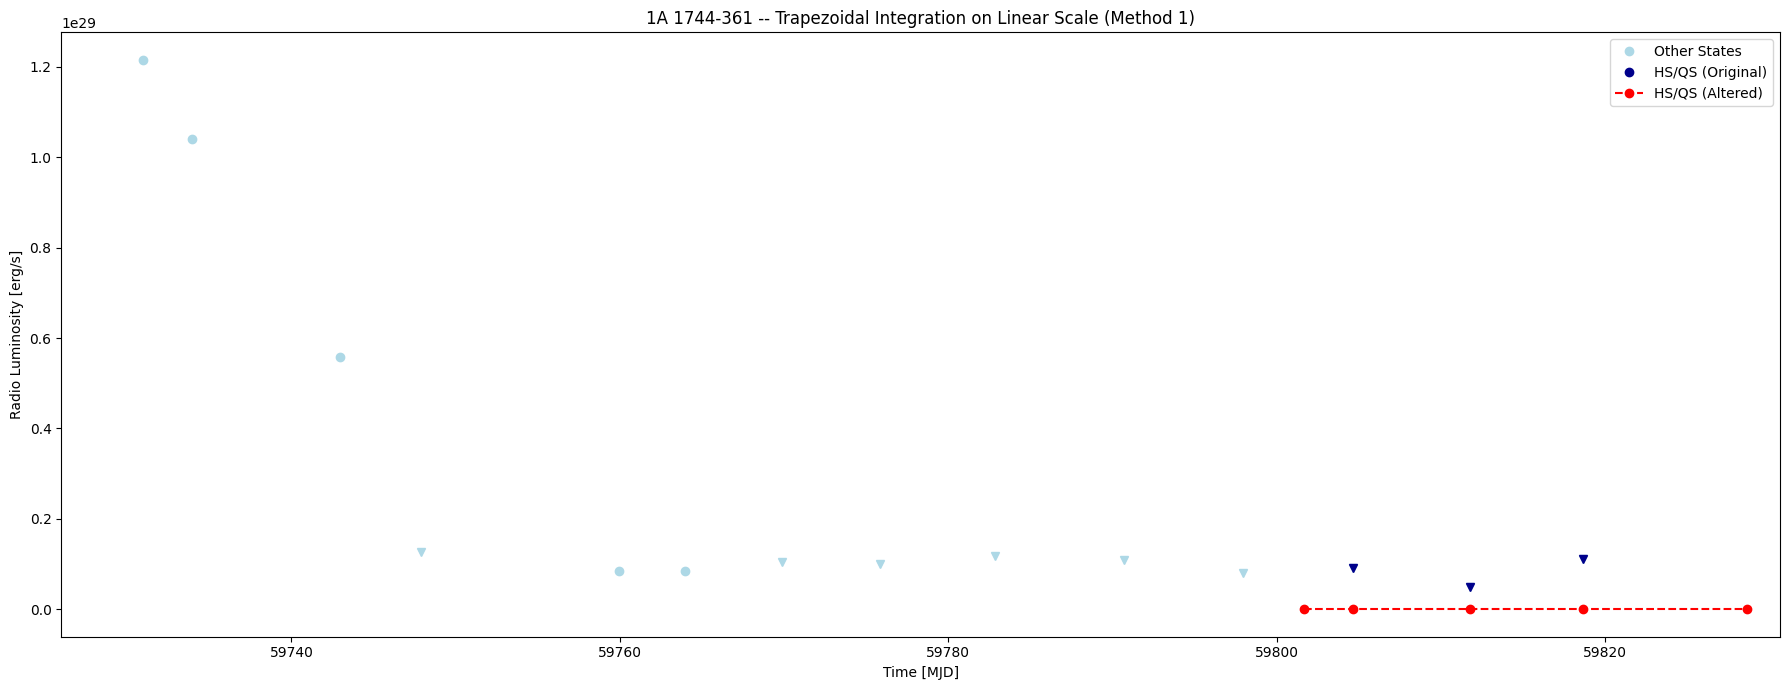

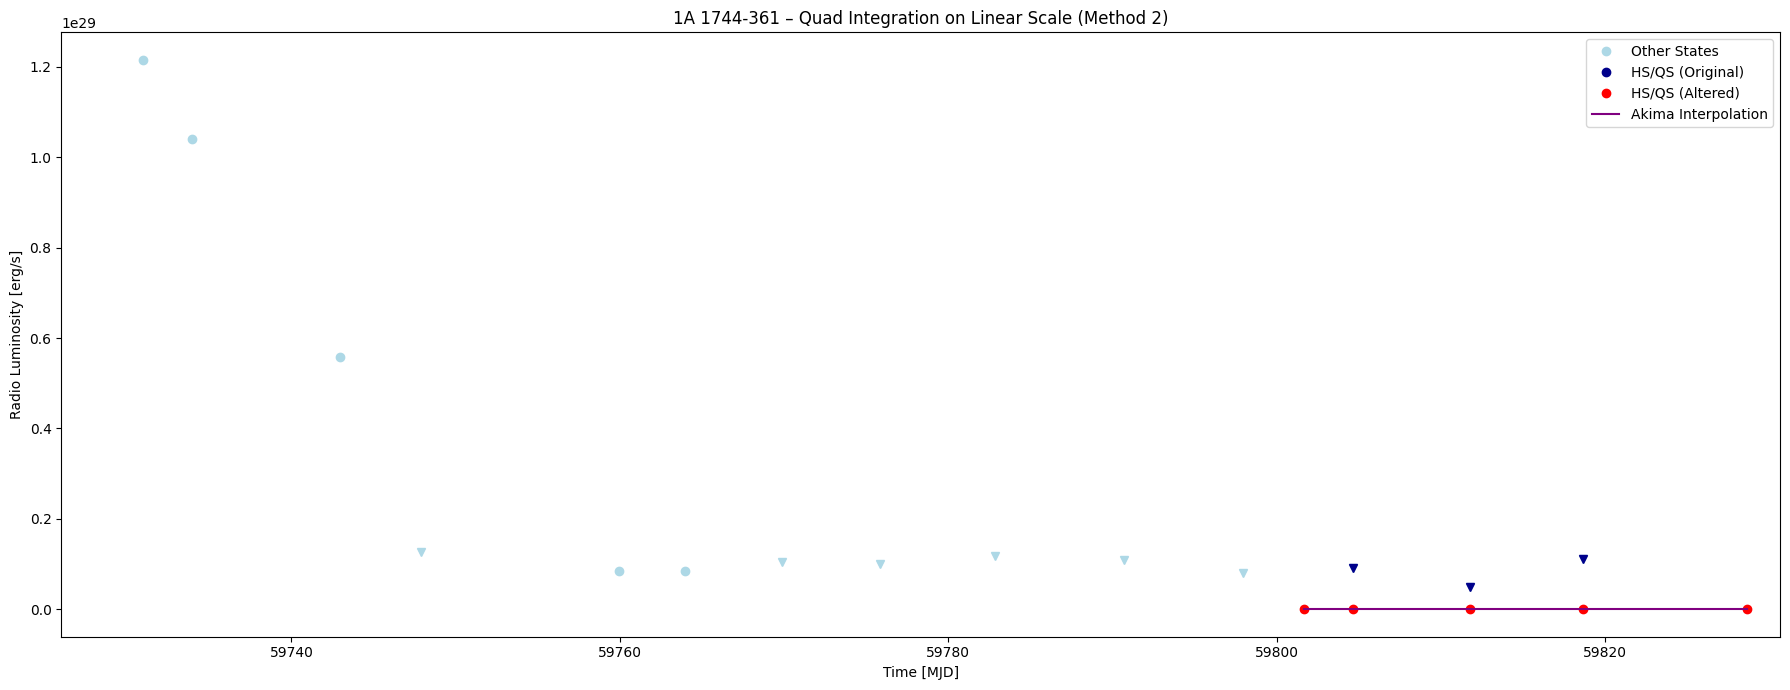

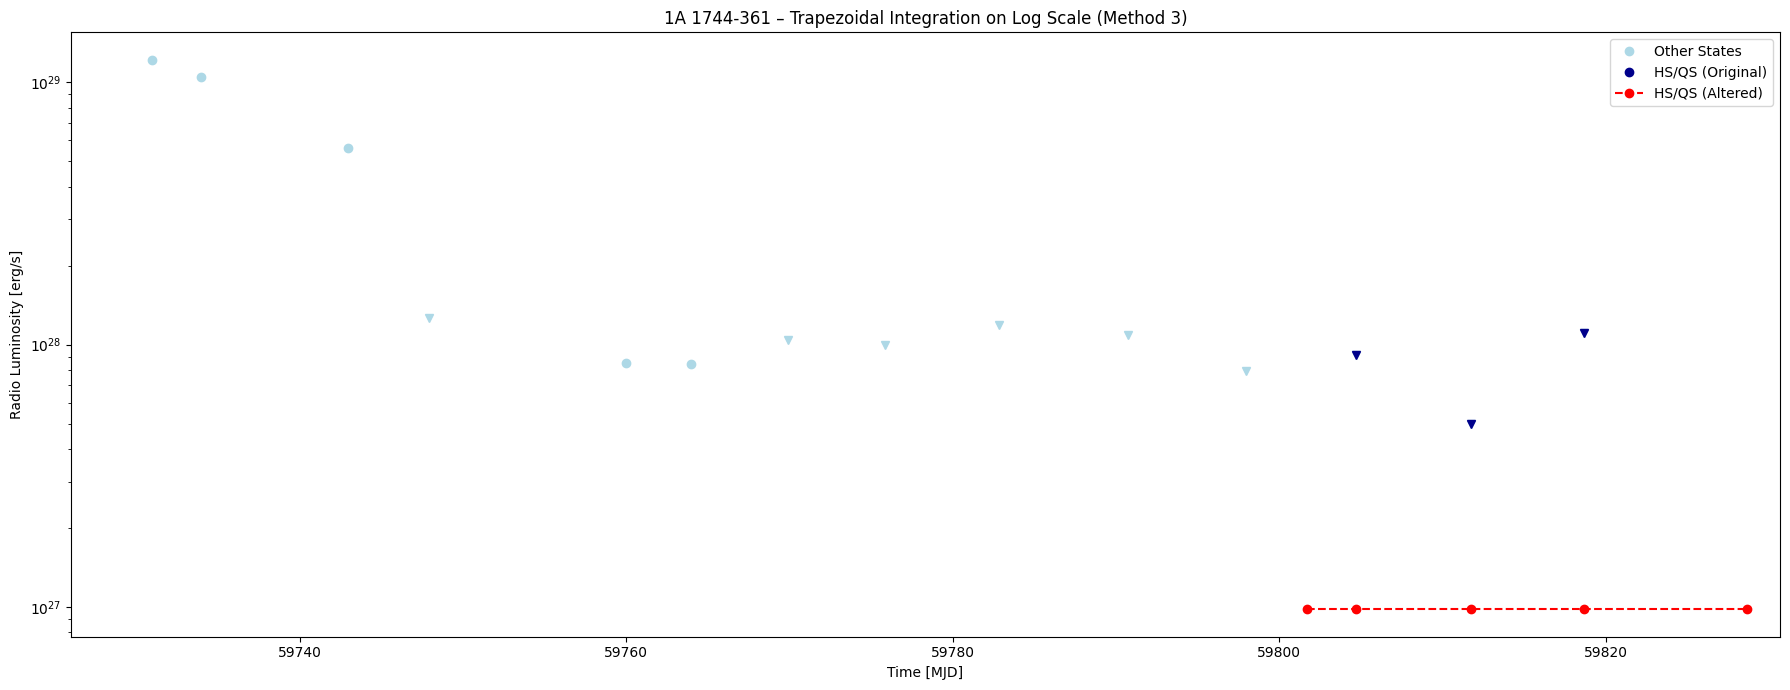

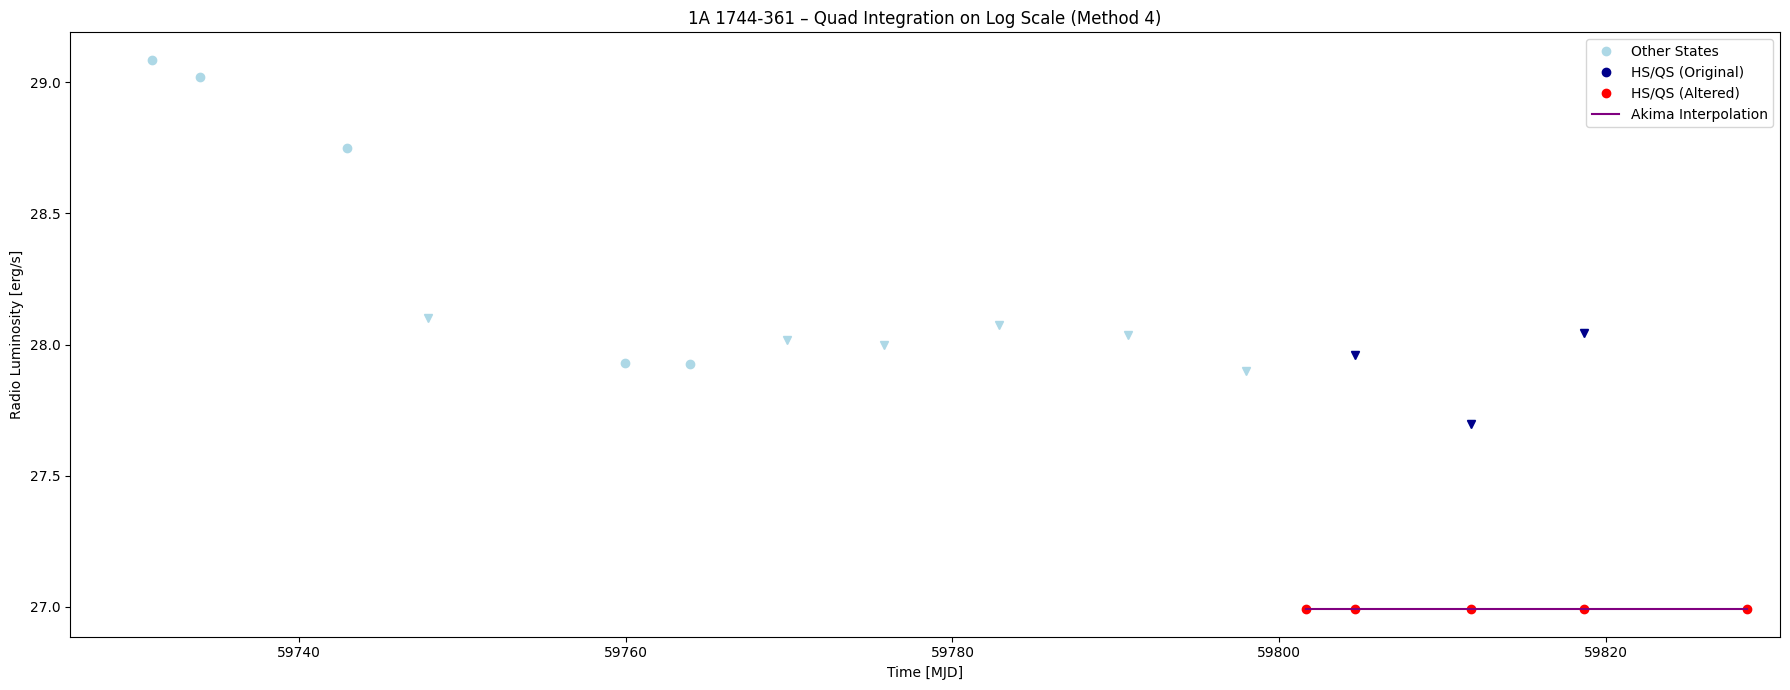

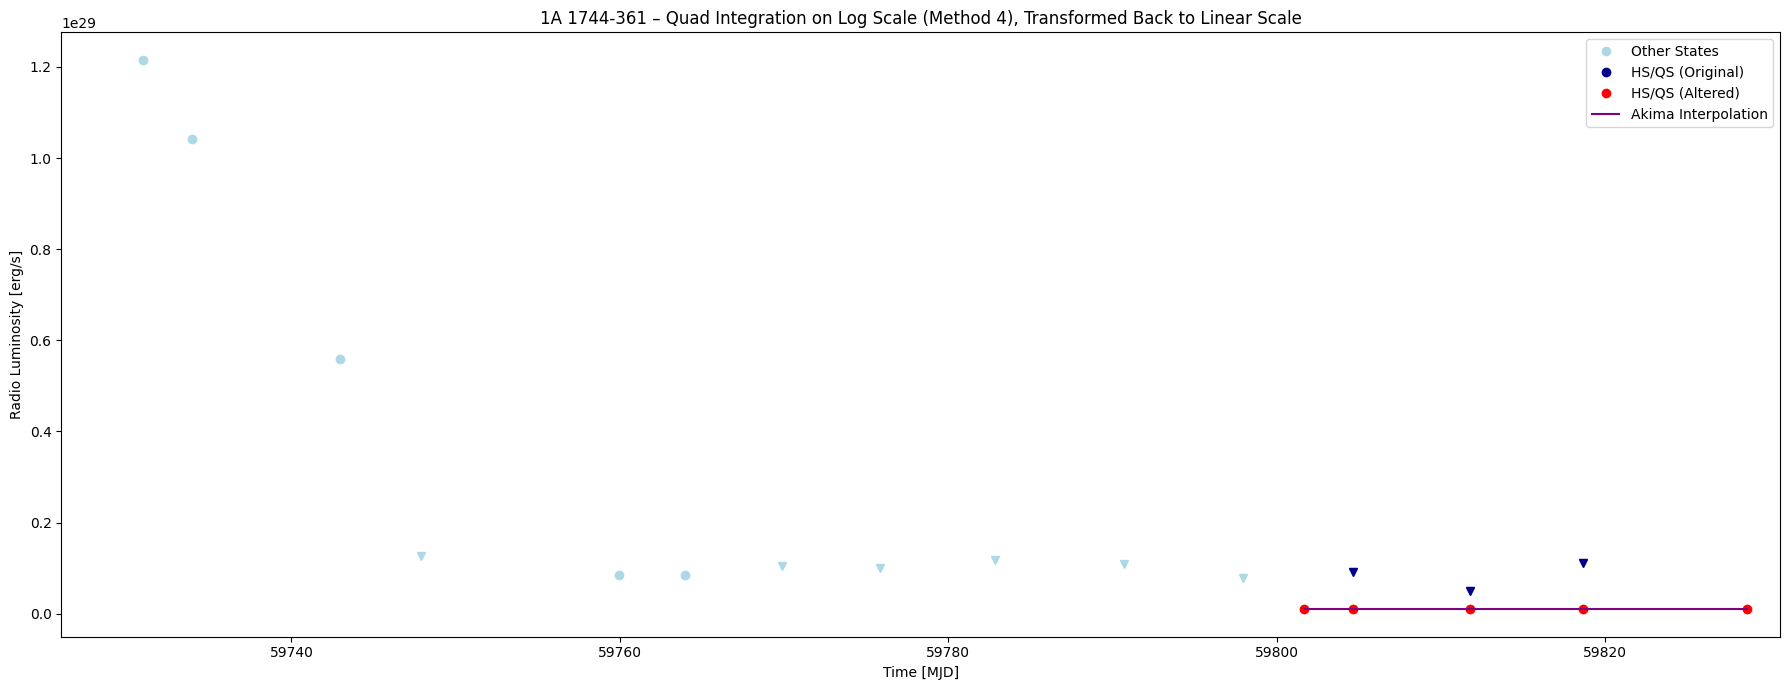

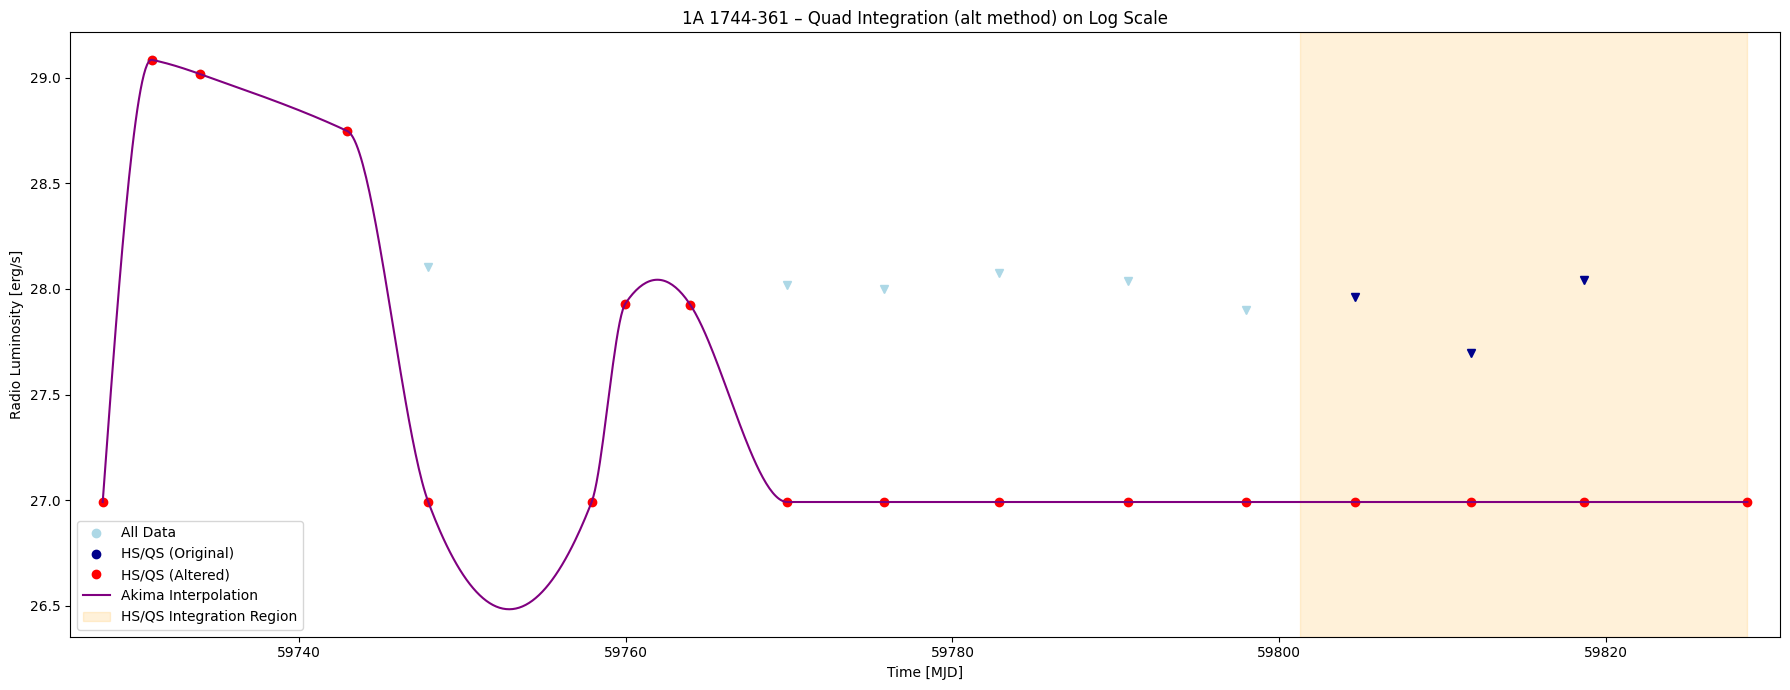


----------------------------------------

----------------------------------------


----------------------------------------


 4U 1543-47
59577.39695 60022.3213

4U 1543-47 [BH] Energy Estimates:
  Linear Trapezoidal:         3.070e+44 erg
  Linear Akima Interpolation: 2.970e+44 erg
  Log Trapezoidal:            2.575e+44 erg
  Log Akima Interpolation:    2.826e+44 erg
  Log Akima Interpolation (Alt): 2.827e+44 erg


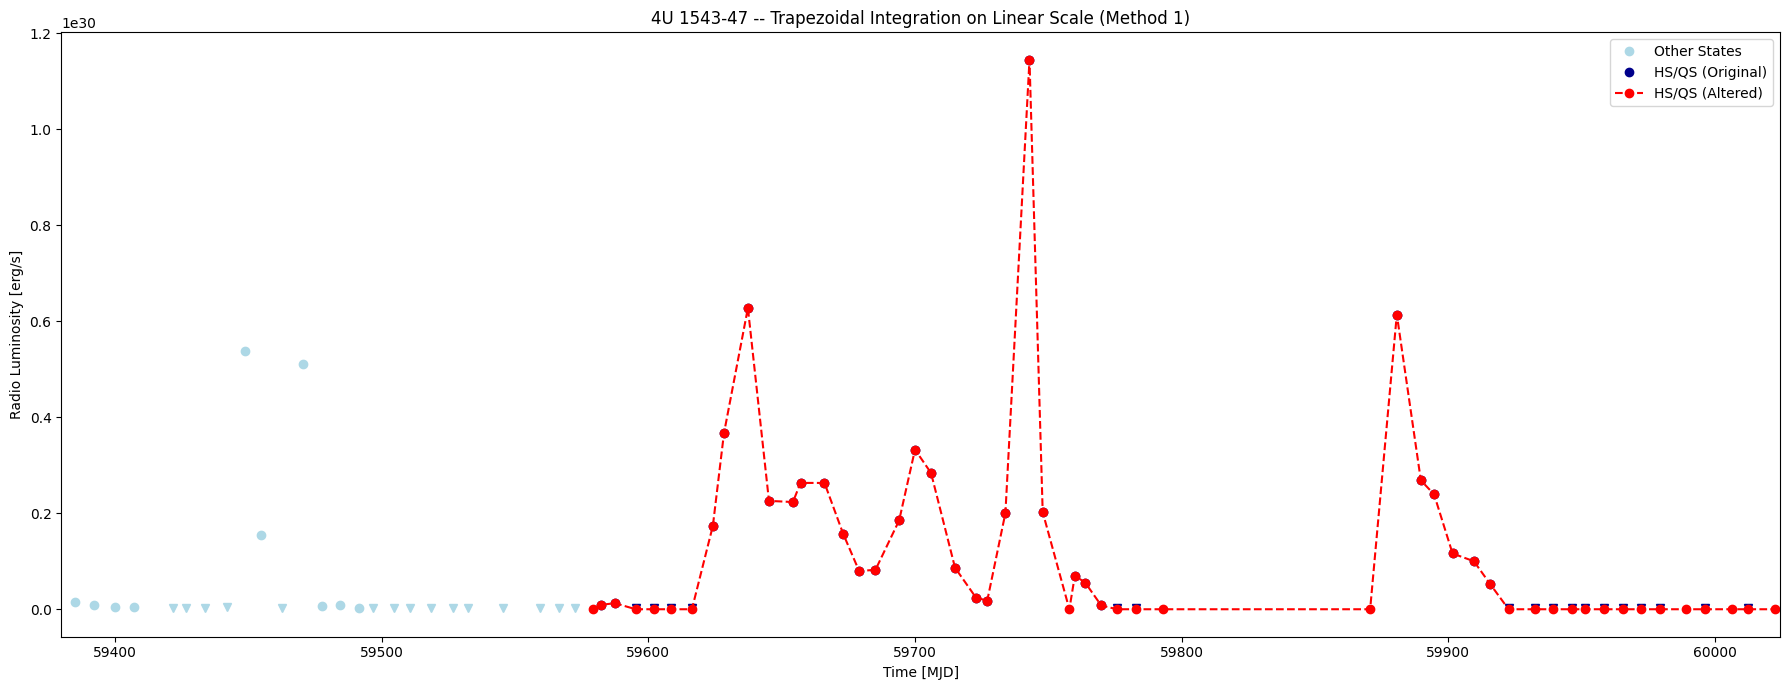

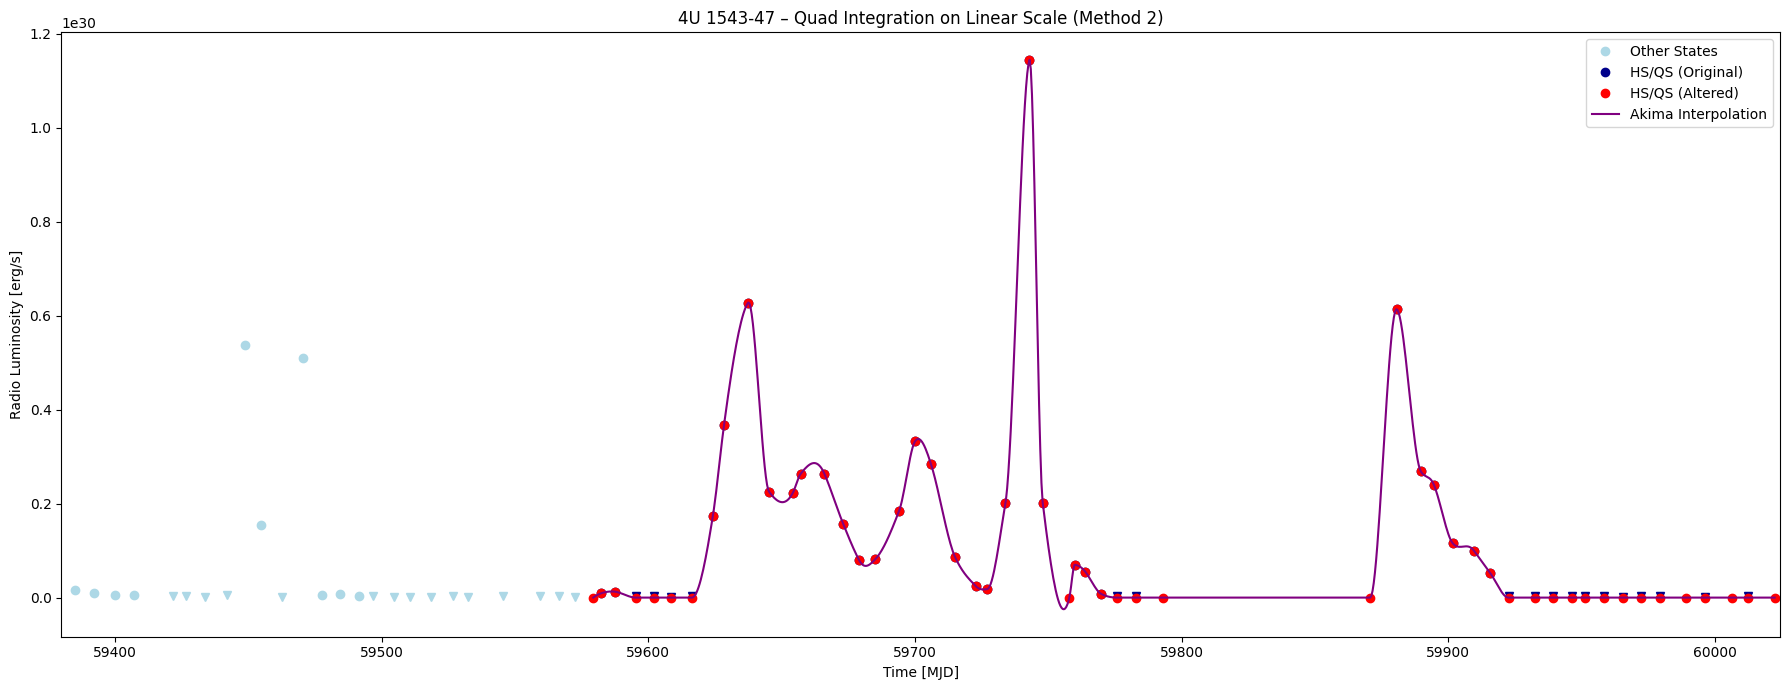

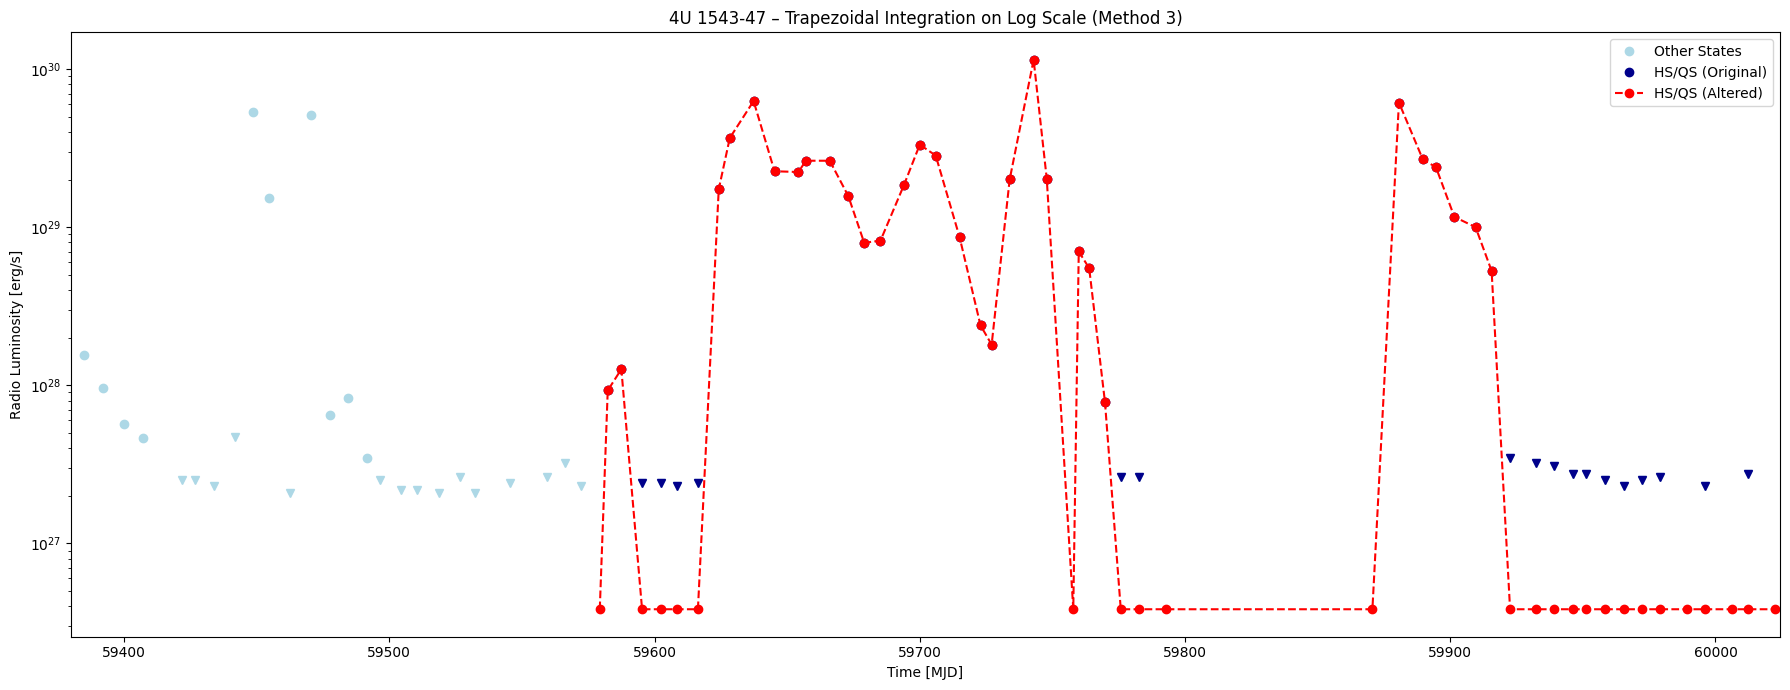

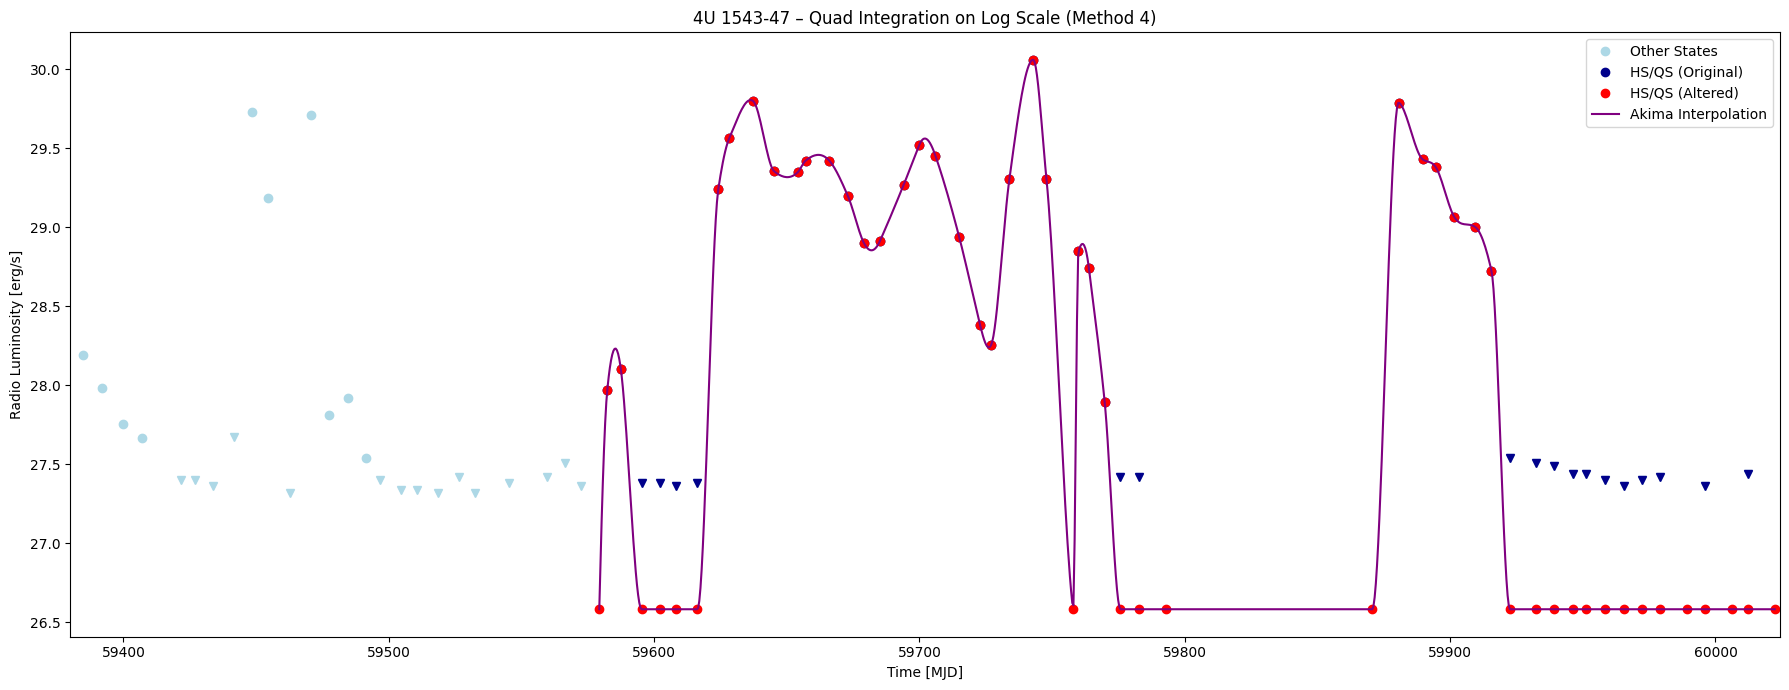

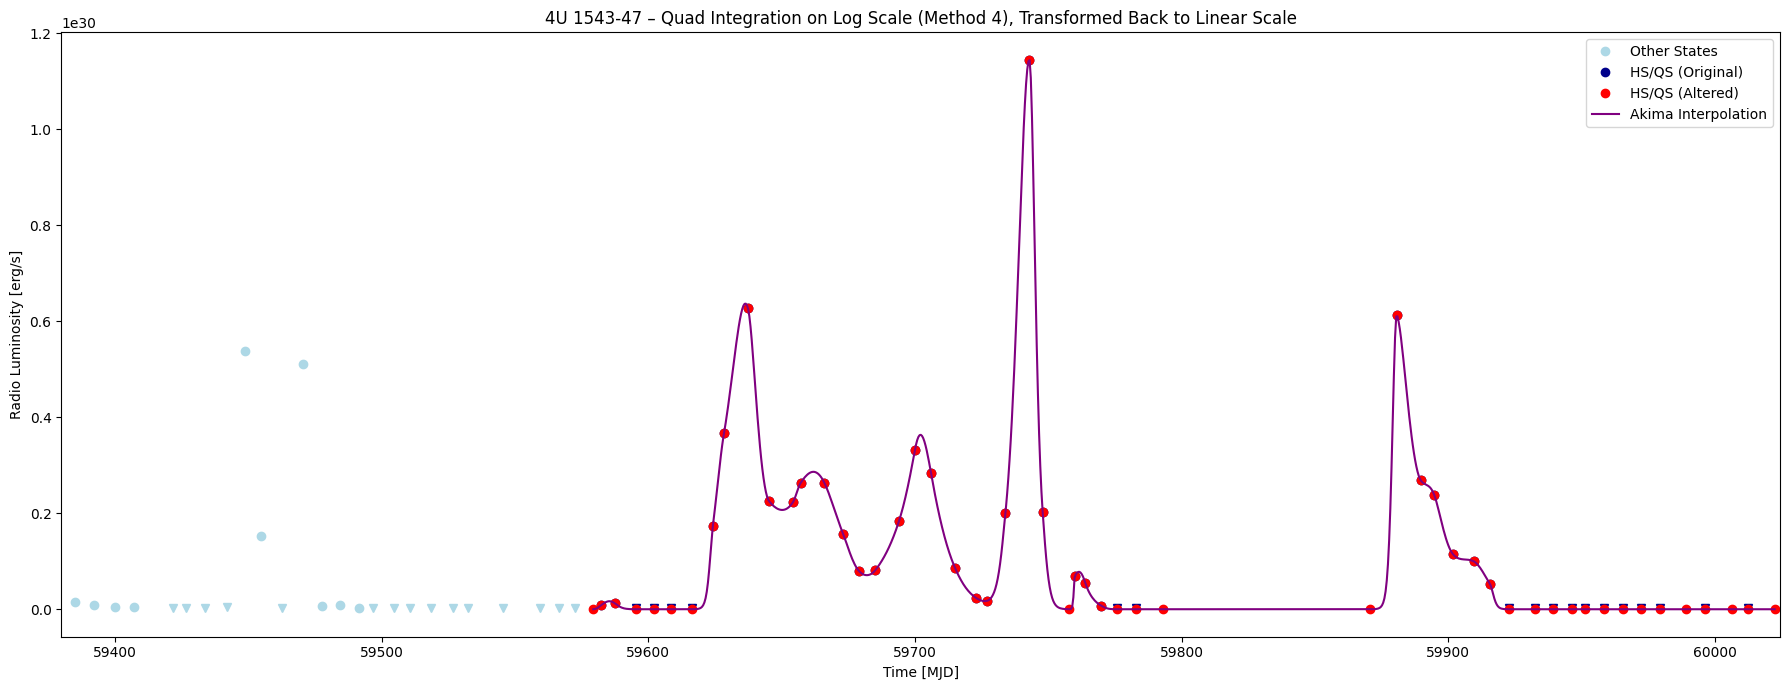

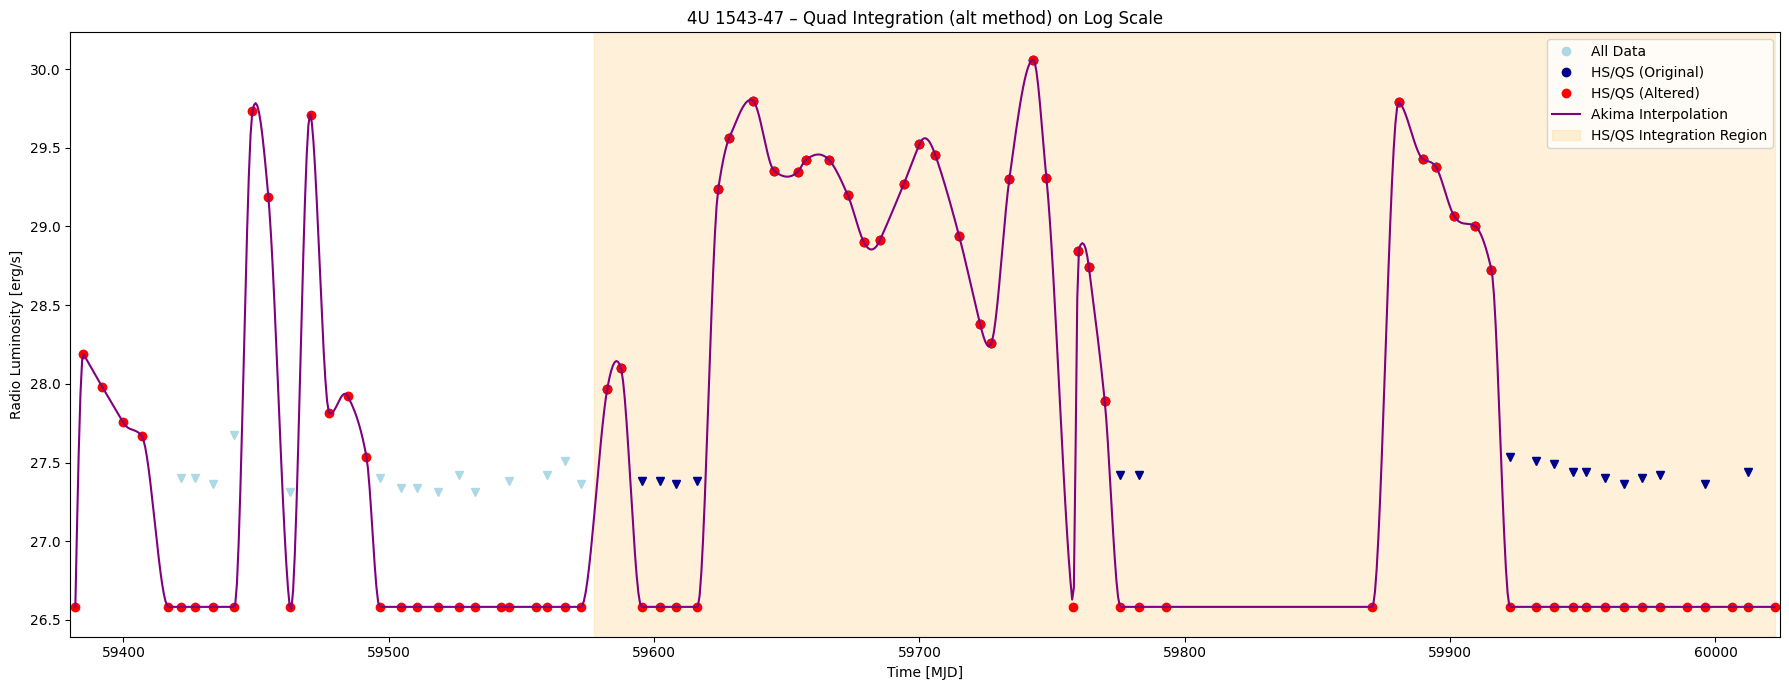


----------------------------------------

----------------------------------------


----------------------------------------


 4U 1630-47
59467.639 59481.012

4U 1630-47 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         1.727e+43 erg
  Linear Akima Interpolation: 2.349e+43 erg
  Log Trapezoidal:            4.533e+42 erg
  Log Akima Interpolation:    2.319e+43 erg
  Log Akima Interpolation (Alt): 1.580e+43 erg


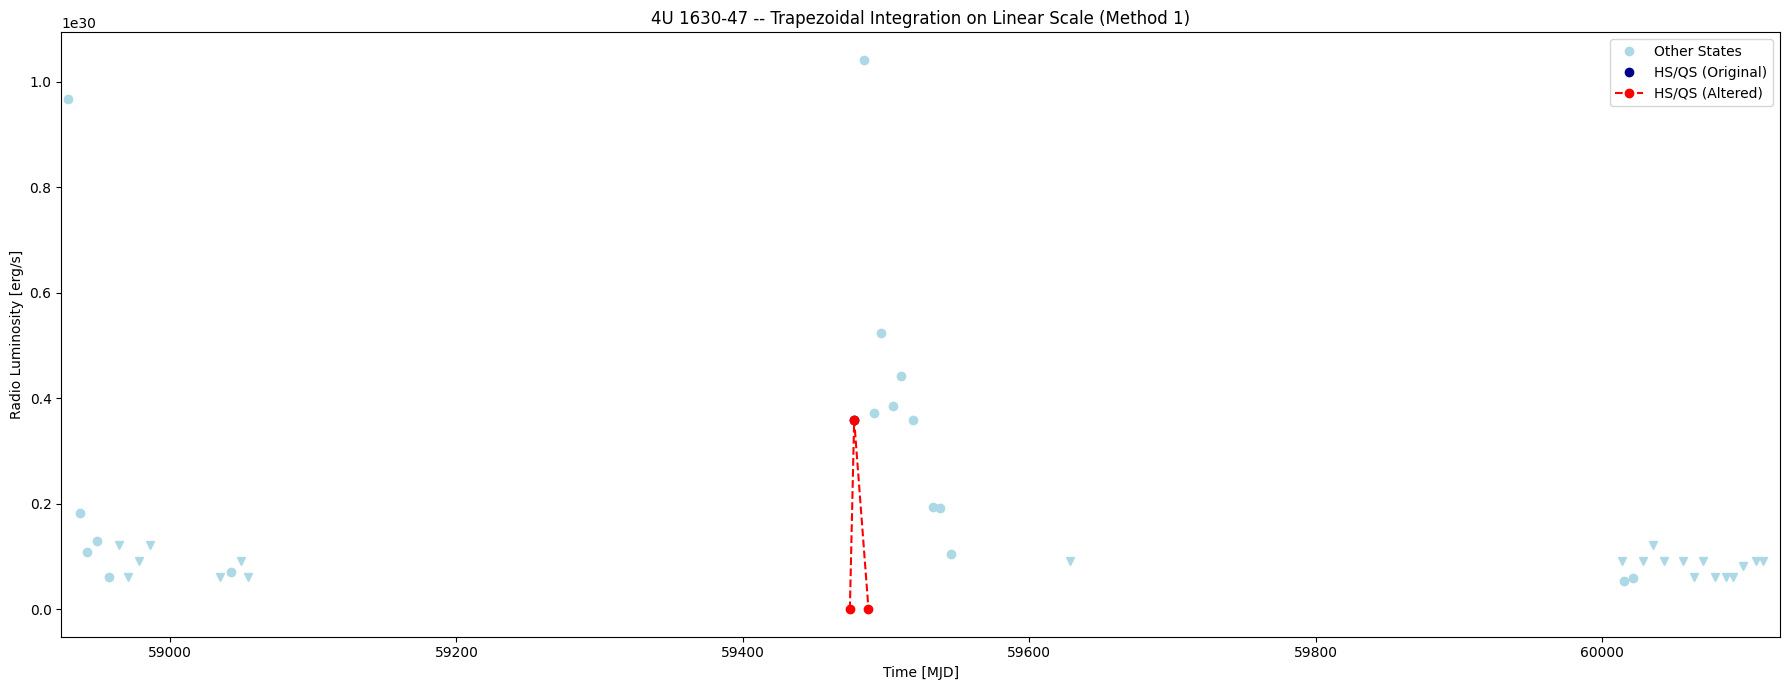

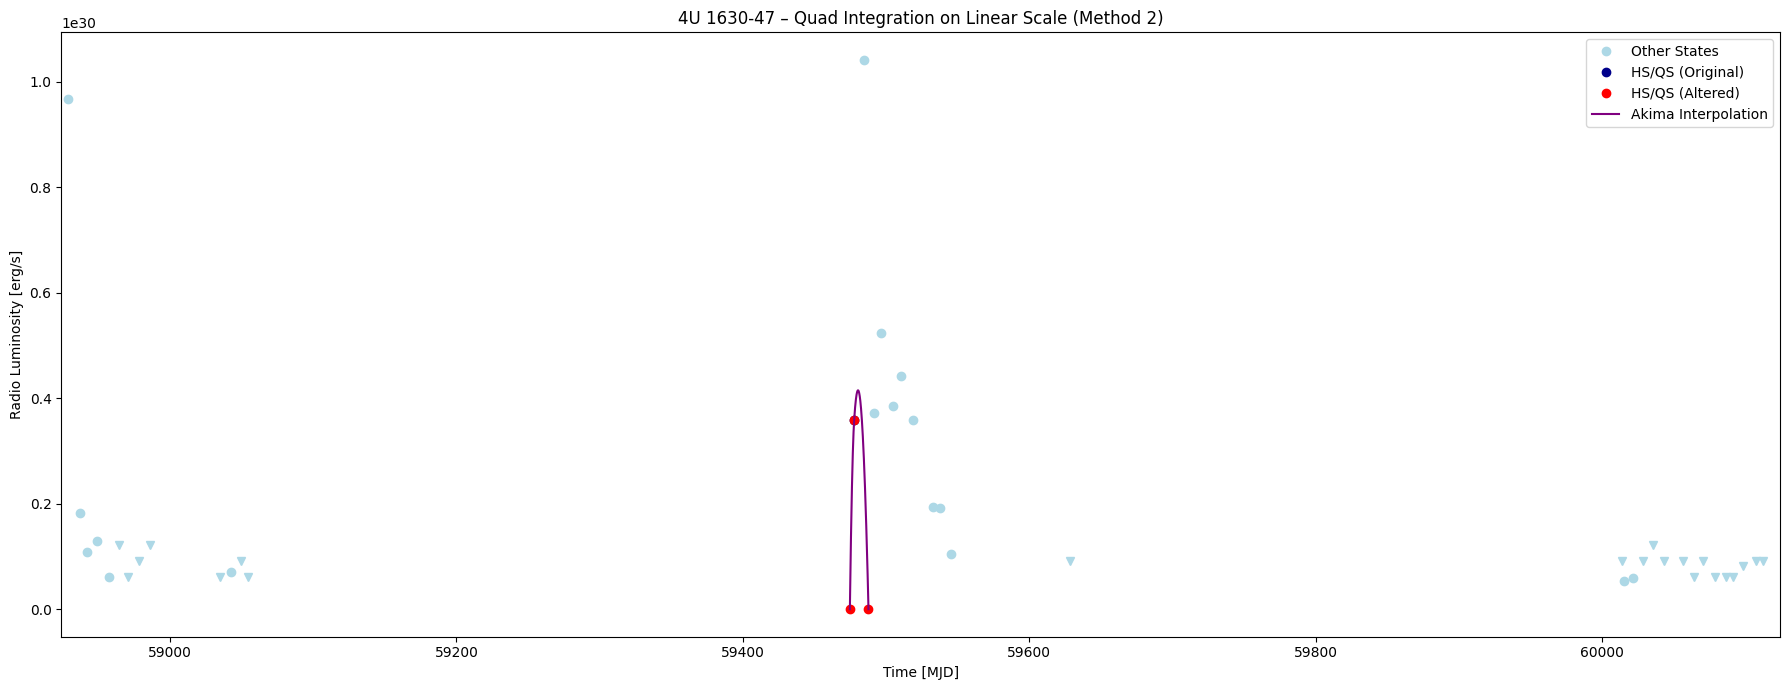

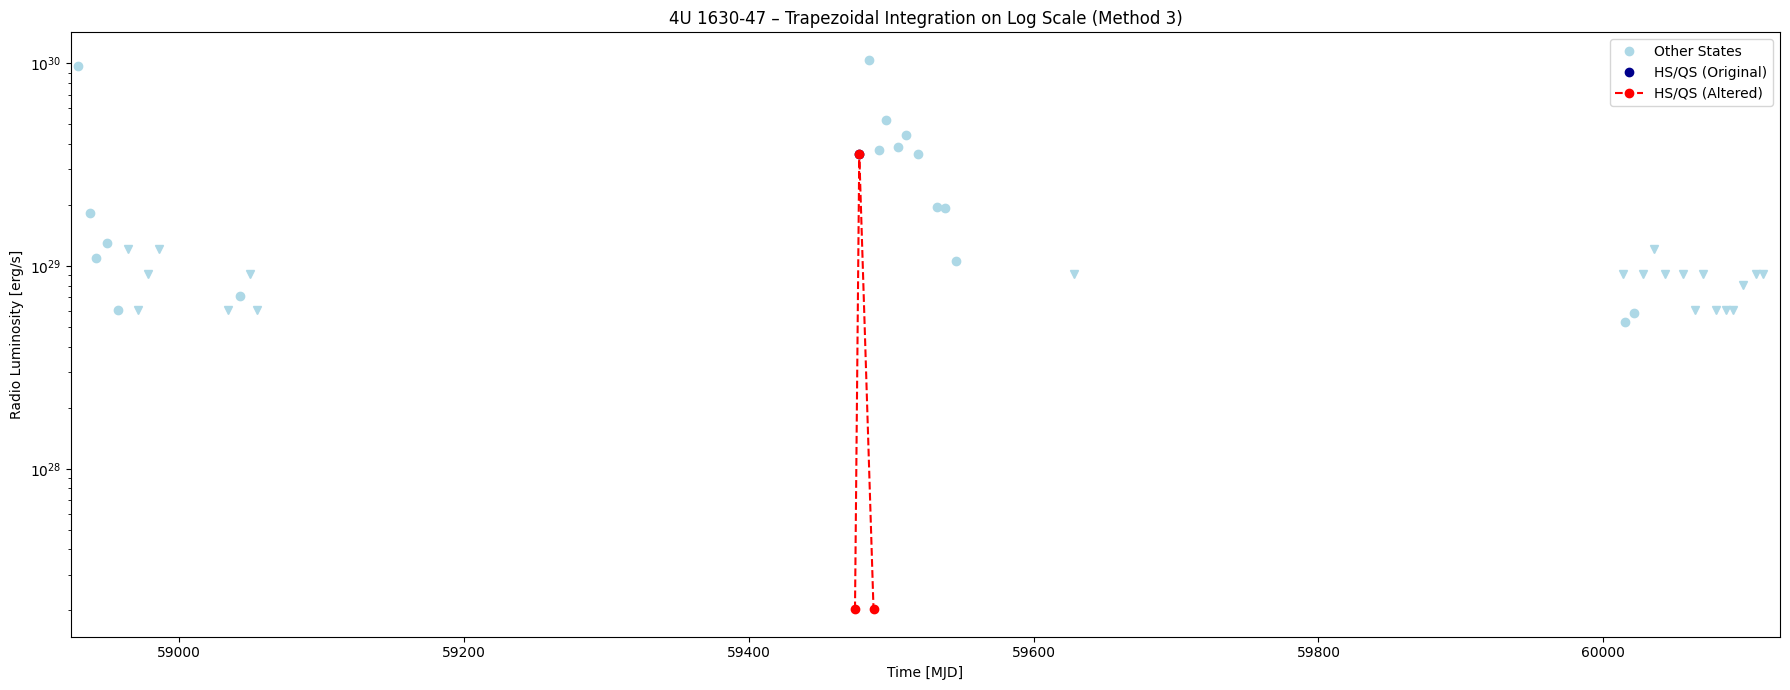

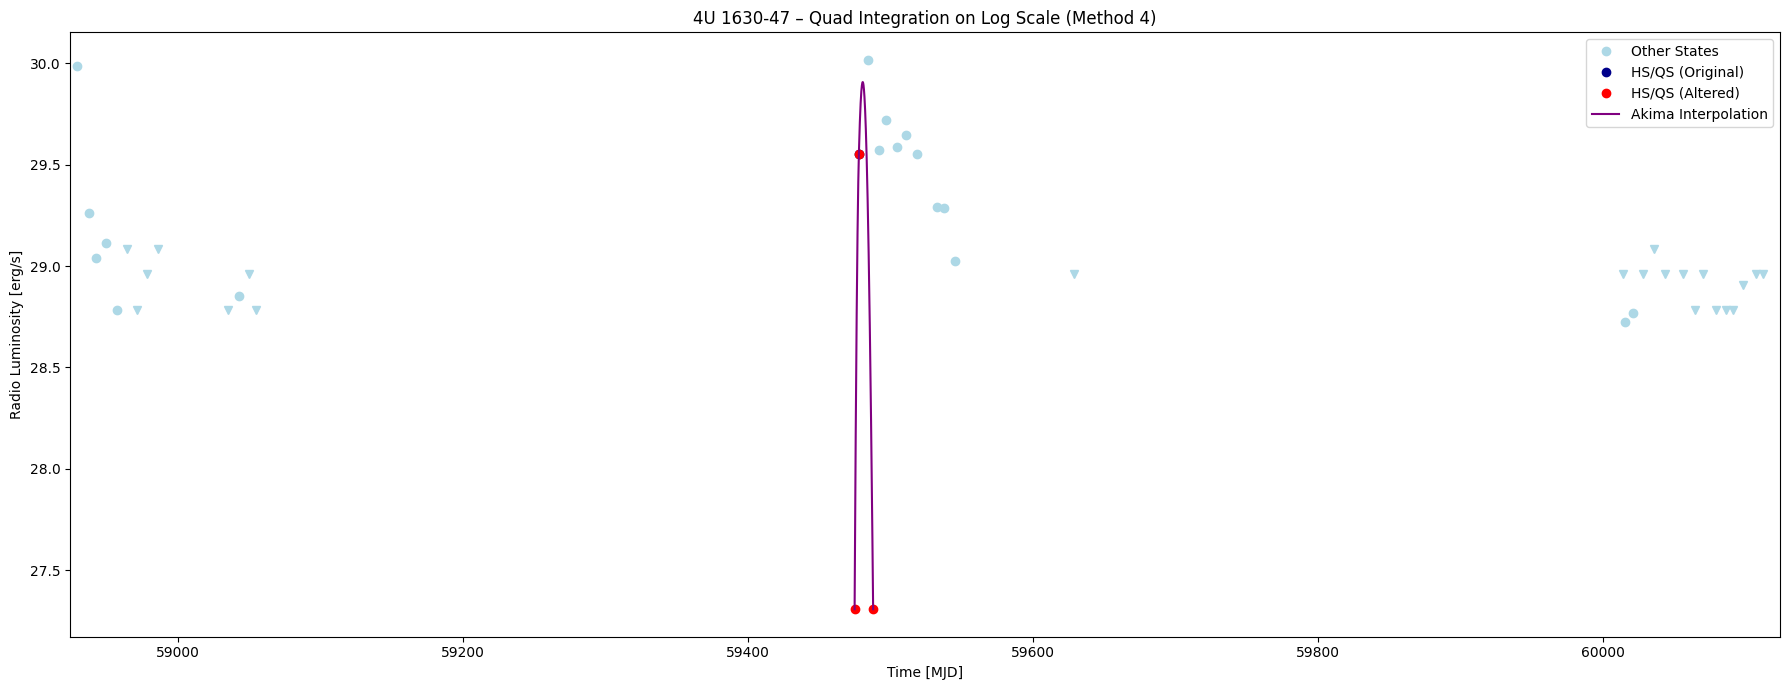

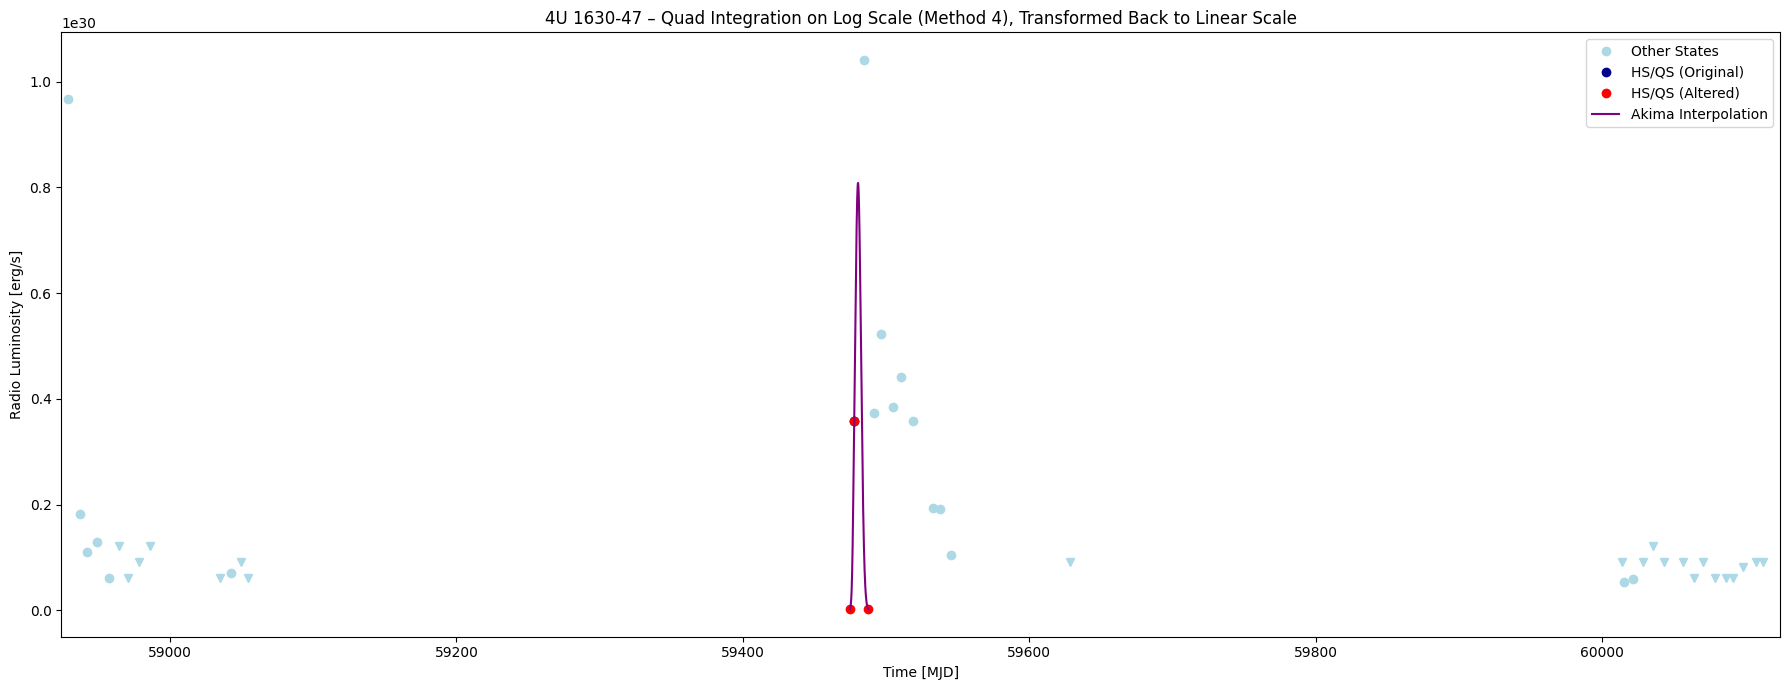

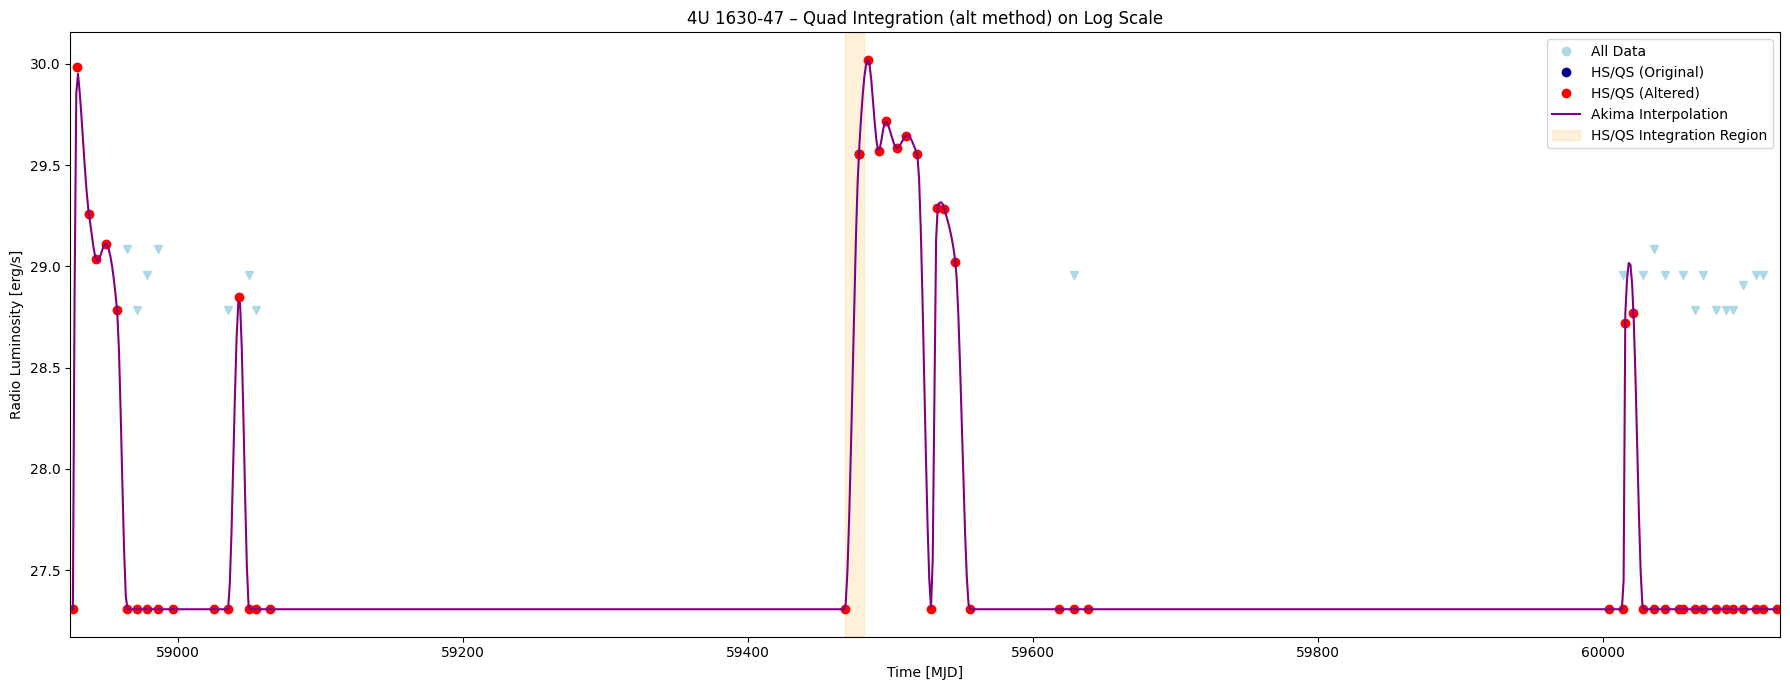


----------------------------------------

----------------------------------------


----------------------------------------


 Cen X-4
59115.62333 59240.3252

Cen X-4 [NS] Energy Estimates:
  Linear Trapezoidal:         0.000e+00 erg
  Linear Akima Interpolation: 0.000e+00 erg
  Log Trapezoidal:            5.183e+41 erg
  Log Akima Interpolation:    5.183e+41 erg
  Log Akima Interpolation (Alt): 5.183e+41 erg


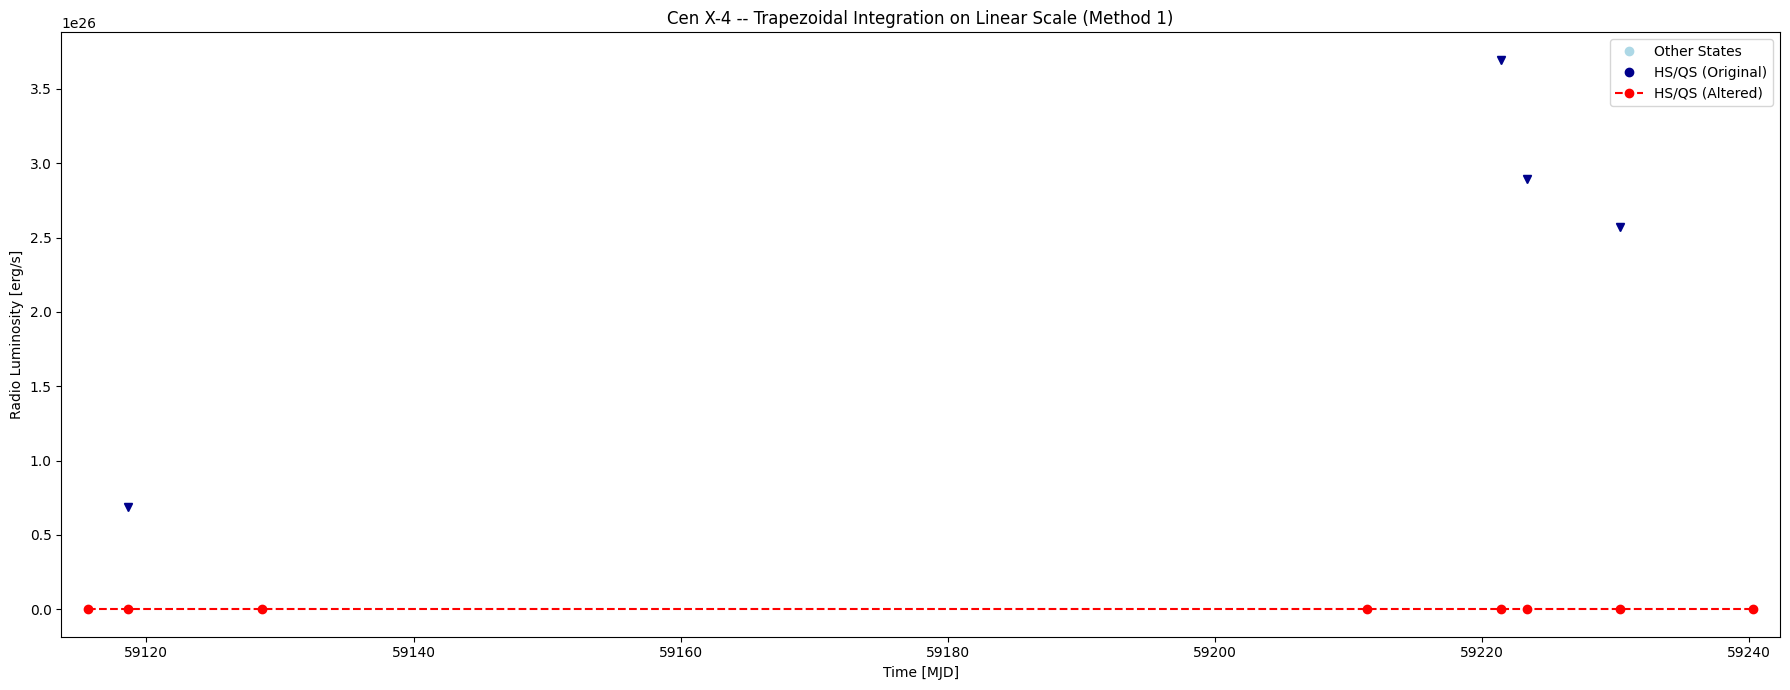

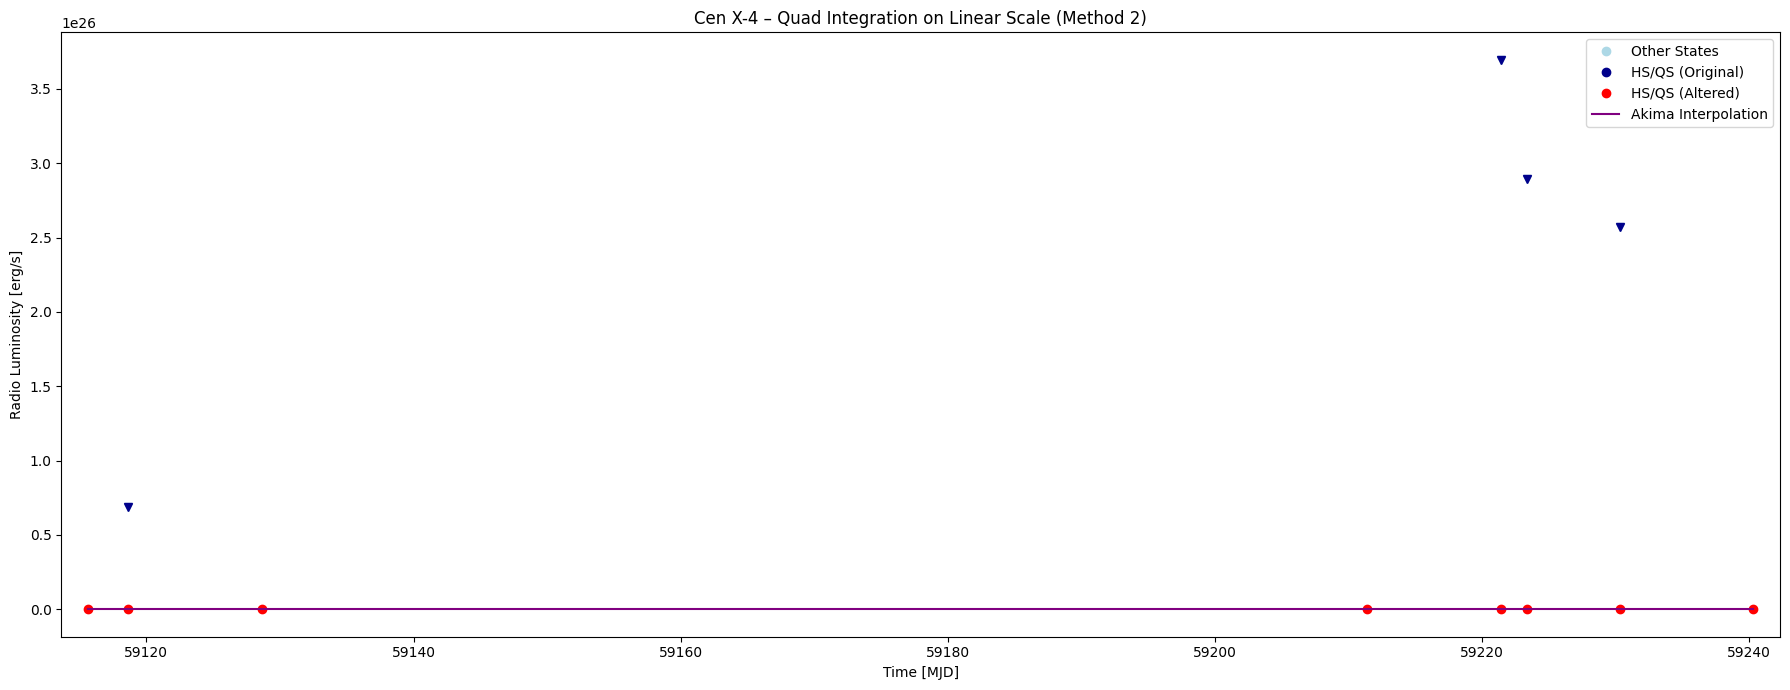

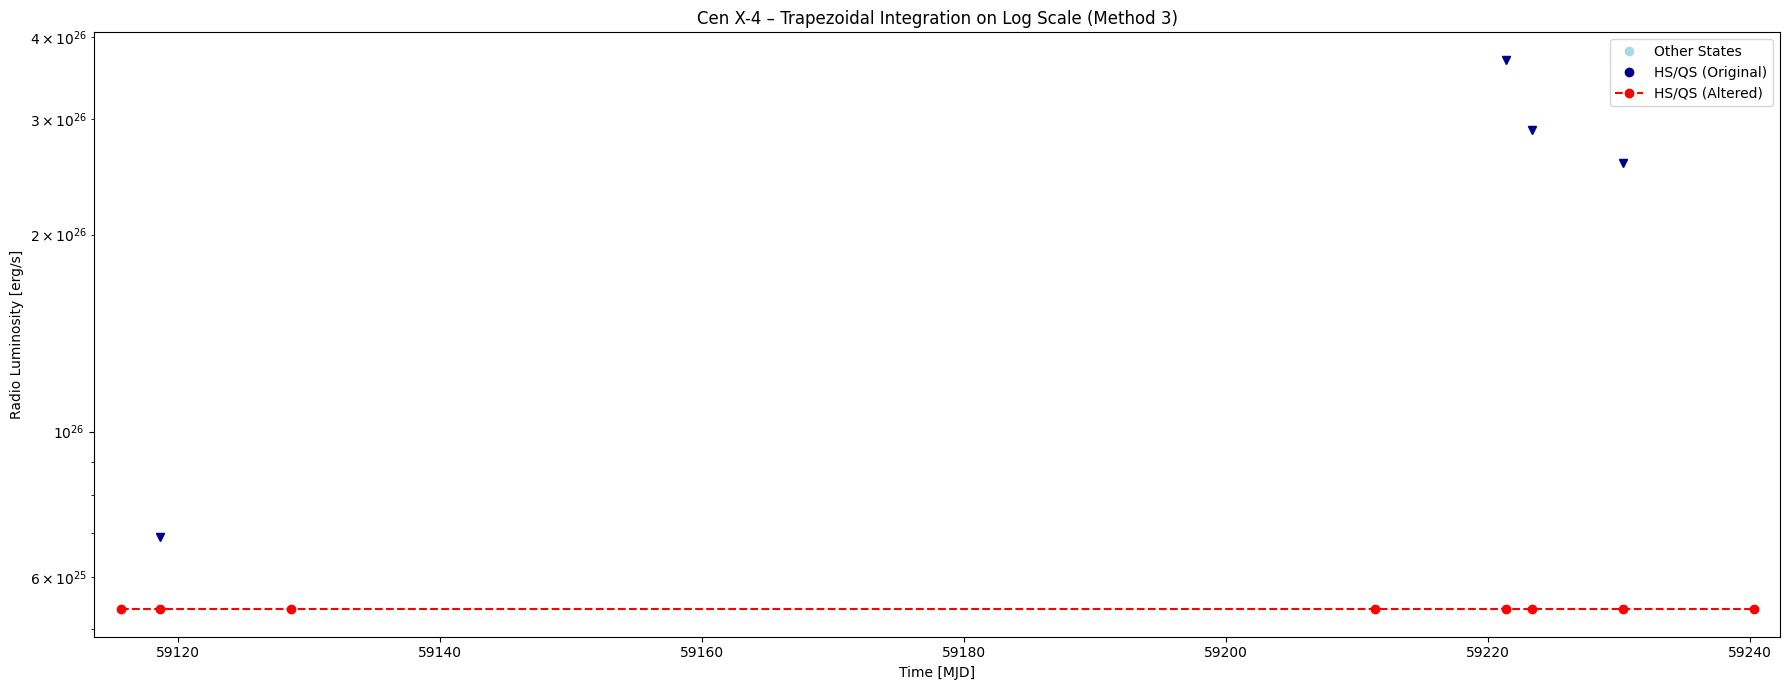

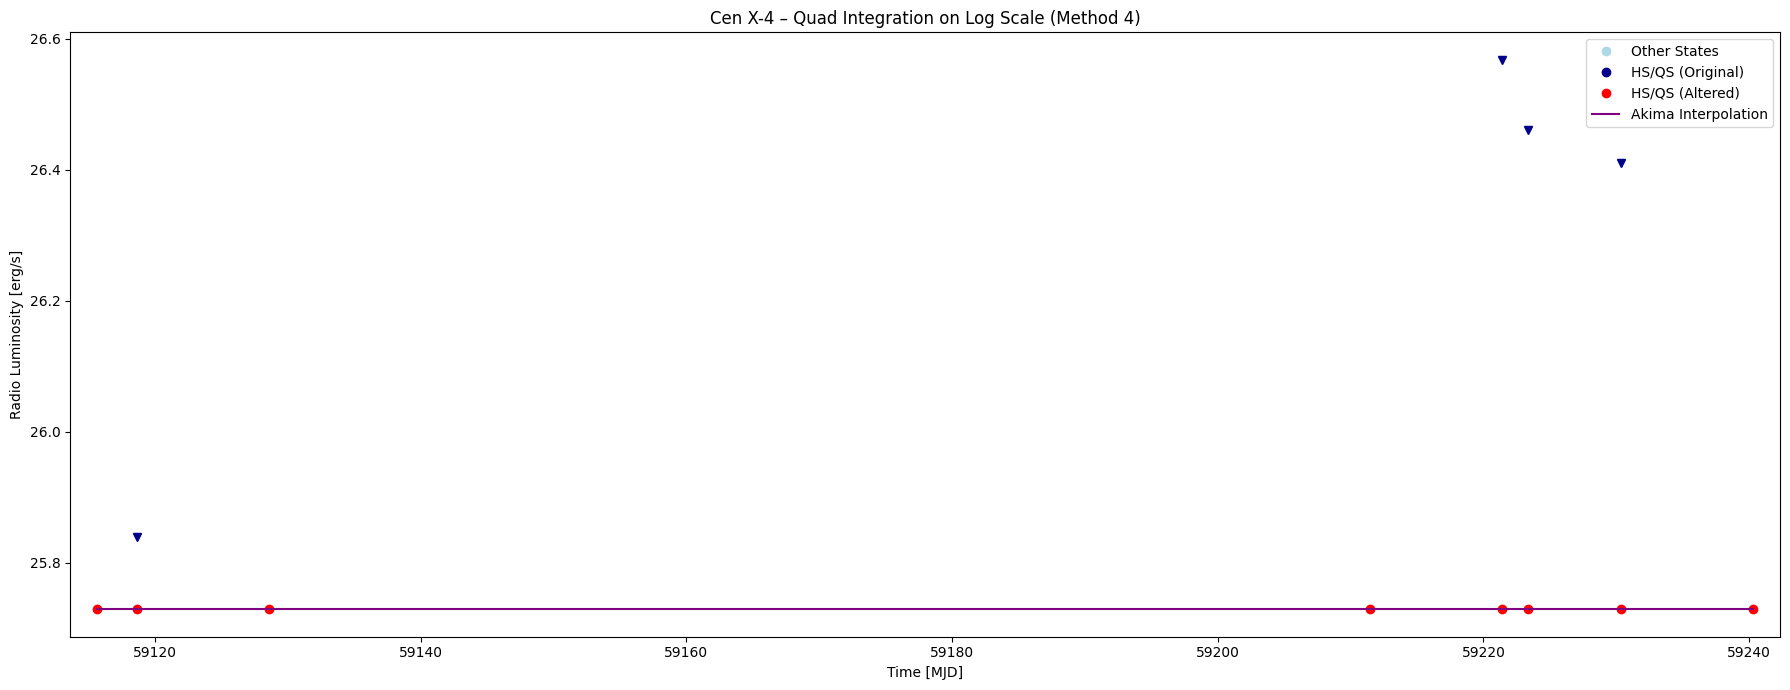

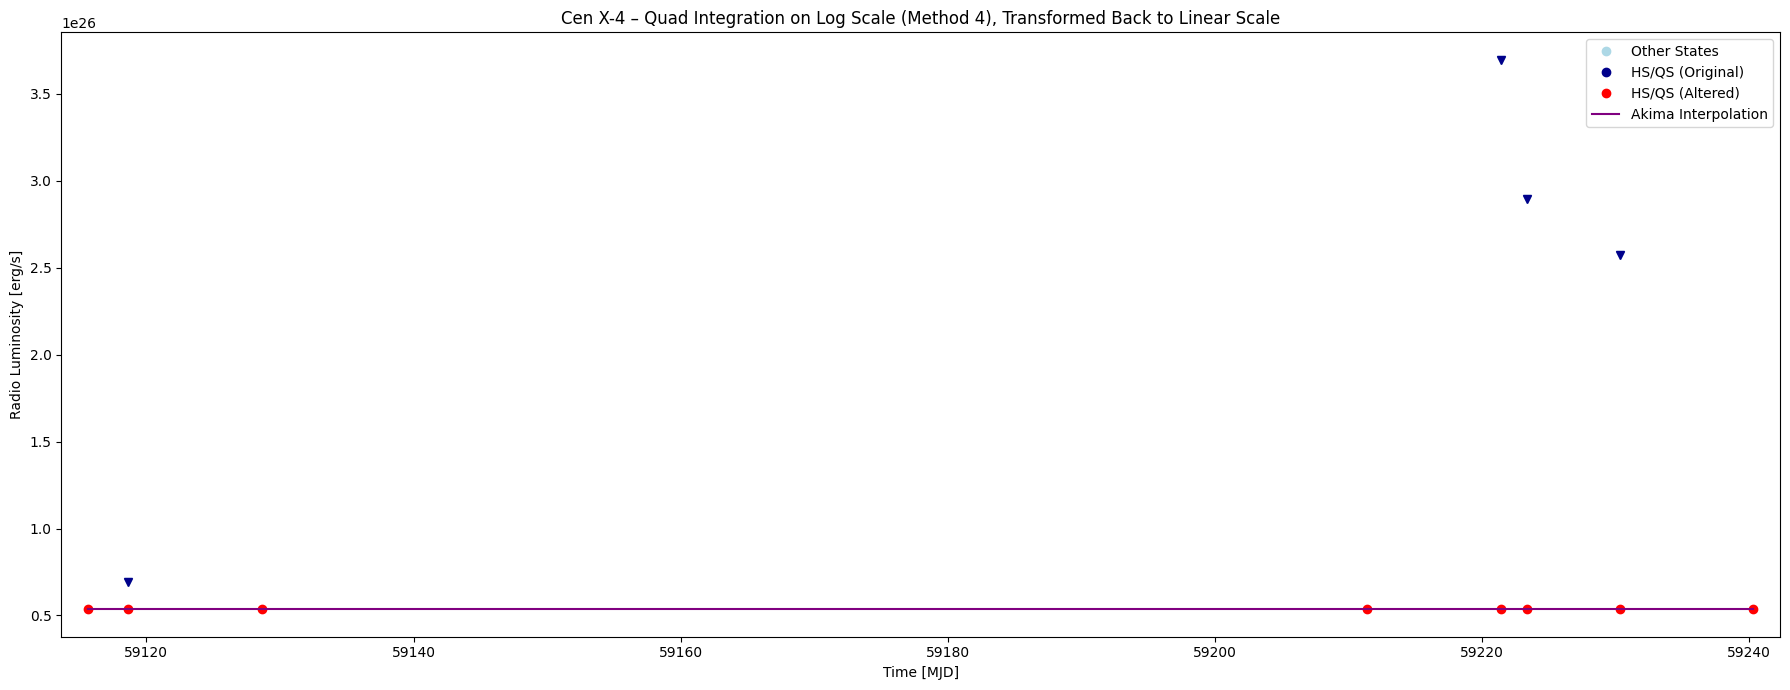

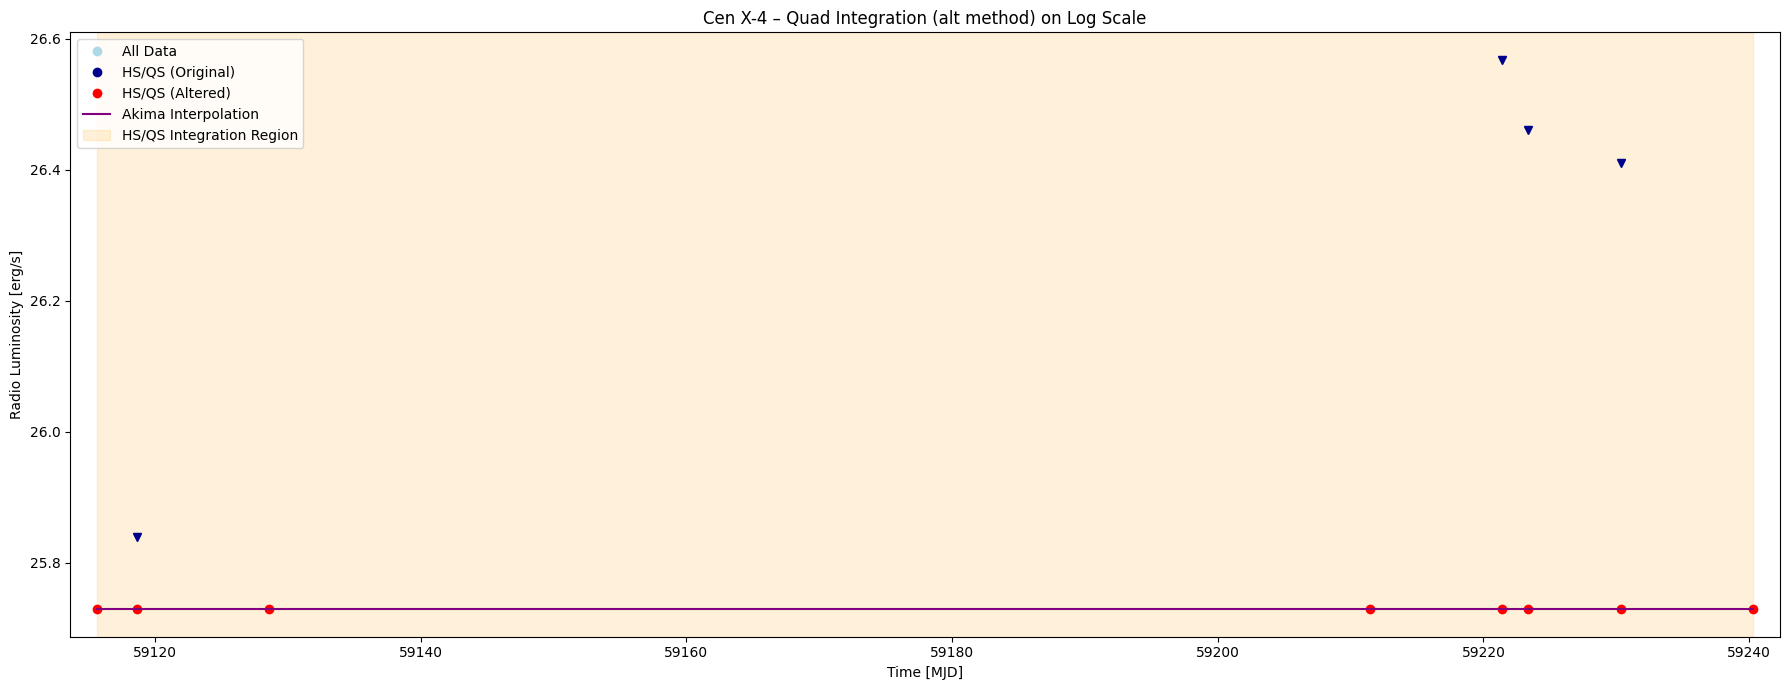


----------------------------------------

----------------------------------------


----------------------------------------


 Cir X-1
No HS/QS data for Cir X-1. Skipping...

 EXO 1846-031
58696.839 58702.820999999996
58939.314 58959.314

EXO 1846-031 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         1.200e+43 erg
  Linear Akima Interpolation: 1.157e+43 erg
  Log Trapezoidal:            5.670e+42 erg
  Log Akima Interpolation:    9.332e+42 erg
  Log Akima Interpolation (Alt): 9.484e+42 erg


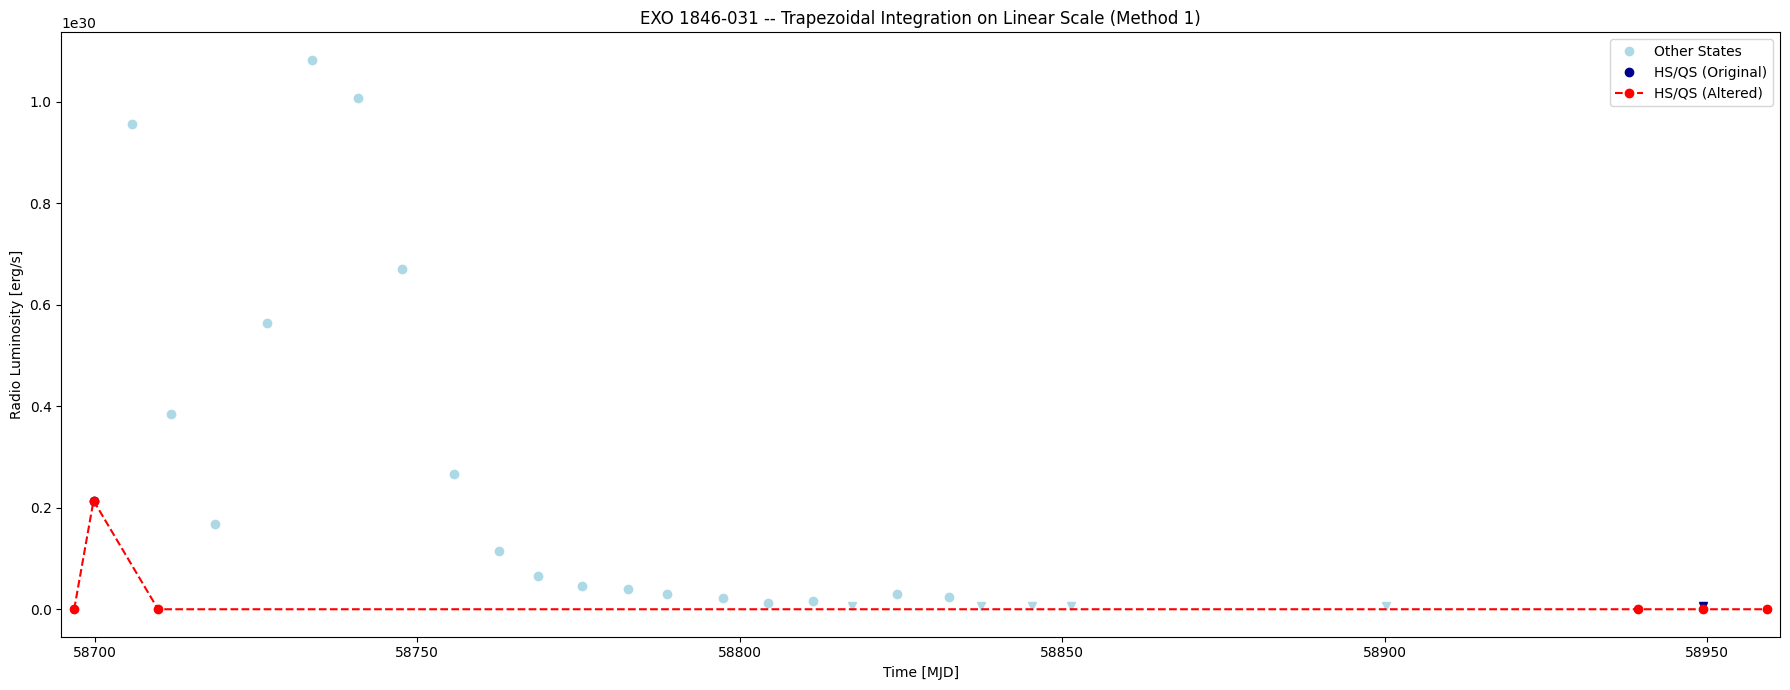

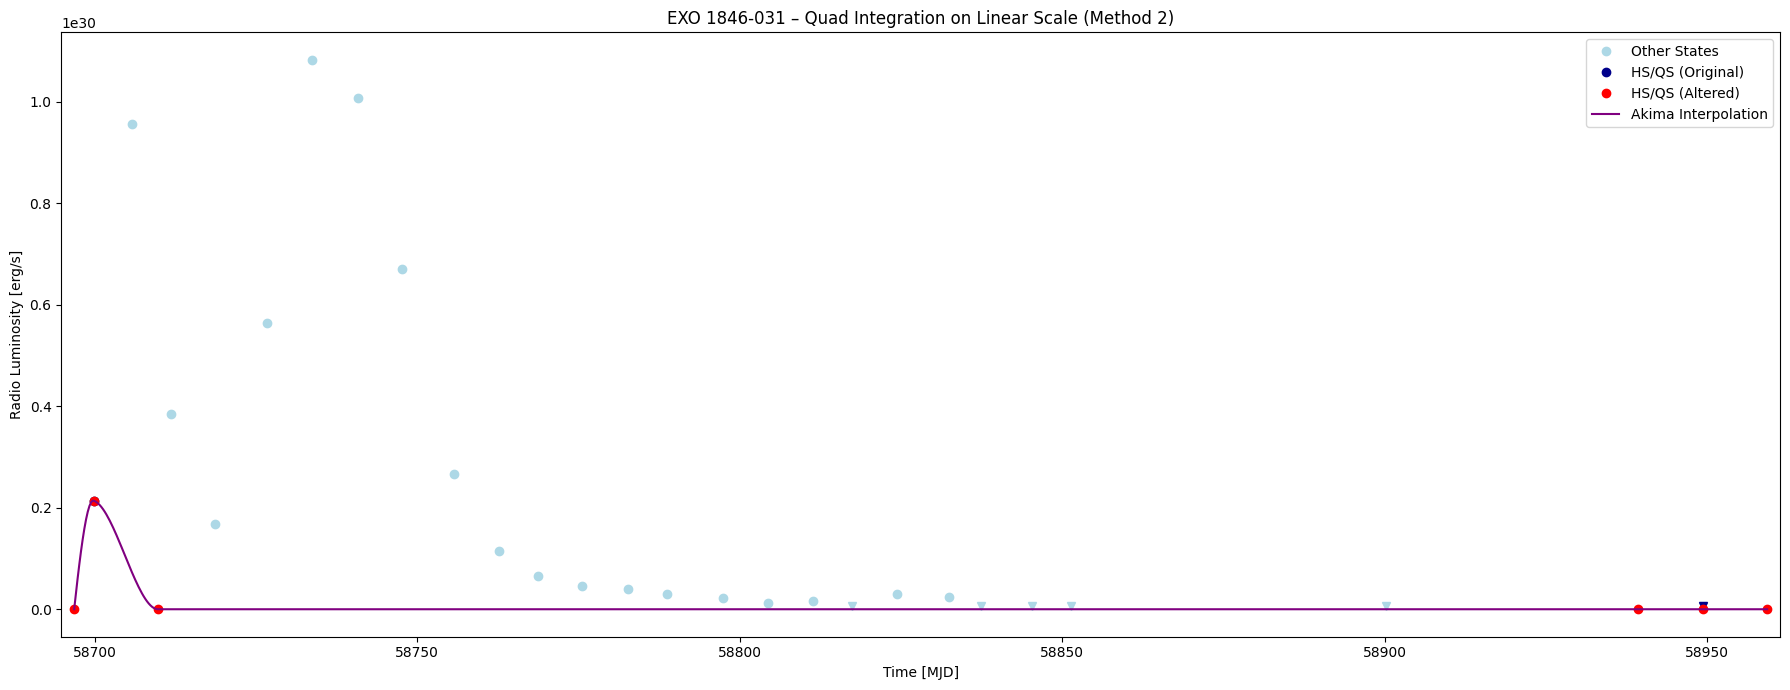

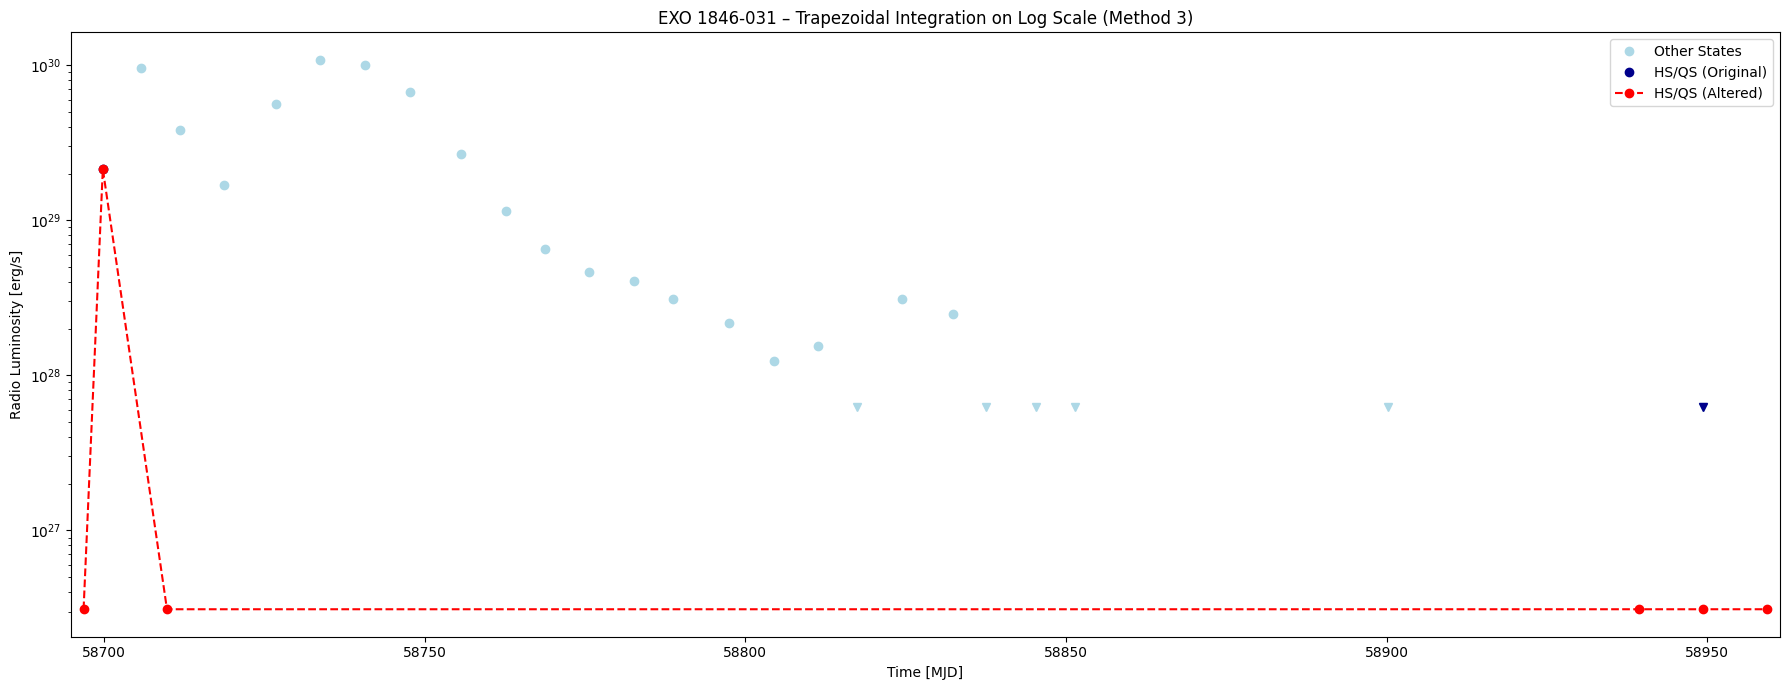

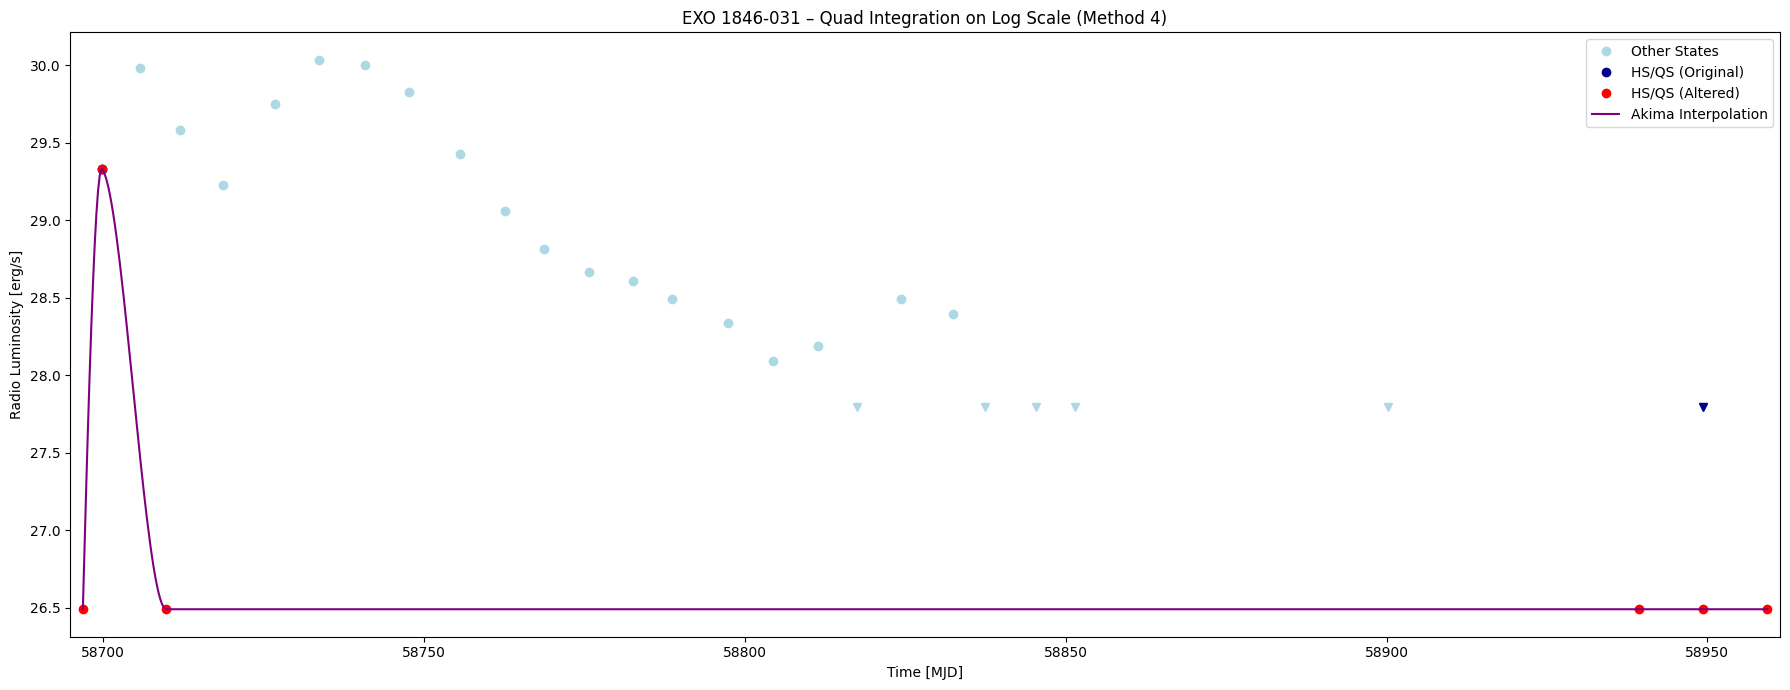

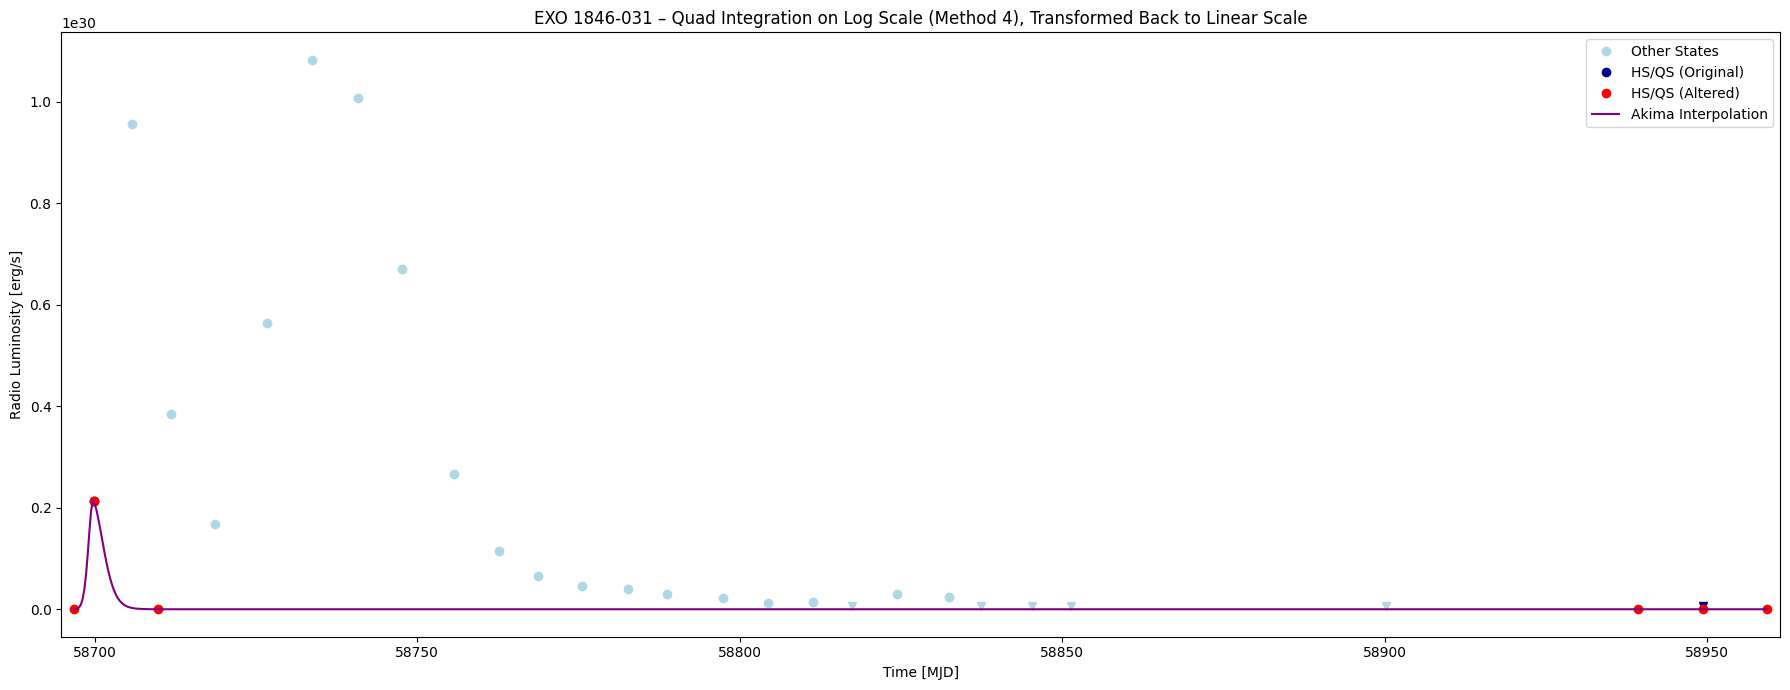

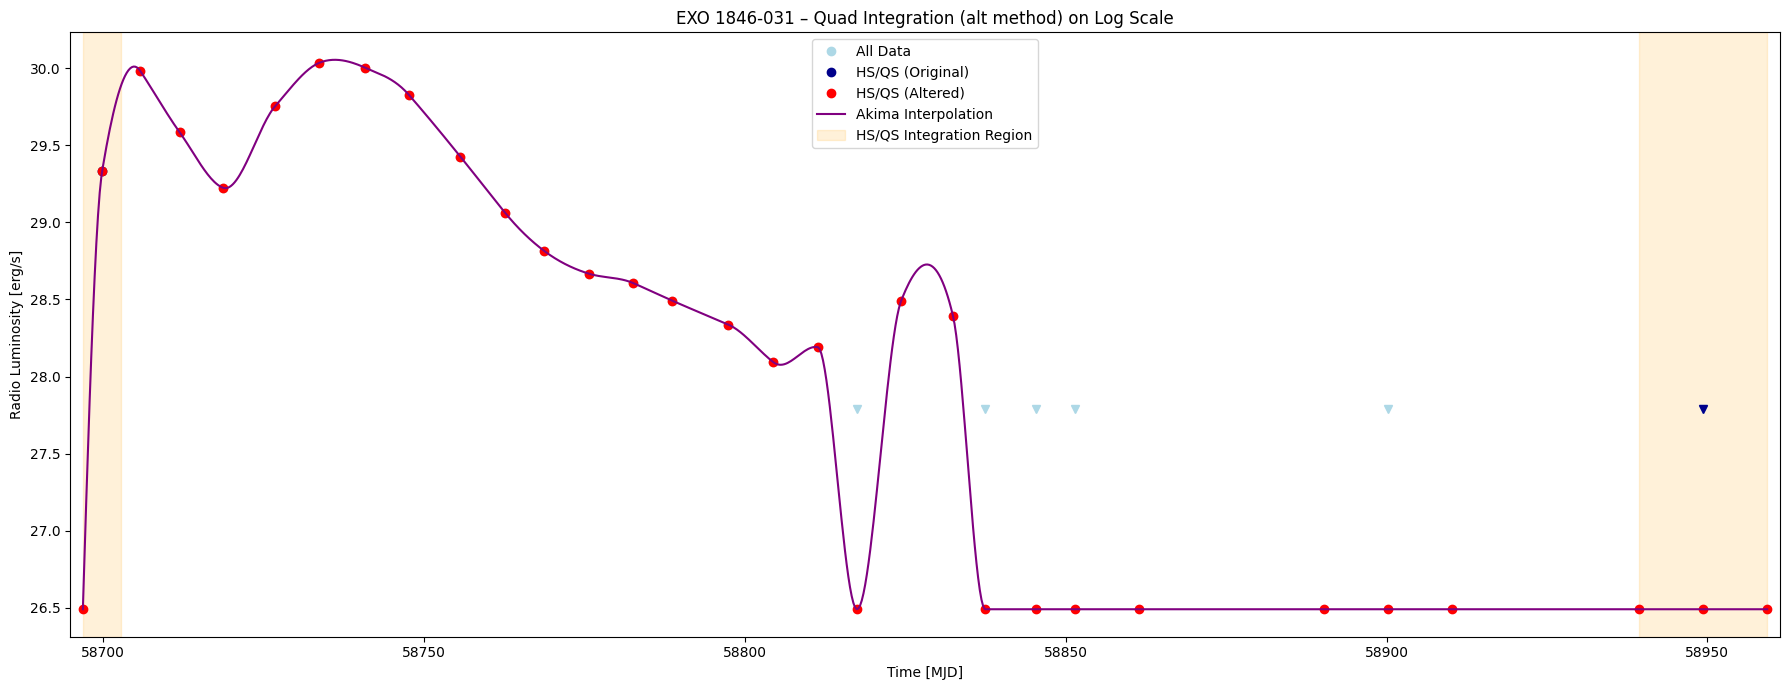


----------------------------------------

----------------------------------------


----------------------------------------


 GRS 1739-278
60157.314255000005 60205.6022

GRS 1739-278 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         3.088e+42 erg
  Linear Akima Interpolation: 2.995e+42 erg
  Log Trapezoidal:            2.625e+42 erg
  Log Akima Interpolation:    3.316e+42 erg
  Log Akima Interpolation (Alt): 3.719e+42 erg


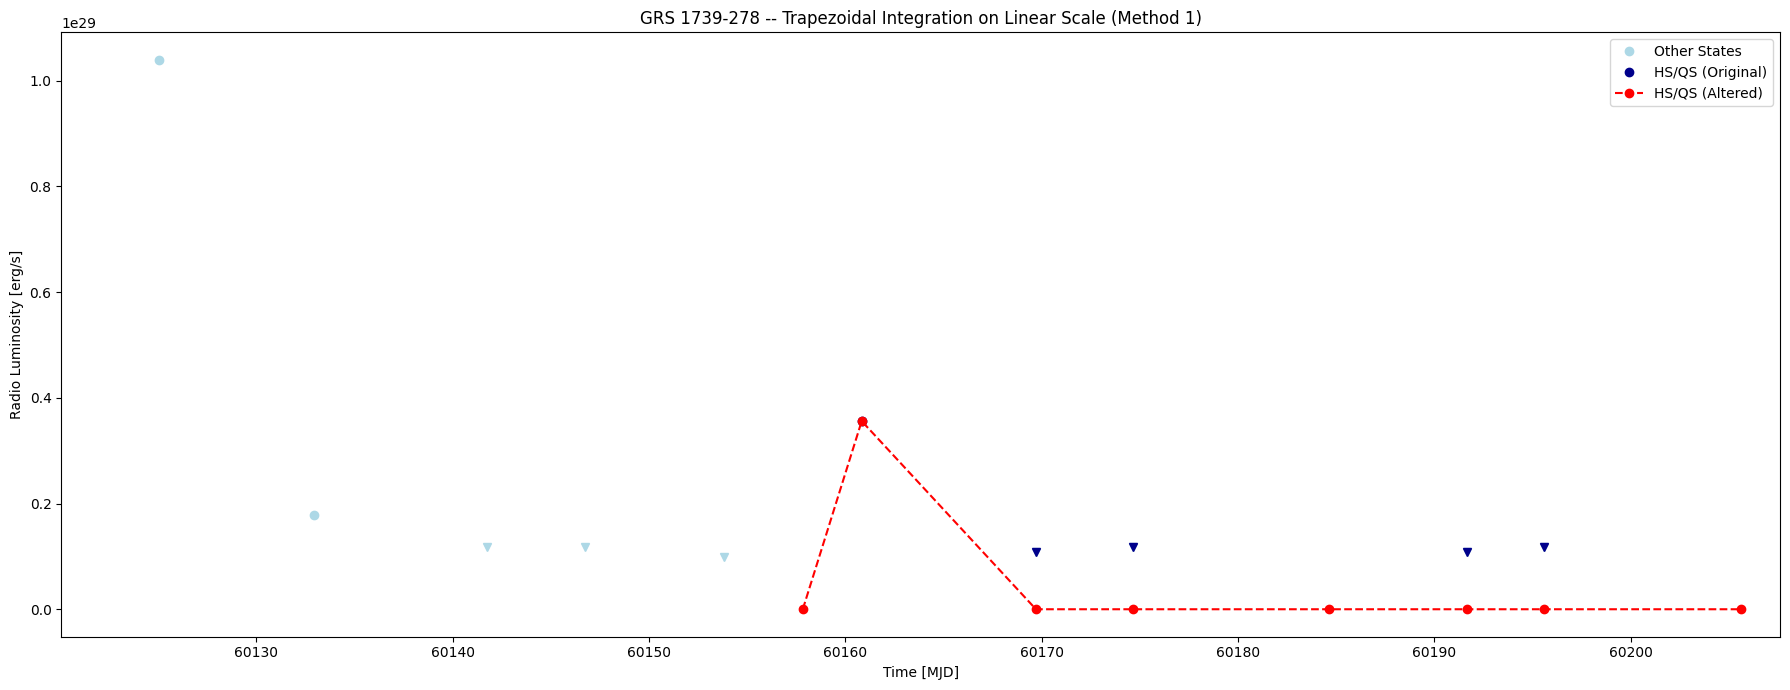

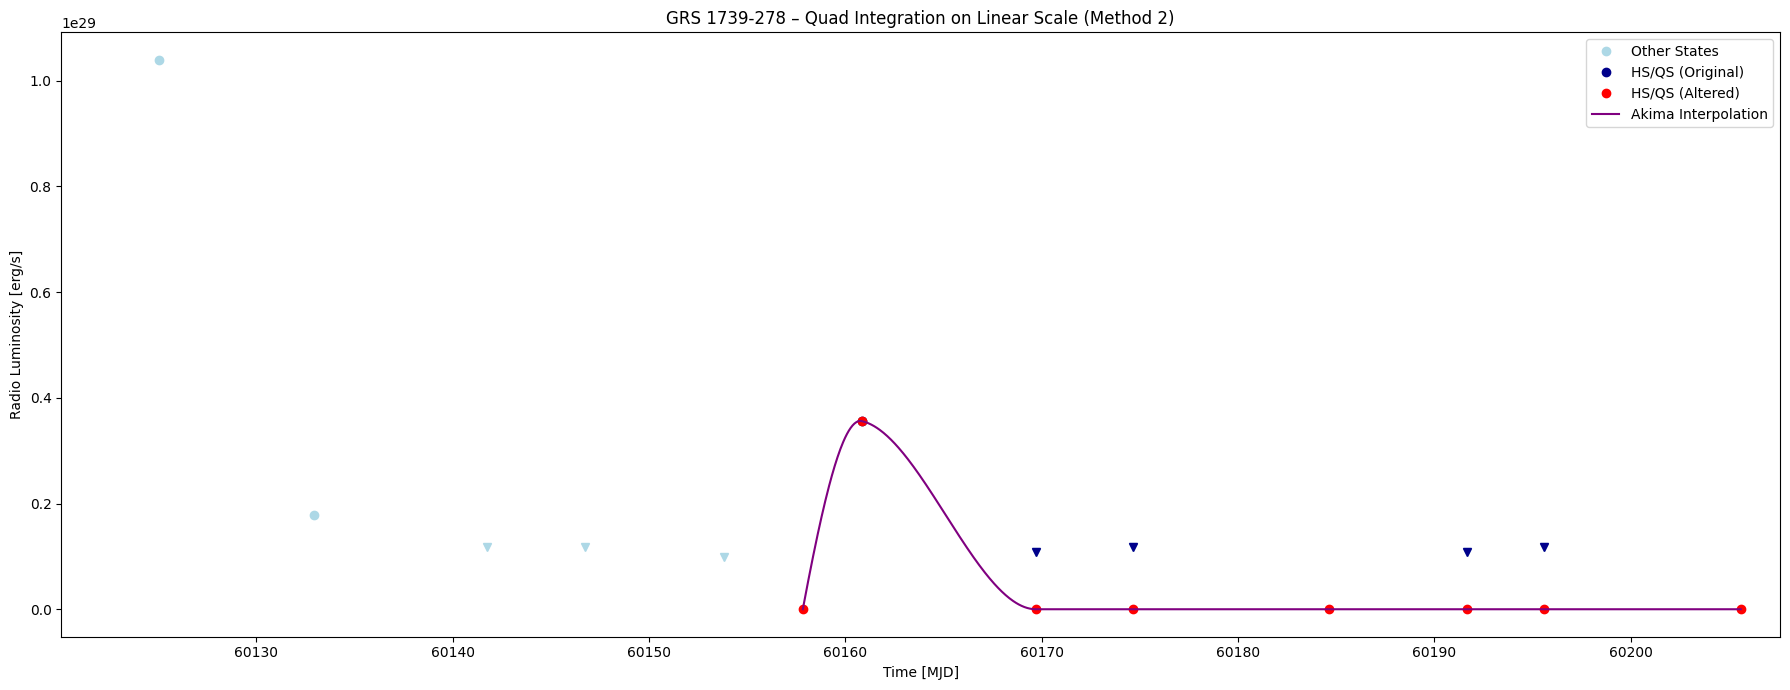

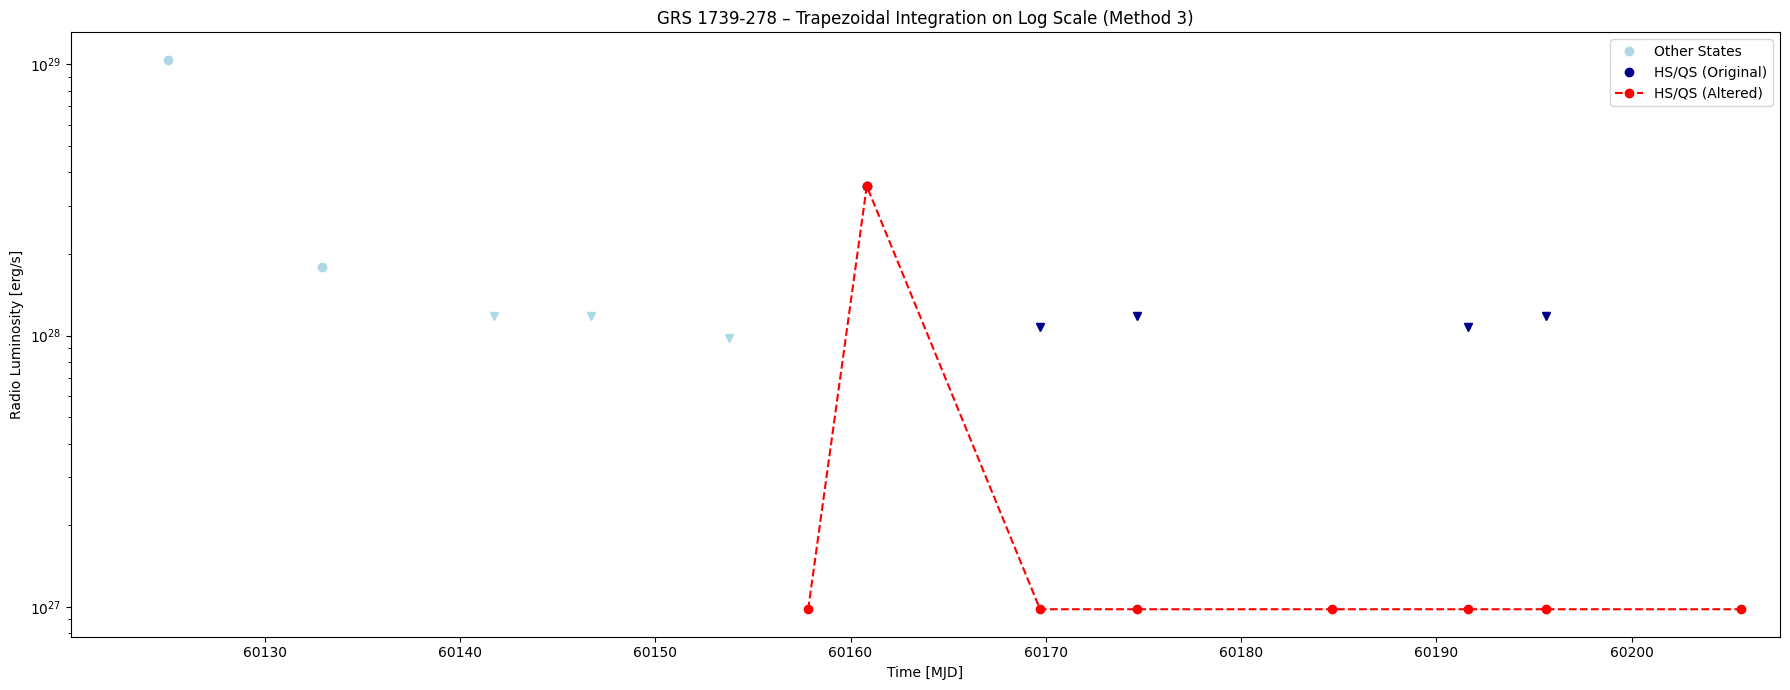

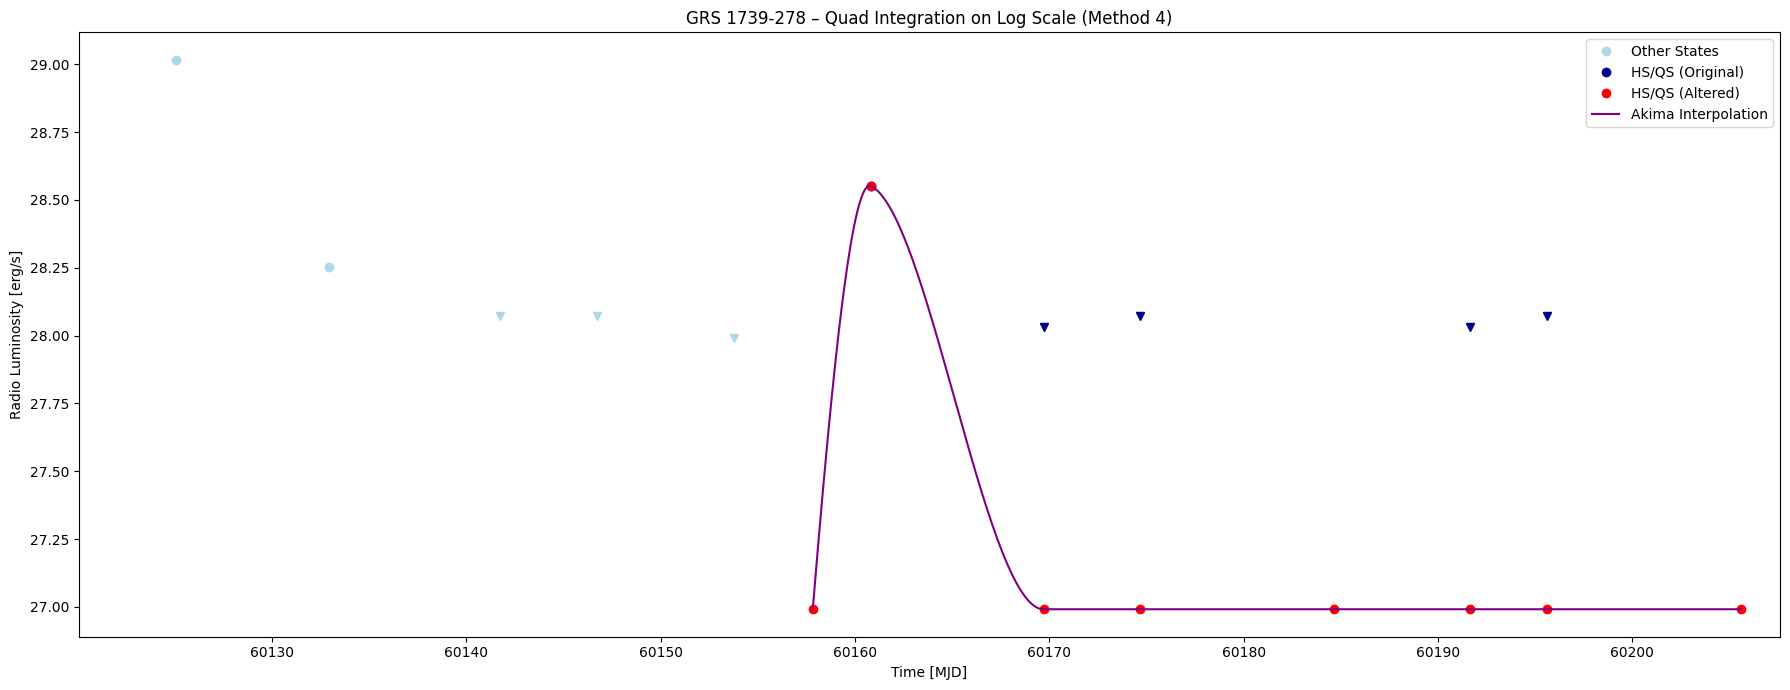

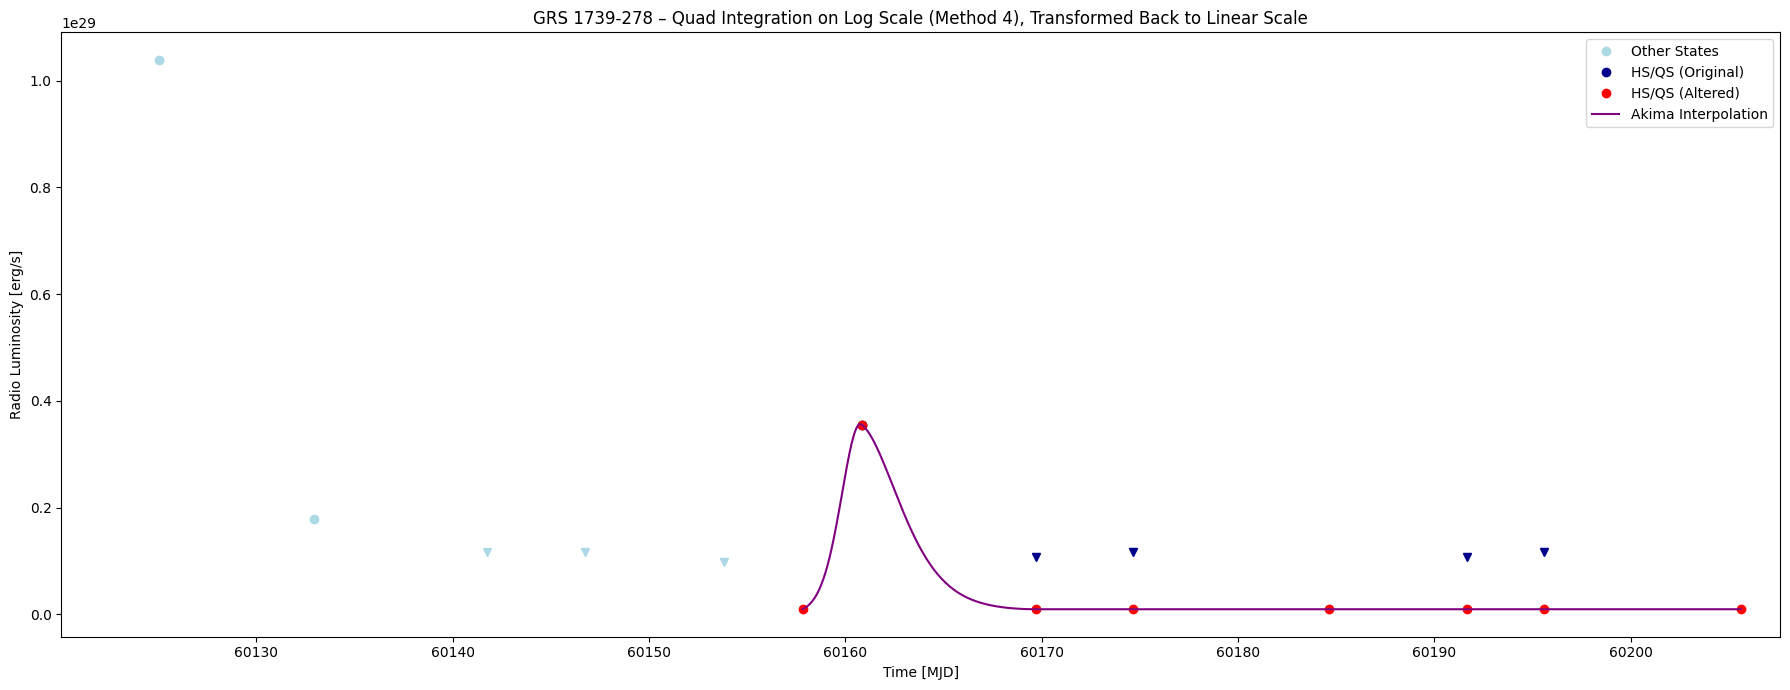

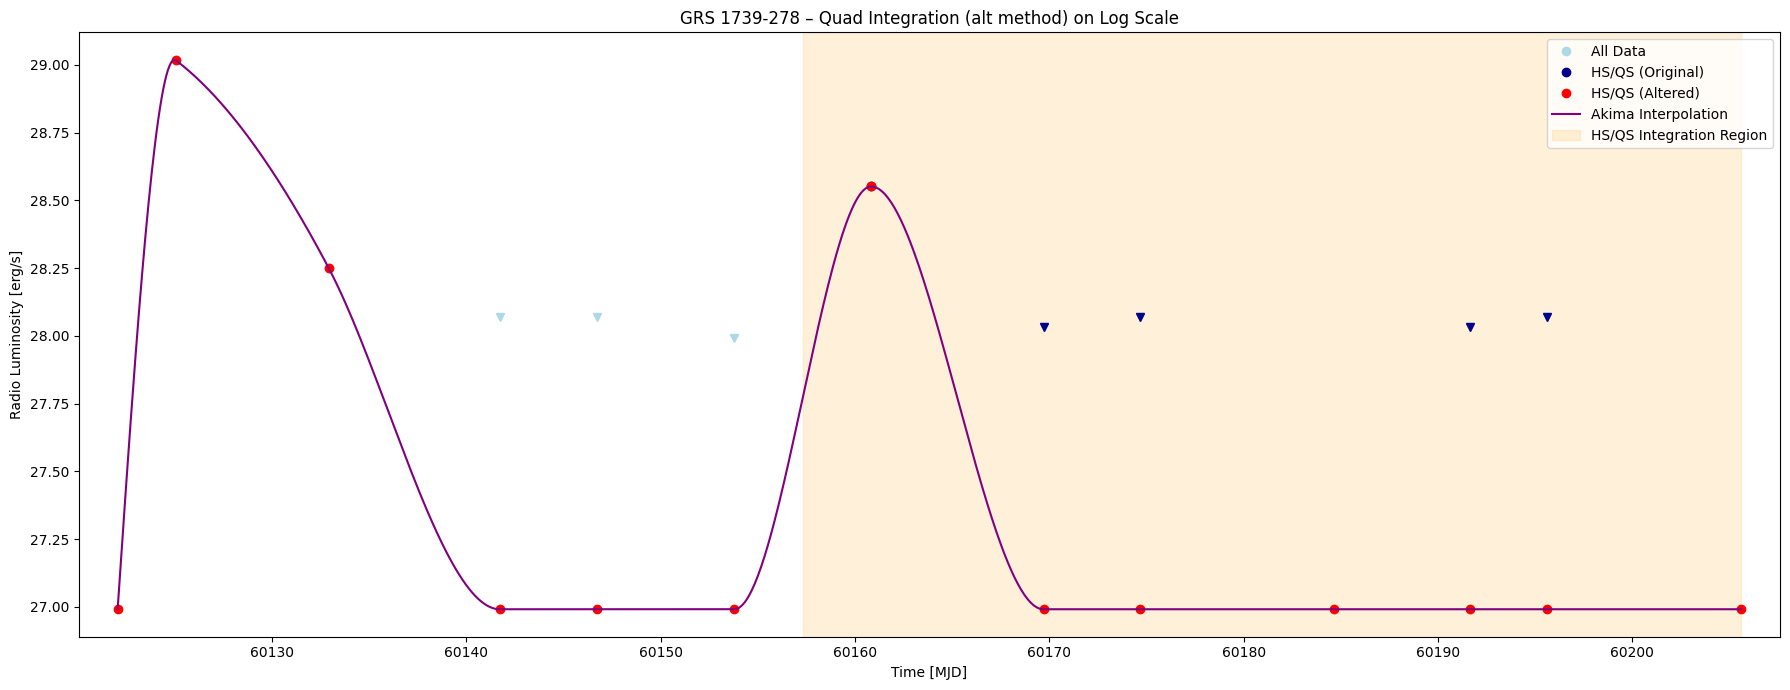


----------------------------------------

----------------------------------------


----------------------------------------


 GRS 1915+105
No HS/QS data for GRS 1915+105. Skipping...

 GX 339-4
58220.01521 58834.961335
58960.637365 59297.21237
59494.1093 60220.60714

GX 339-4 [BH] Energy Estimates:
  Linear Trapezoidal:         2.081e+45 erg
  Linear Akima Interpolation: 2.075e+45 erg
  Log Trapezoidal:            1.954e+45 erg
  Log Akima Interpolation:    2.009e+45 erg
  Log Akima Interpolation (Alt): 2.010e+45 erg


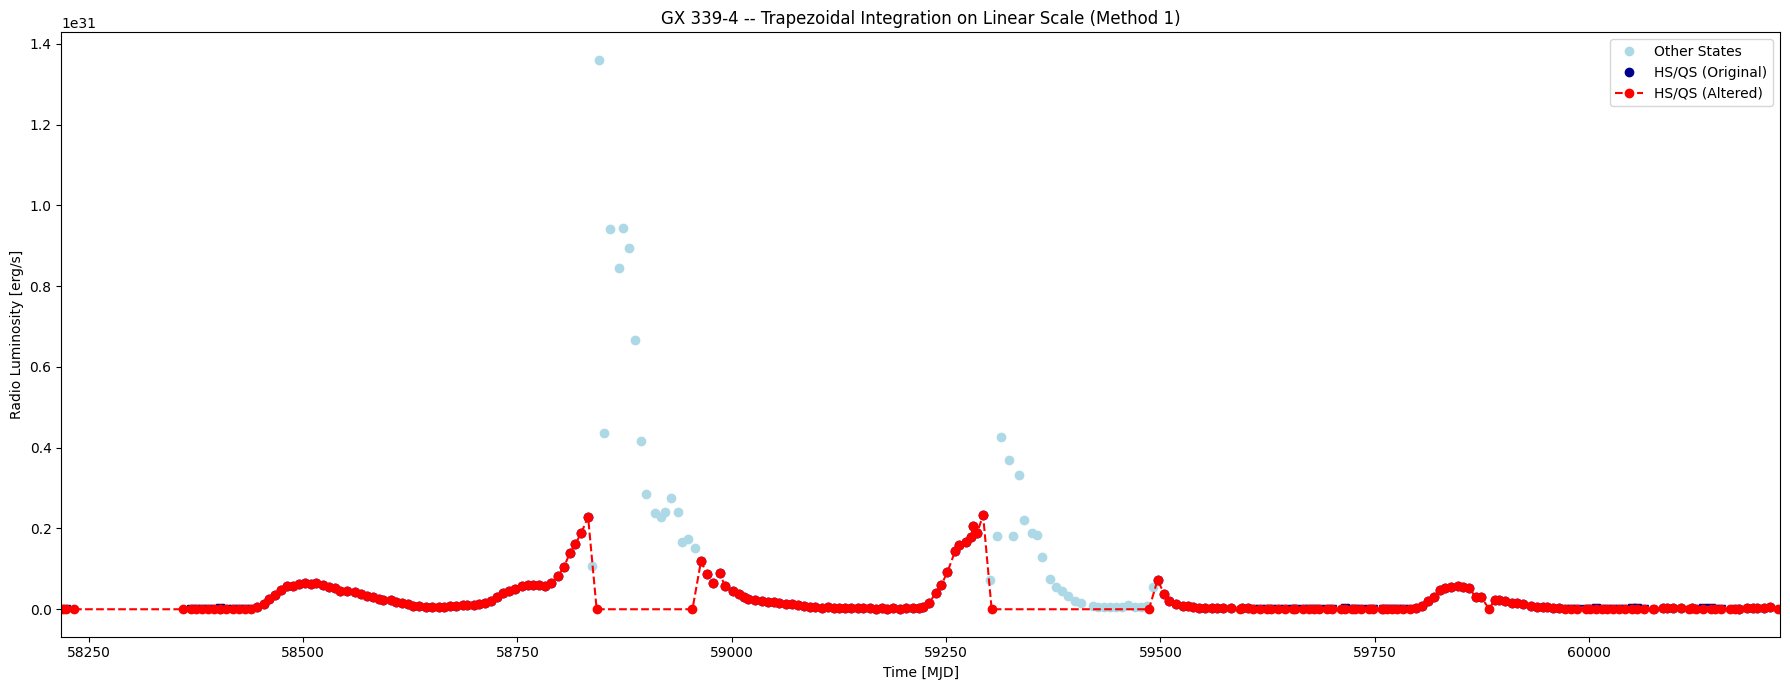

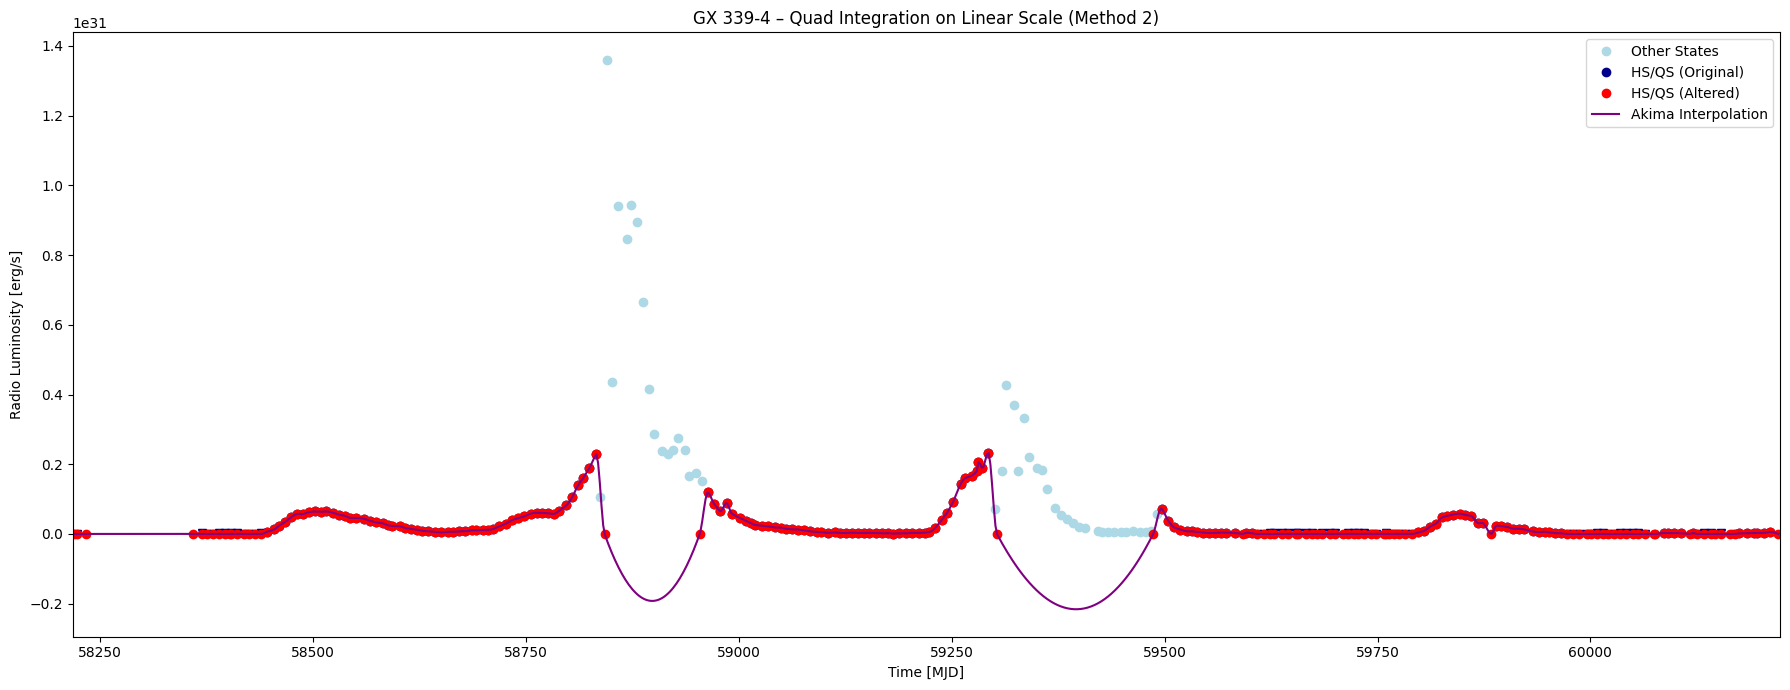

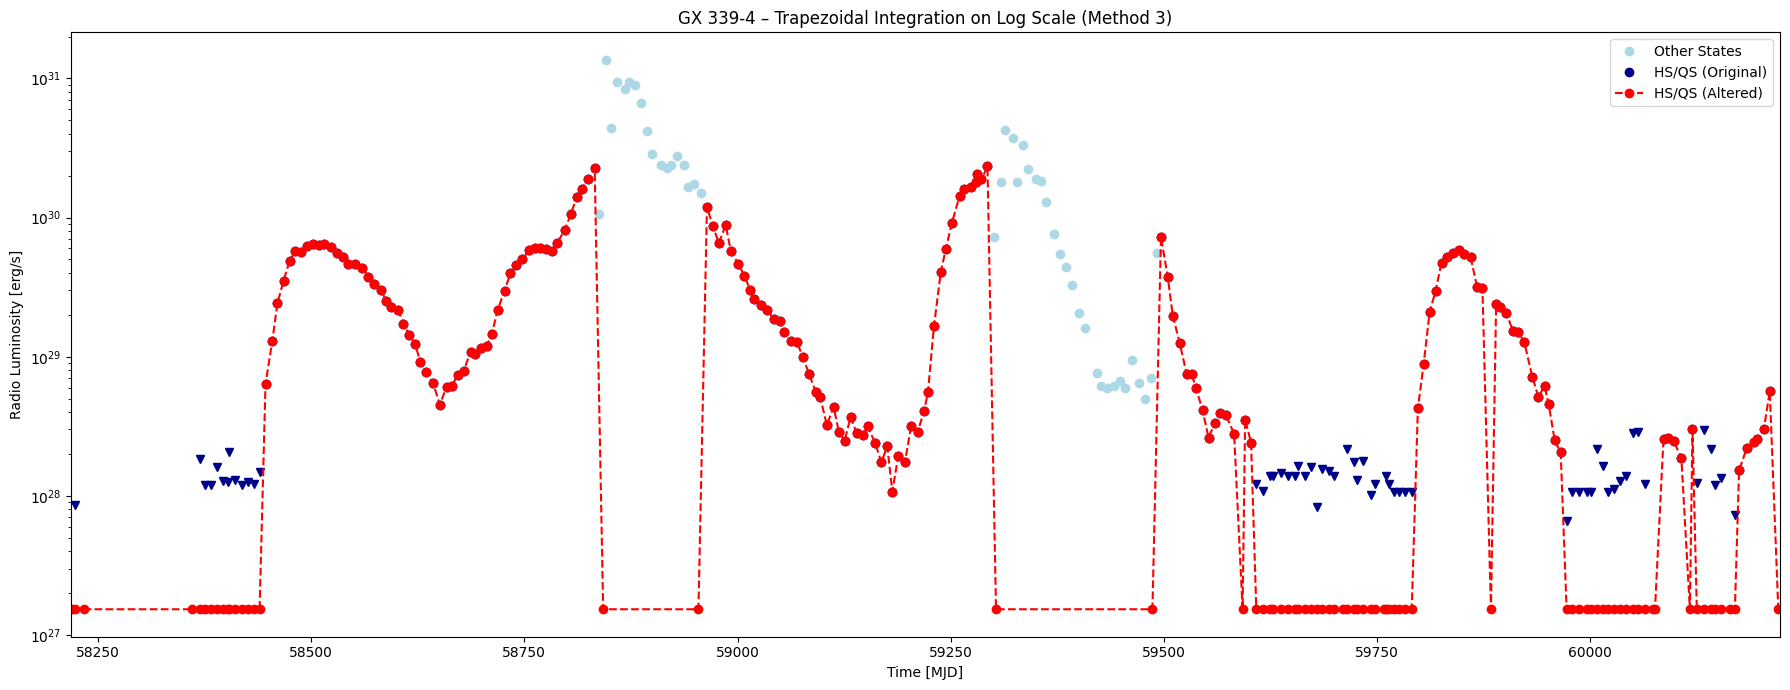

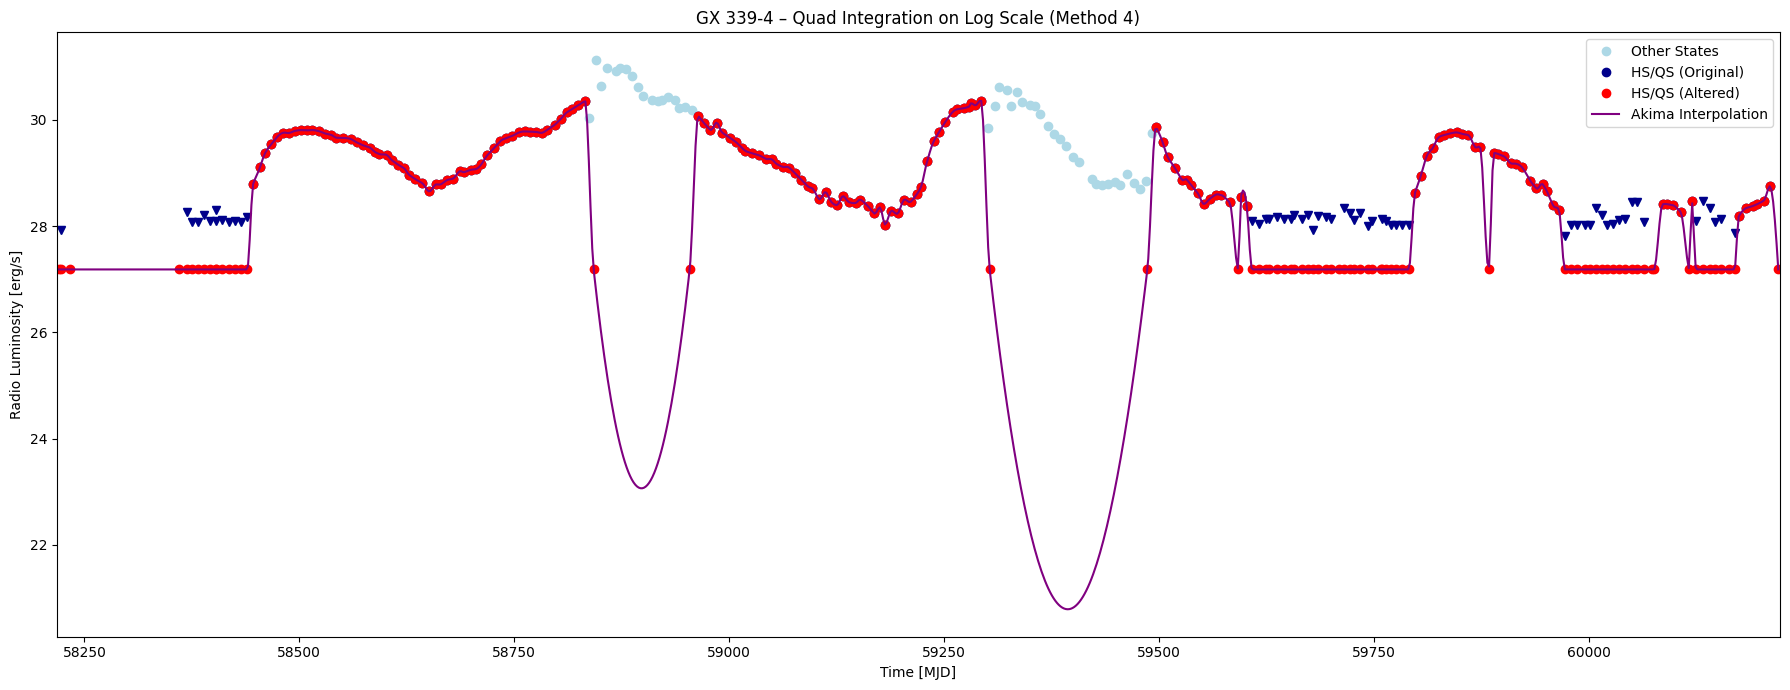

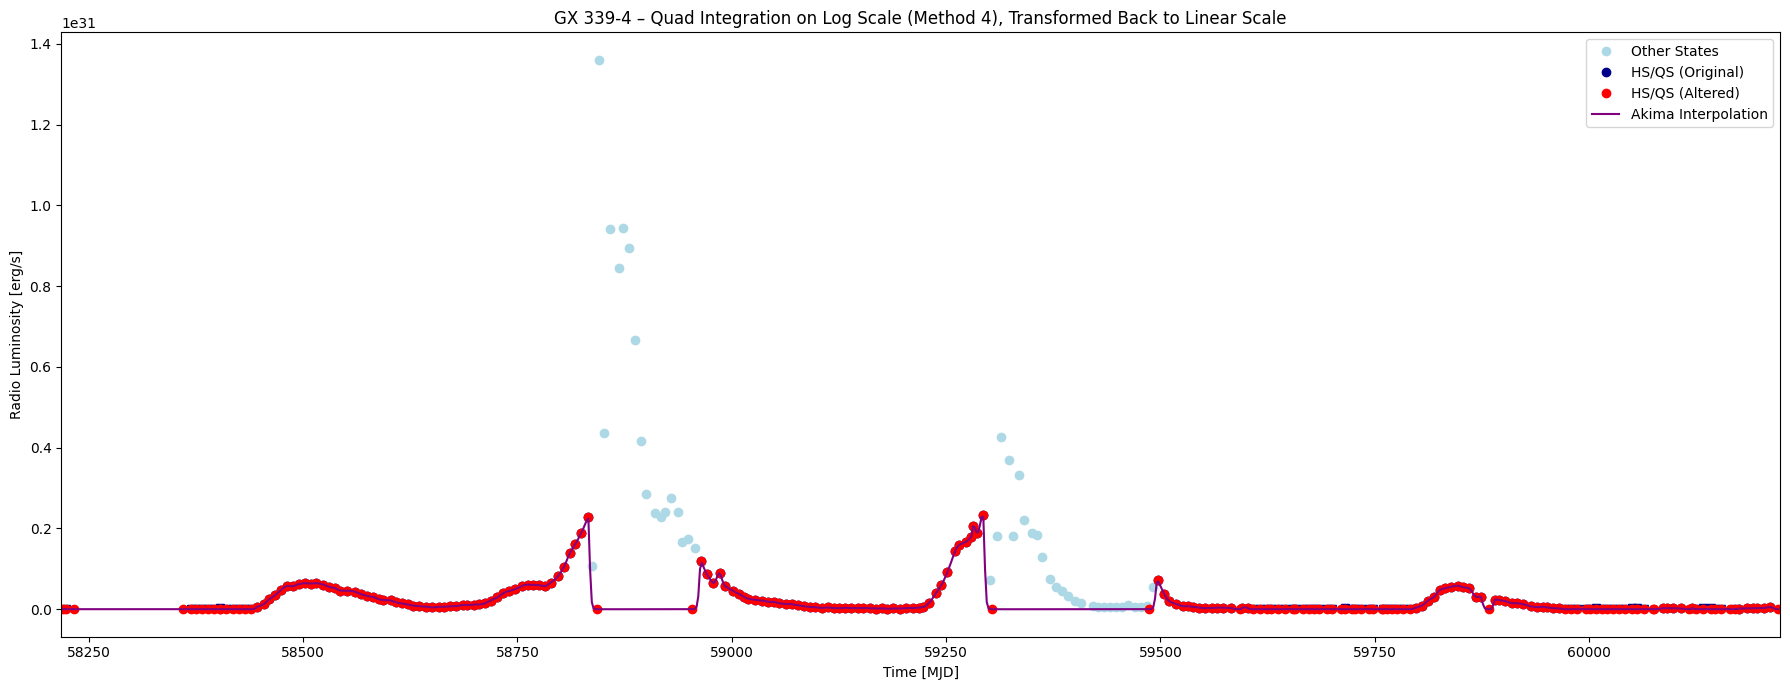

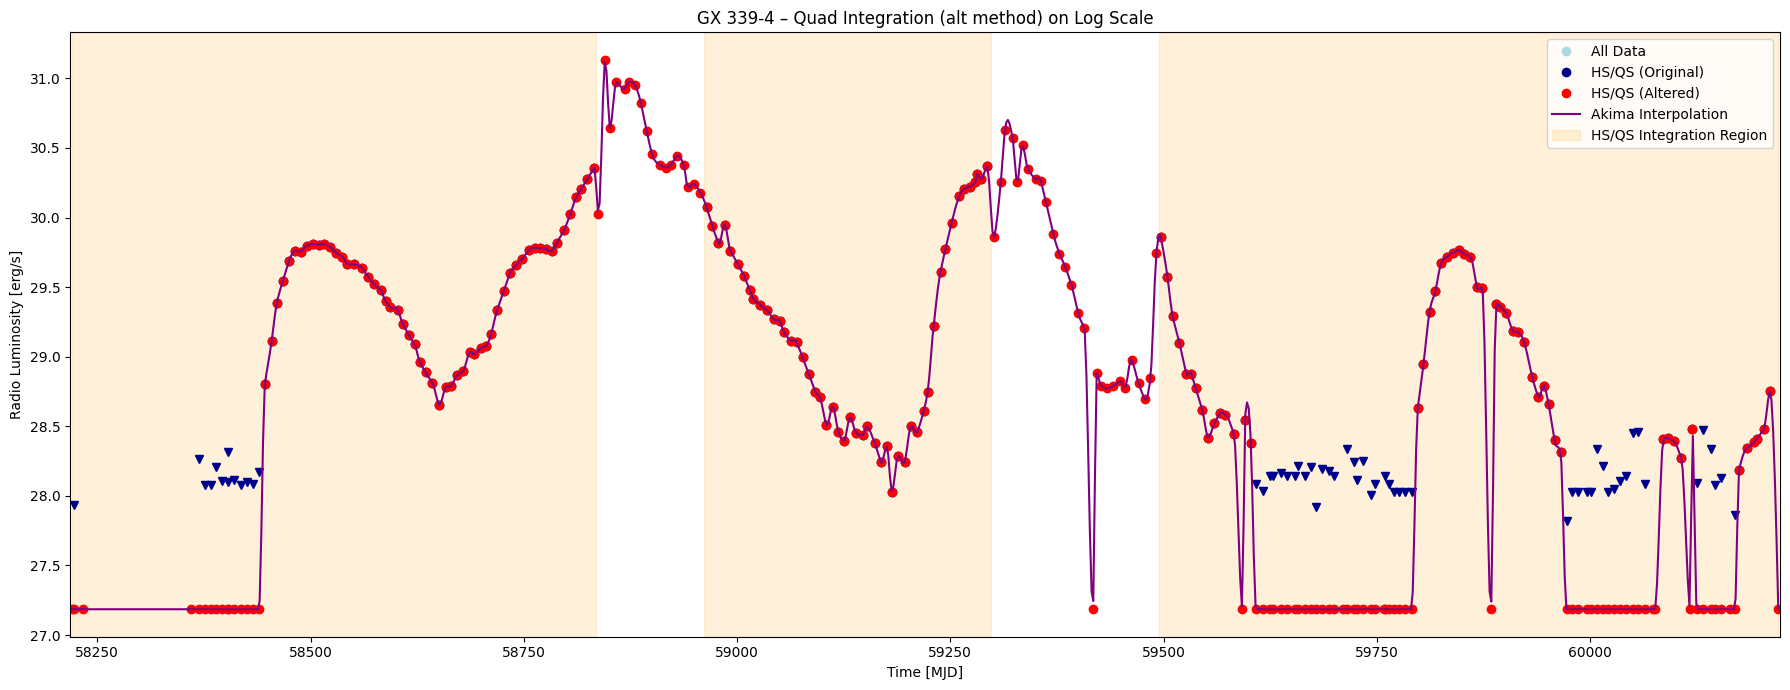


----------------------------------------

----------------------------------------


----------------------------------------


 H1743-322
58363.734 58442.468

H1743-322 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         4.049e+43 erg
  Linear Akima Interpolation: 4.039e+43 erg
  Log Trapezoidal:            3.906e+43 erg
  Log Akima Interpolation:    4.088e+43 erg
  Log Akima Interpolation (Alt): 4.088e+43 erg


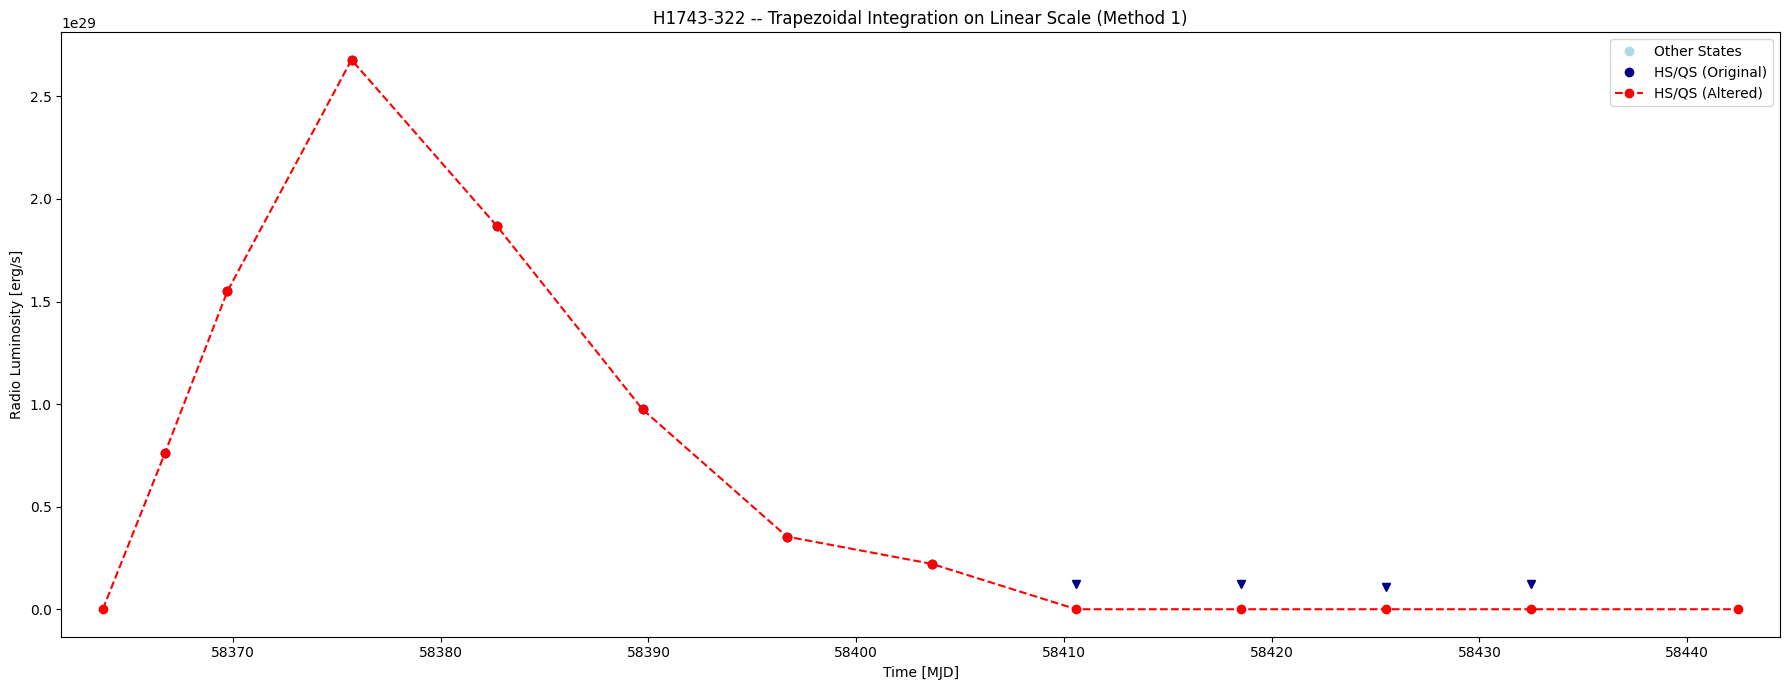

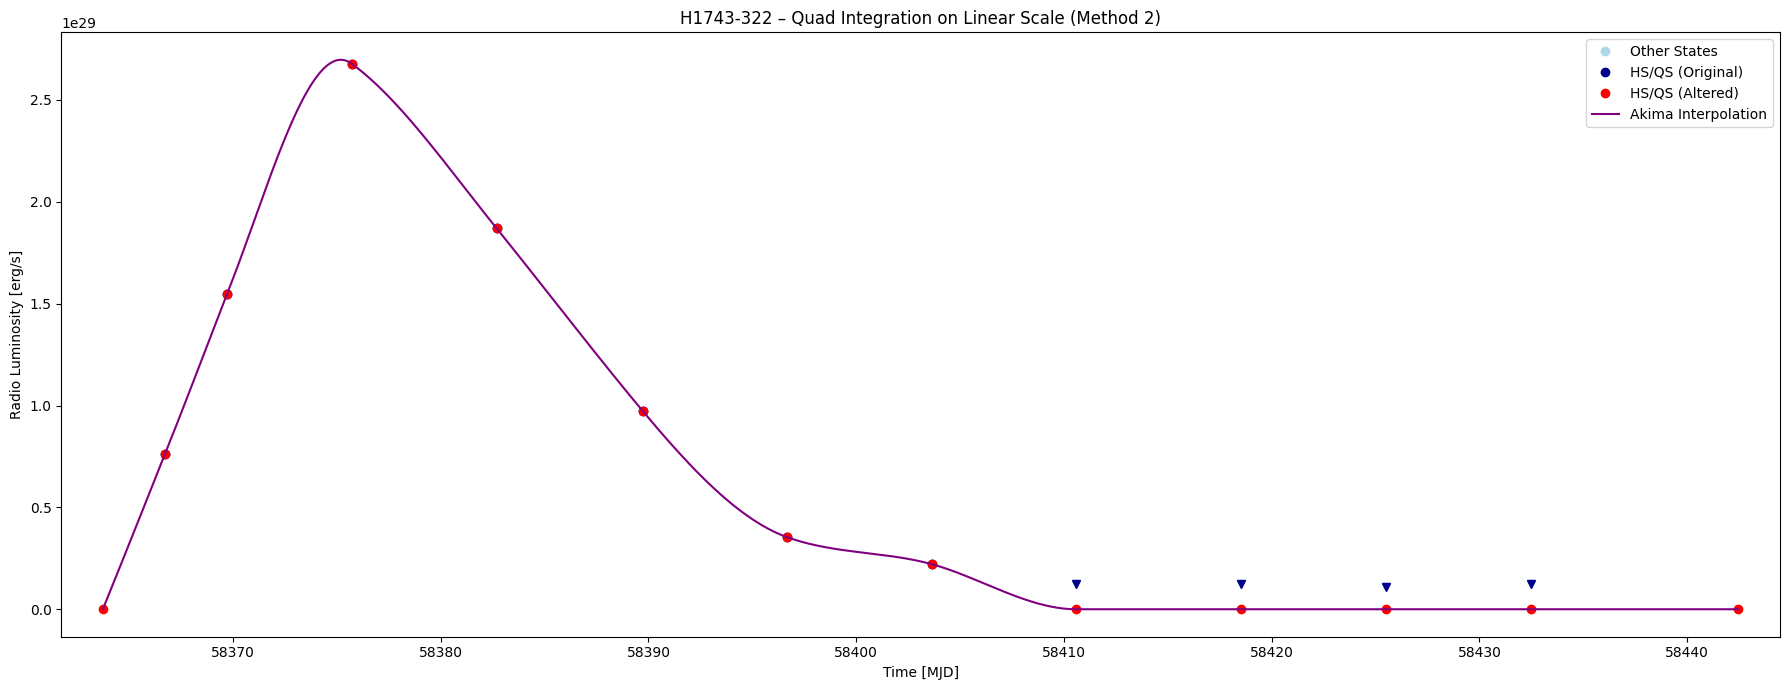

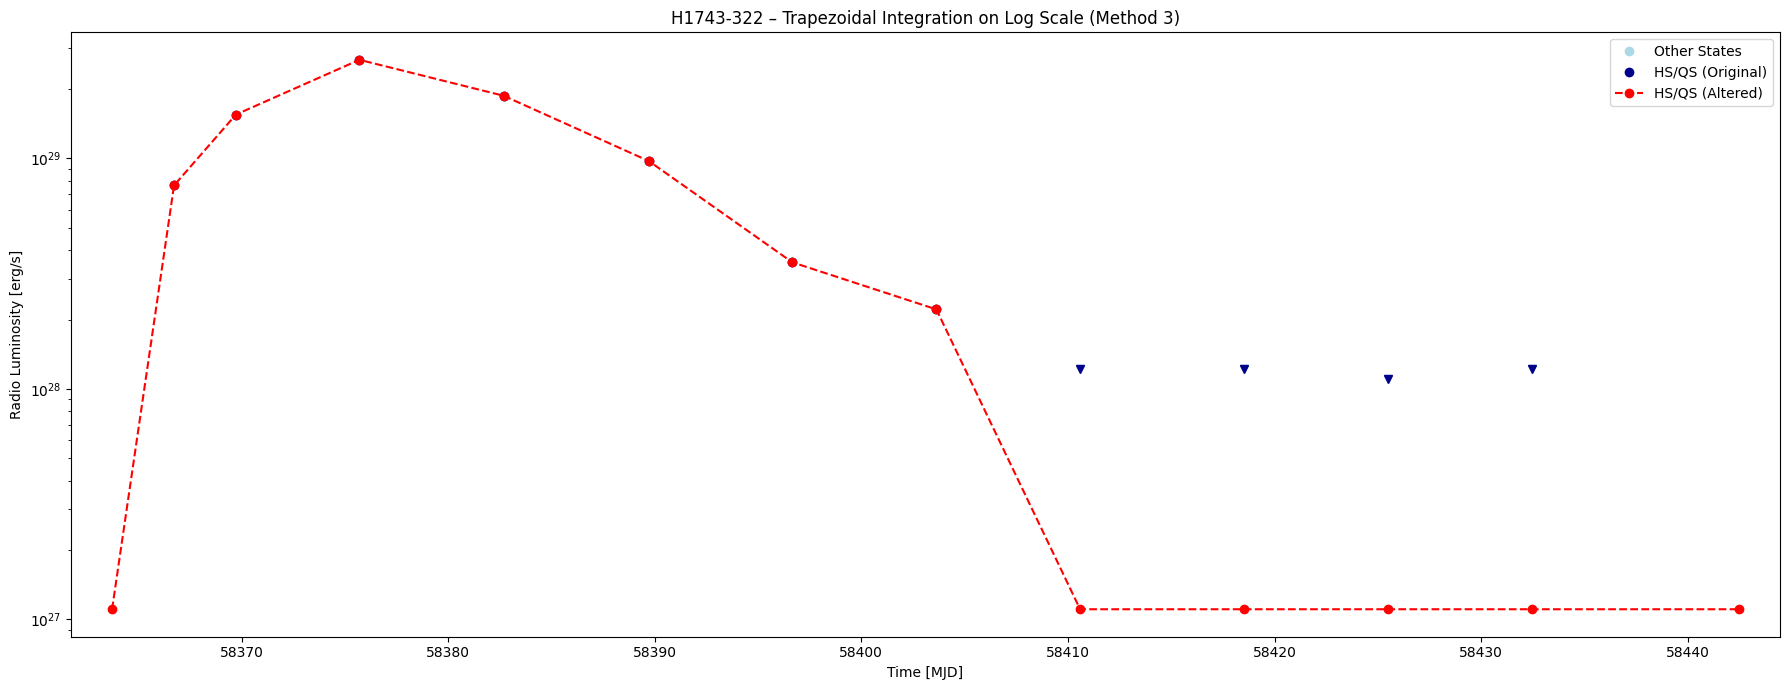

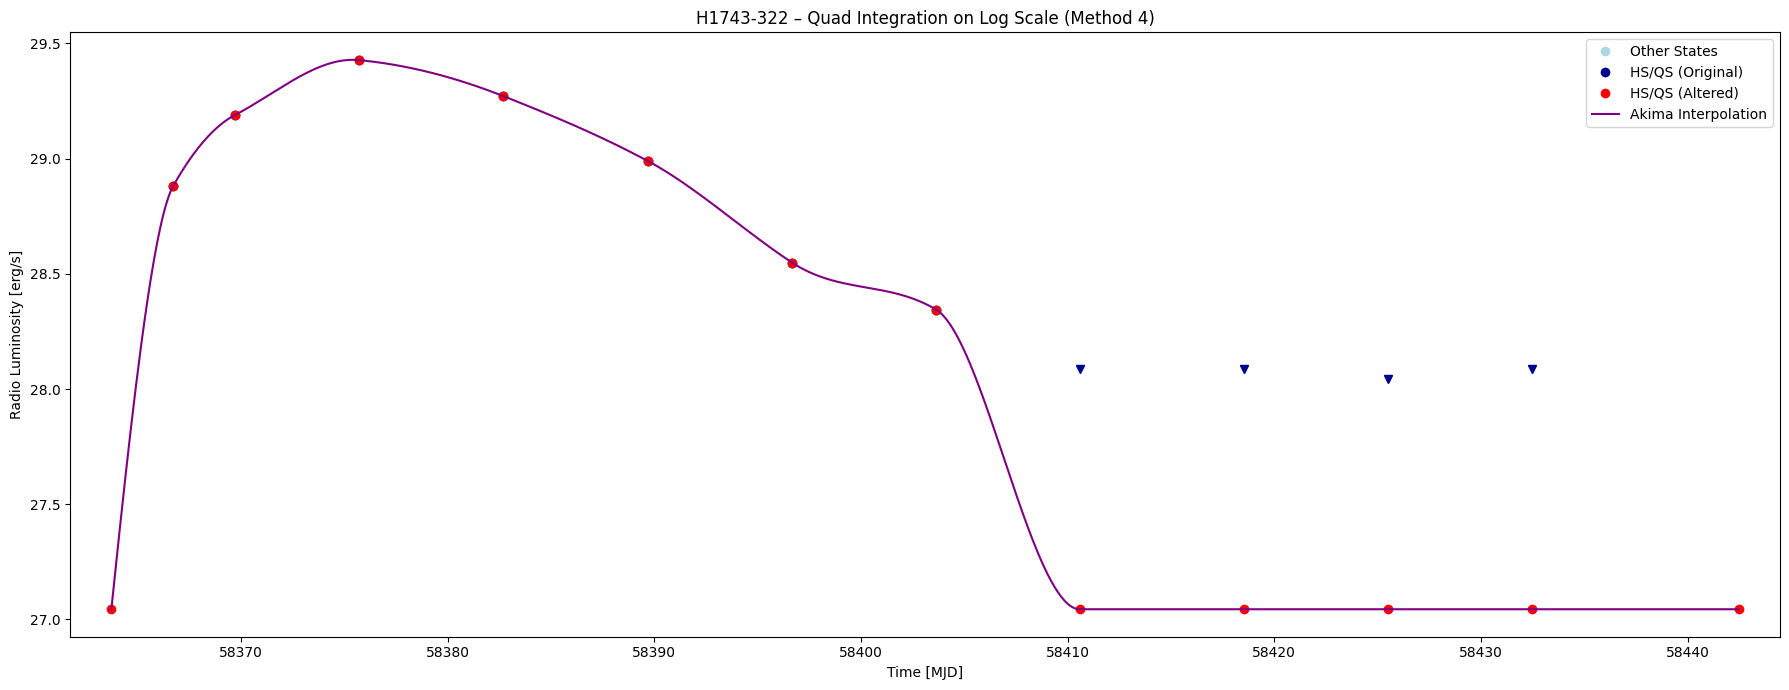

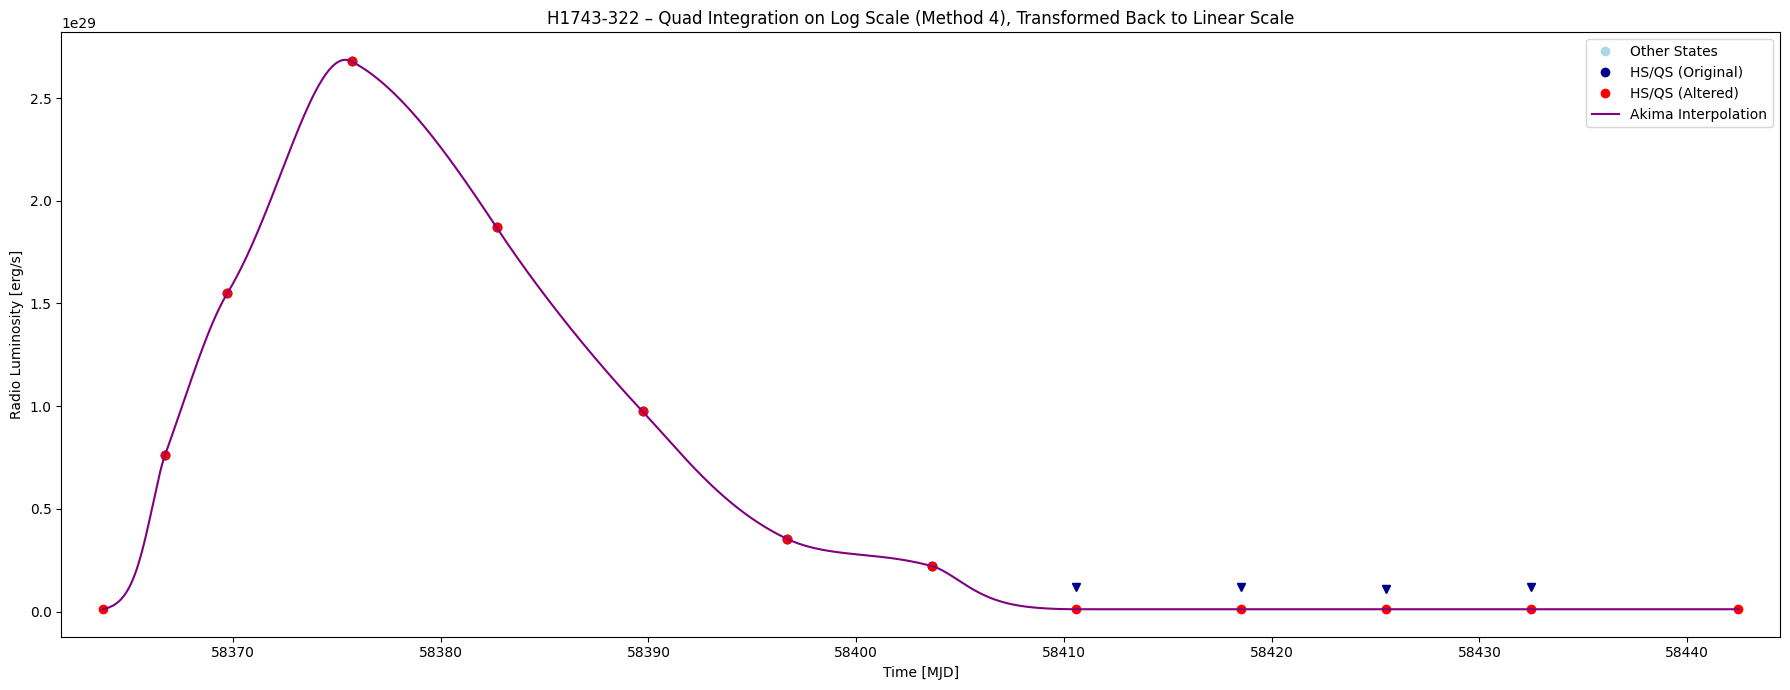

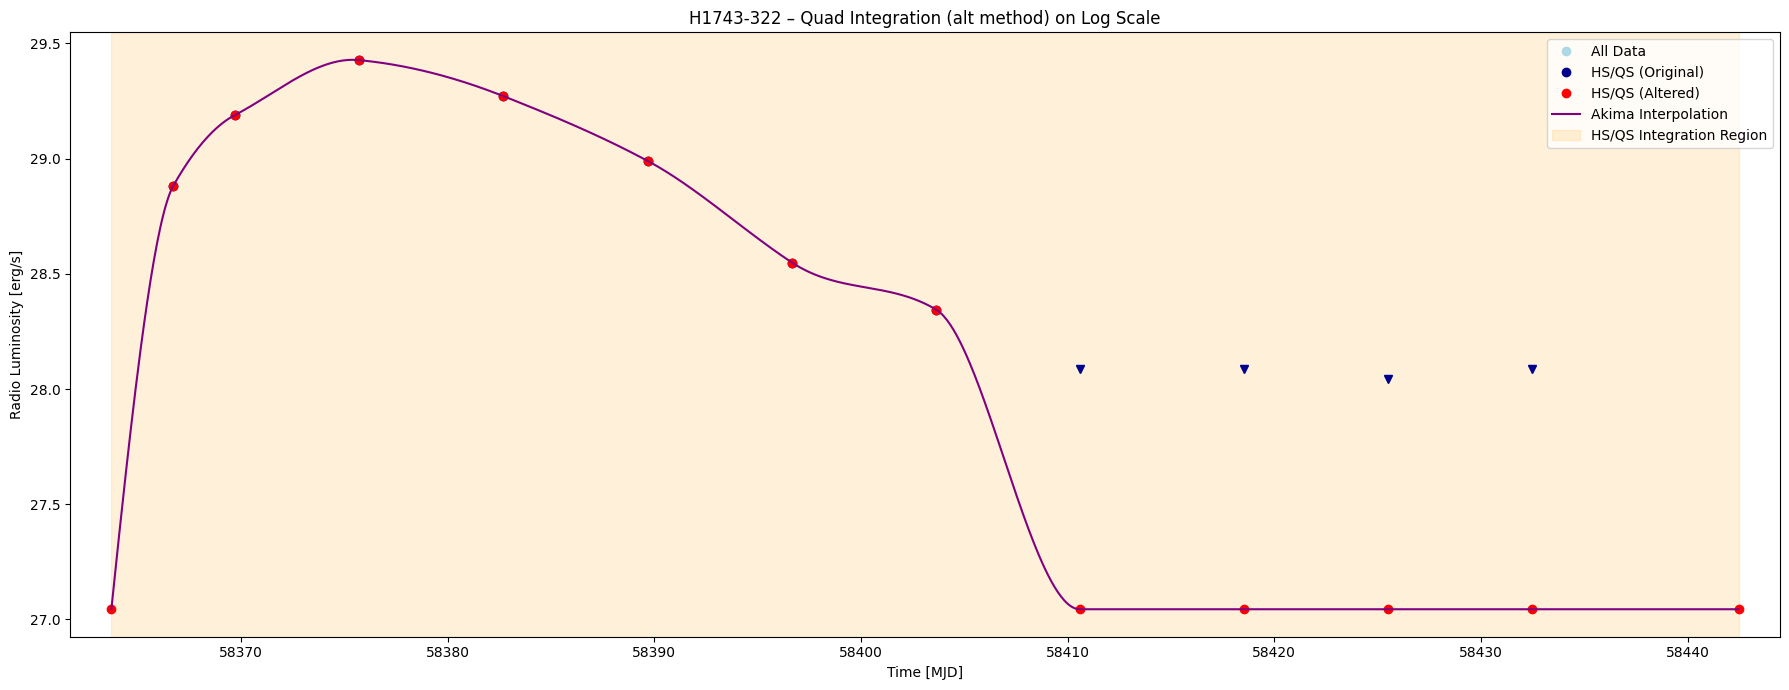


----------------------------------------

----------------------------------------


----------------------------------------


 IGR J17091-3624
59652.18698 59661.58821
59961.912549999994 59996.25469

IGR J17091-3624 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         4.897e+43 erg
  Linear Akima Interpolation: 5.314e+43 erg
  Log Trapezoidal:            4.141e+43 erg
  Log Akima Interpolation:    3.179e+43 erg
  Log Akima Interpolation (Alt): 4.078e+43 erg


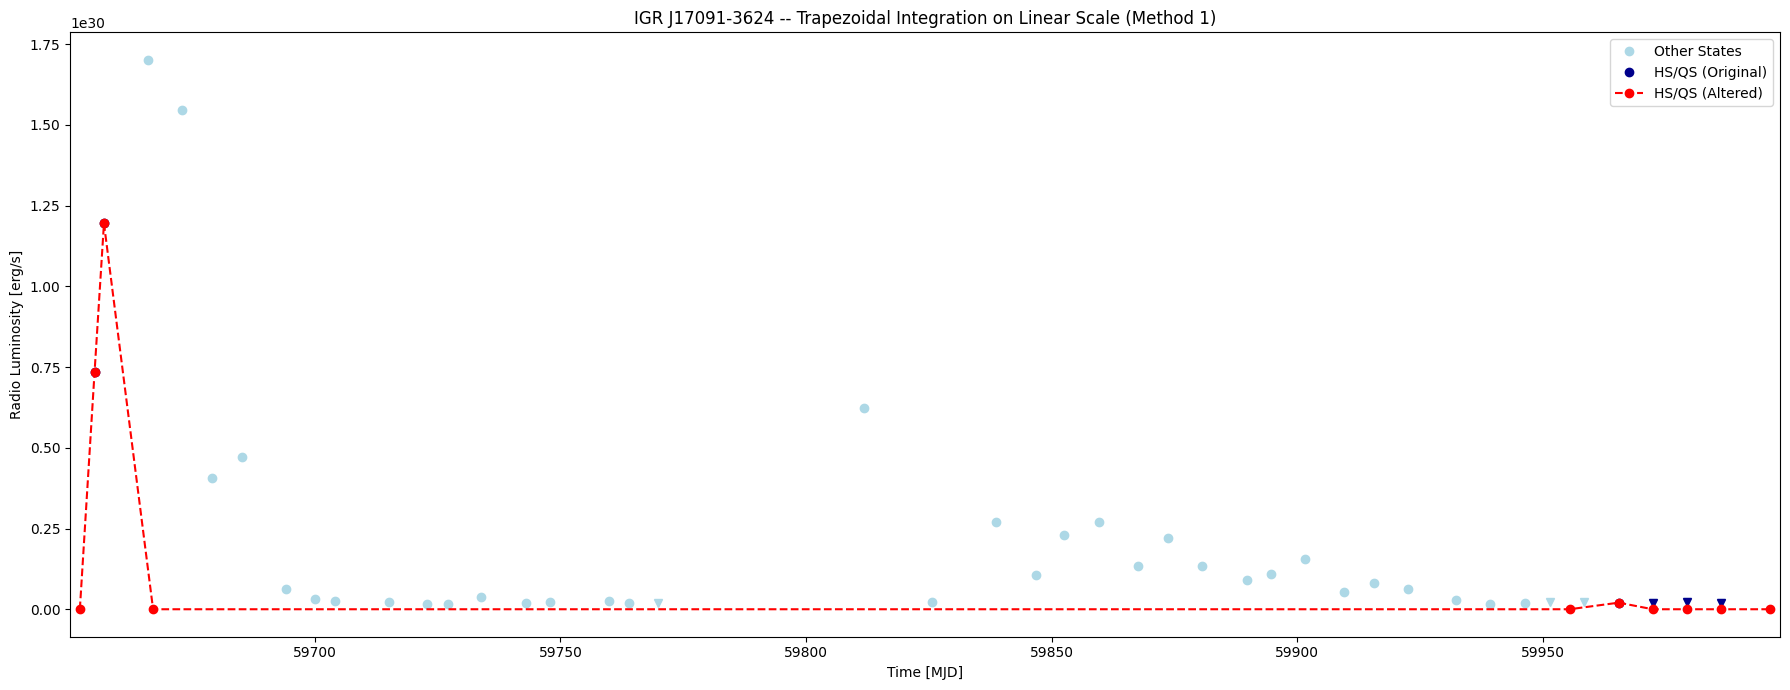

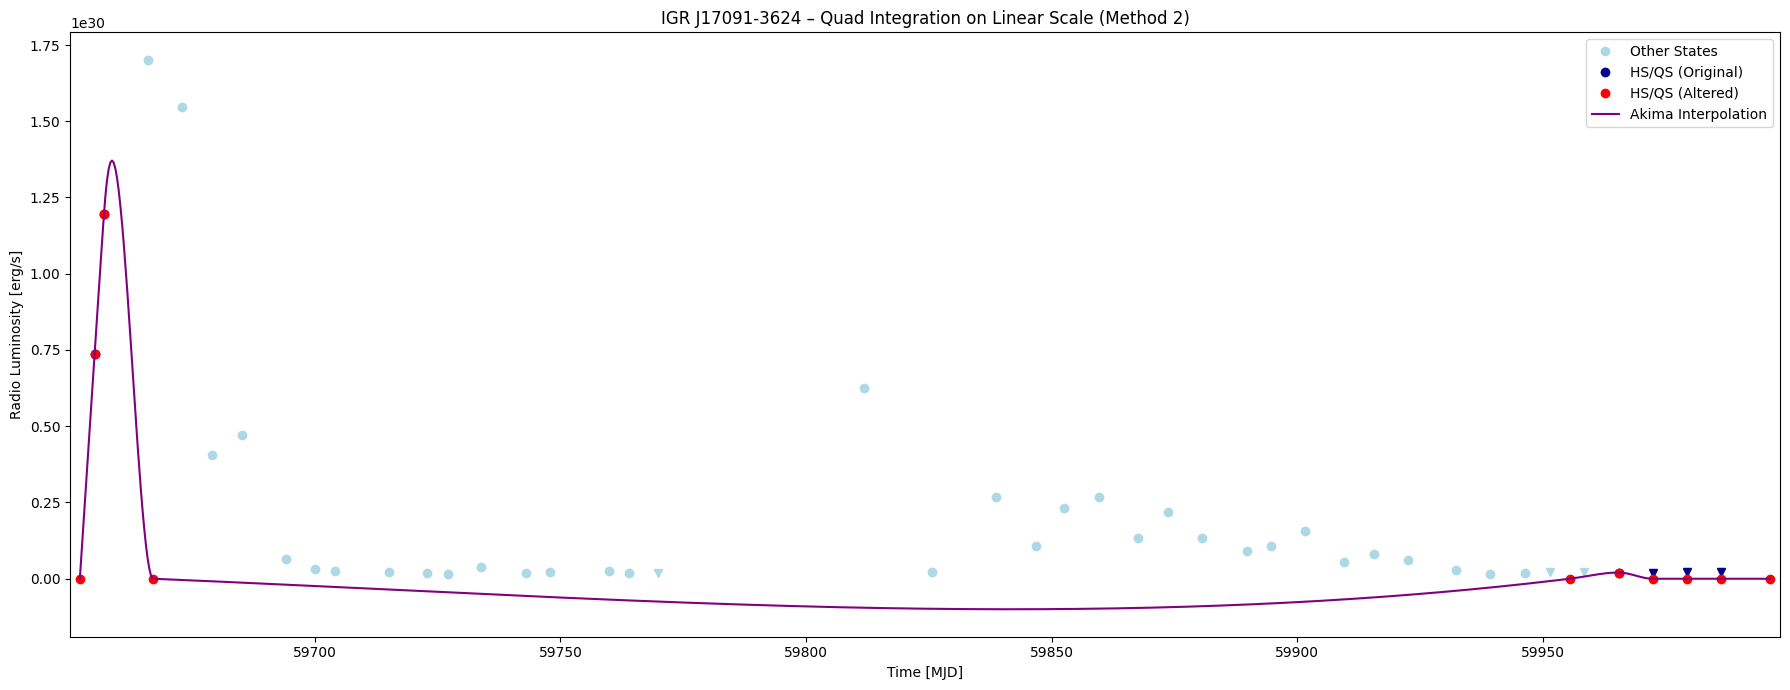

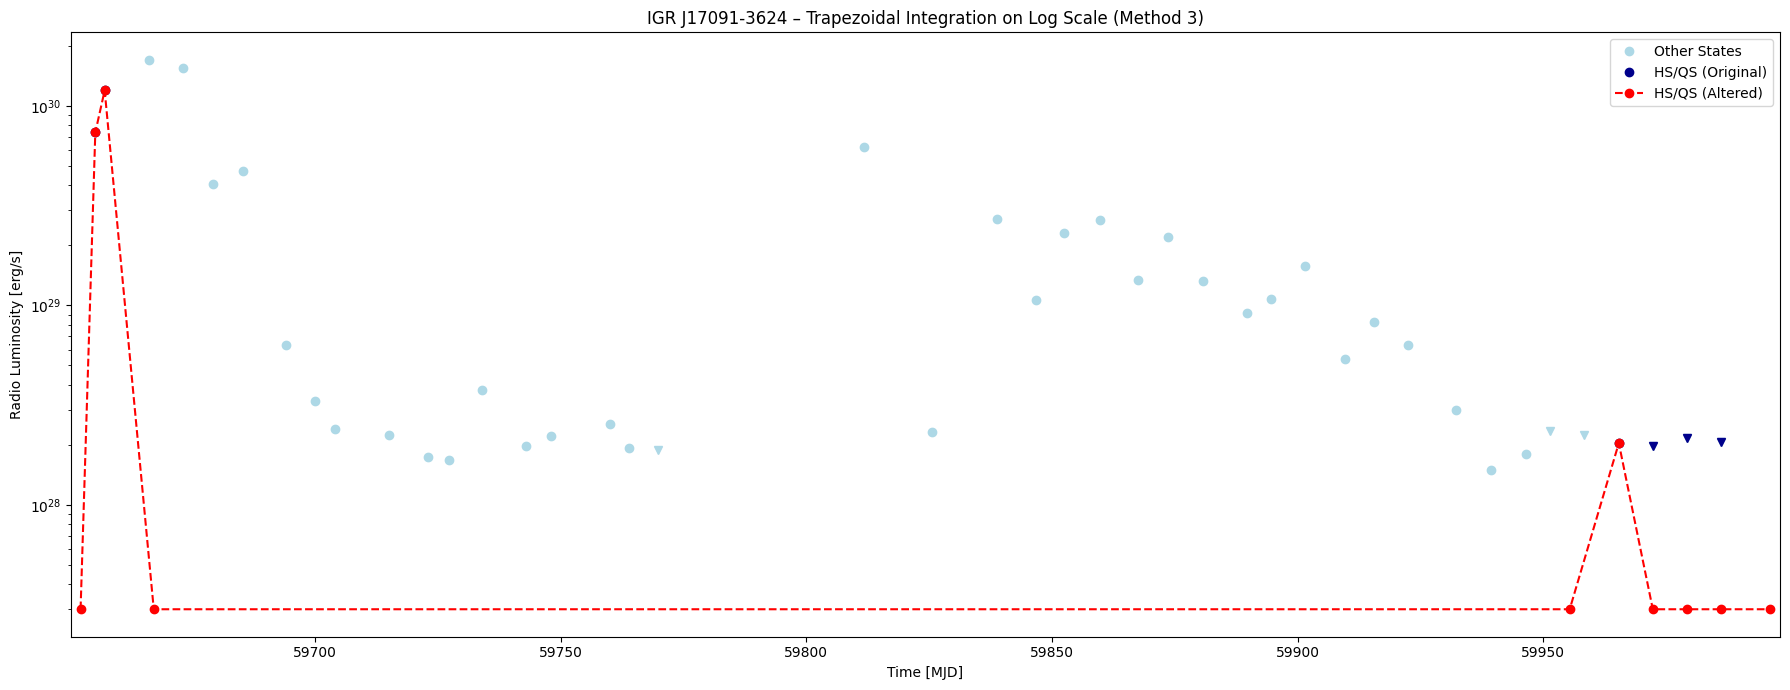

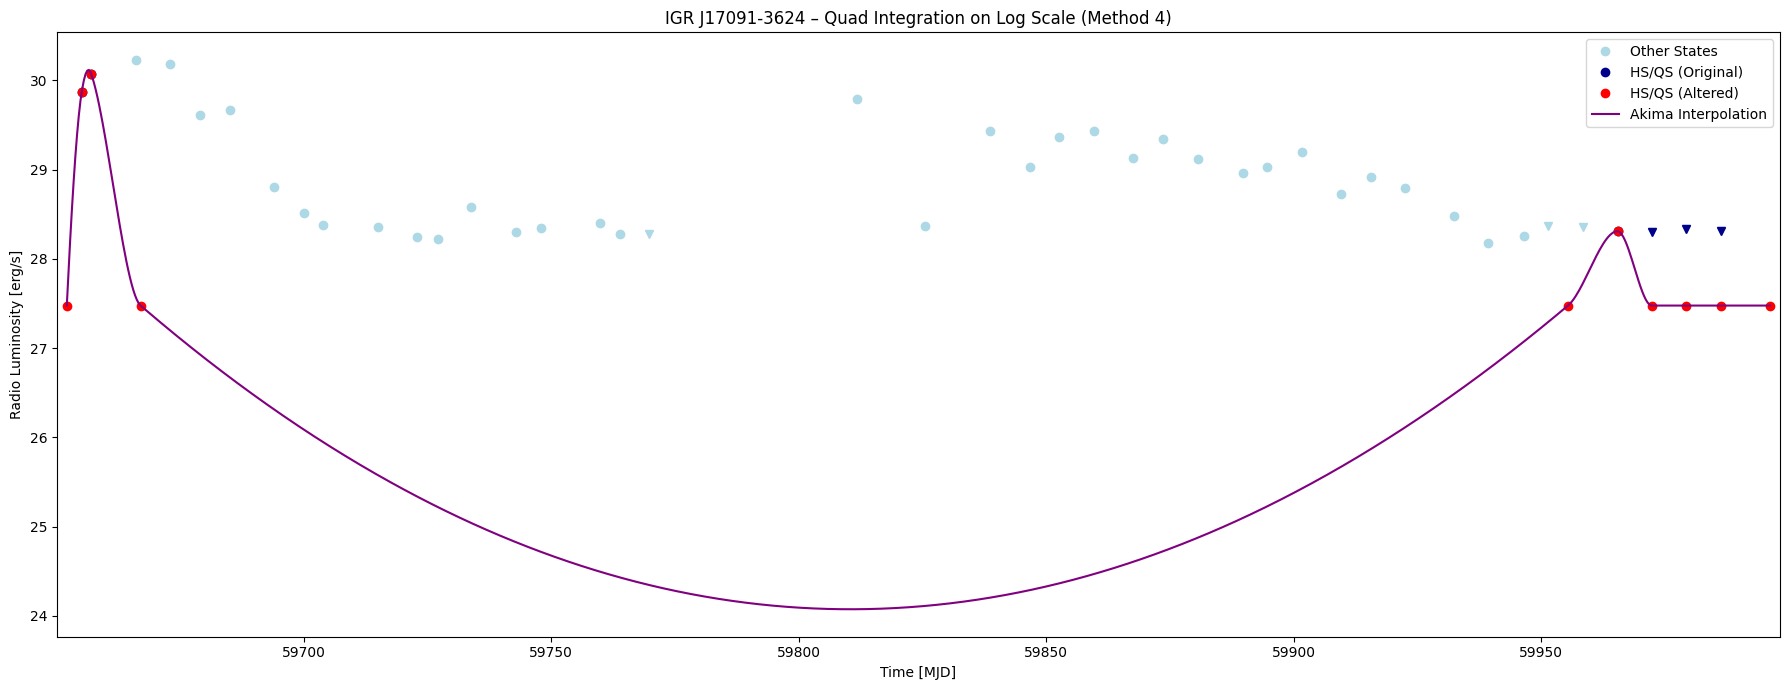

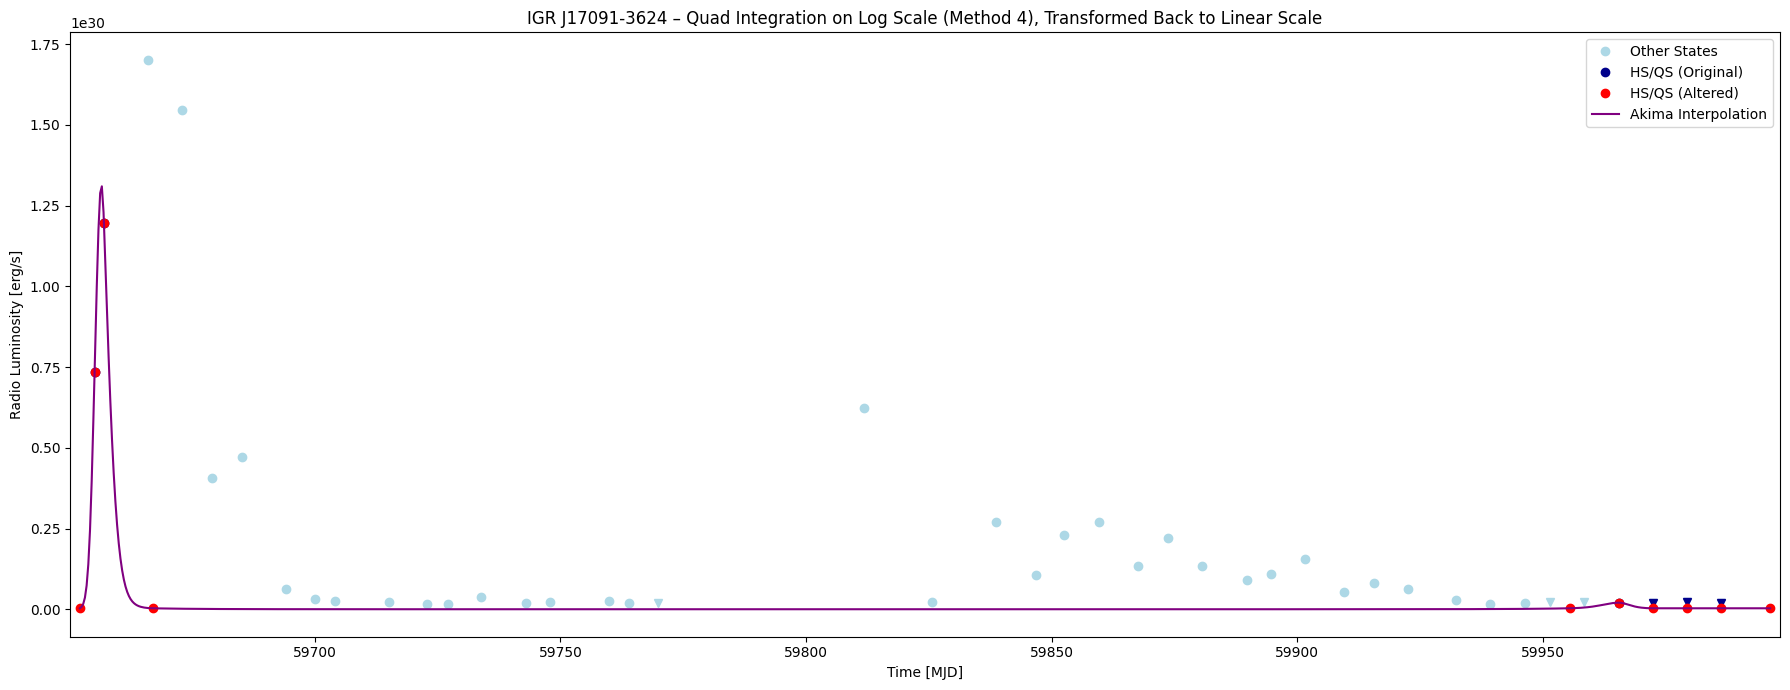

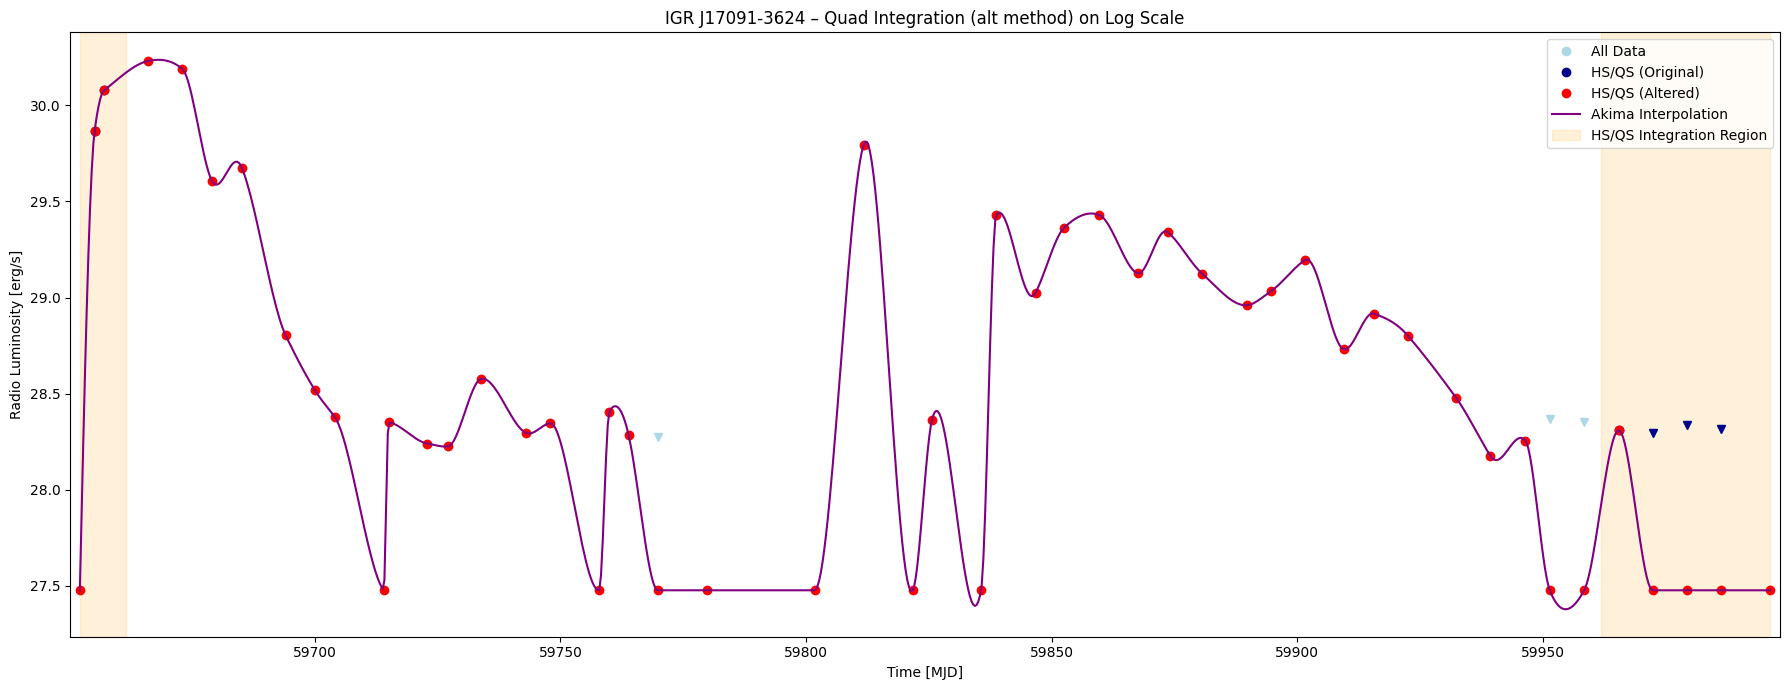


----------------------------------------

----------------------------------------


----------------------------------------


 MAXI J1348-630
58509.029 58519.19
58605.026 59122.74097

MAXI J1348-630 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         4.130e+43 erg
  Linear Akima Interpolation: 4.194e+43 erg
  Log Trapezoidal:            2.983e+43 erg
  Log Akima Interpolation:    3.507e+43 erg
  Log Akima Interpolation (Alt): 4.245e+43 erg


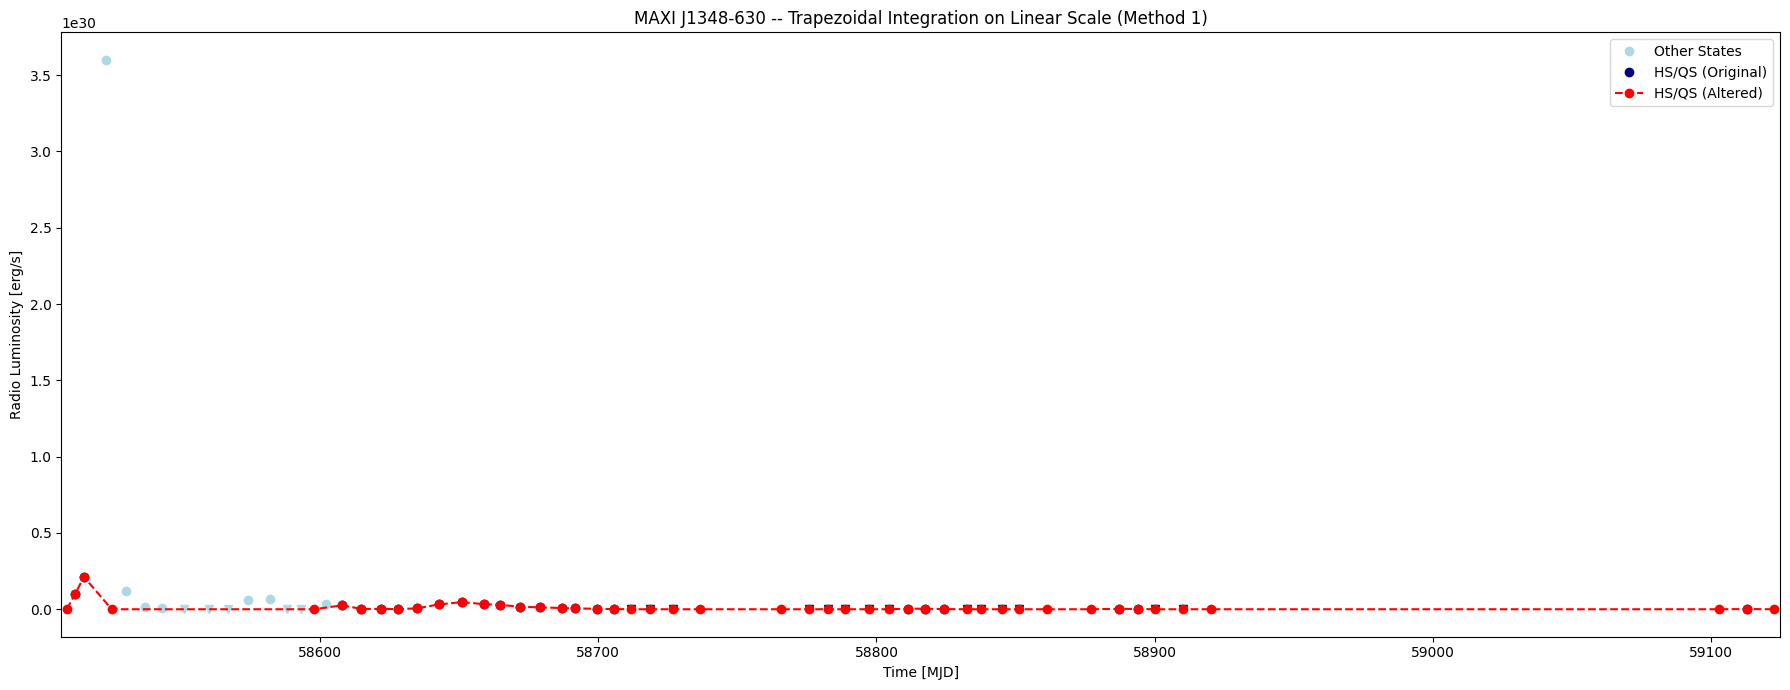

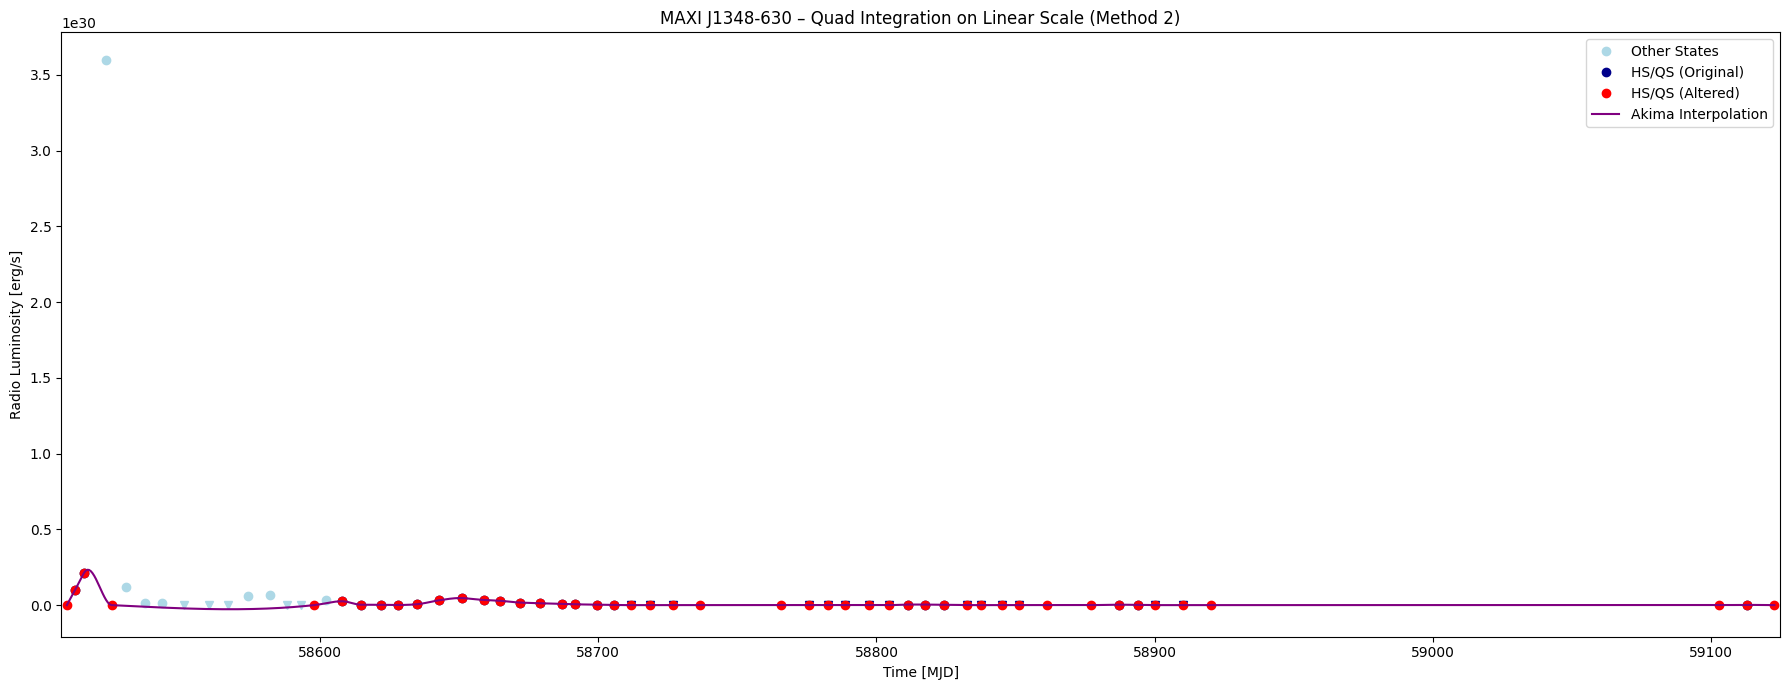

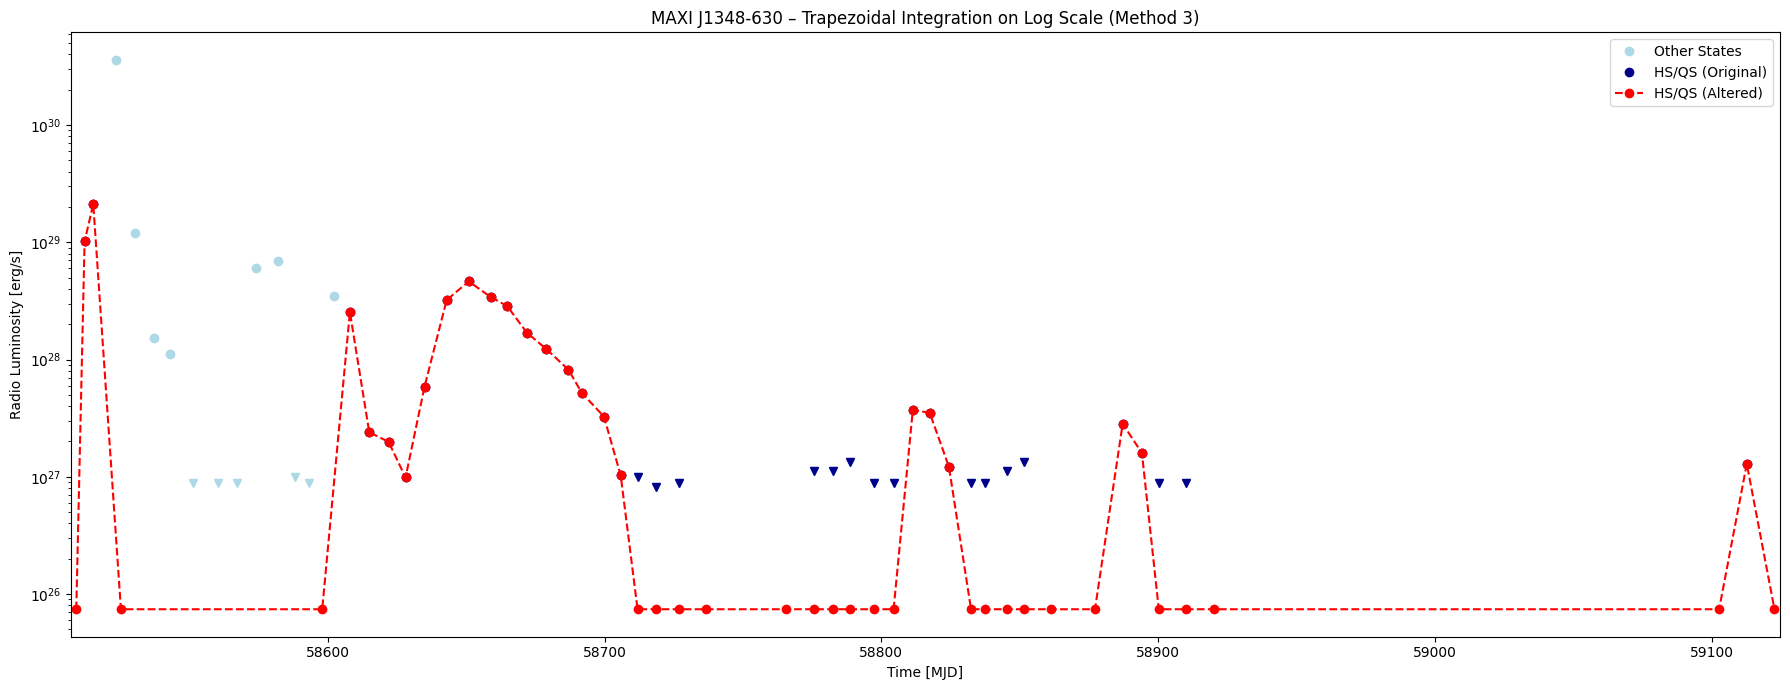

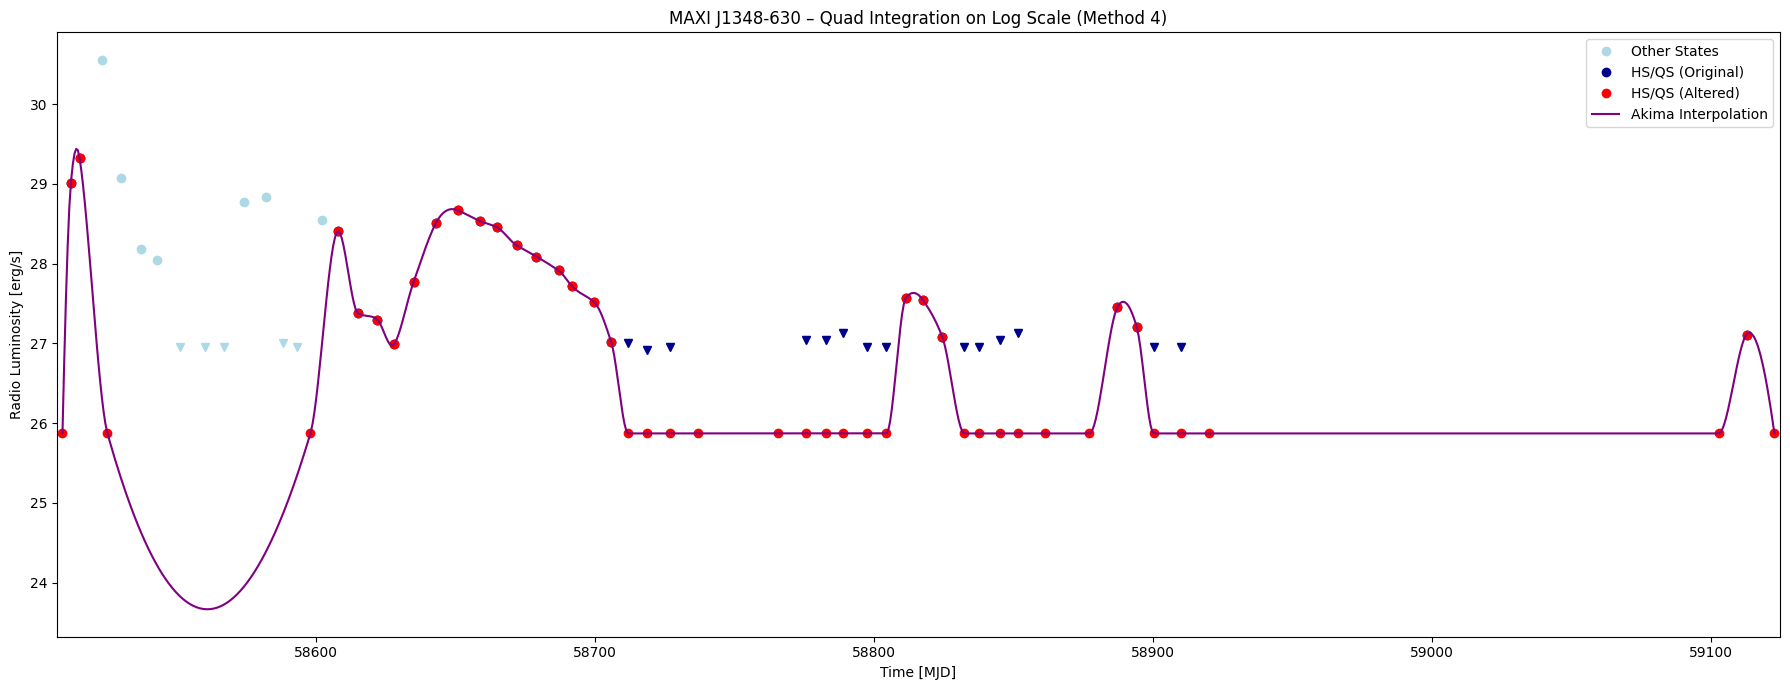

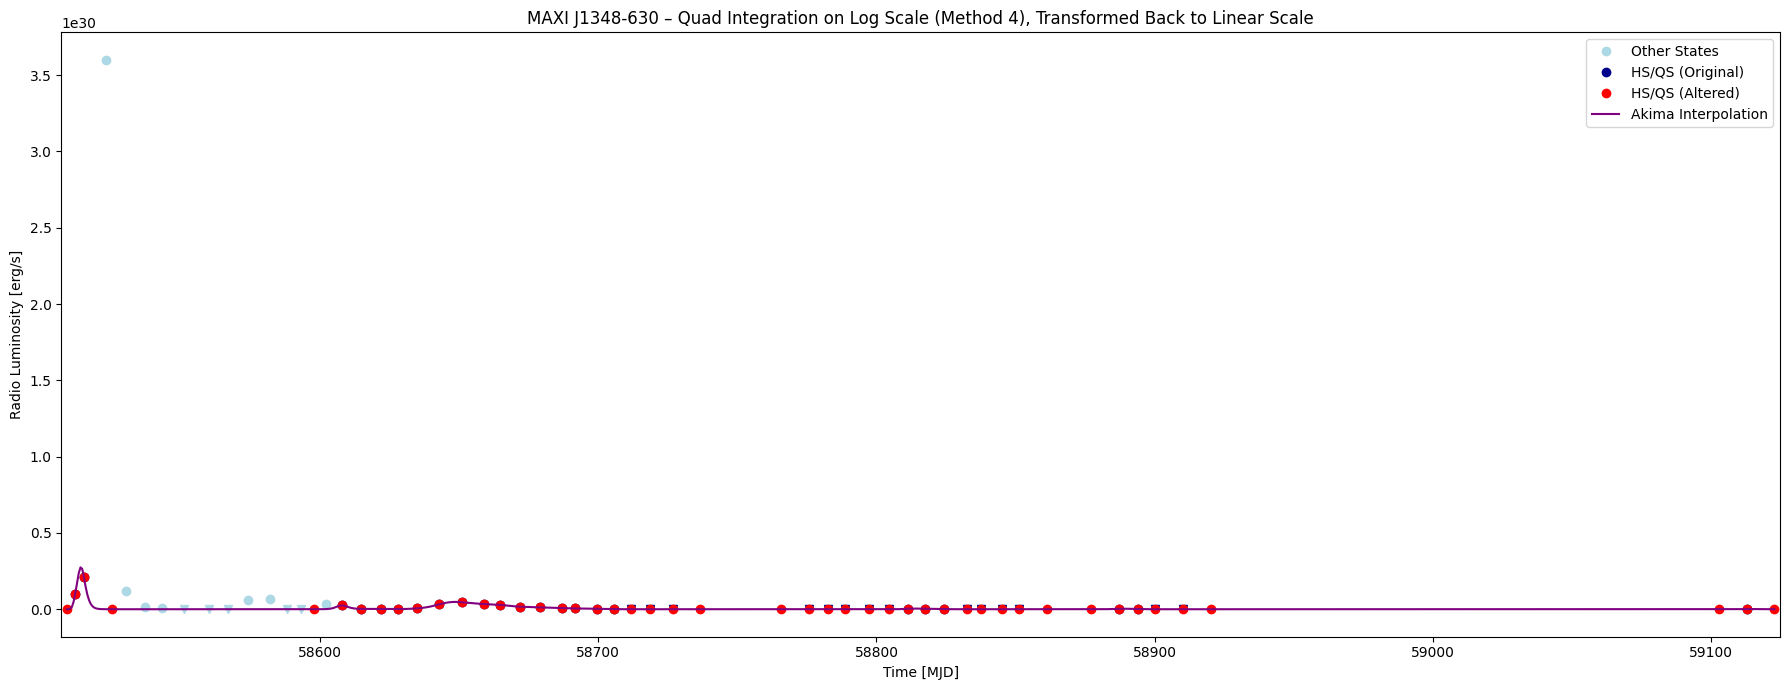

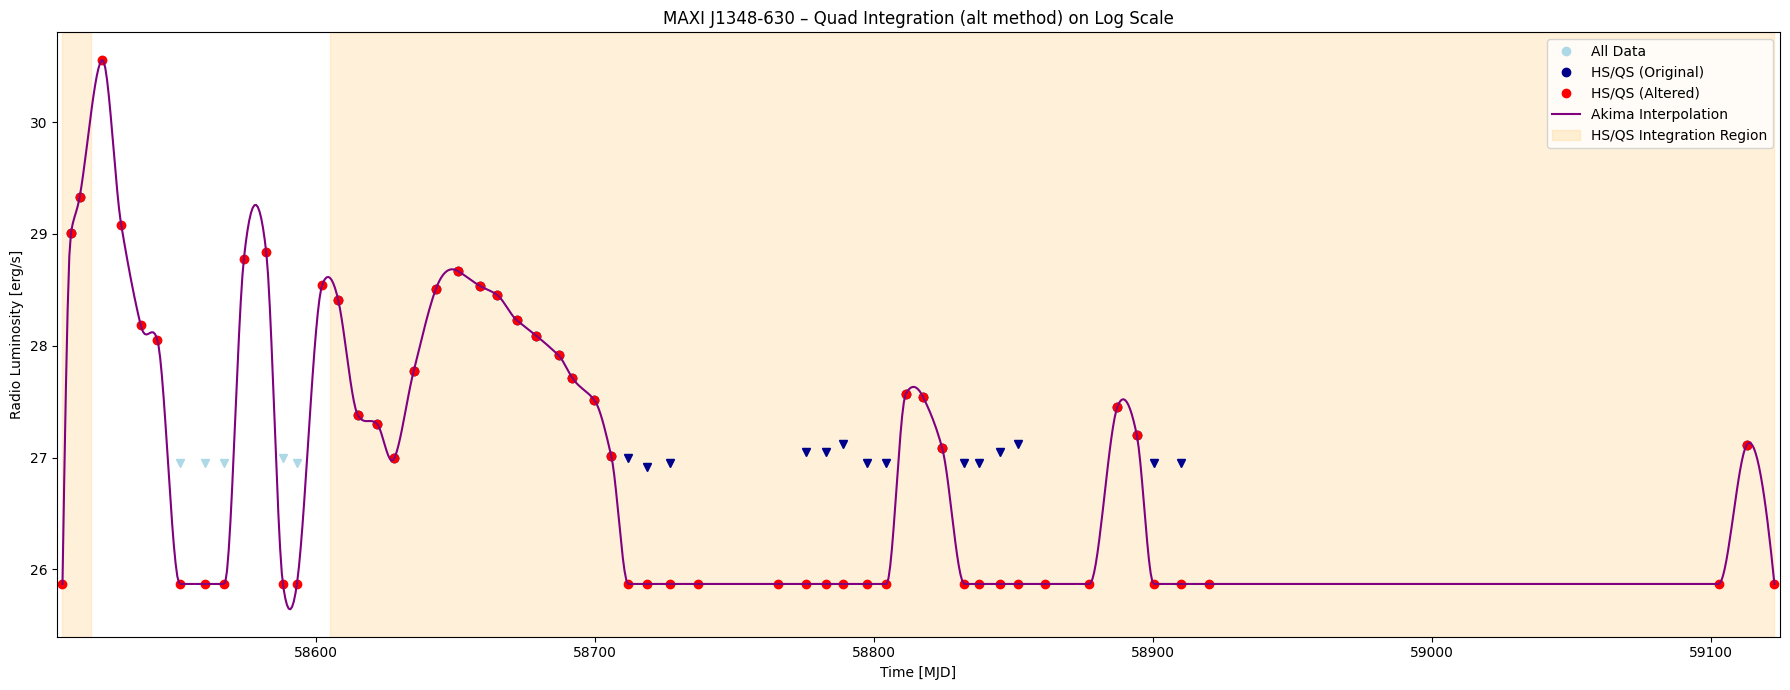


----------------------------------------

----------------------------------------


----------------------------------------


 MAXI J1631-479
58505.85049 58551.589544999995
58638.872839999996 58668.28107

MAXI J1631-479 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         6.942e+43 erg
  Linear Akima Interpolation: 6.953e+43 erg
  Log Trapezoidal:            4.701e+43 erg
  Log Akima Interpolation:    5.573e+43 erg
  Log Akima Interpolation (Alt): 5.906e+43 erg


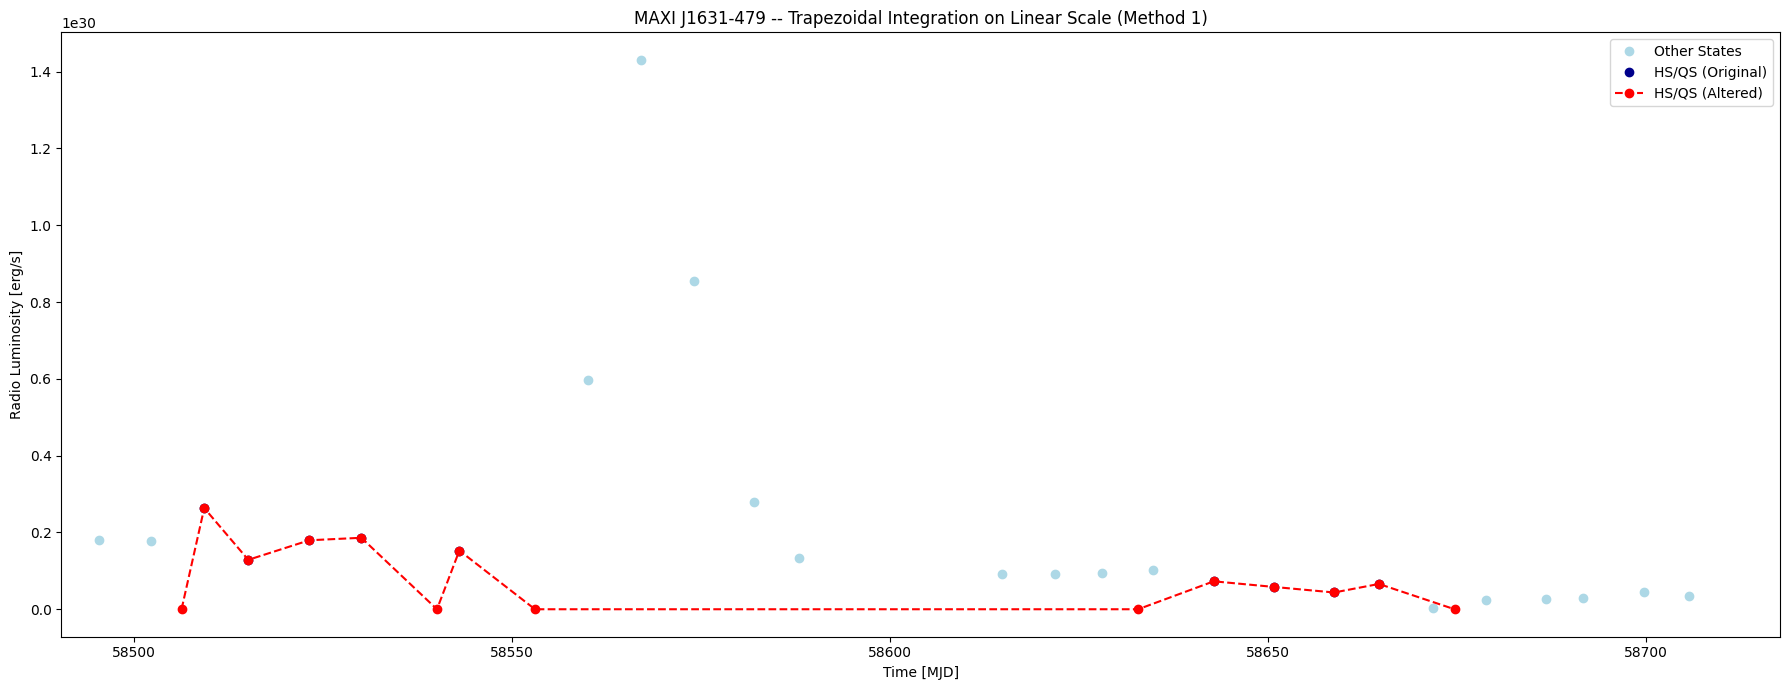

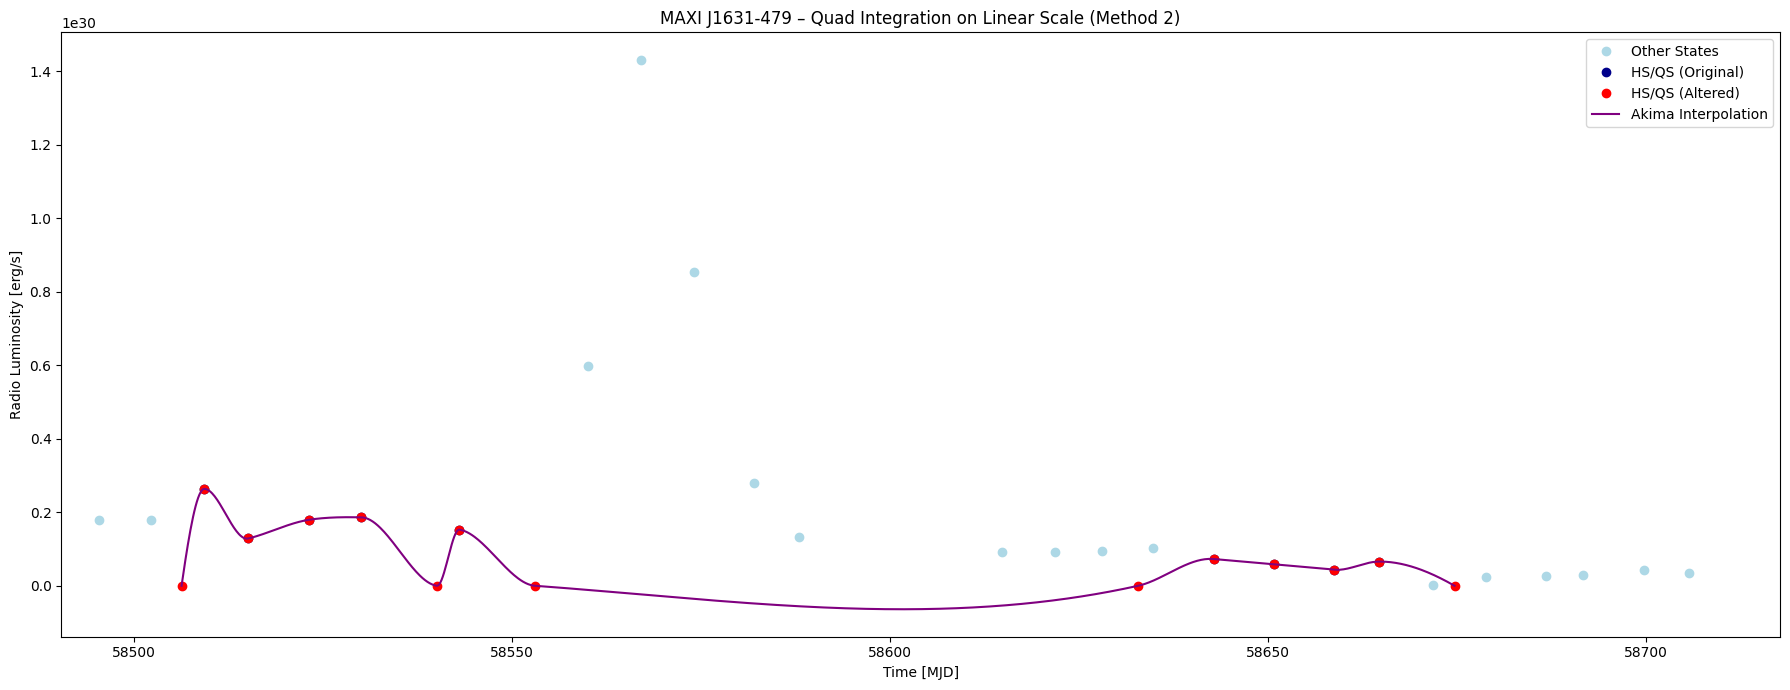

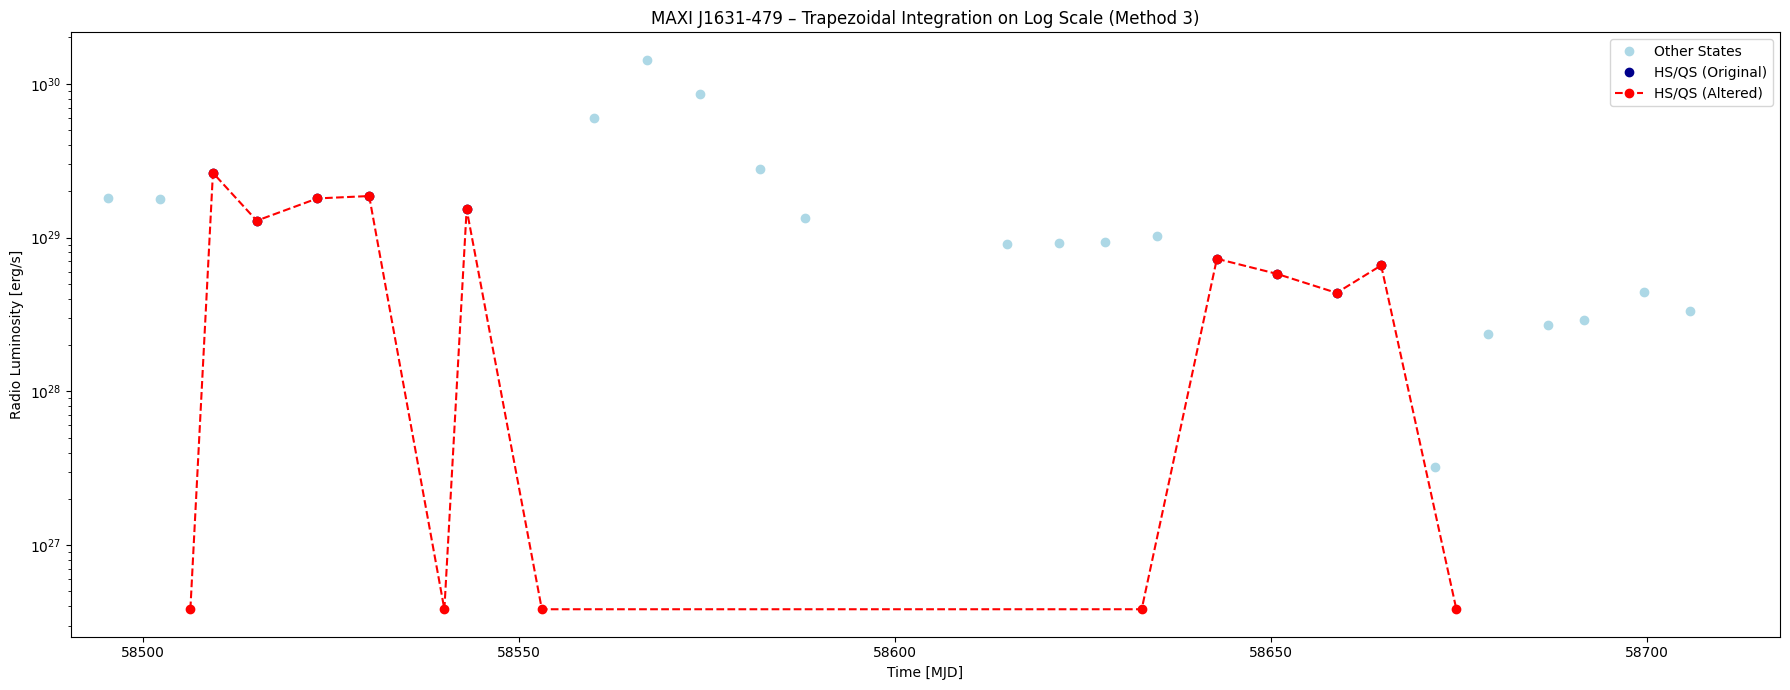

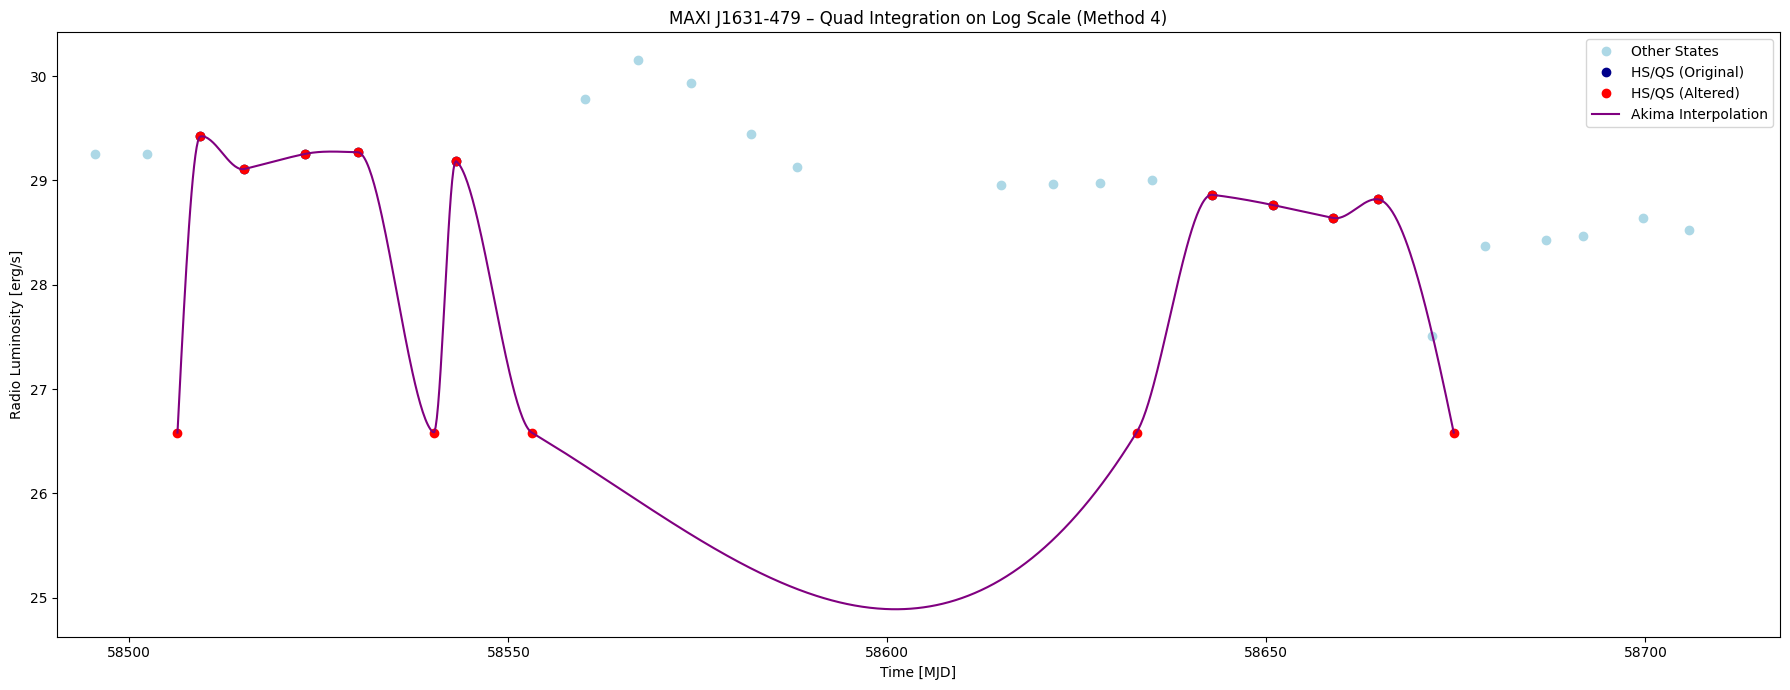

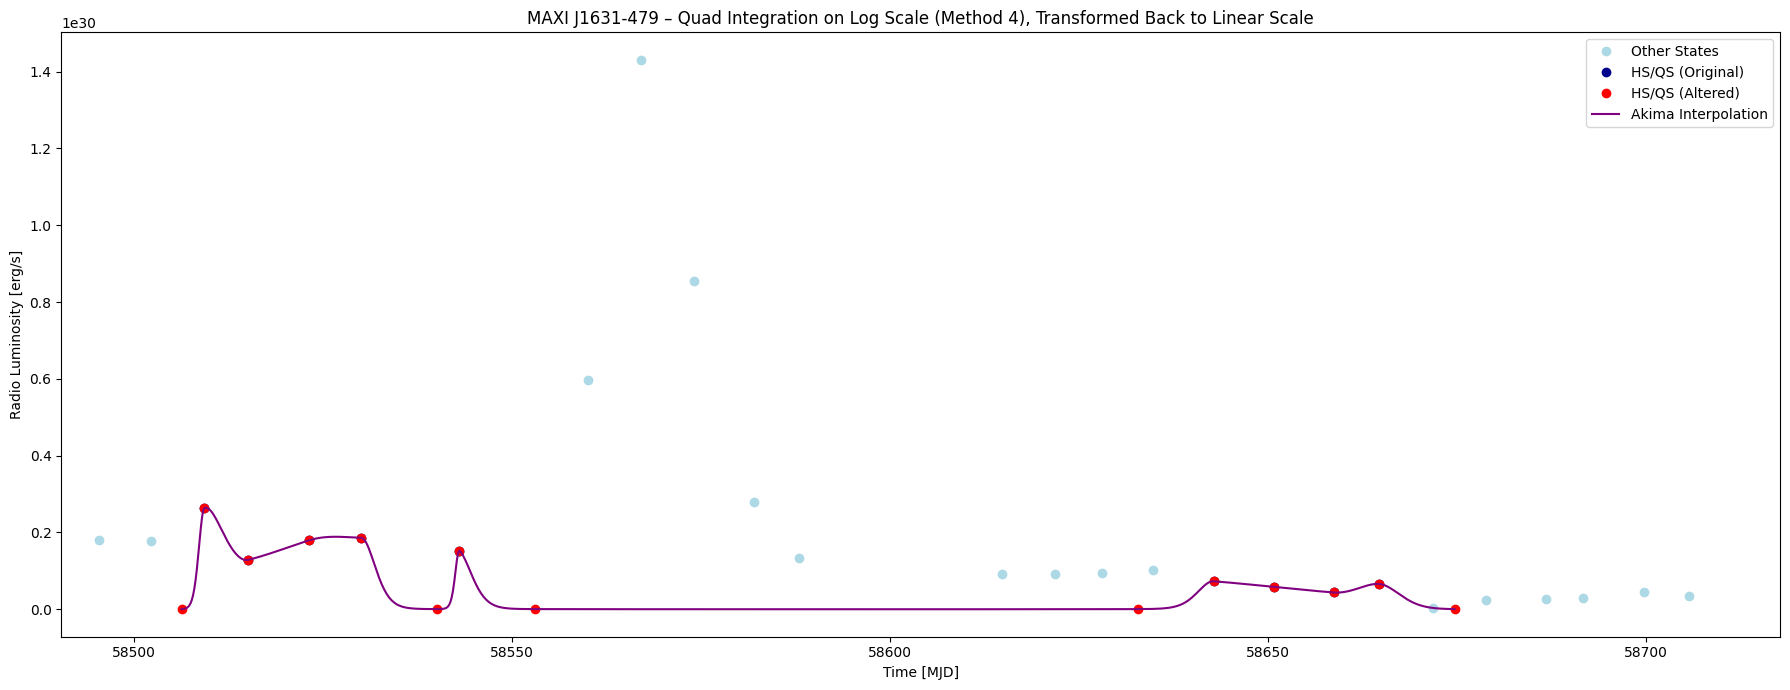

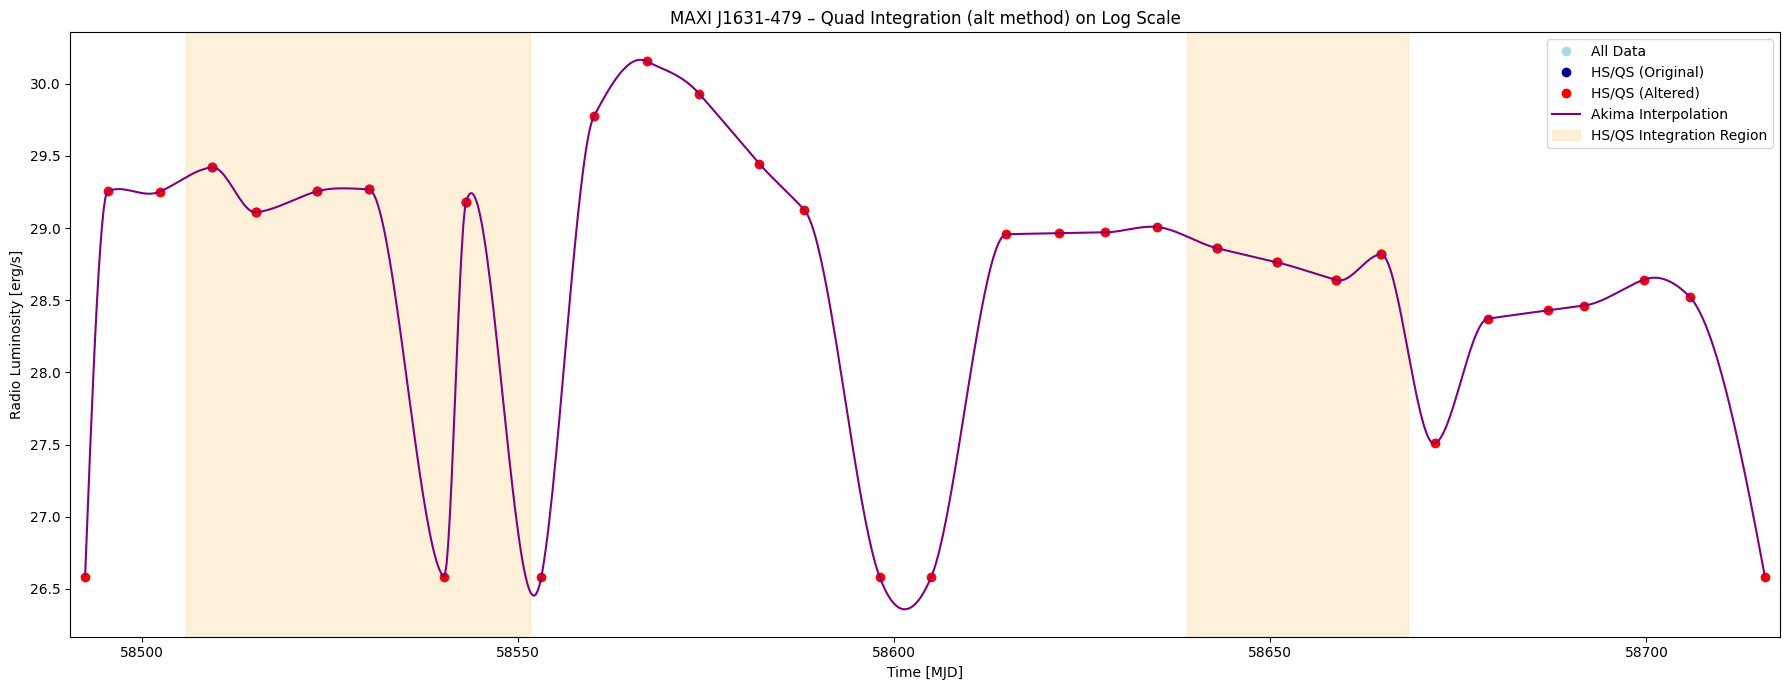


----------------------------------------

----------------------------------------


----------------------------------------


 MAXI J1803-298
59335.91 59345.535
59503.59 59576.47

MAXI J1803-298 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         3.533e+43 erg
  Linear Akima Interpolation: 3.511e+43 erg
  Log Trapezoidal:            2.149e+43 erg
  Log Akima Interpolation:    2.358e+43 erg
  Log Akima Interpolation (Alt): 3.240e+43 erg


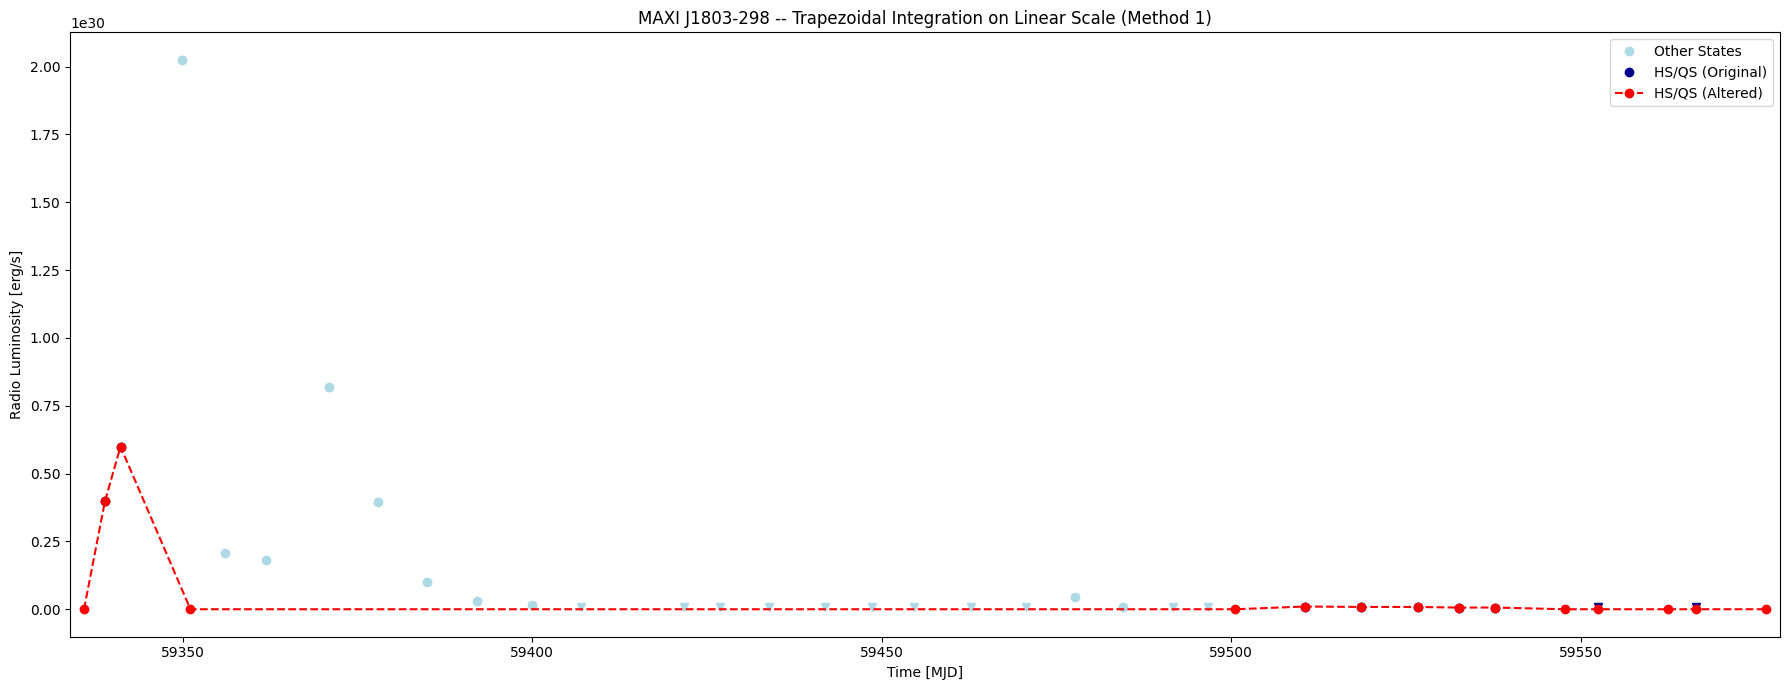

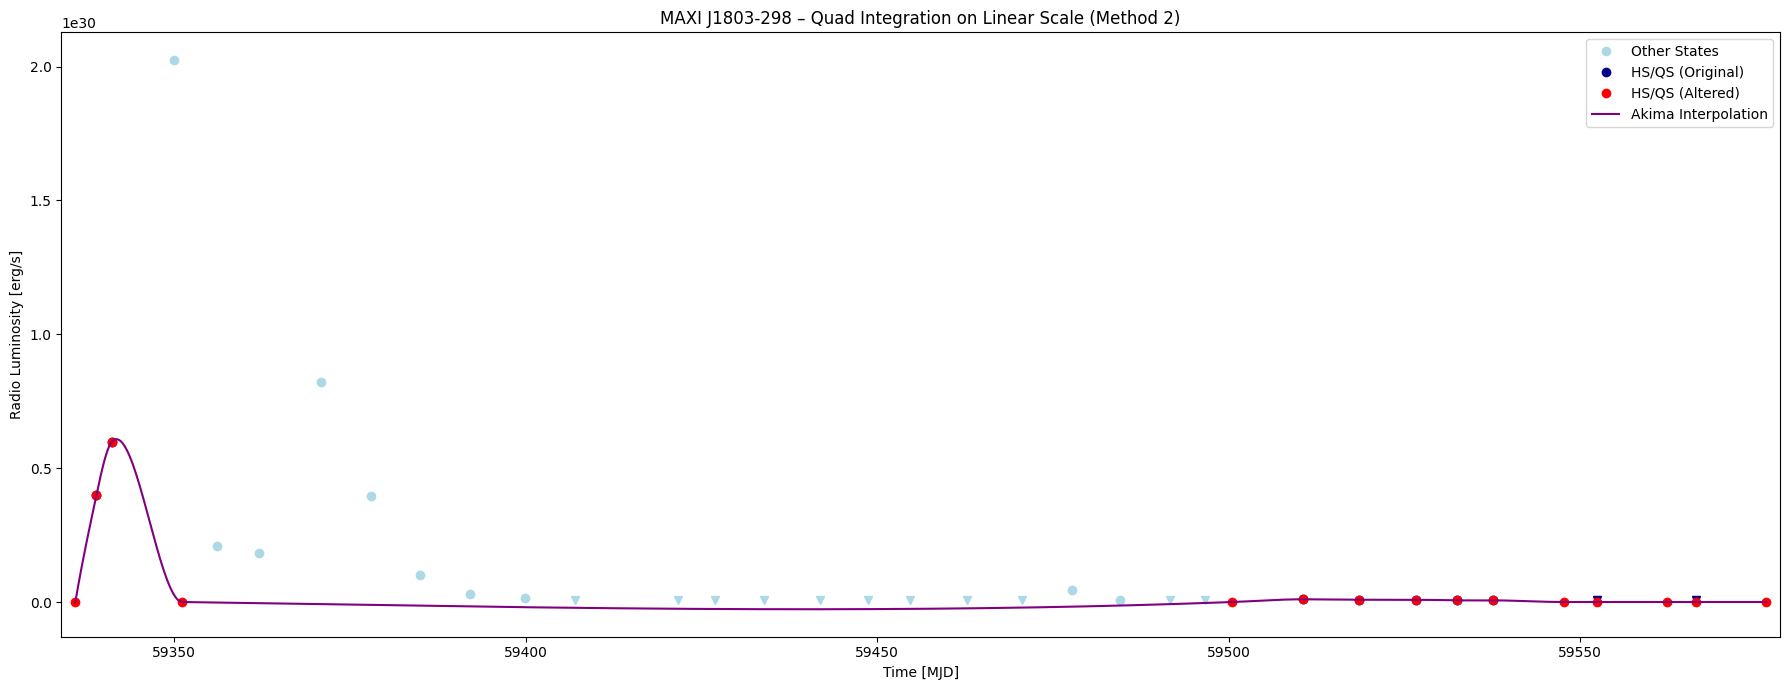

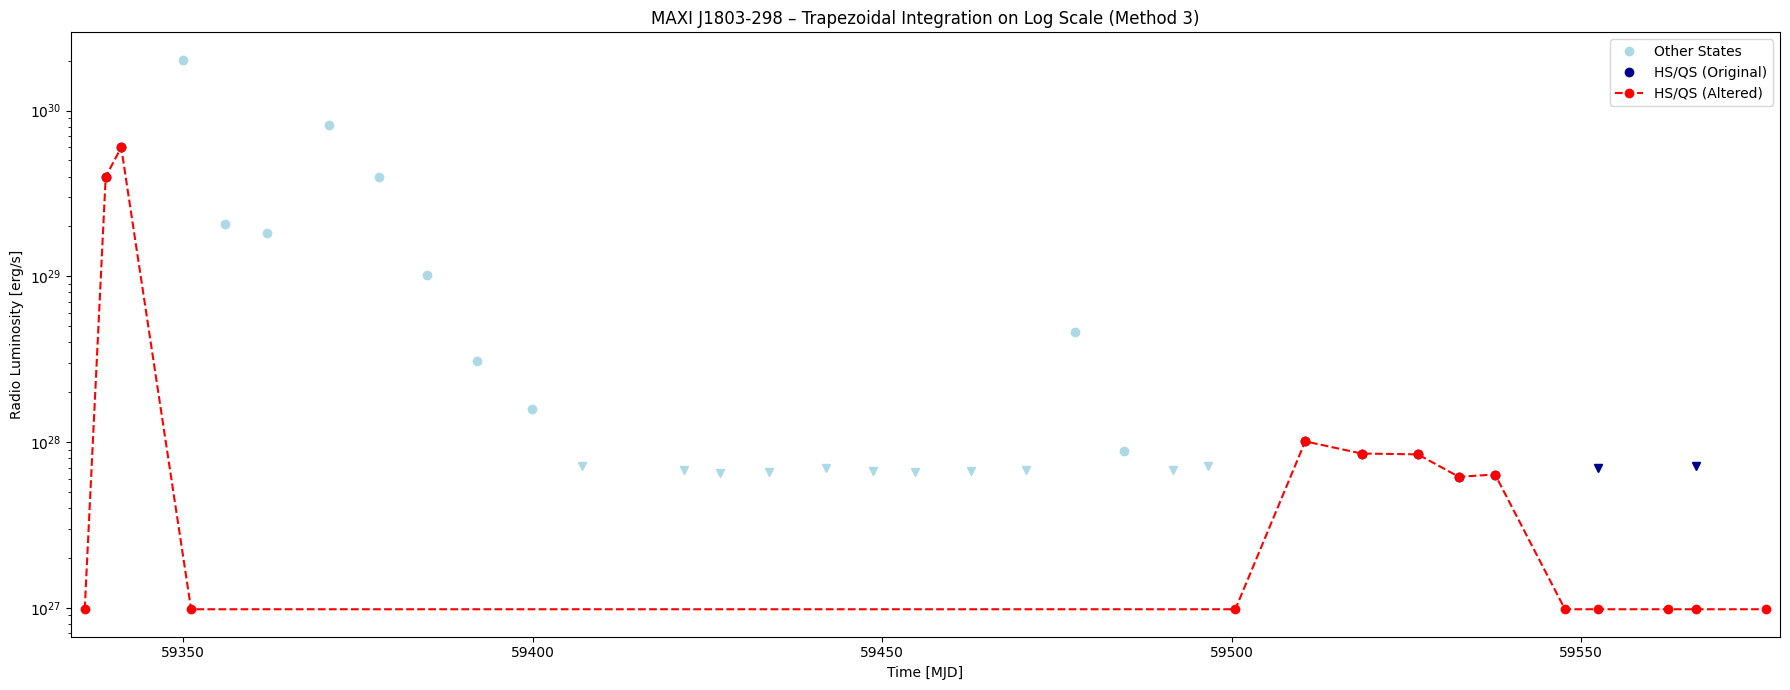

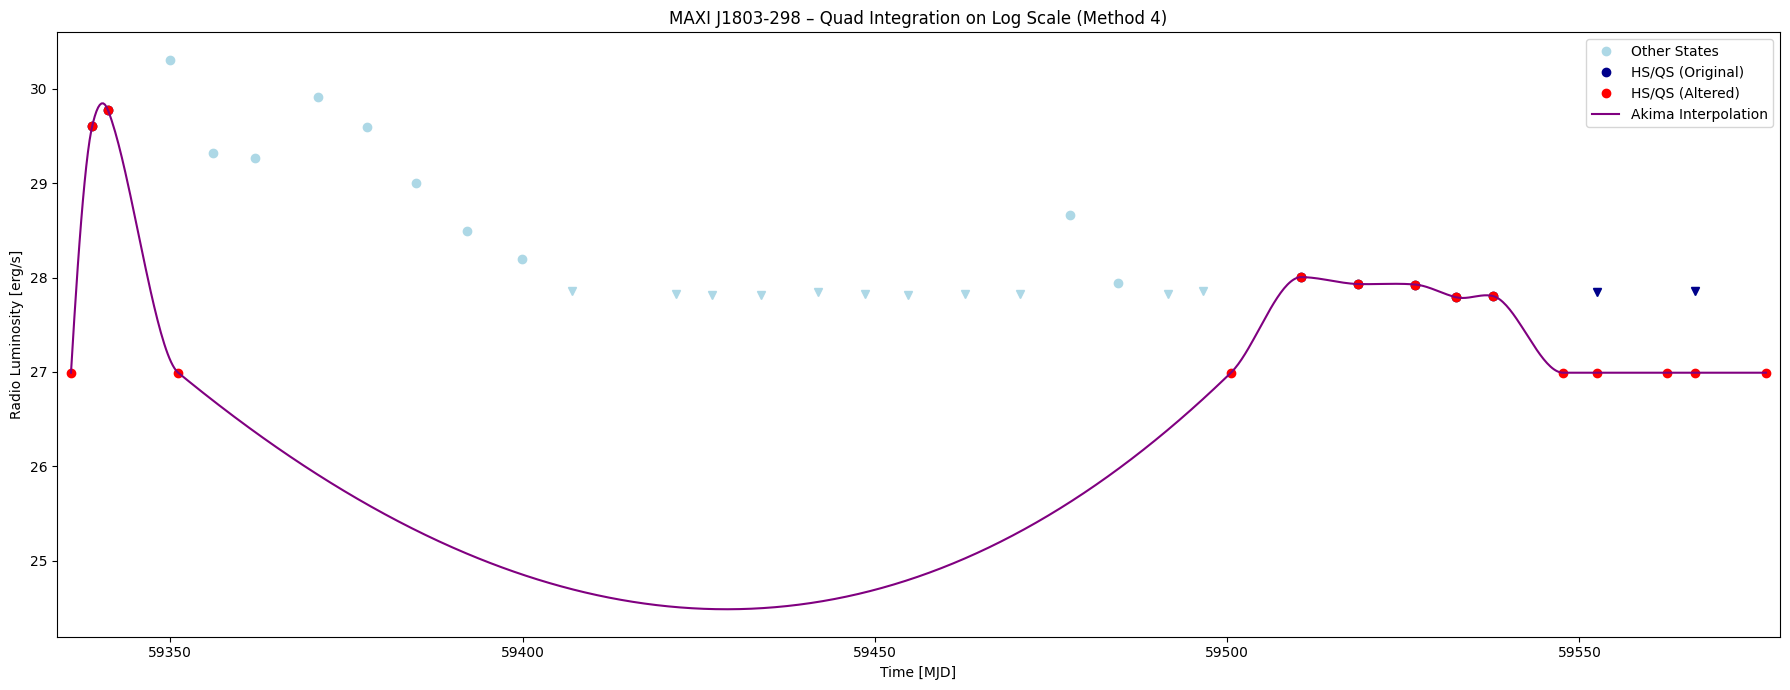

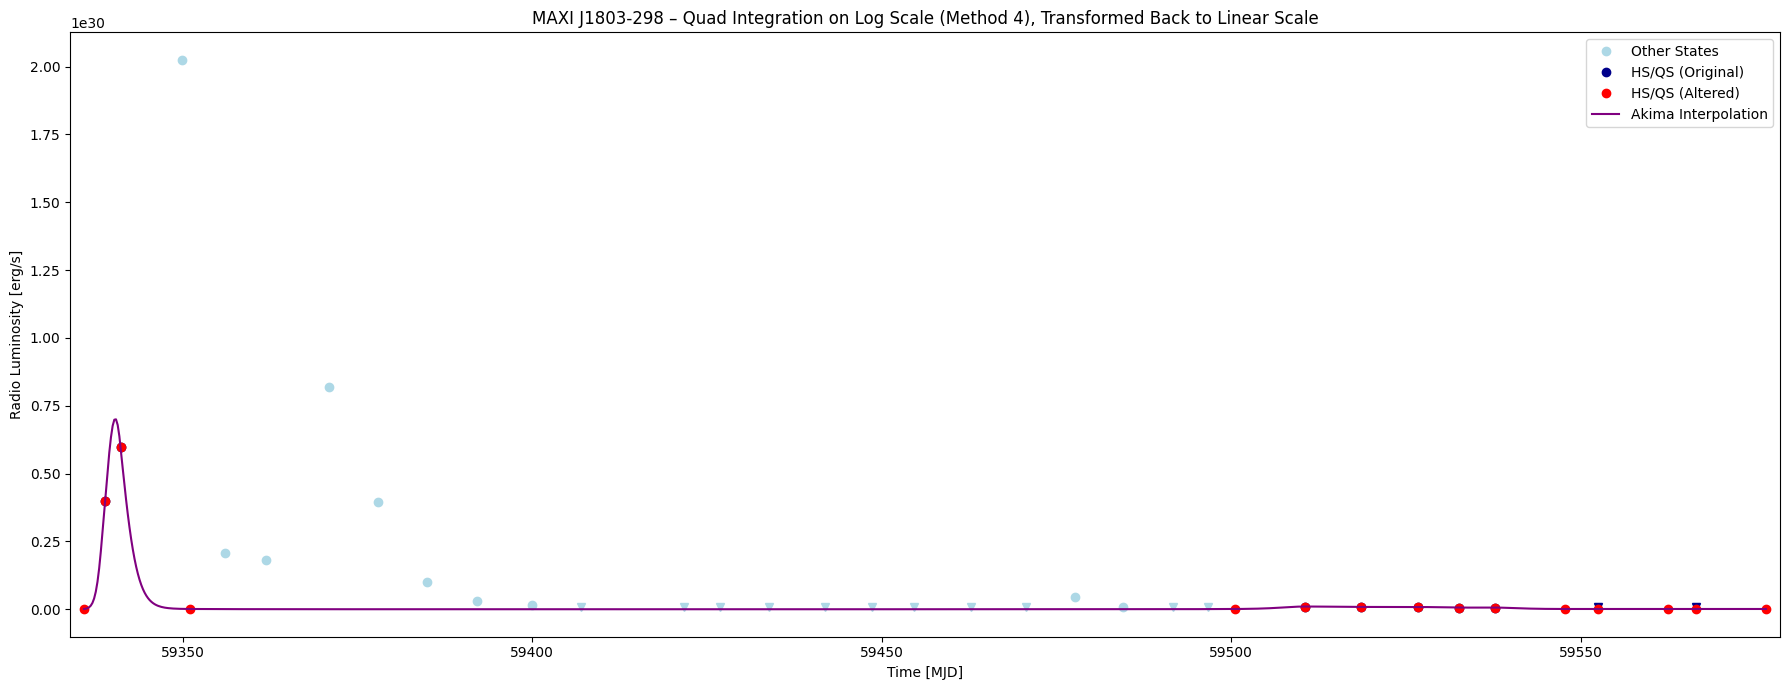

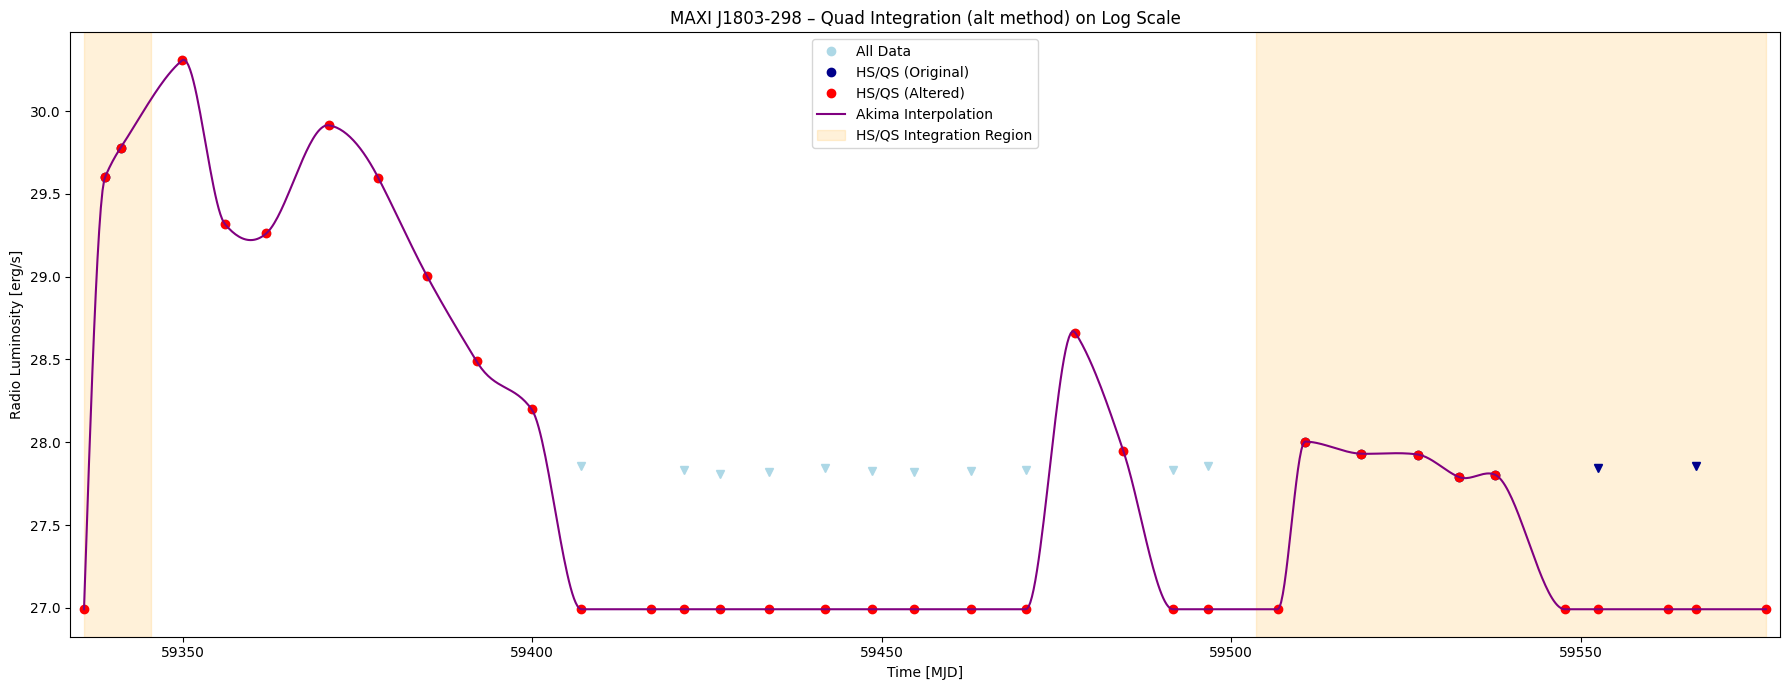


----------------------------------------

----------------------------------------


----------------------------------------


 MAXI J1807+132
60129.93806 60137.343460000004
60144.25061 60150.283895
60157.334015 60165.28937

MAXI J1807+132 [NS] Energy Estimates:
  Linear Trapezoidal:         0.000e+00 erg
  Linear Akima Interpolation: 0.000e+00 erg
  Log Trapezoidal:            9.448e+41 erg
  Log Akima Interpolation:    9.448e+41 erg
  Log Akima Interpolation (Alt): 5.756e+41 erg


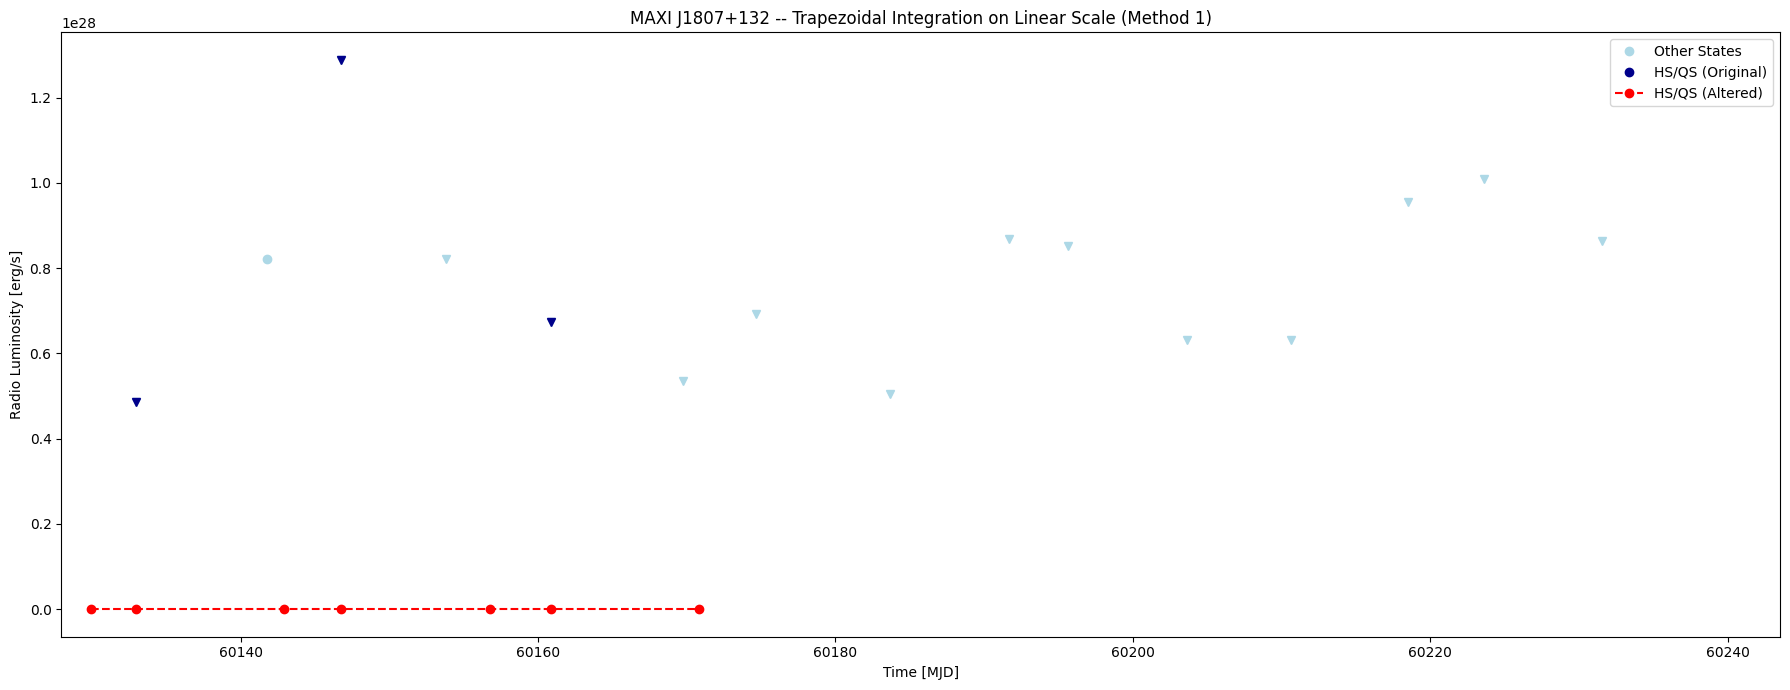

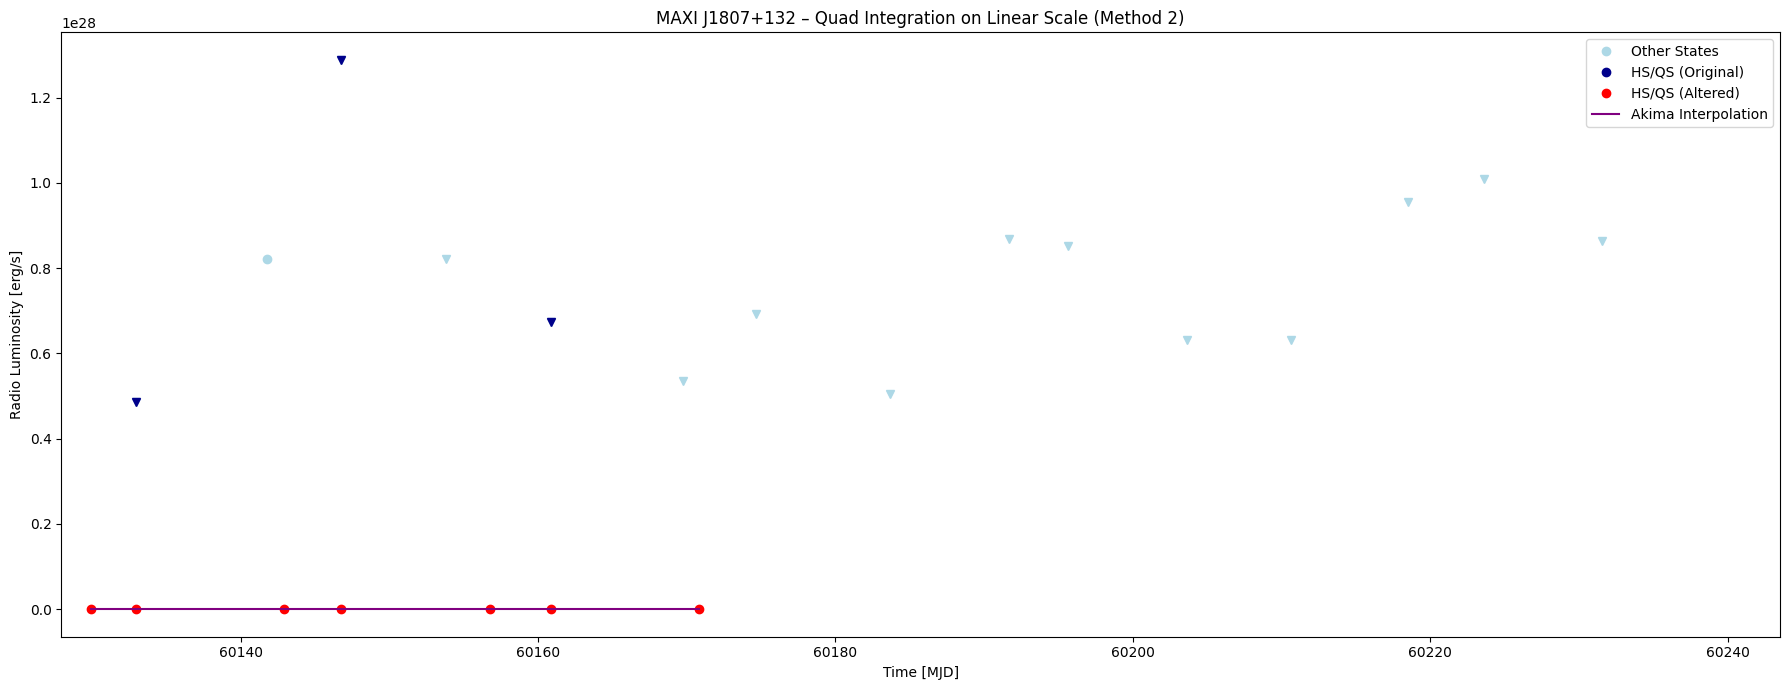

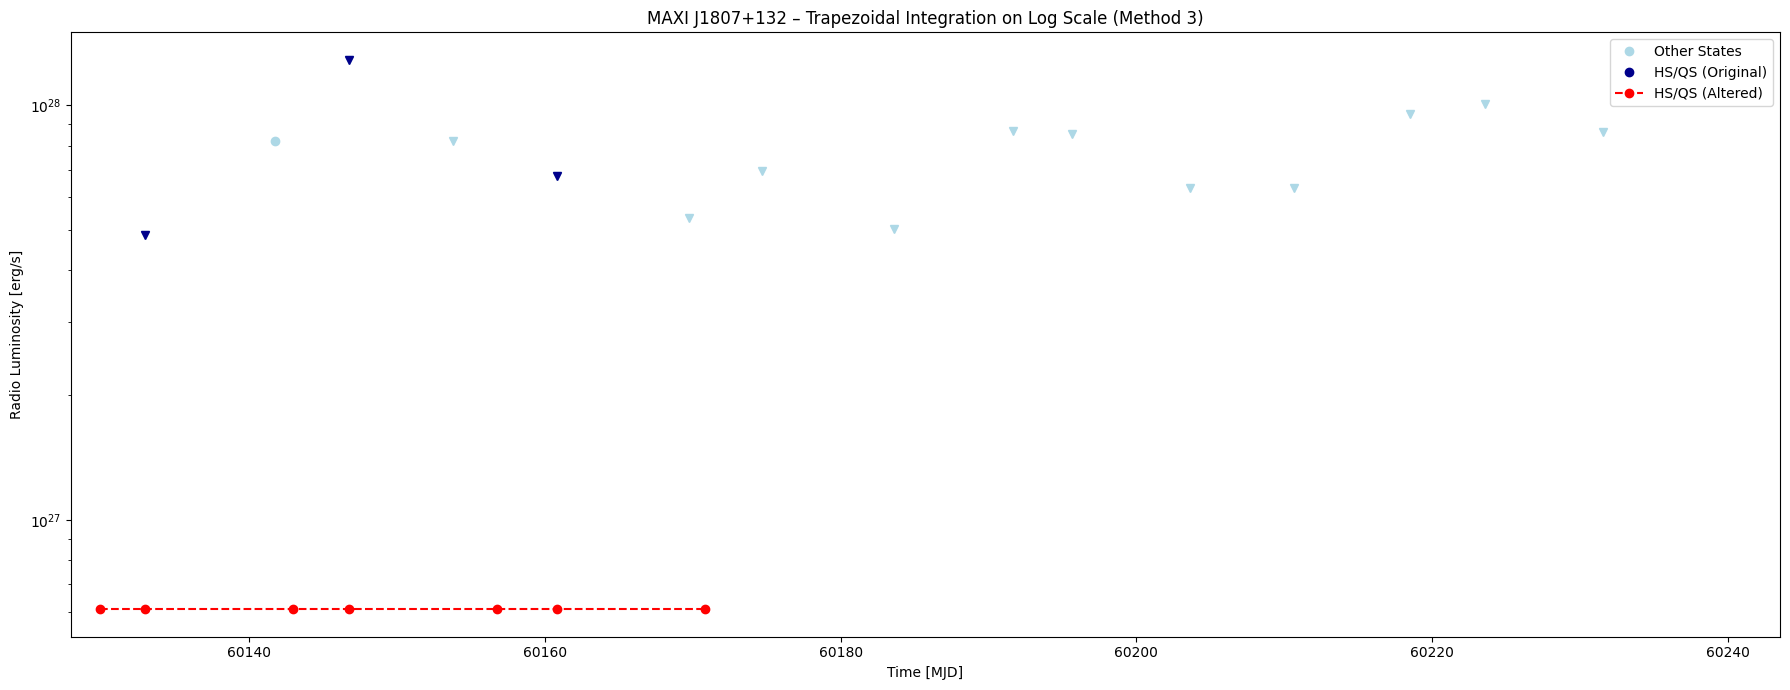

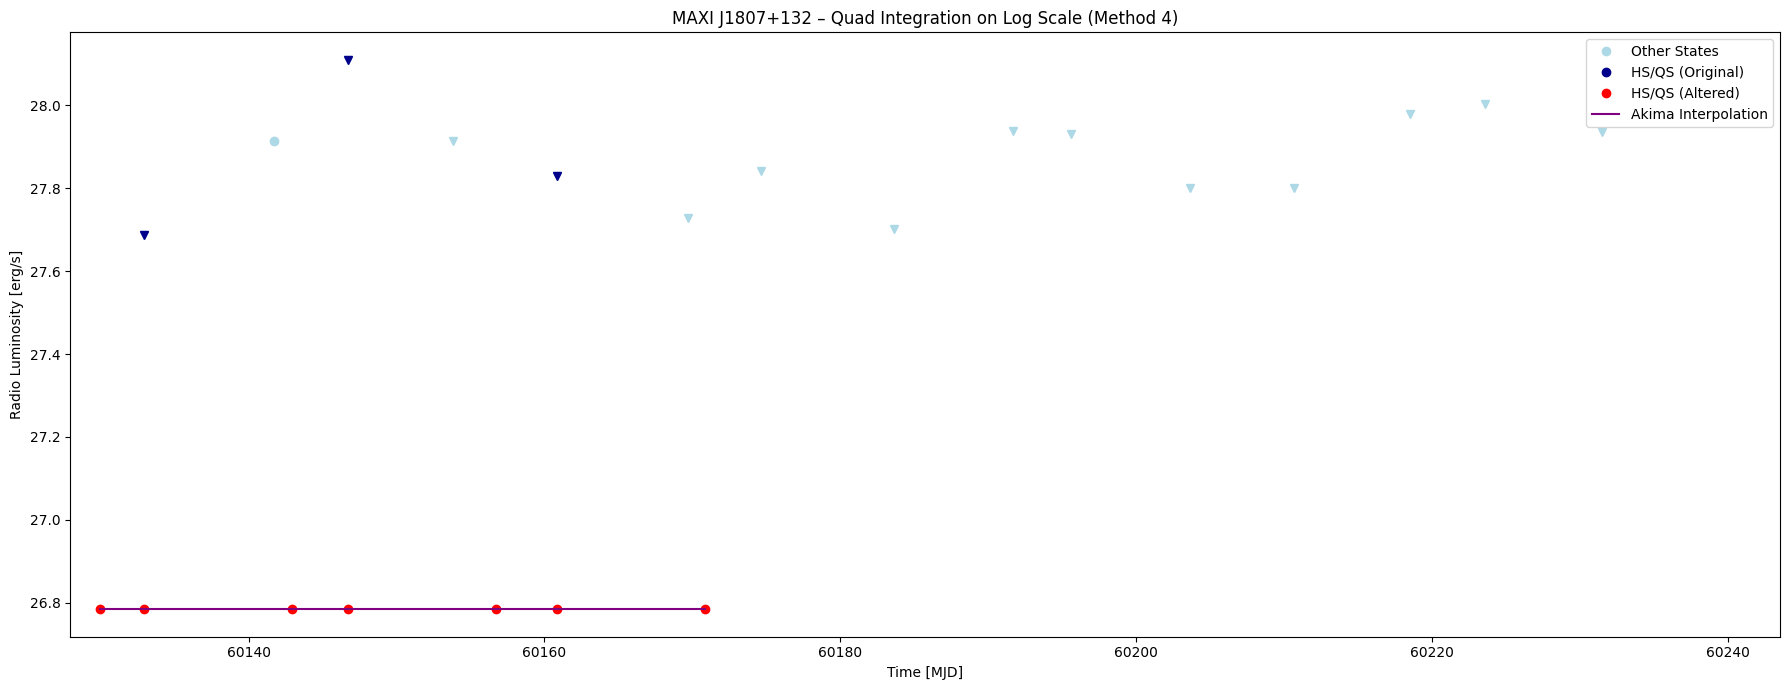

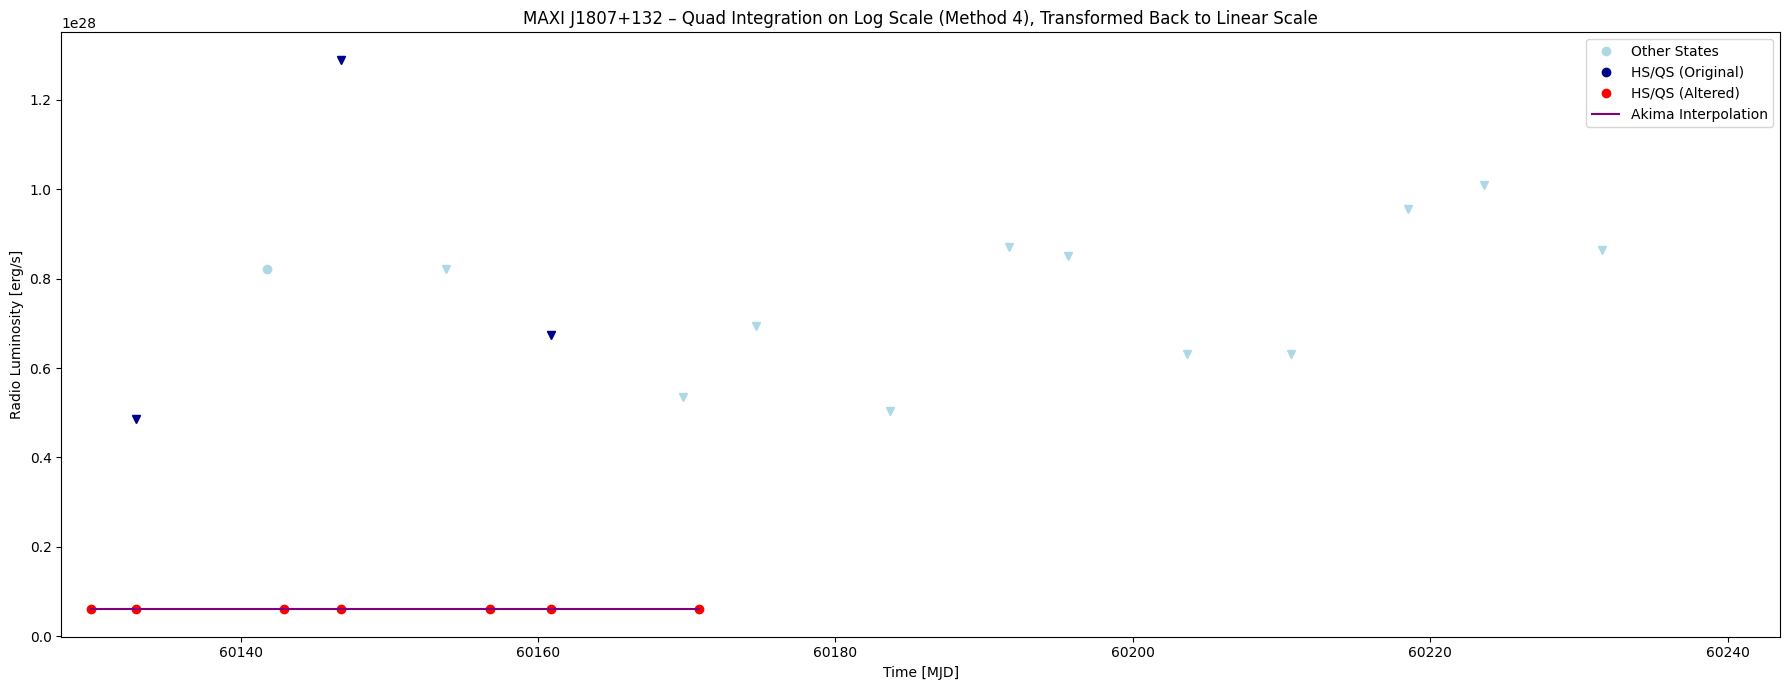

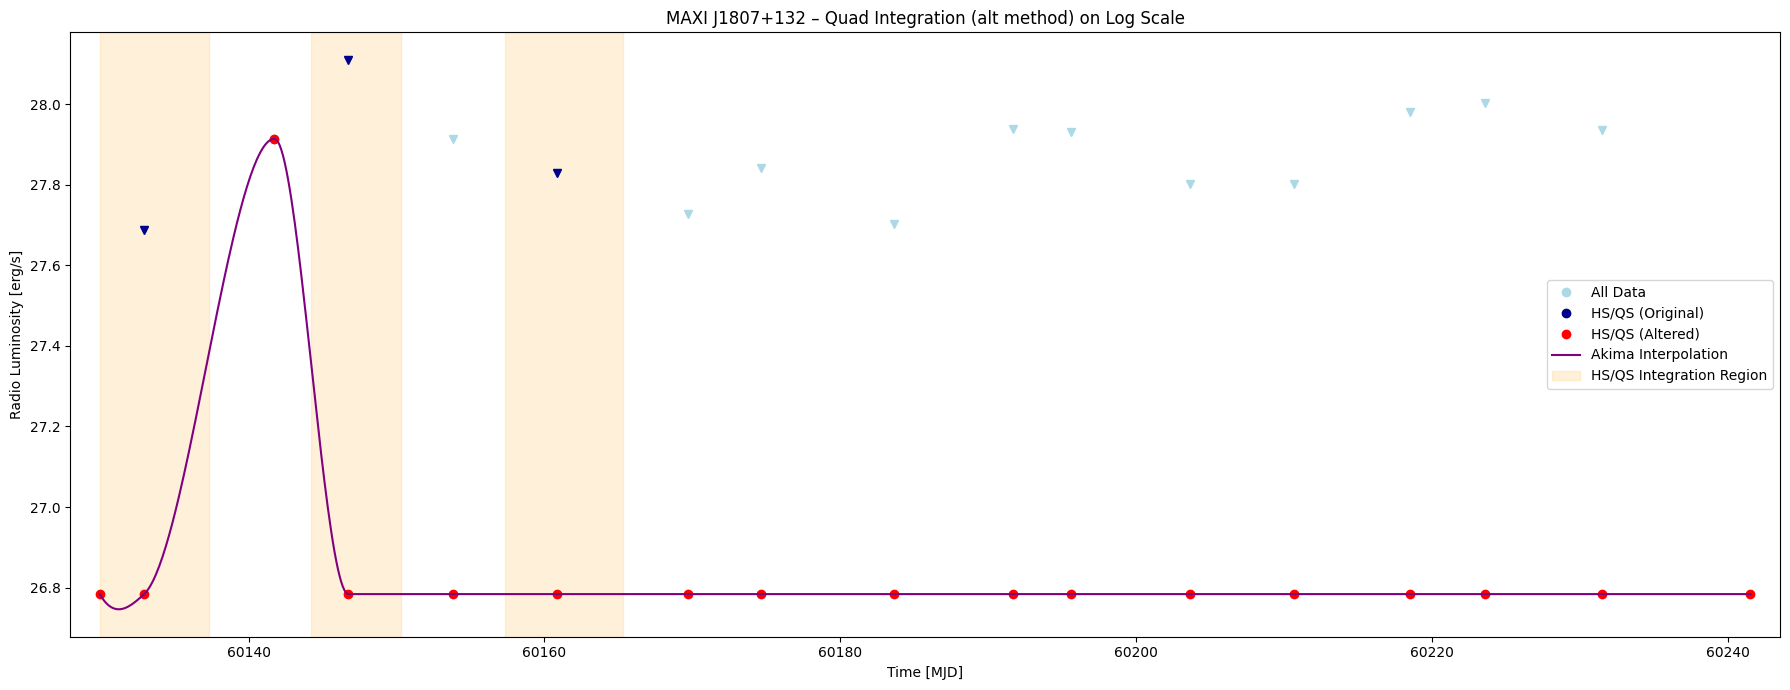


----------------------------------------

----------------------------------------


----------------------------------------


 MAXI J1810-222
60061.11443 60165.257155
60227.539375 60246.947654999996

MAXI J1810-222 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         4.753e+43 erg
  Linear Akima Interpolation: 4.685e+43 erg
  Log Trapezoidal:            4.443e+43 erg
  Log Akima Interpolation:    4.584e+43 erg
  Log Akima Interpolation (Alt): 4.442e+43 erg


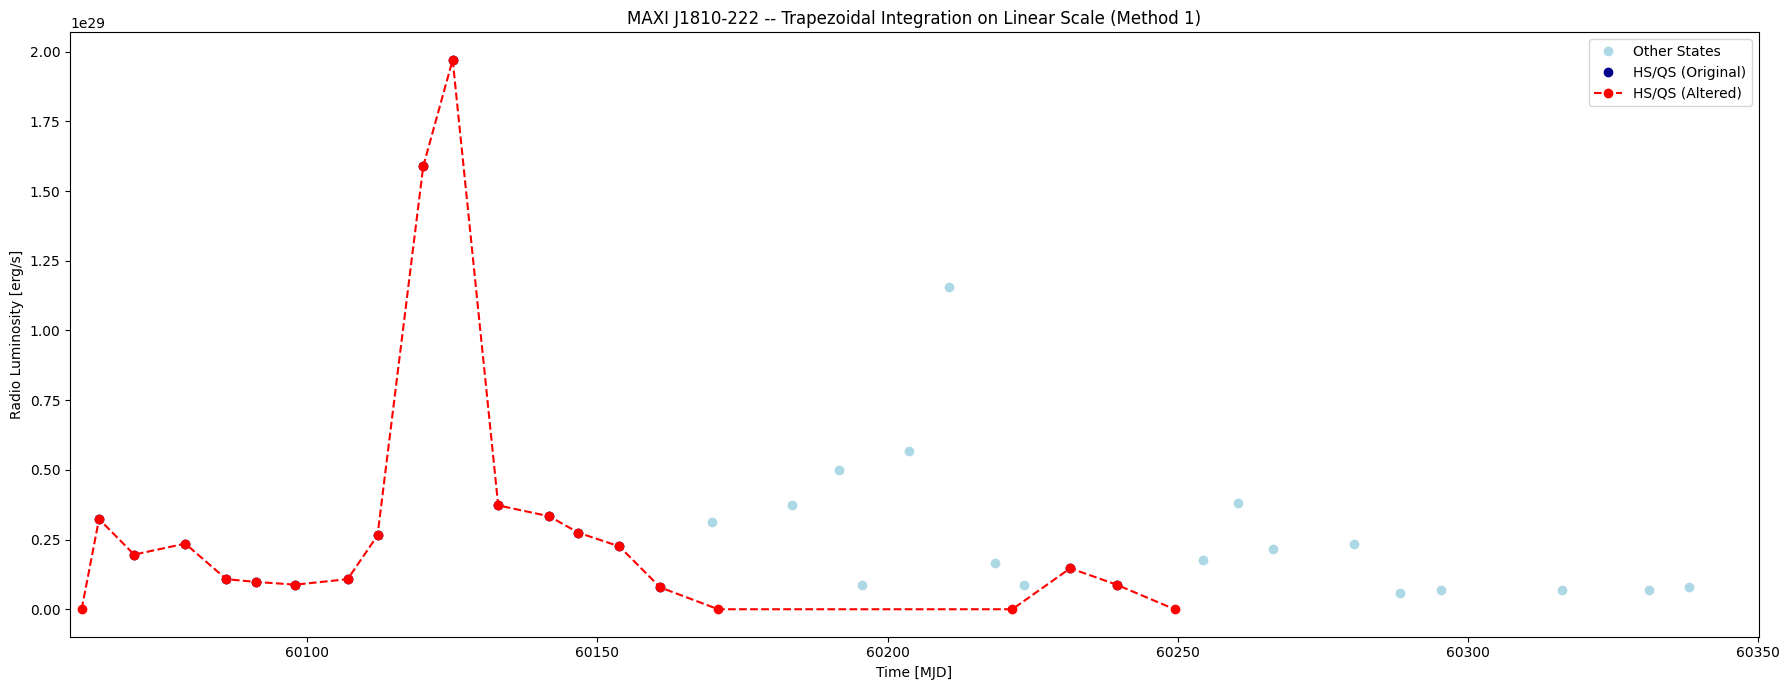

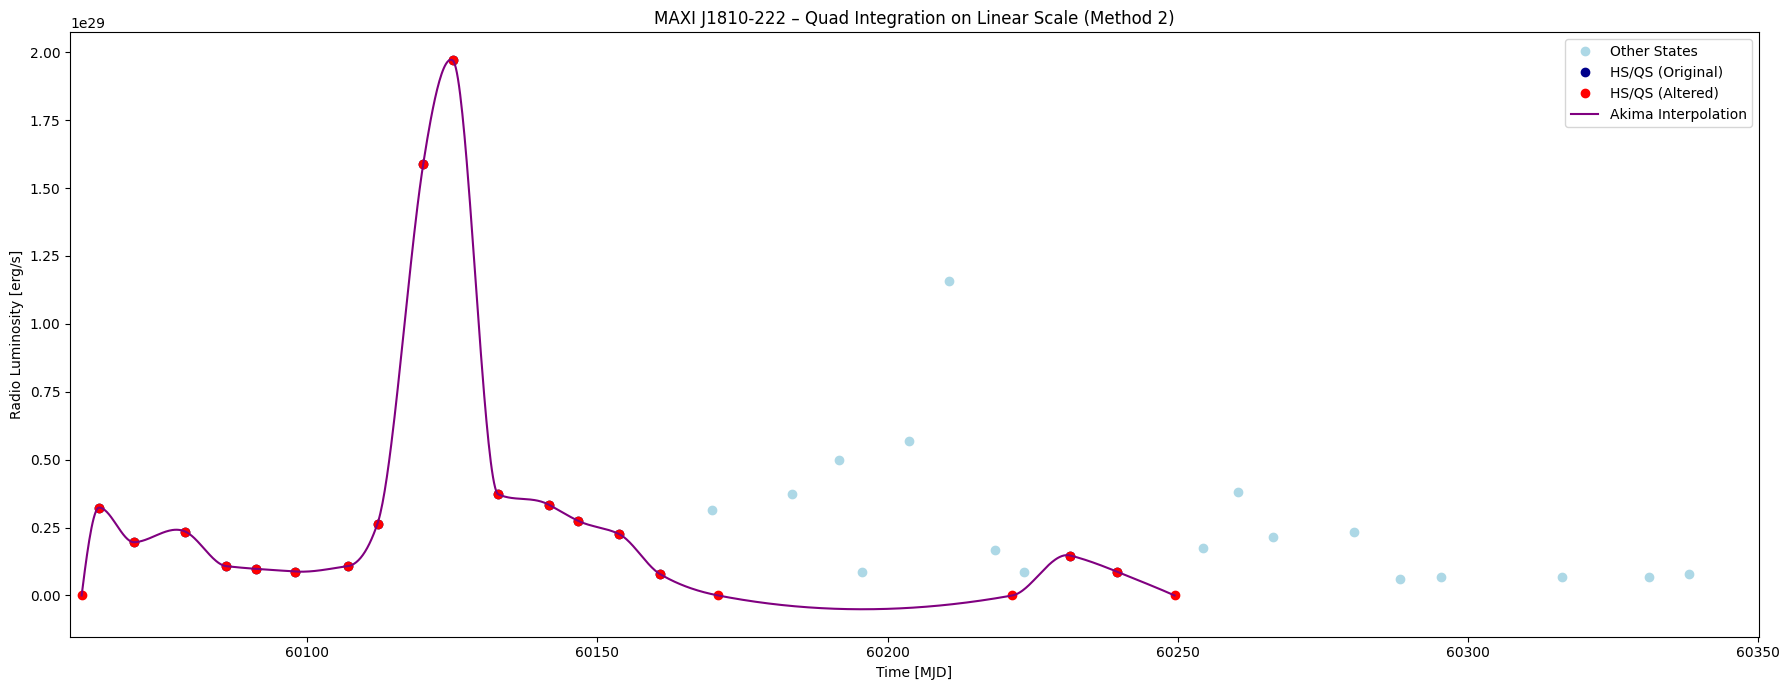

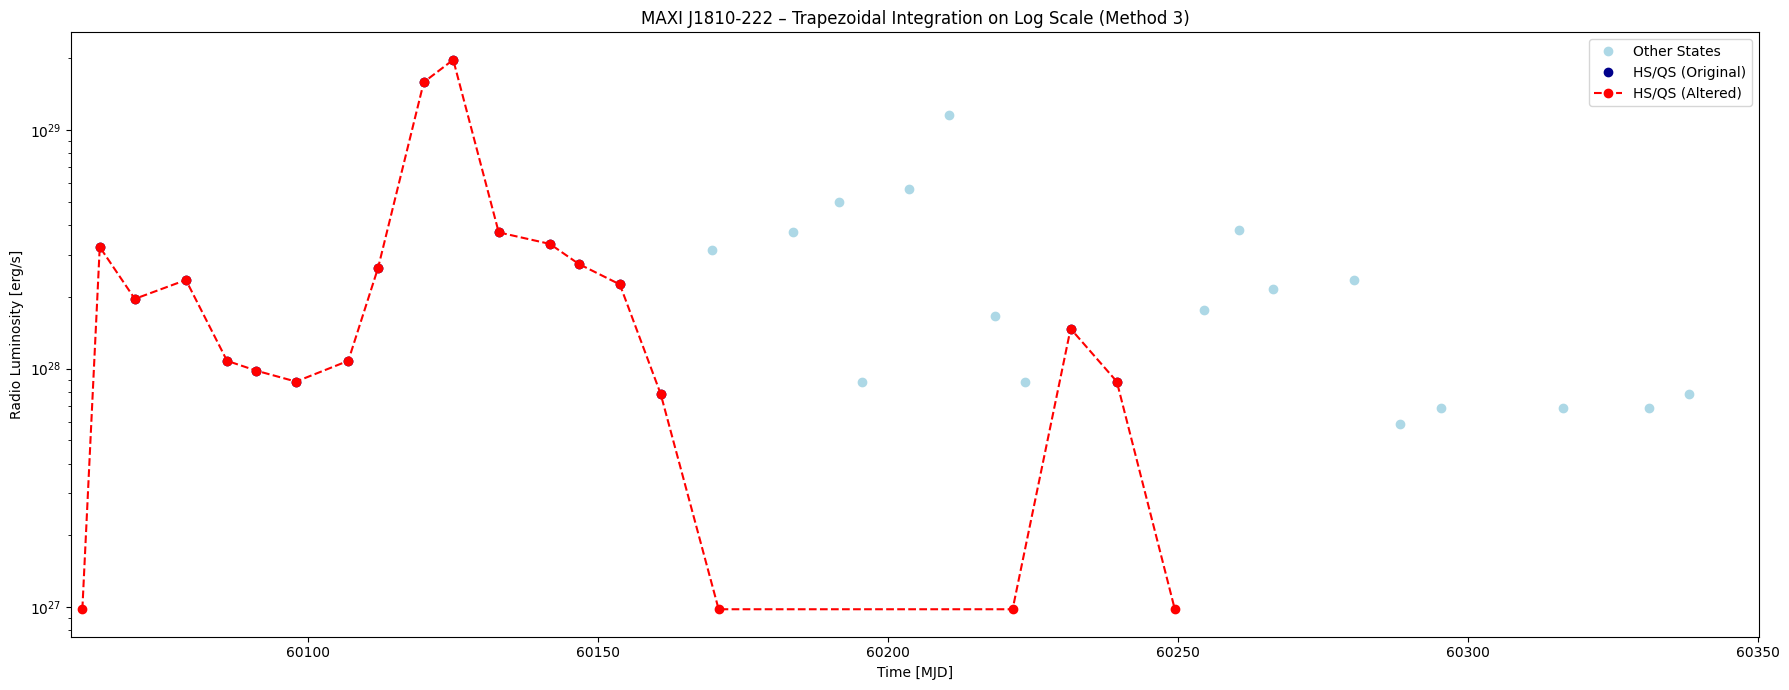

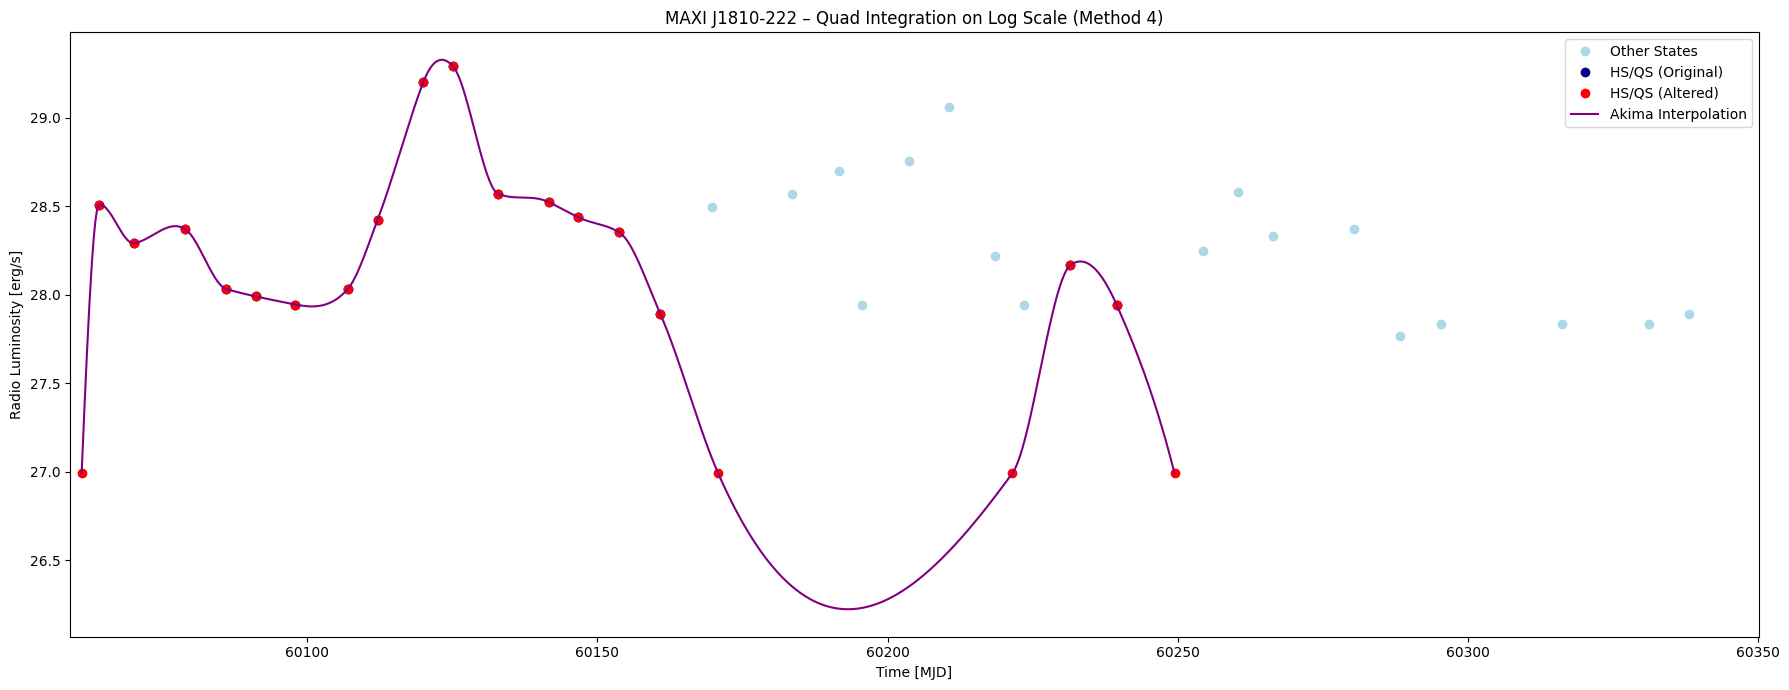

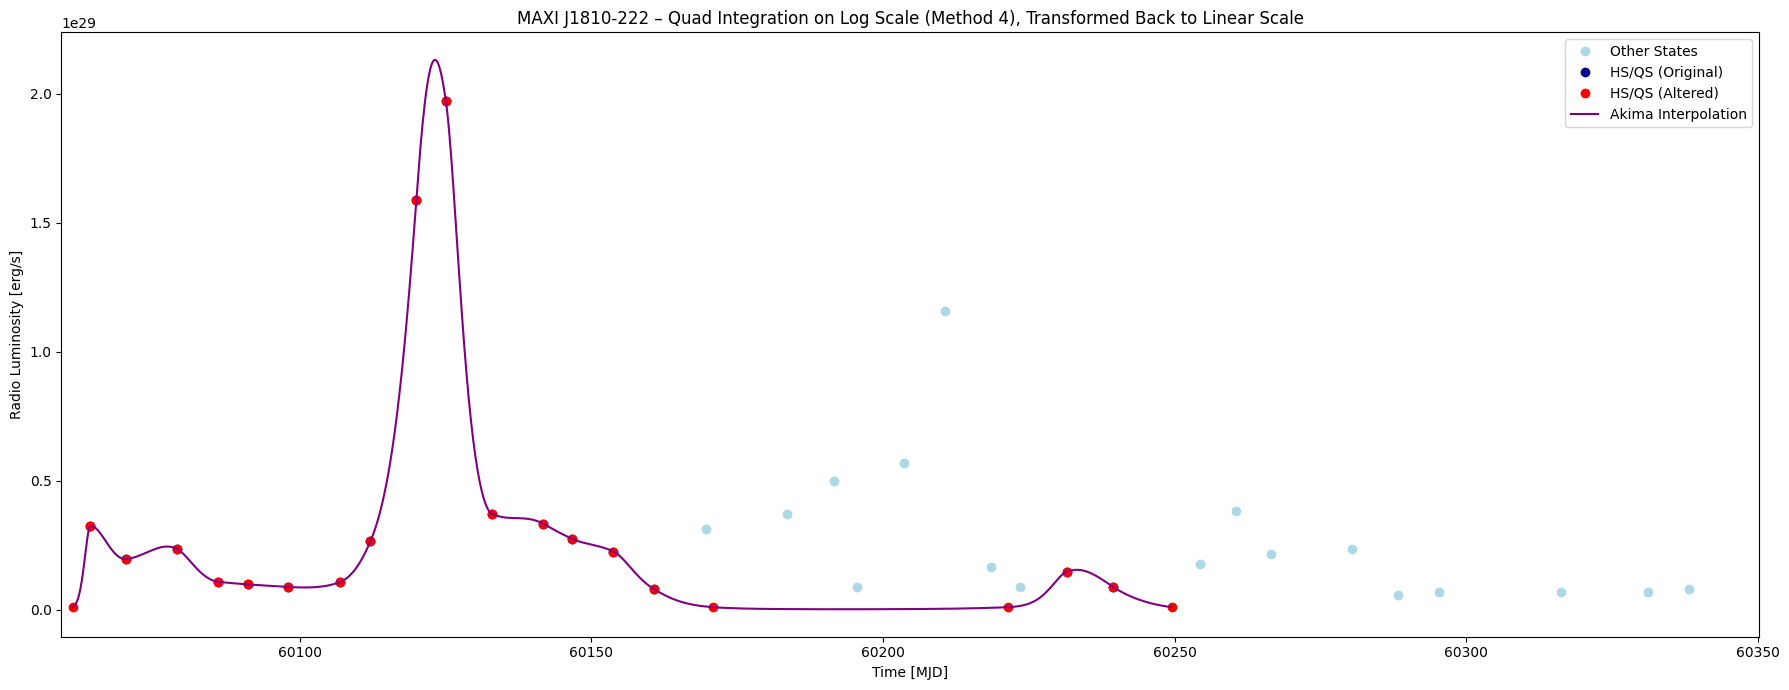

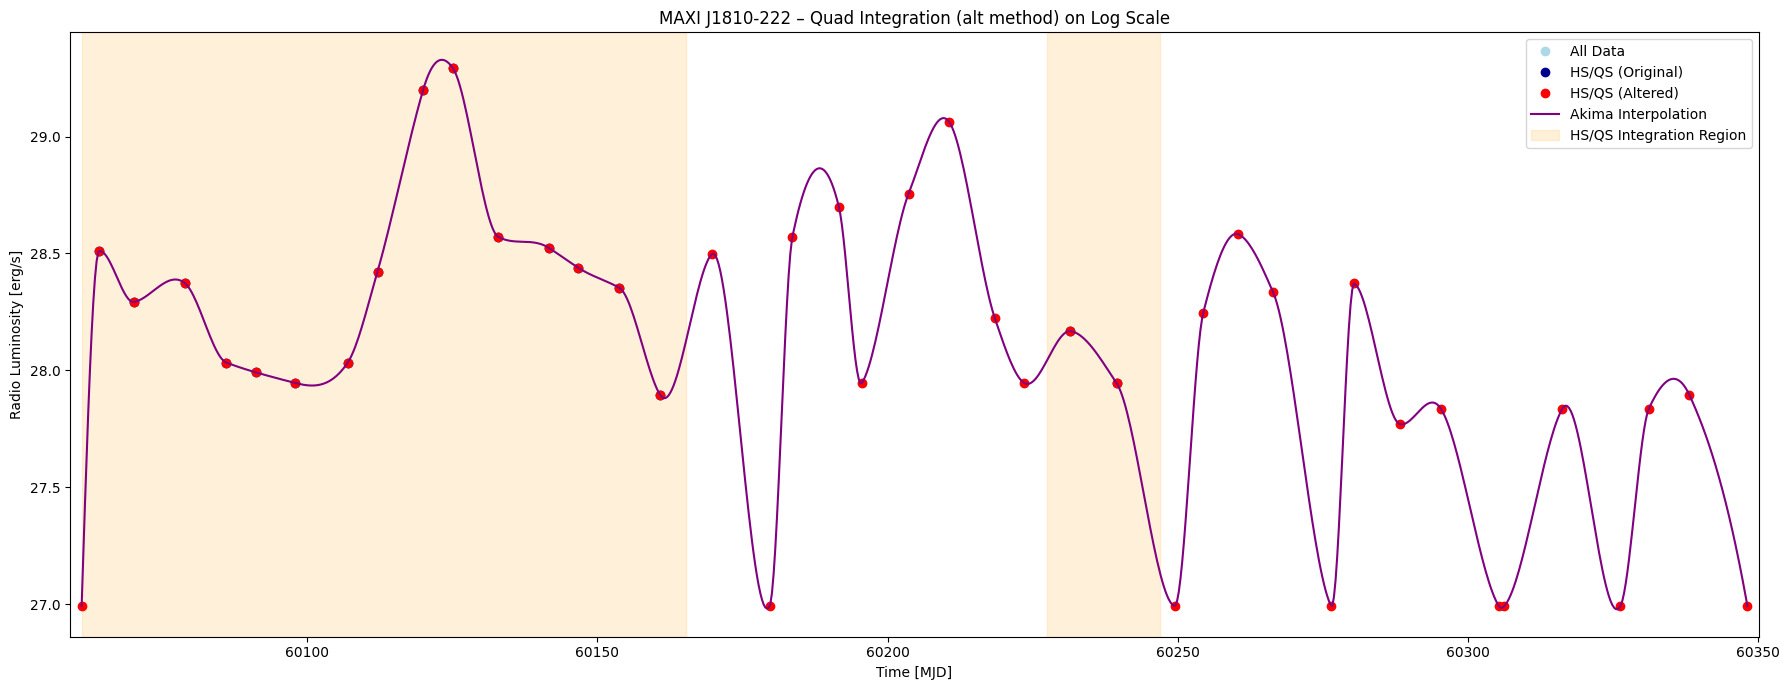


----------------------------------------

----------------------------------------


----------------------------------------


 MAXI J1816-195
59735.97492 59785.81249

MAXI J1816-195 [NS] Energy Estimates:
  Linear Trapezoidal:         9.022e+42 erg
  Linear Akima Interpolation: 9.012e+42 erg
  Log Trapezoidal:            3.021e+42 erg
  Log Akima Interpolation:    5.910e+42 erg
  Log Akima Interpolation (Alt): 5.910e+42 erg


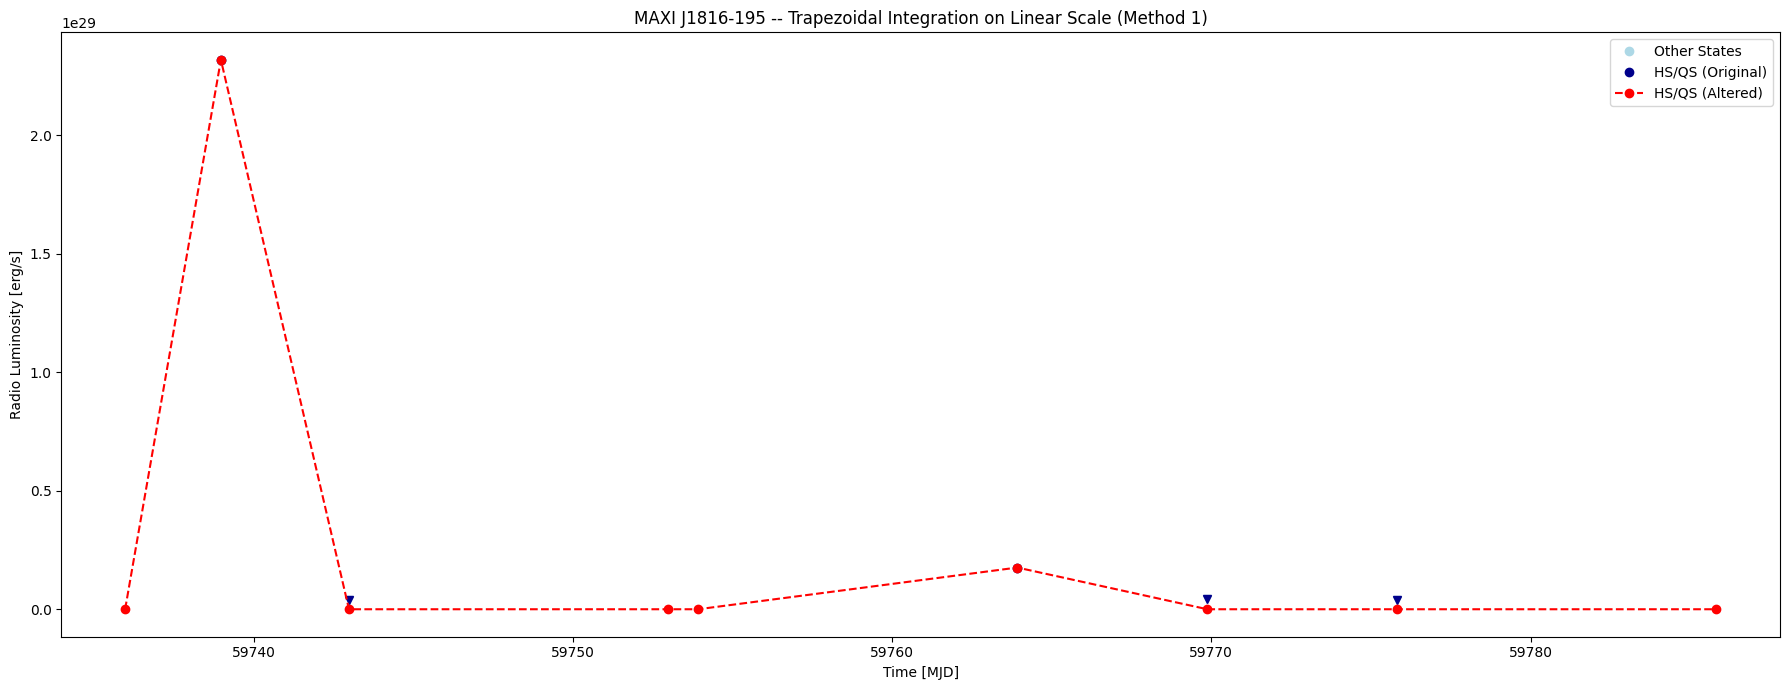

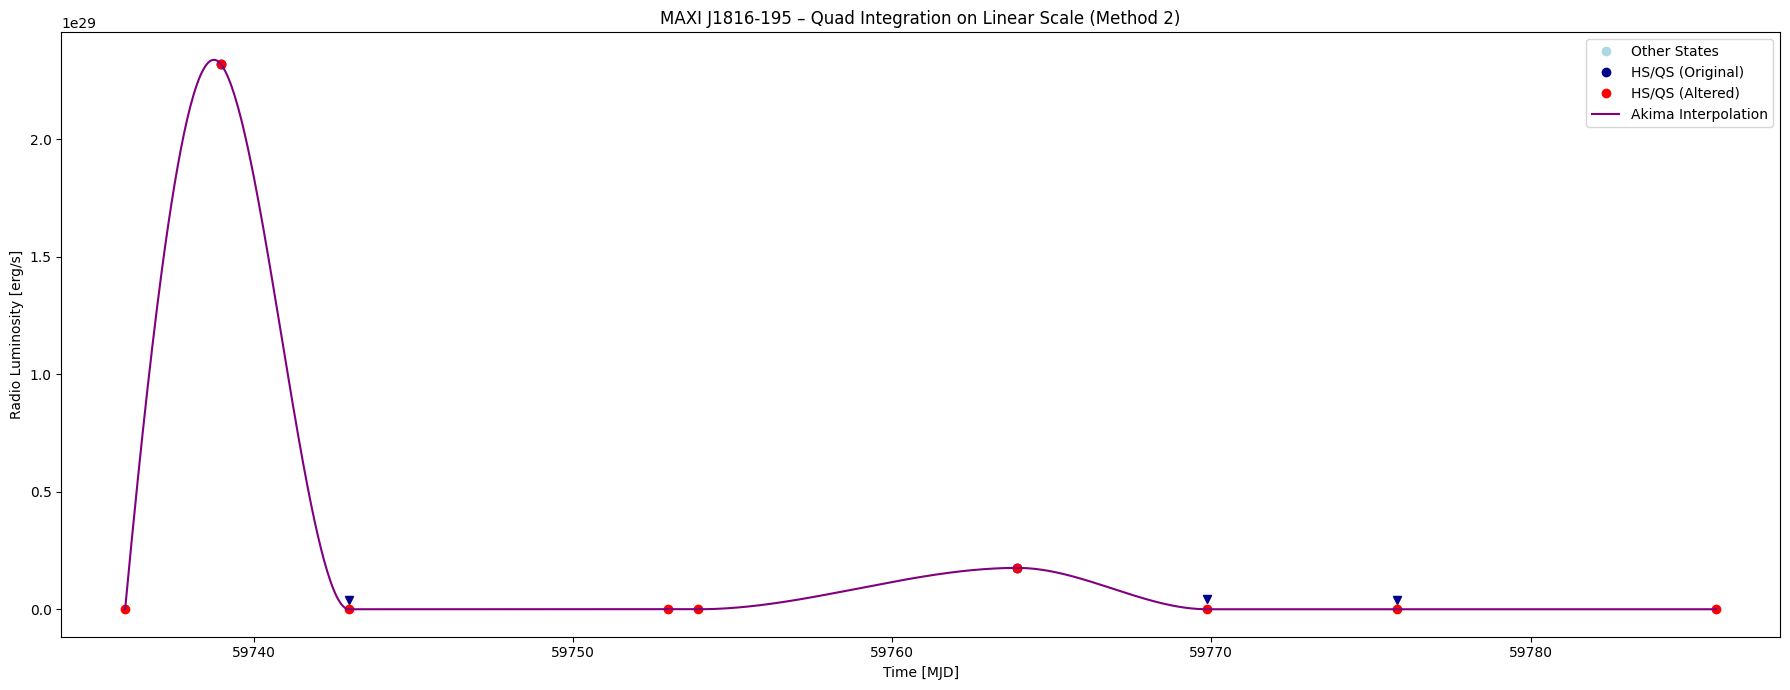

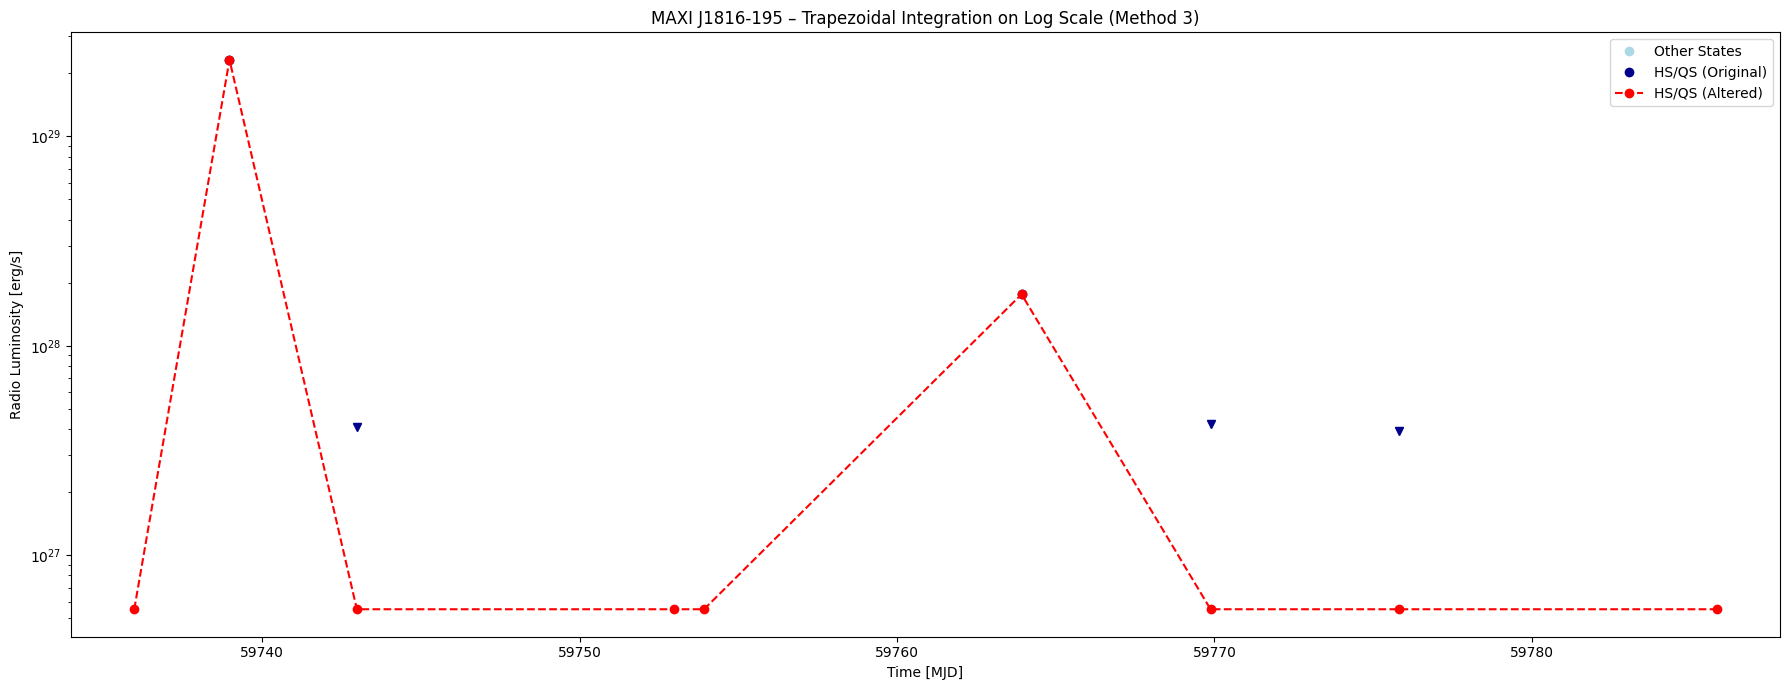

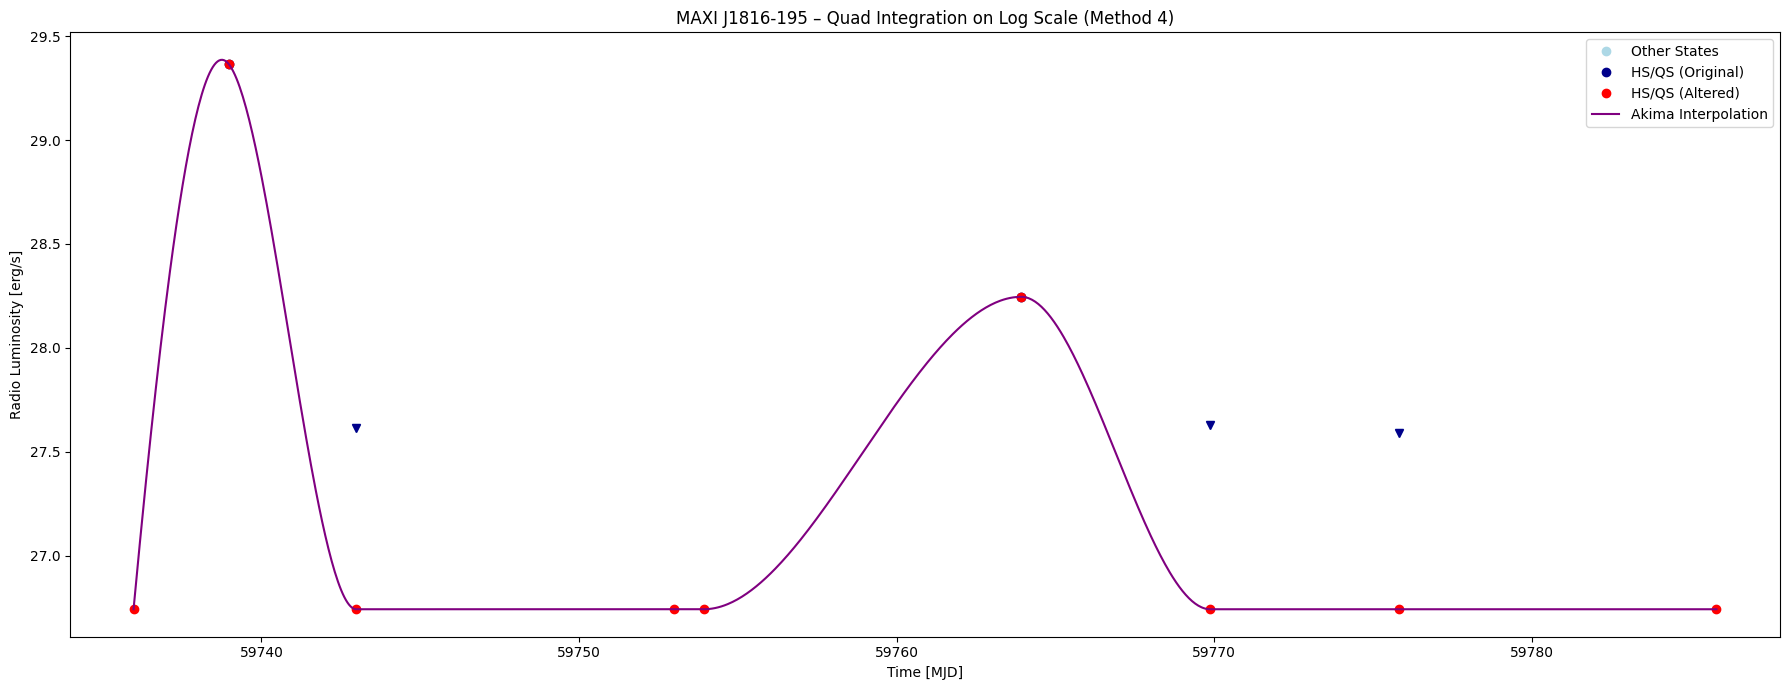

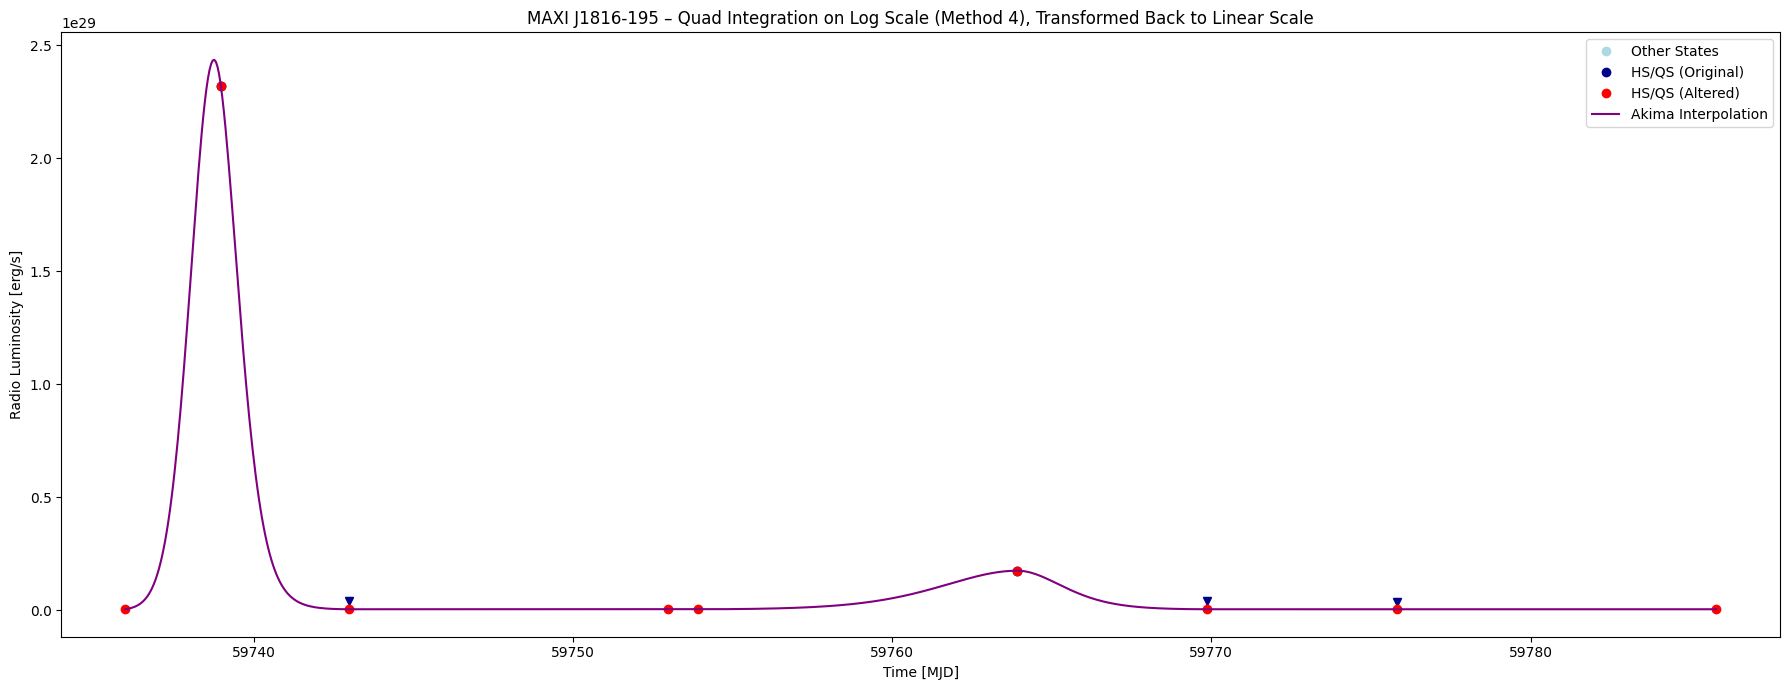

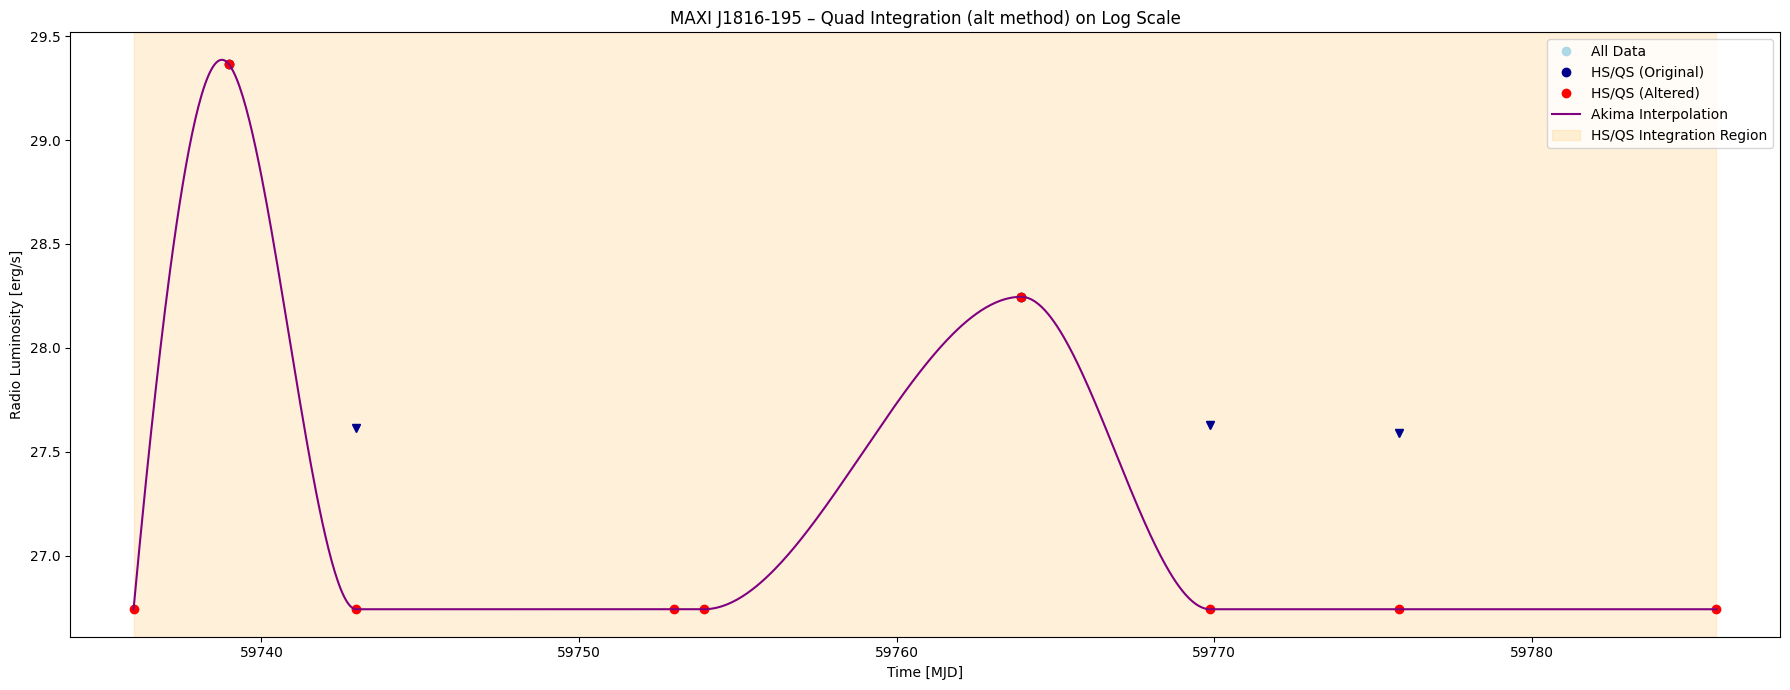


----------------------------------------

----------------------------------------


----------------------------------------


 MAXI J1820+070
58393.2204995325 59779.86133

MAXI J1820+070 [BH] Energy Estimates:
  Linear Trapezoidal:         8.541e+43 erg
  Linear Akima Interpolation: 8.418e+43 erg
  Log Trapezoidal:            8.311e+43 erg
  Log Akima Interpolation:    8.143e+43 erg
  Log Akima Interpolation (Alt): 8.437e+43 erg


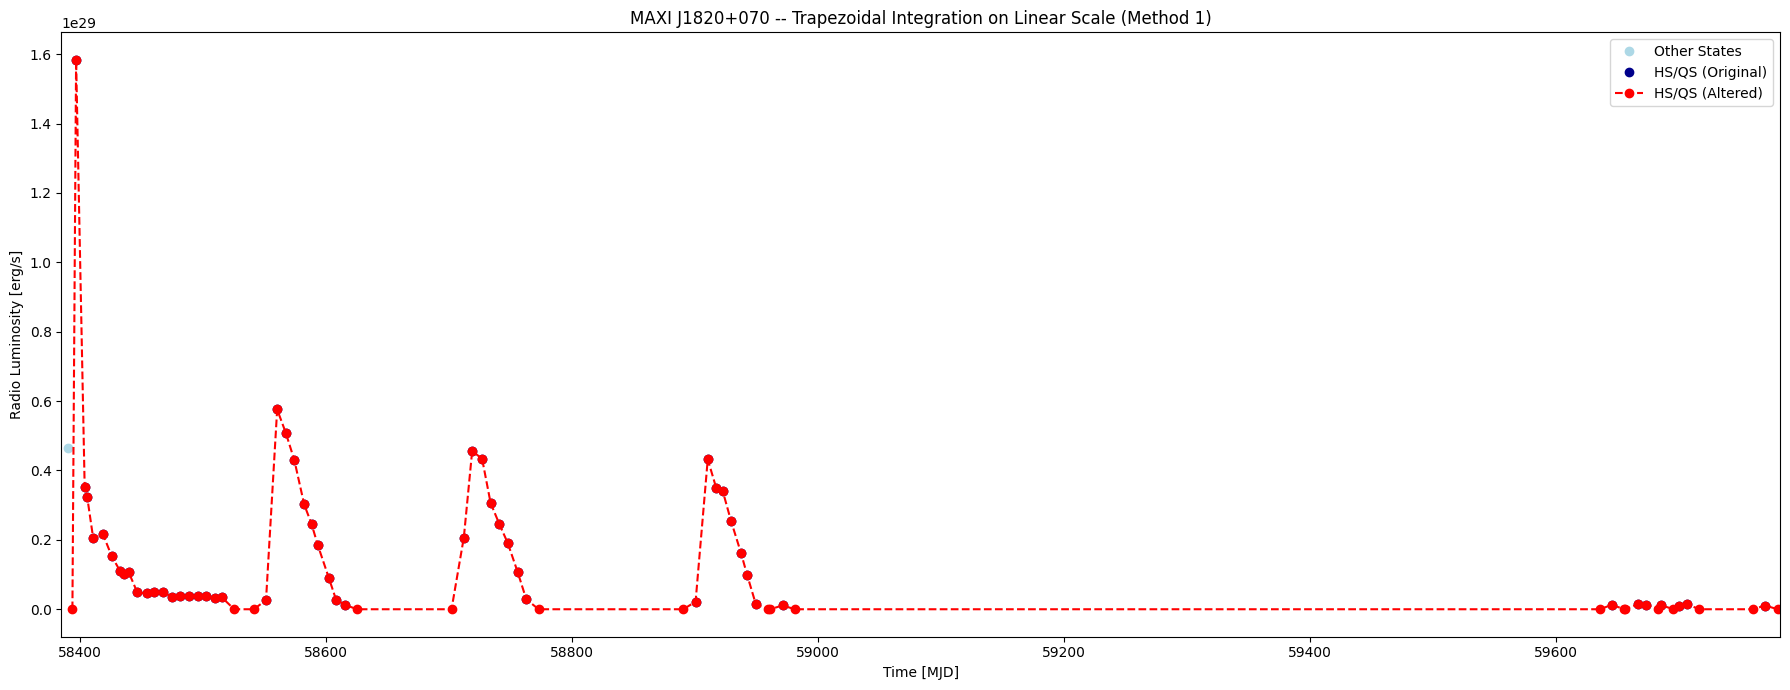

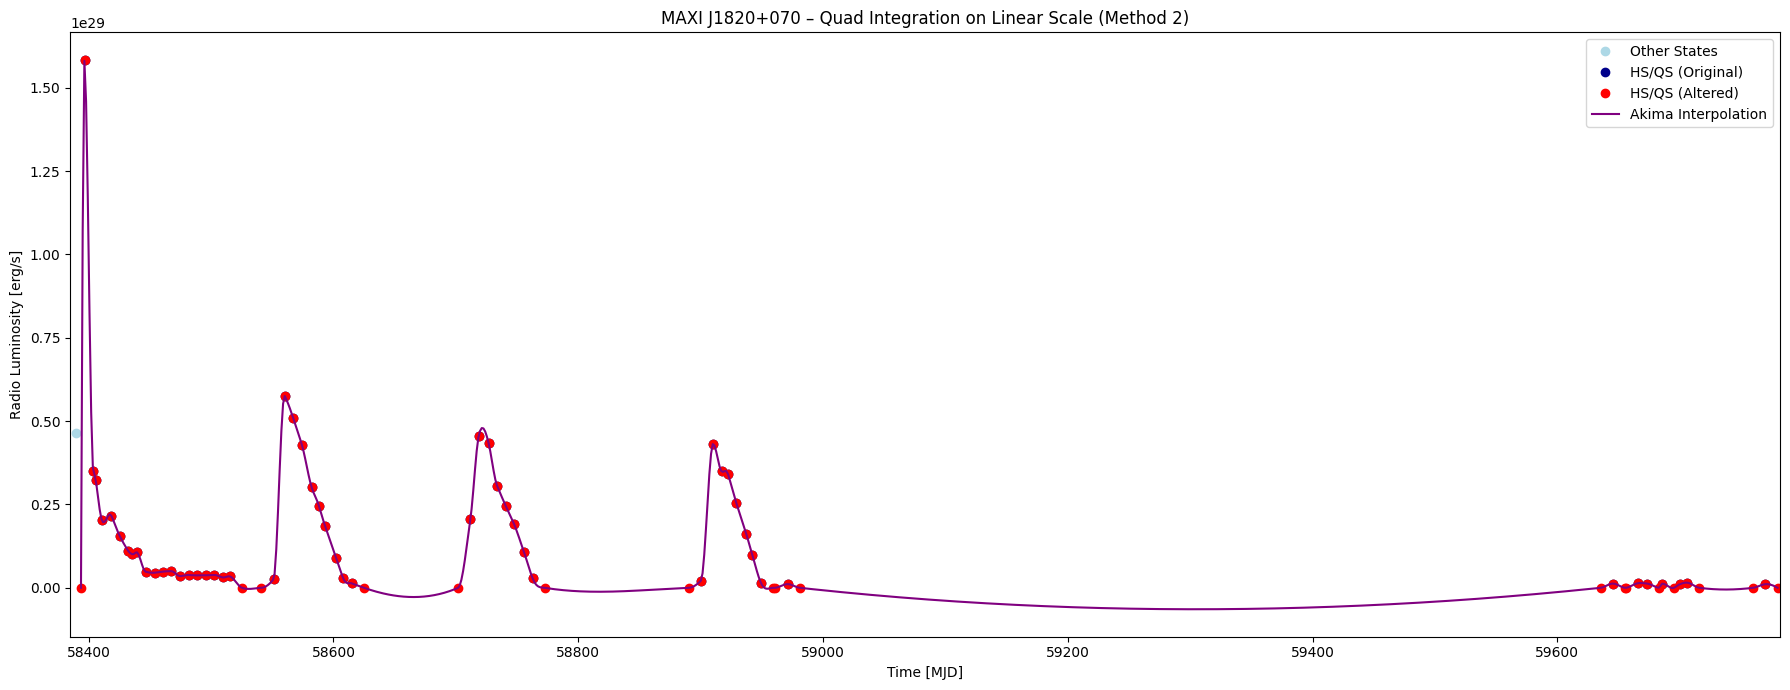

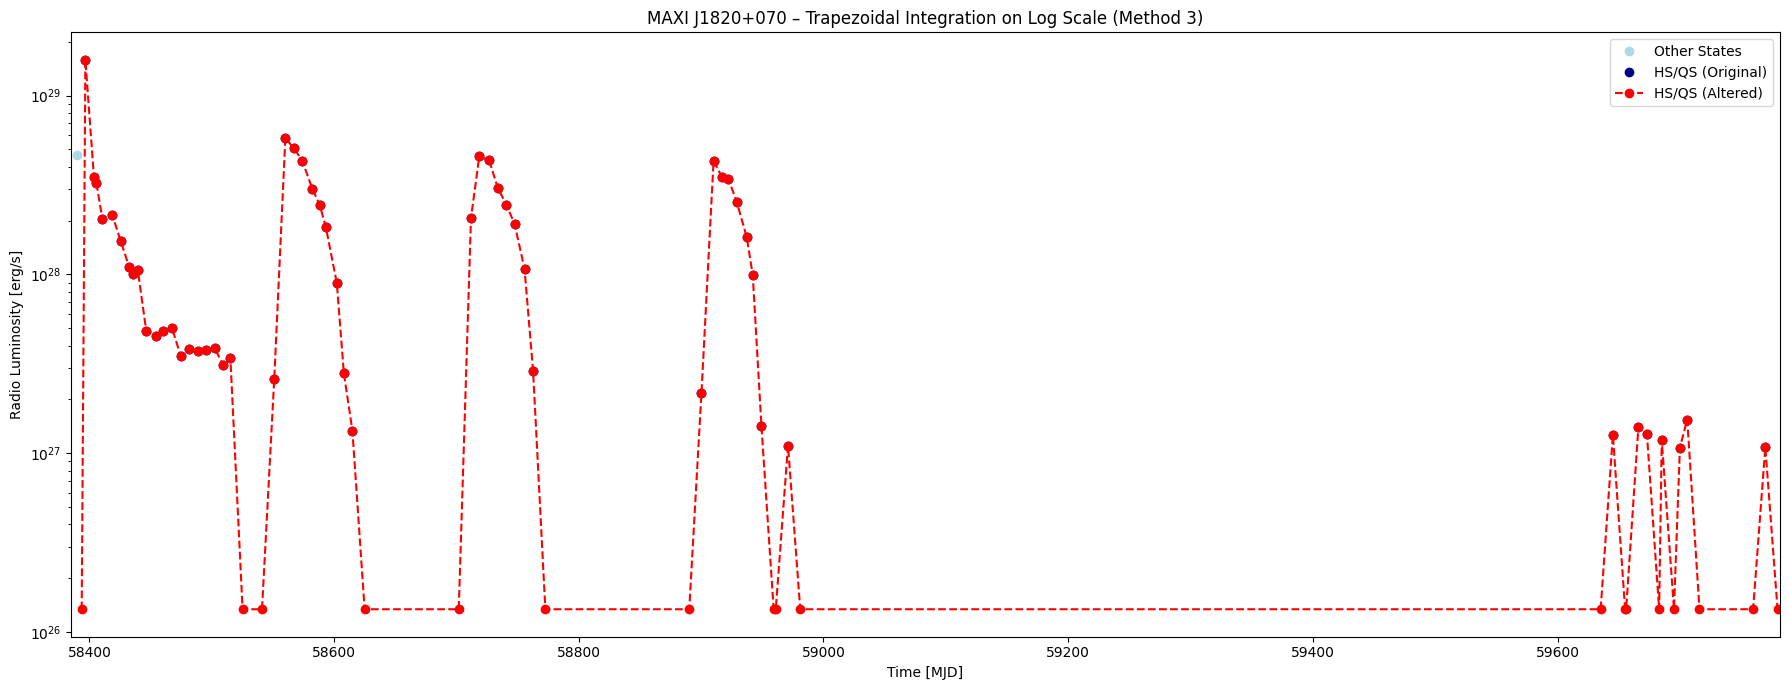

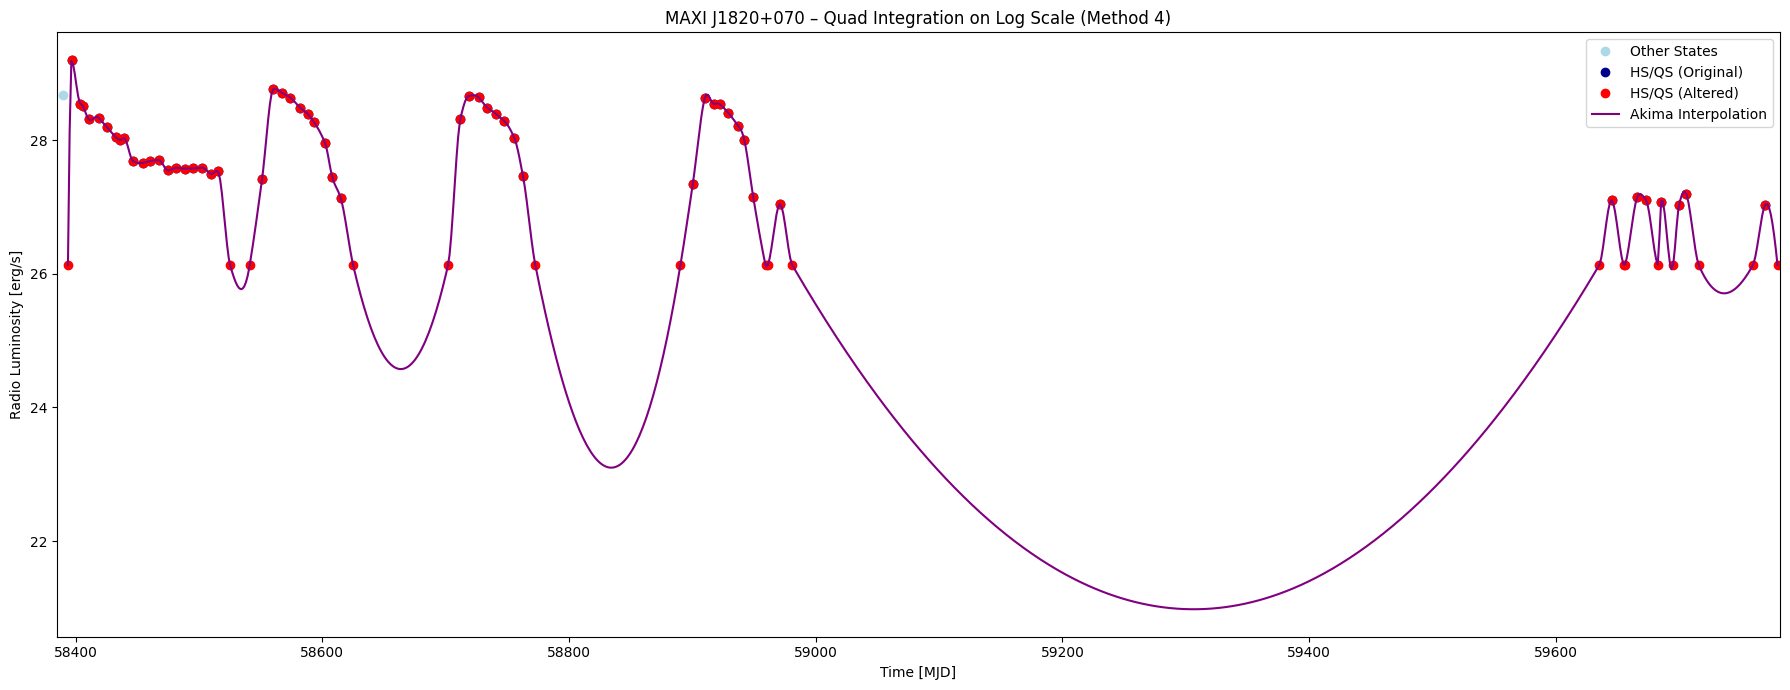

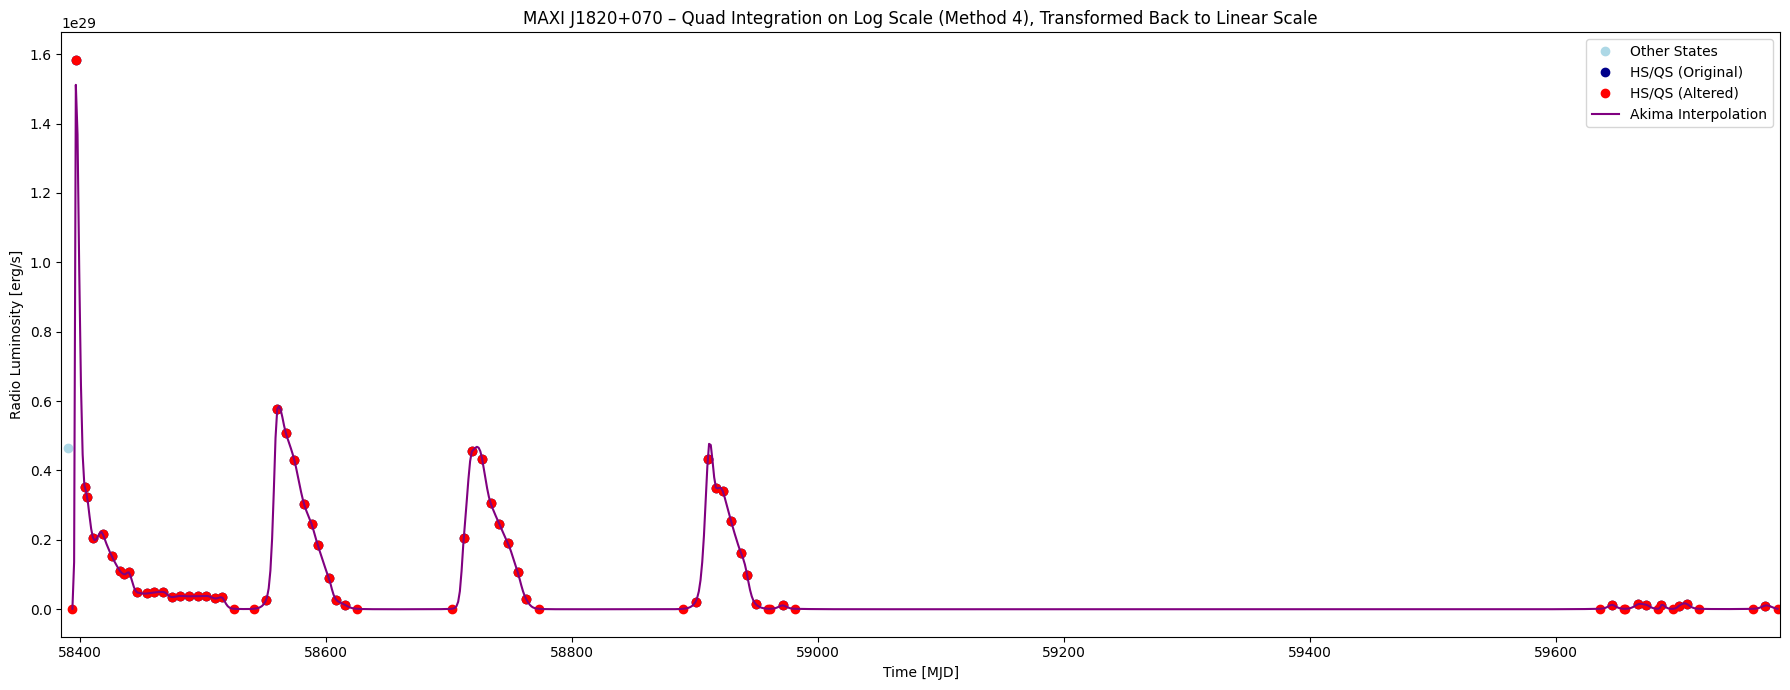

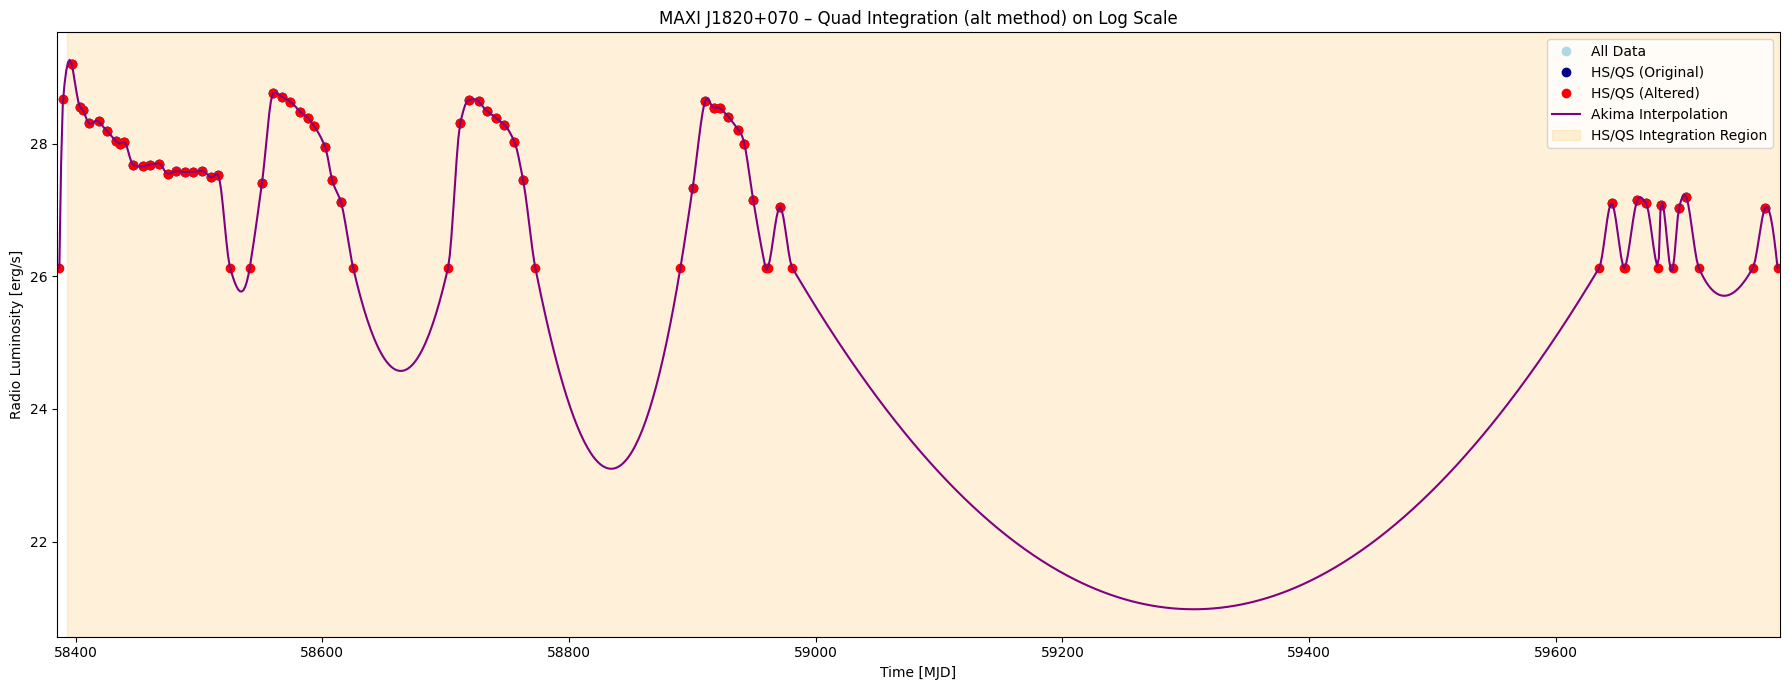


----------------------------------------

----------------------------------------


----------------------------------------


 SAX J1808.4-3658
58692.74395 59841.721025

SAX J1808.4-3658 [NS] Energy Estimates:
  Linear Trapezoidal:         3.152e+42 erg
  Linear Akima Interpolation: 3.030e+42 erg
  Log Trapezoidal:            9.826e+42 erg
  Log Akima Interpolation:    2.917e+42 erg
  Log Akima Interpolation (Alt): 2.917e+42 erg


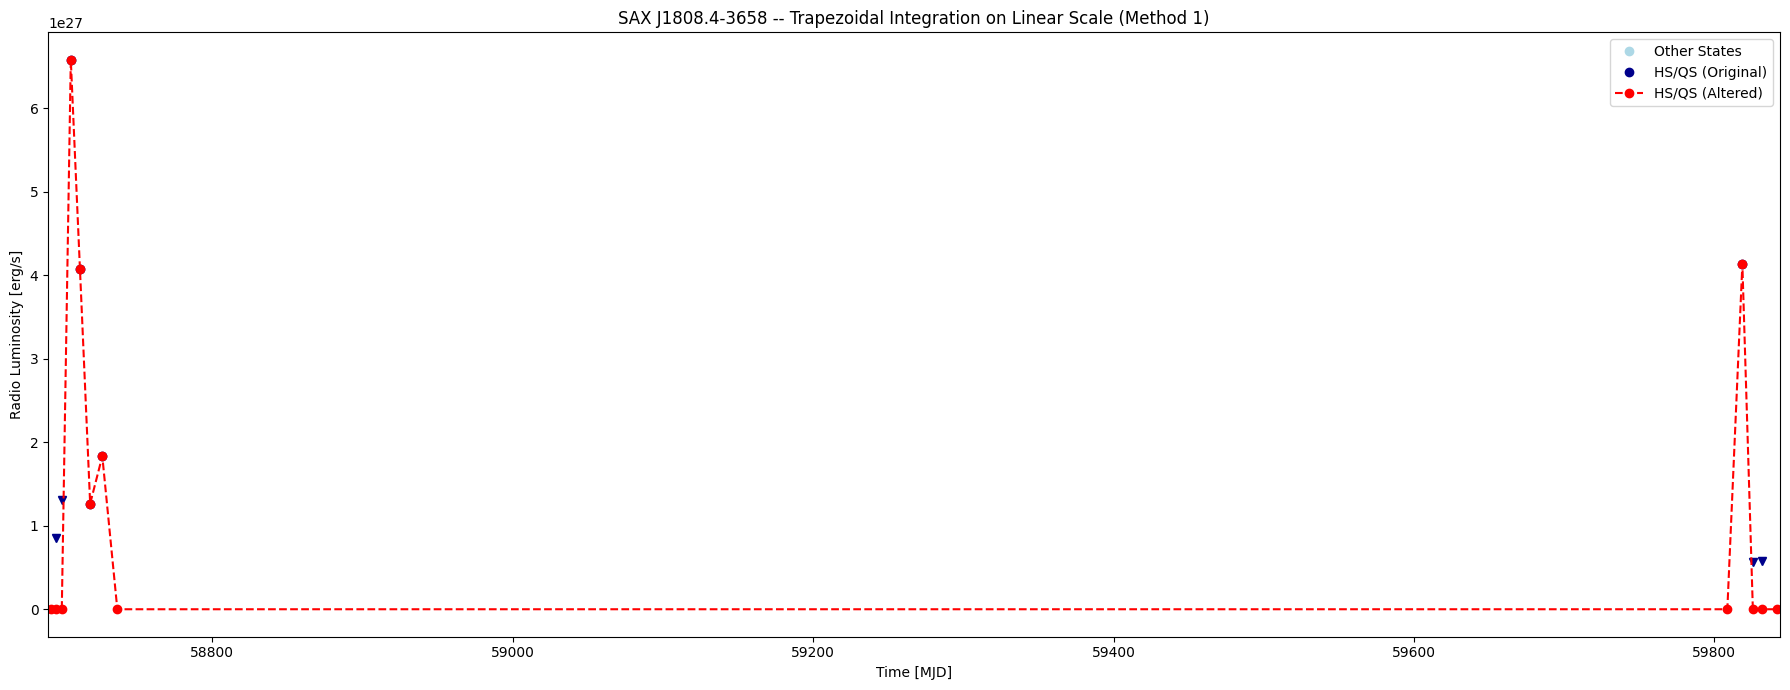

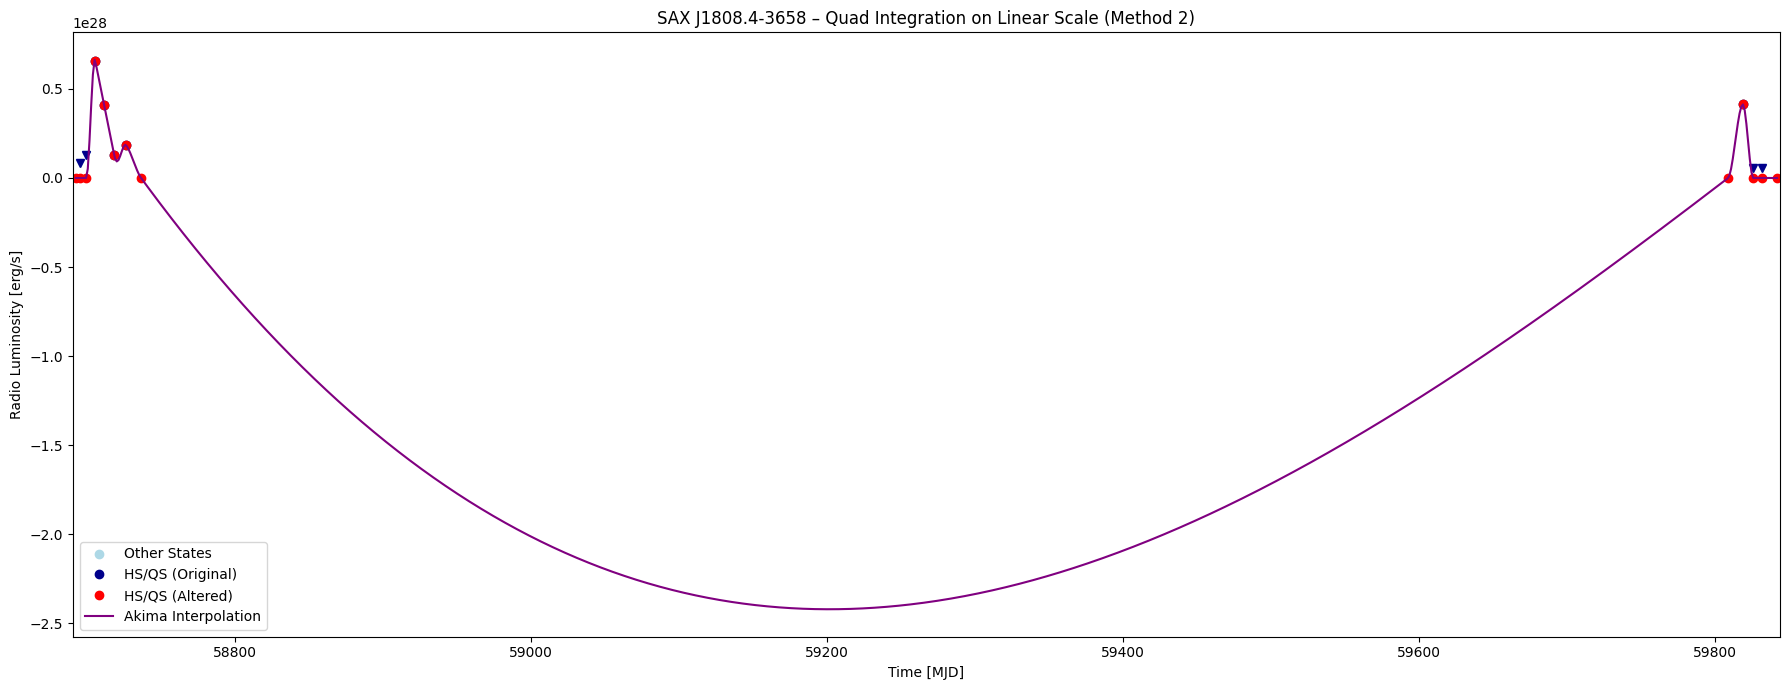

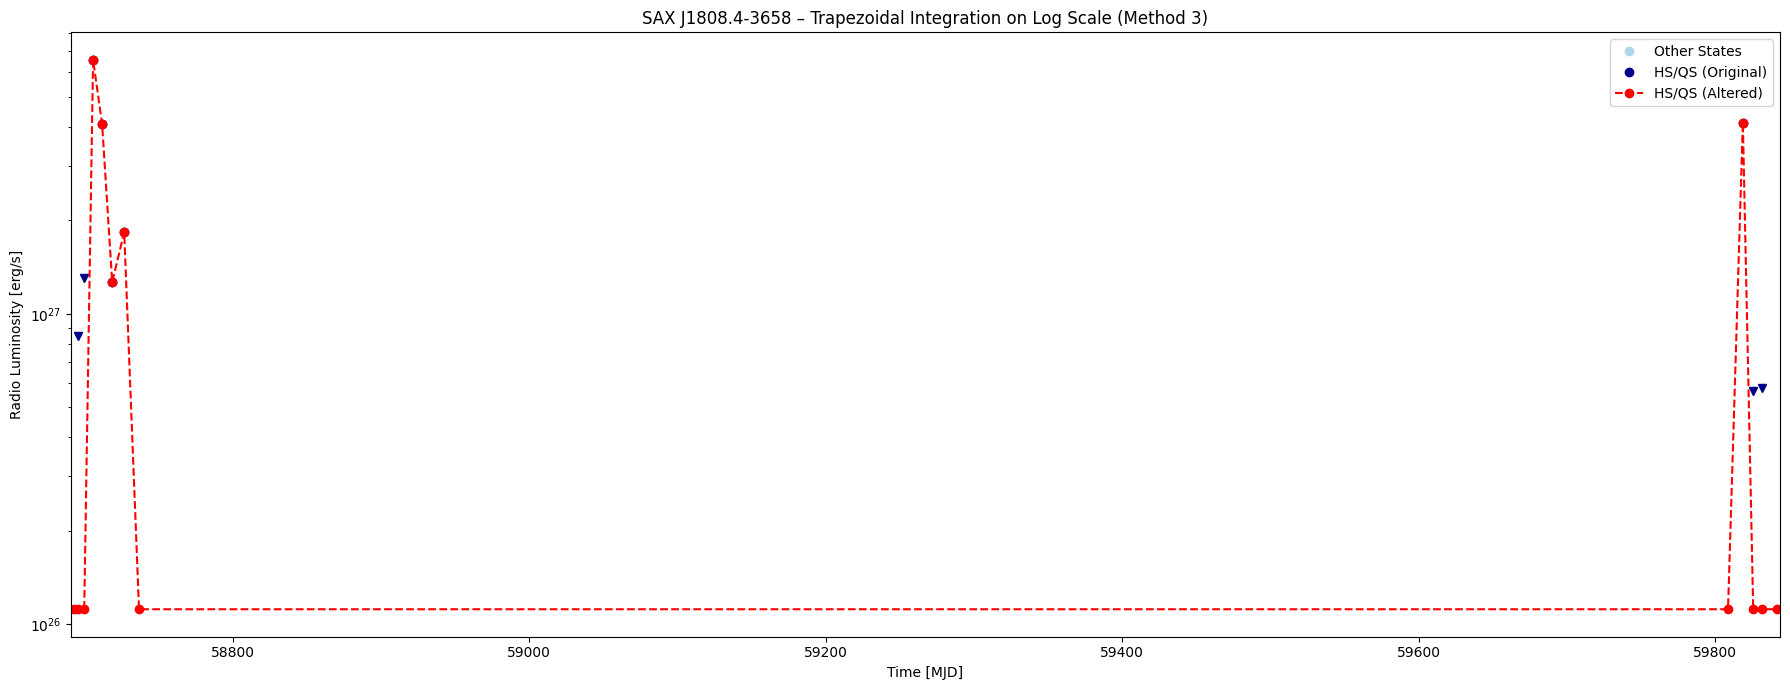

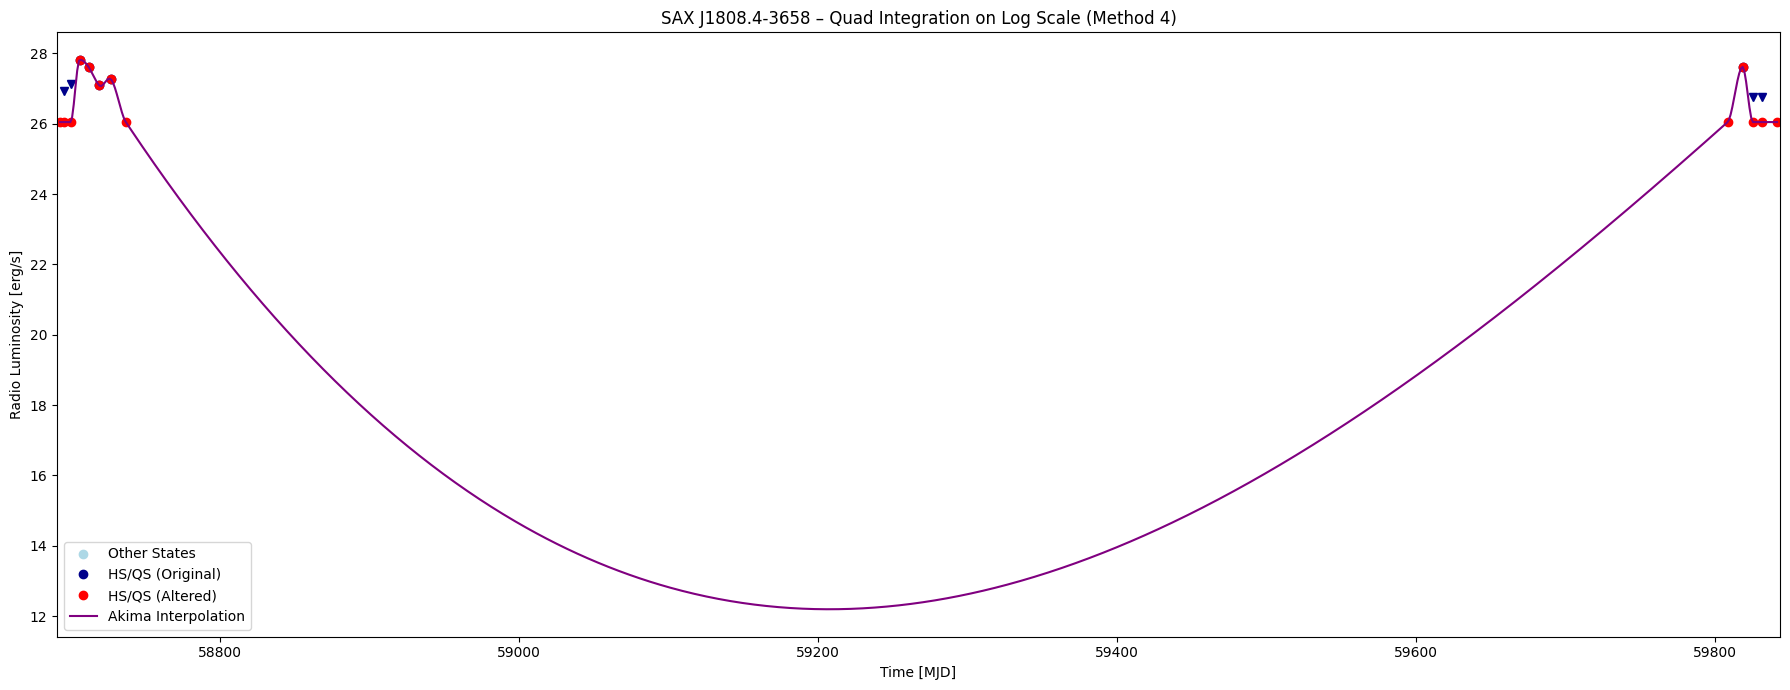

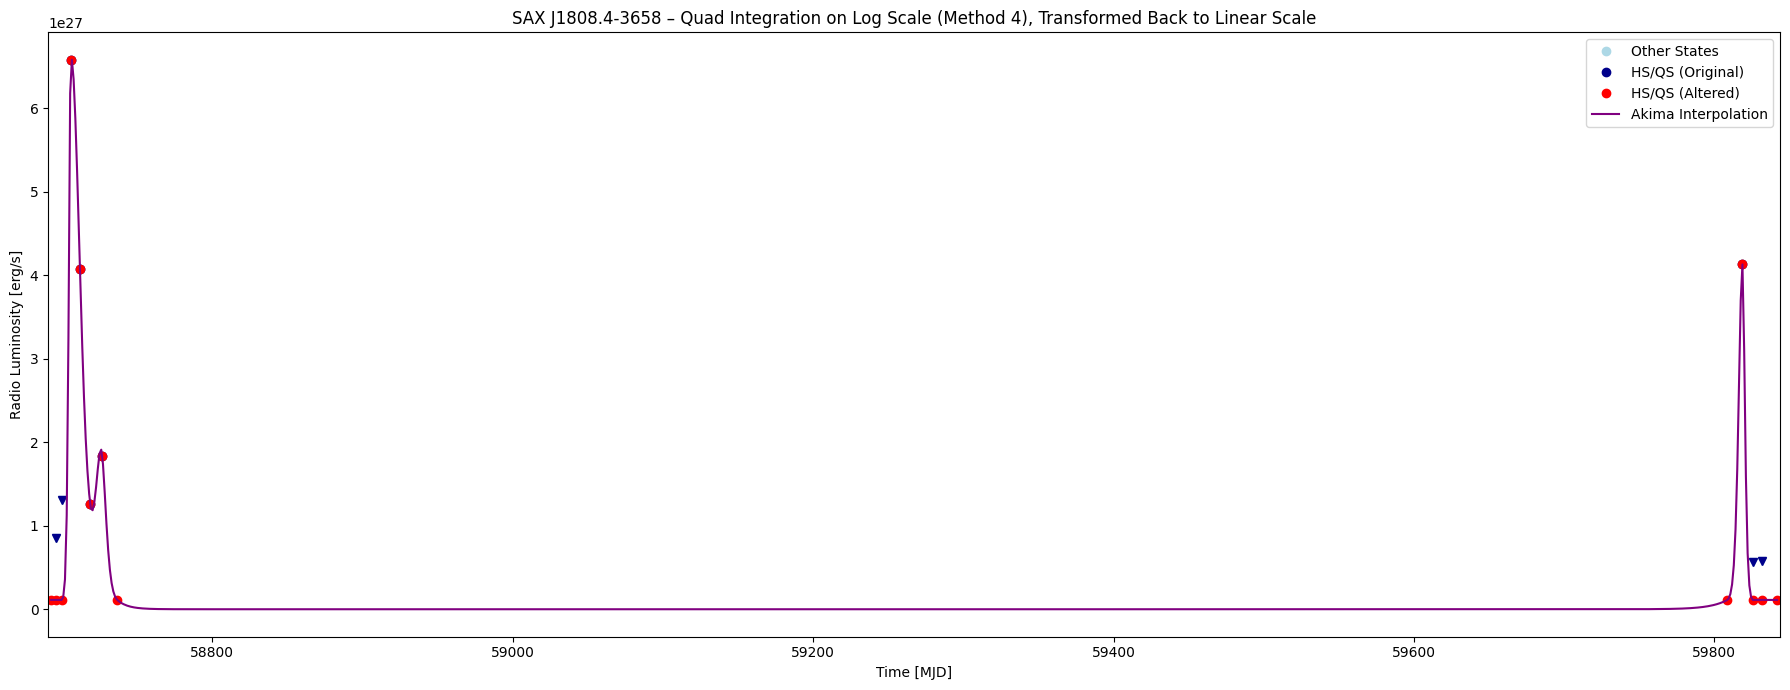

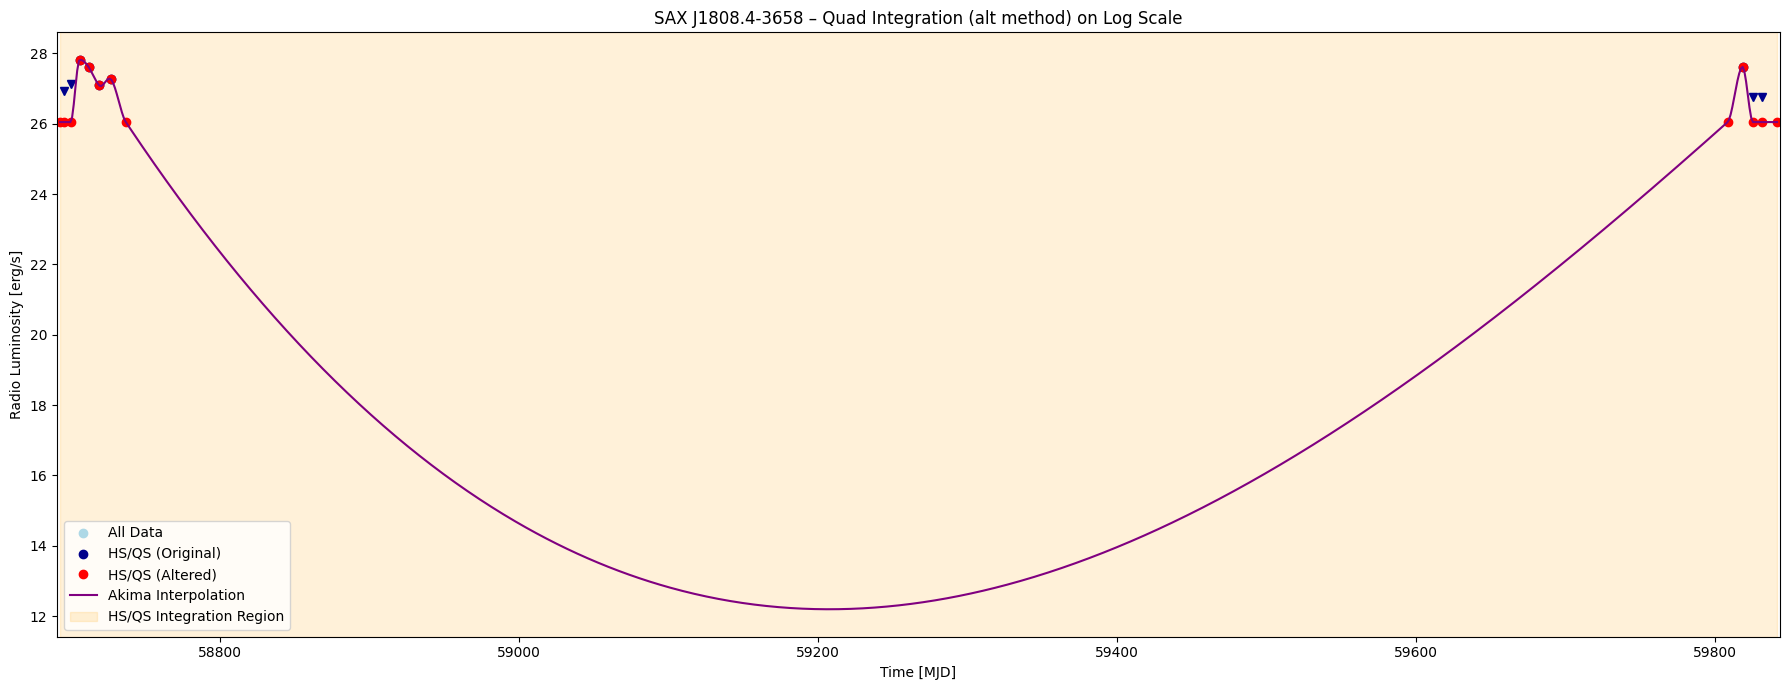


----------------------------------------

----------------------------------------


----------------------------------------


 SAX J1810.8-2609
59353.0664 59520.5502

SAX J1810.8-2609 [NS] Energy Estimates:
  Linear Trapezoidal:         3.221e+42 erg
  Linear Akima Interpolation: 3.180e+42 erg
  Log Trapezoidal:            4.876e+42 erg
  Log Akima Interpolation:    5.069e+42 erg
  Log Akima Interpolation (Alt): 5.069e+42 erg


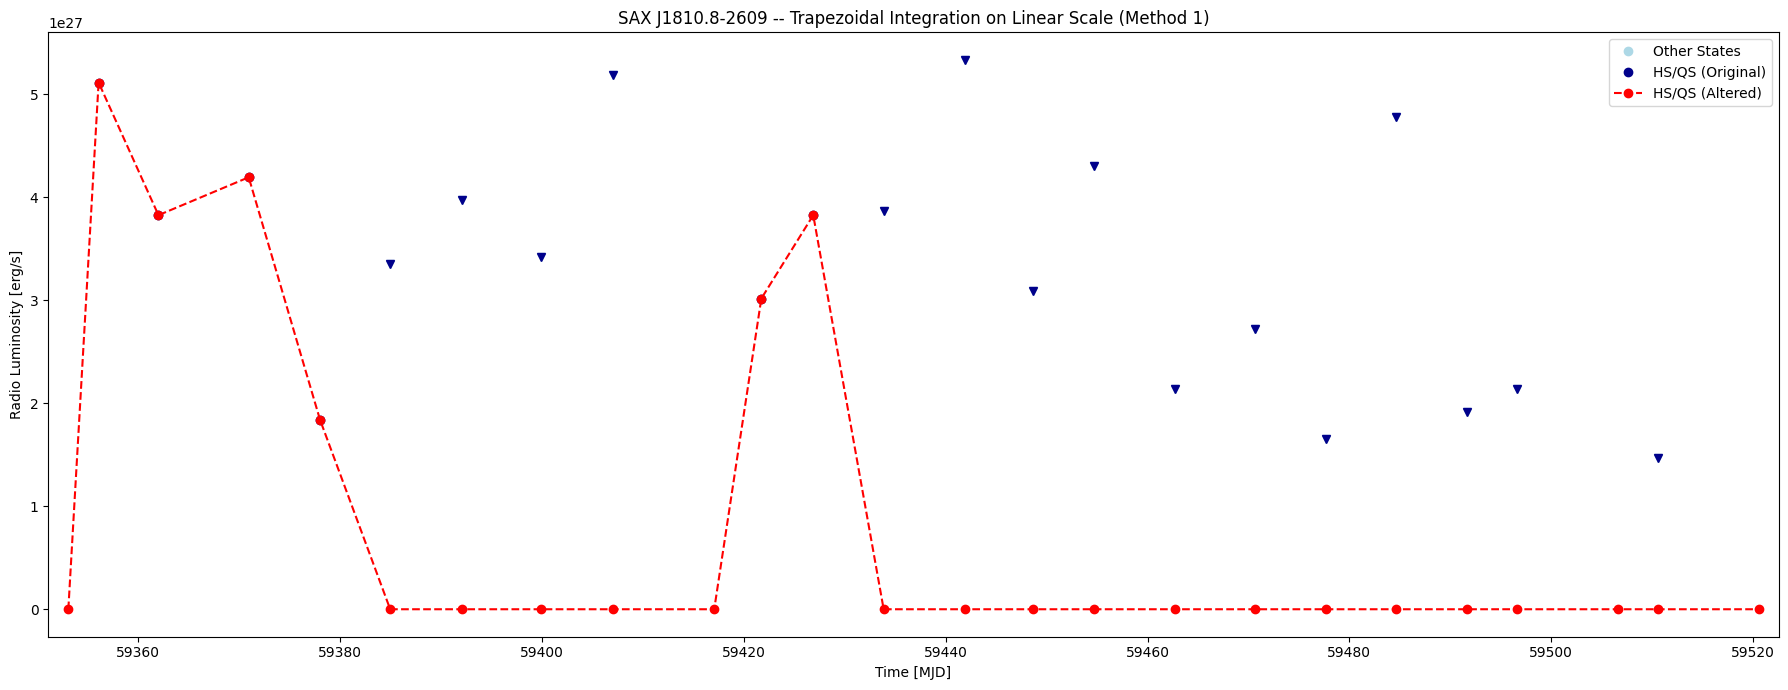

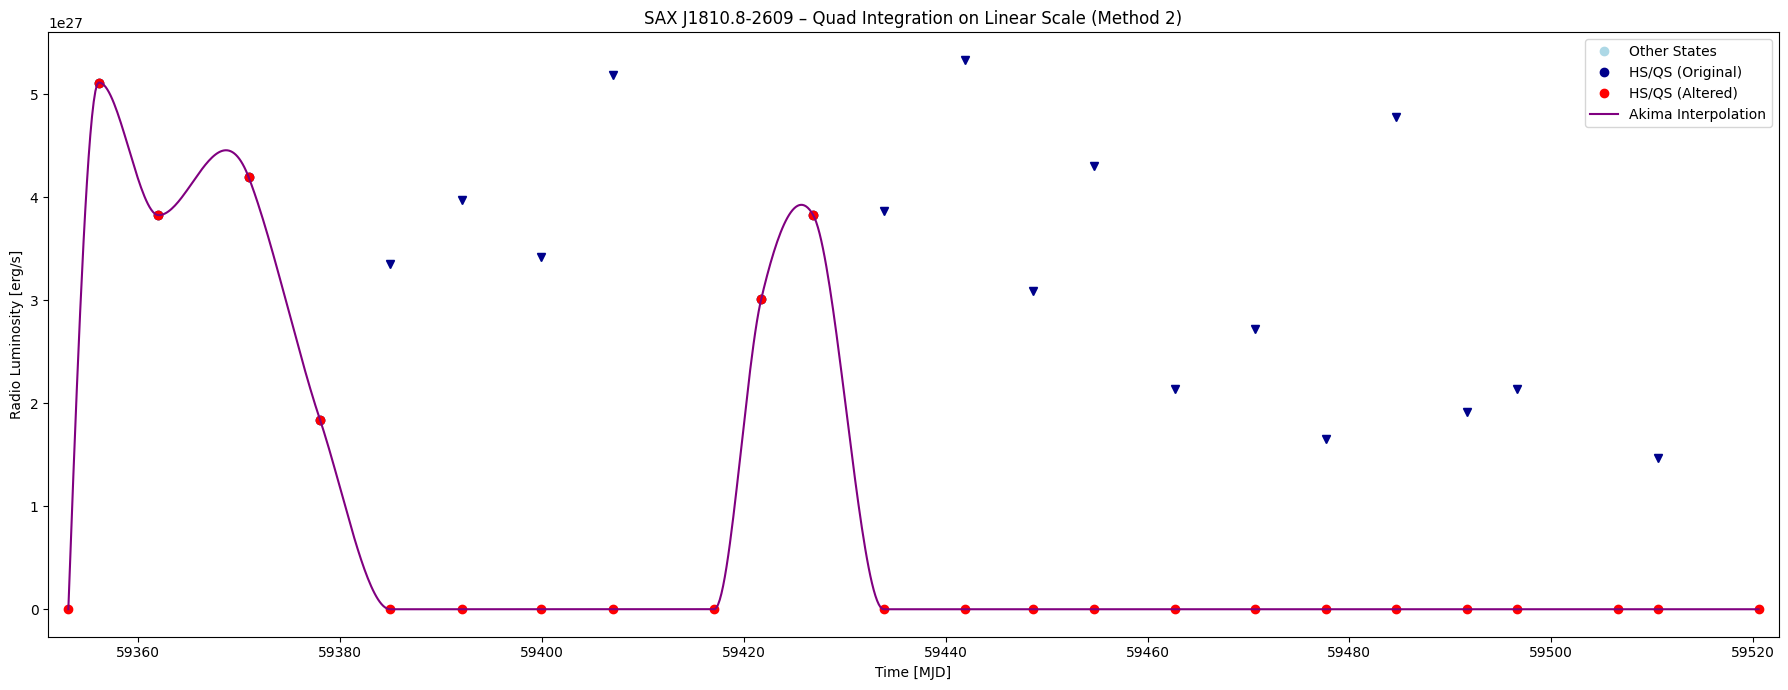

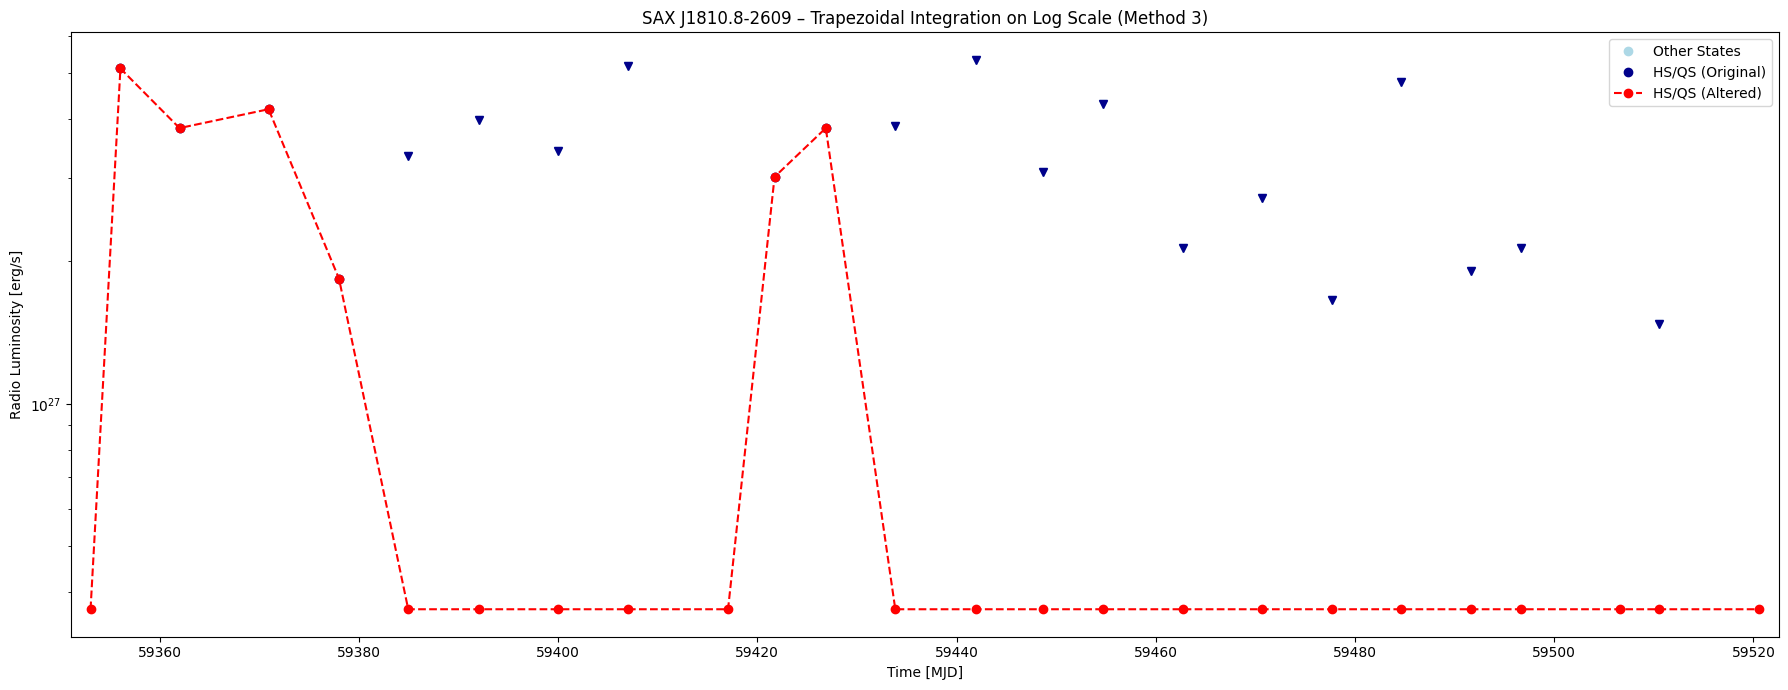

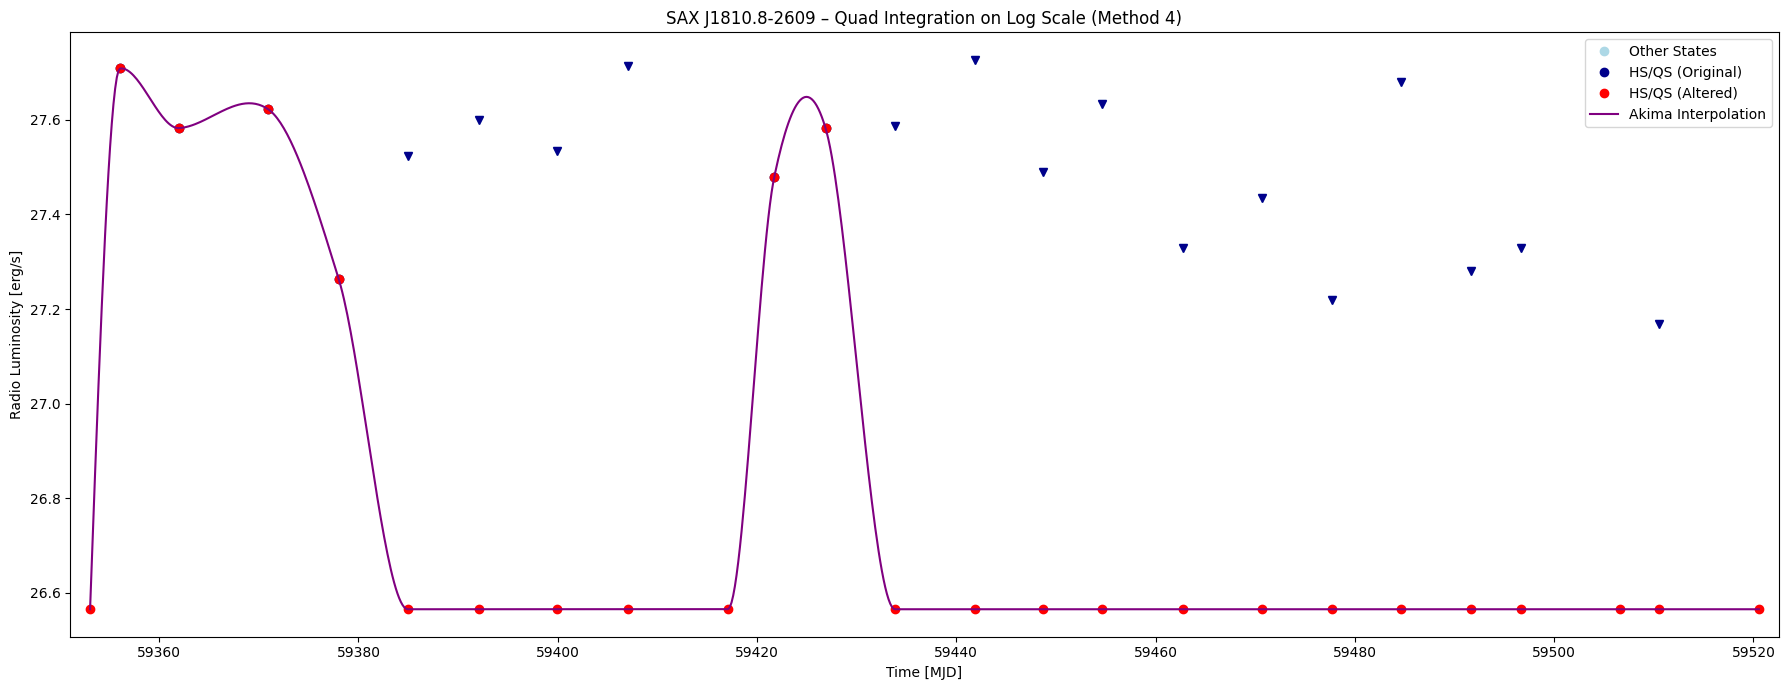

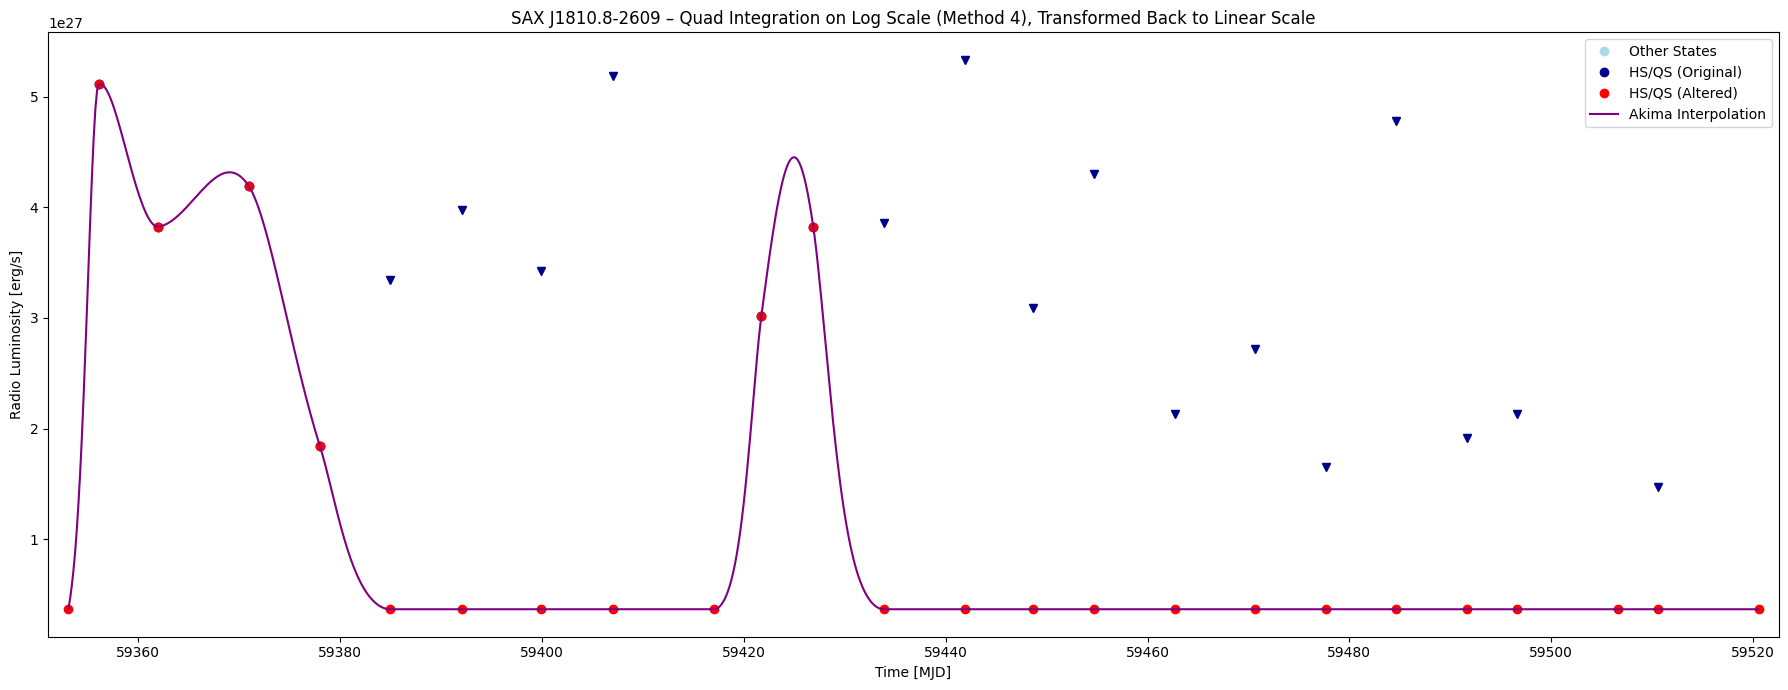

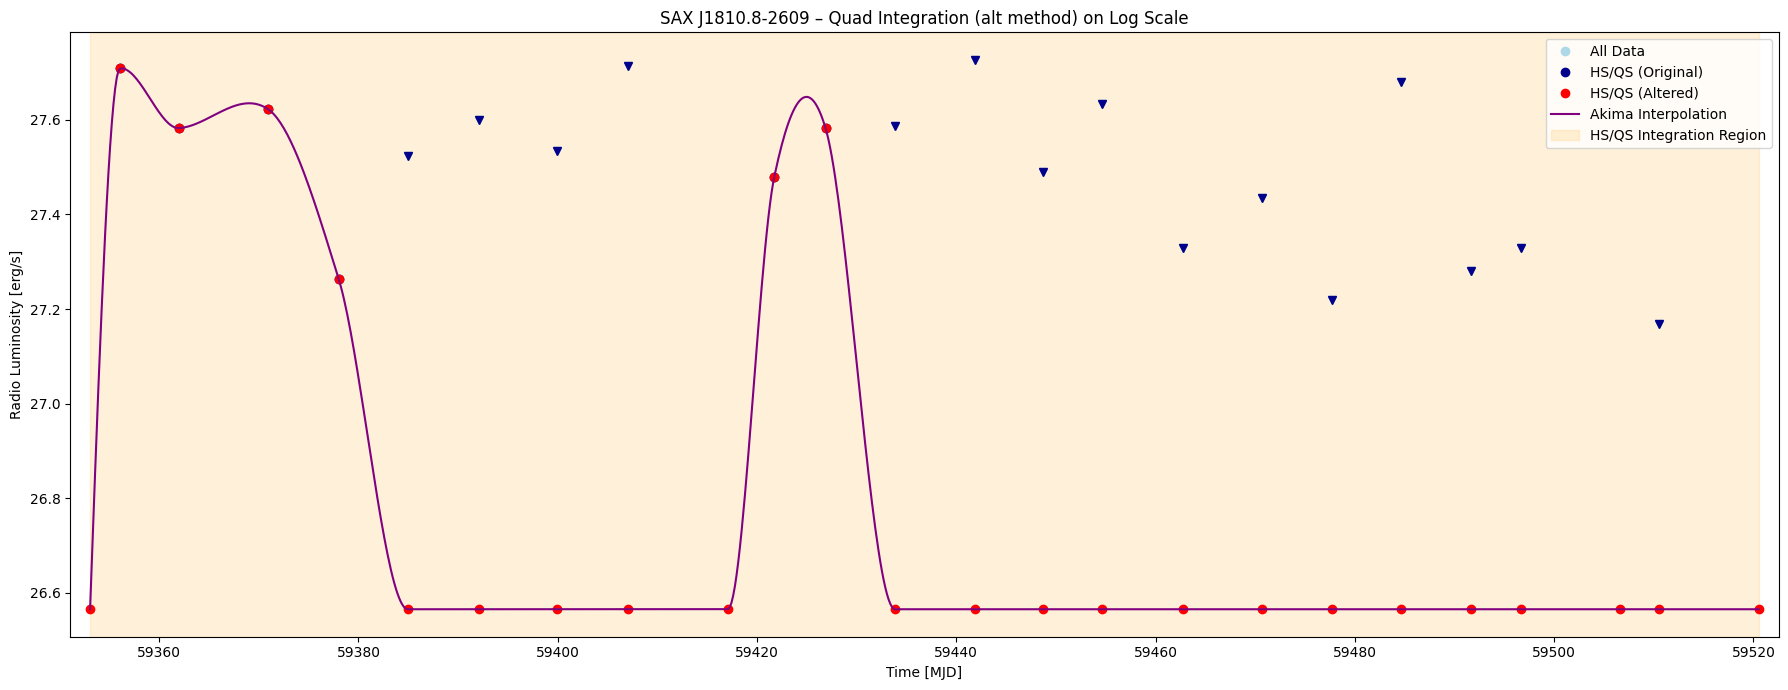


----------------------------------------

----------------------------------------


----------------------------------------


 Swift J1727.8-1613
60180.65481 60213.65151
60389.051204999996 60473.89865

Swift J1727.8-1613 [BH] Energy Estimates:
  Linear Trapezoidal:         3.371e+44 erg
  Linear Akima Interpolation: 3.329e+44 erg
  Log Trapezoidal:            2.537e+44 erg
  Log Akima Interpolation:    2.866e+44 erg
  Log Akima Interpolation (Alt): 2.865e+44 erg


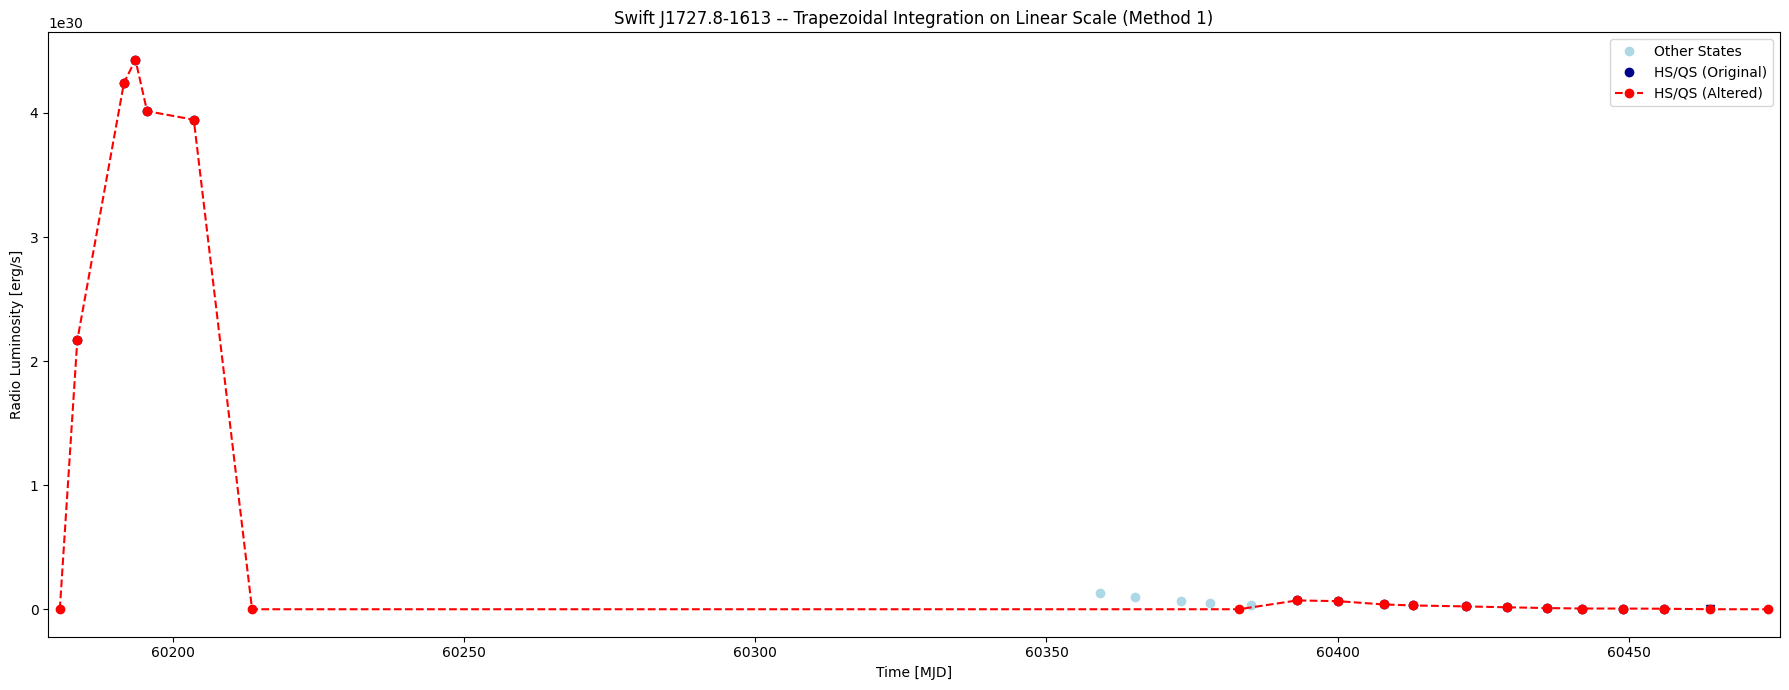

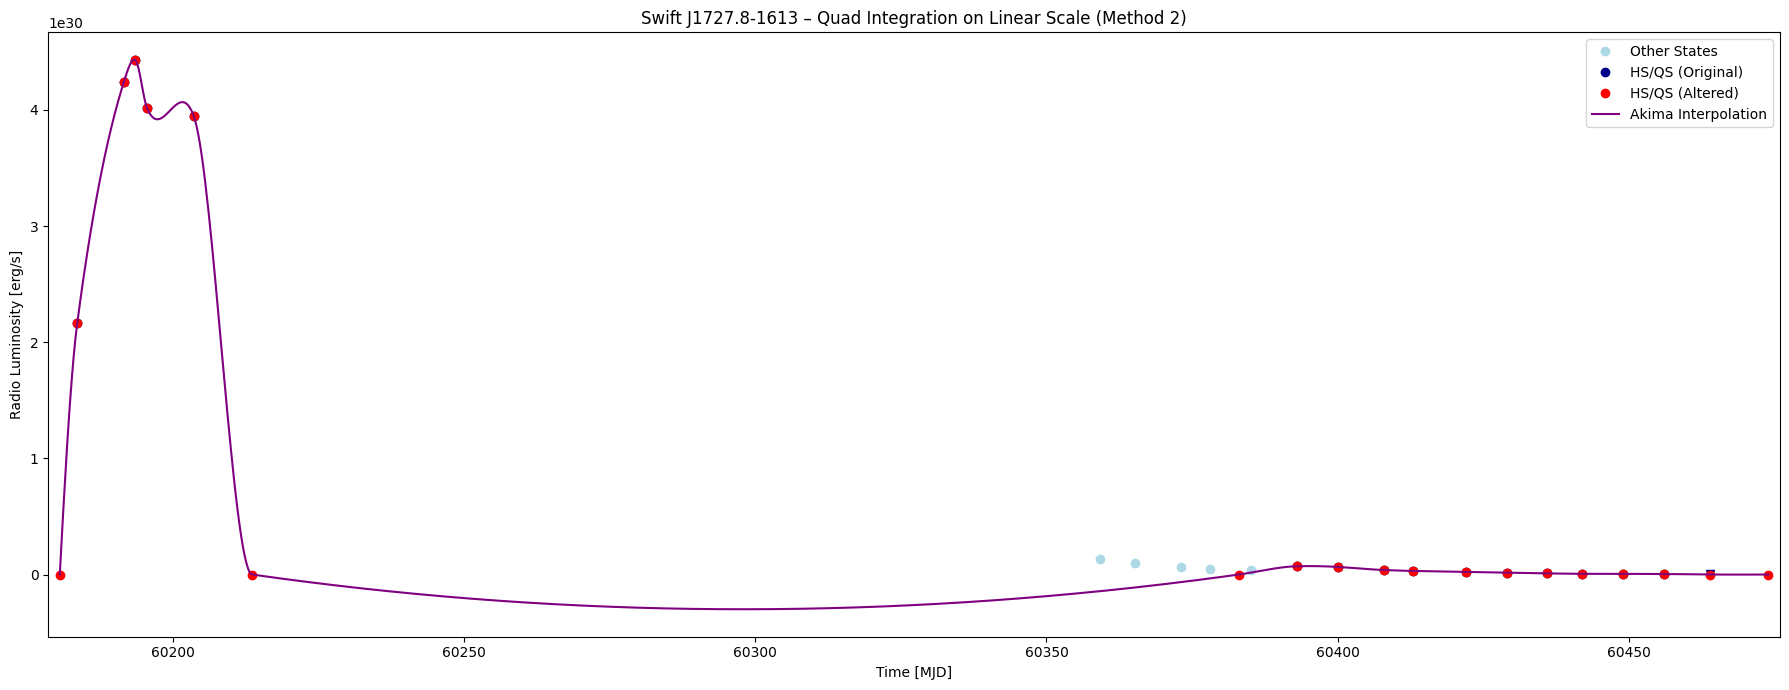

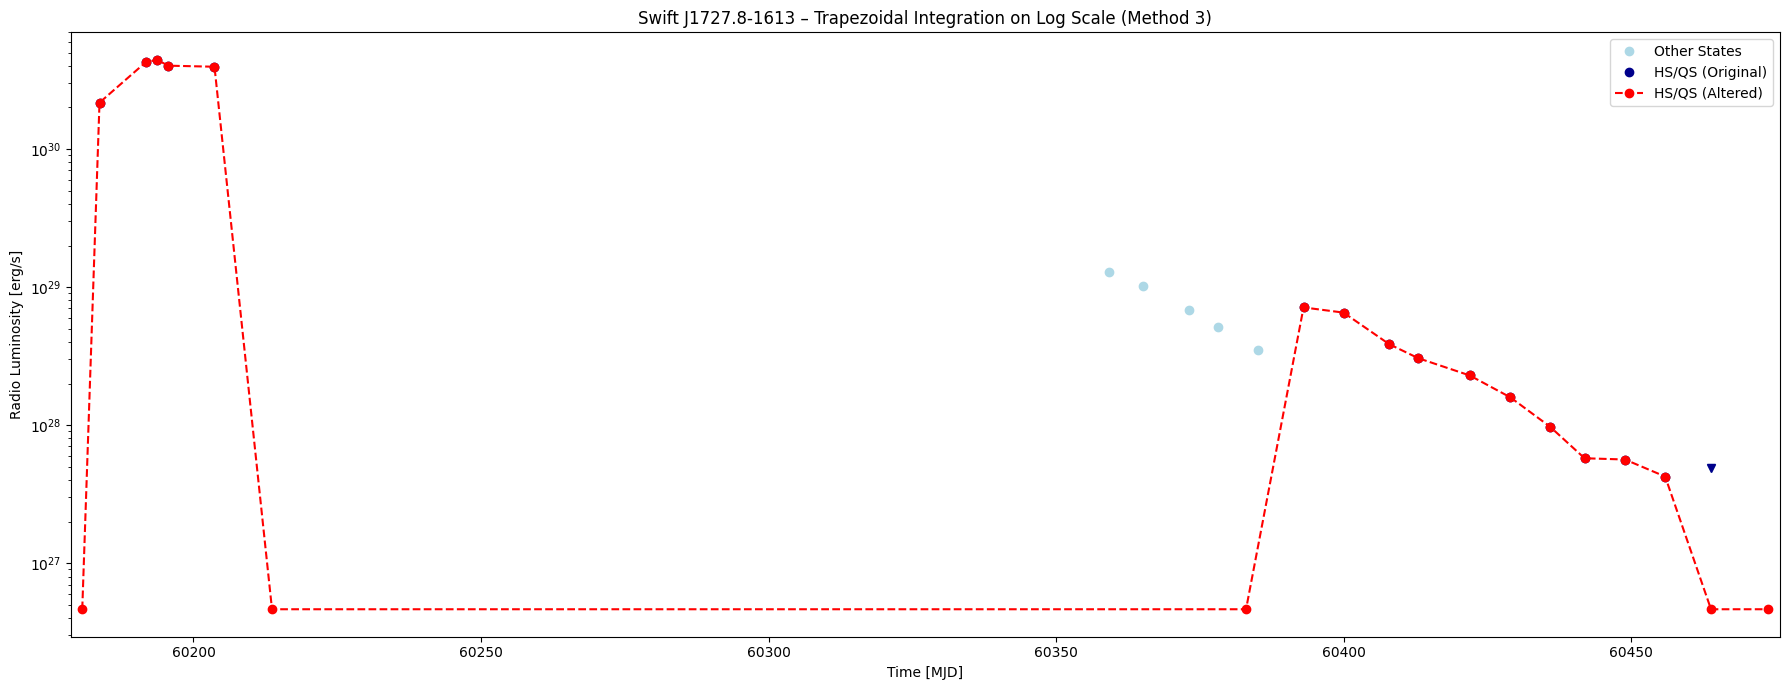

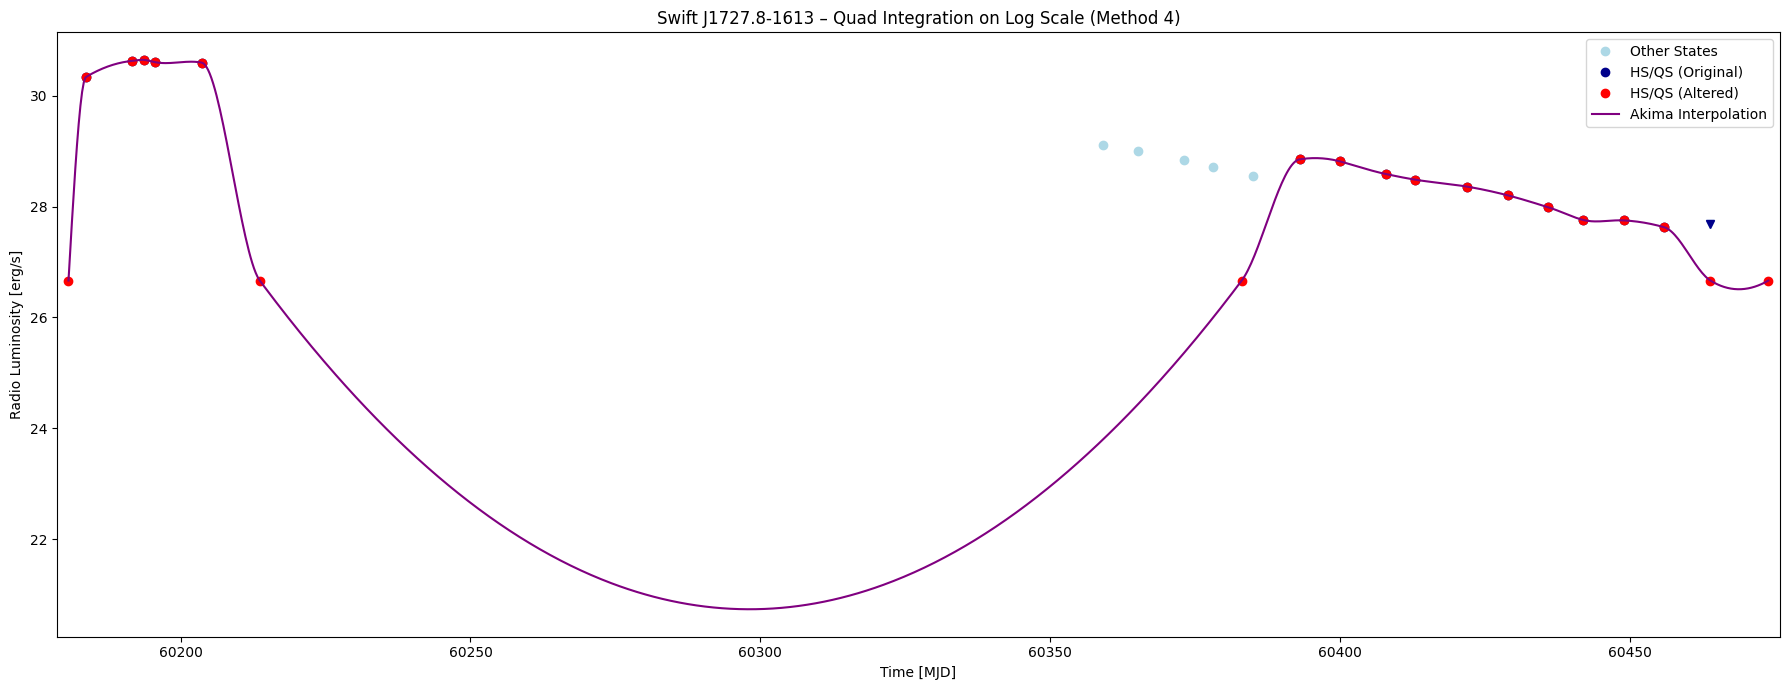

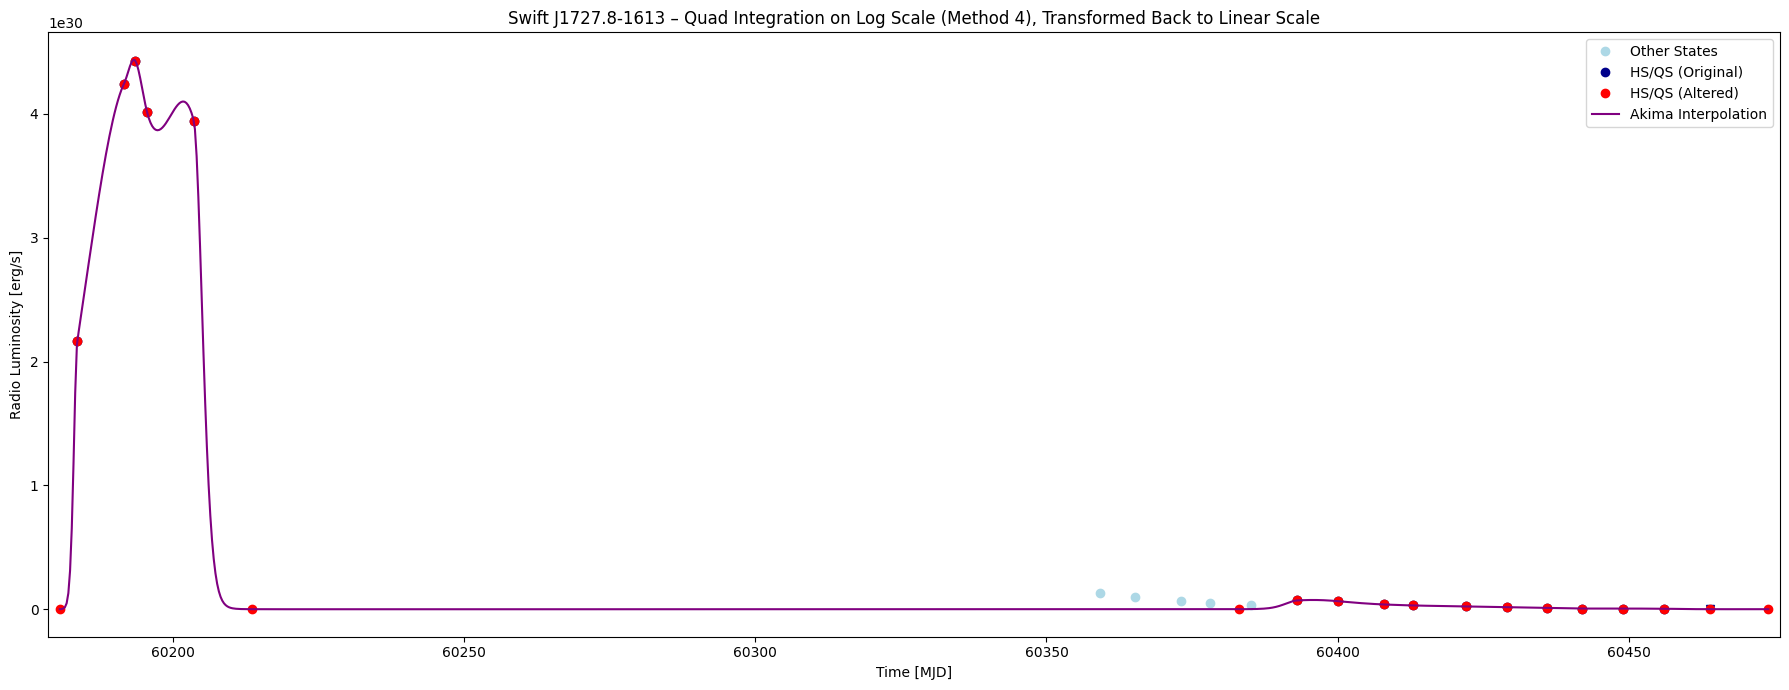

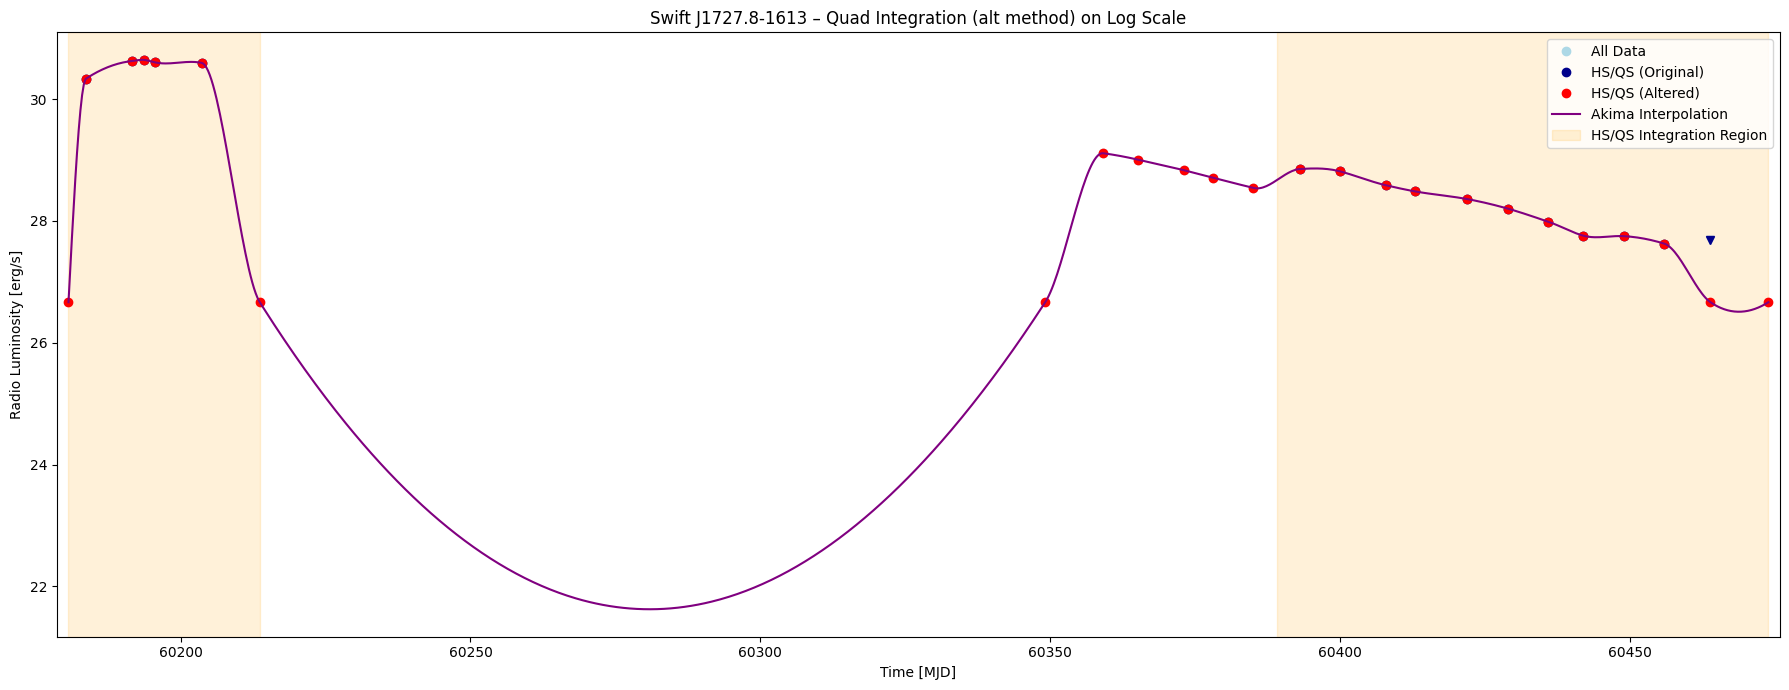


----------------------------------------

----------------------------------------


----------------------------------------


 Swift J1728.9-3613
No HS/QS data for Swift J1728.9-3613. Skipping...

 Swift J1842.5-1124
59004.652700000006 59037.0132

Swift J1842.5-1124 [candidateBH] Energy Estimates:
  Linear Trapezoidal:         3.604e+42 erg
  Linear Akima Interpolation: 3.625e+42 erg
  Log Trapezoidal:            3.402e+42 erg
  Log Akima Interpolation:    3.681e+42 erg
  Log Akima Interpolation (Alt): 3.994e+42 erg


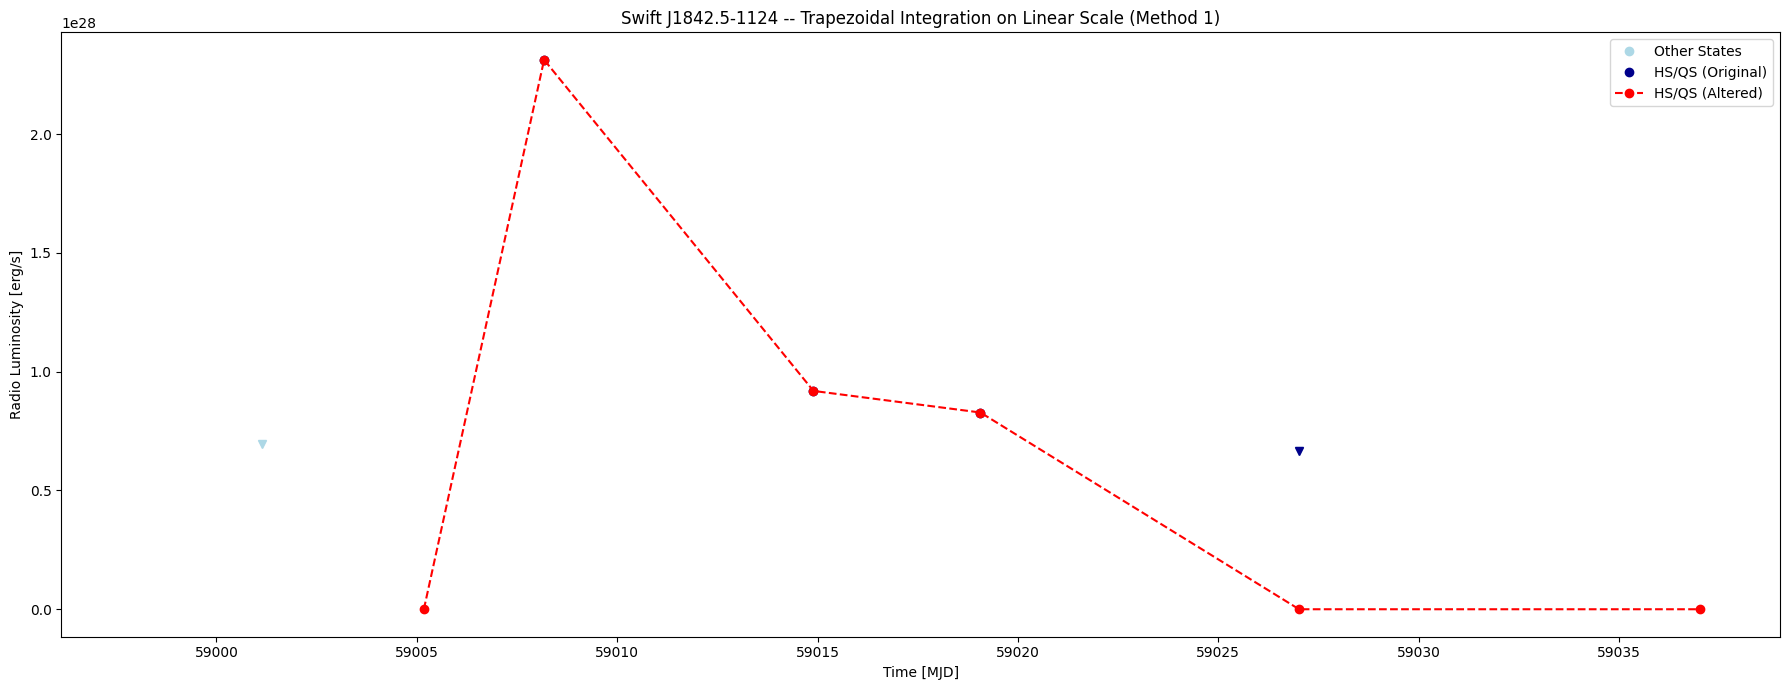

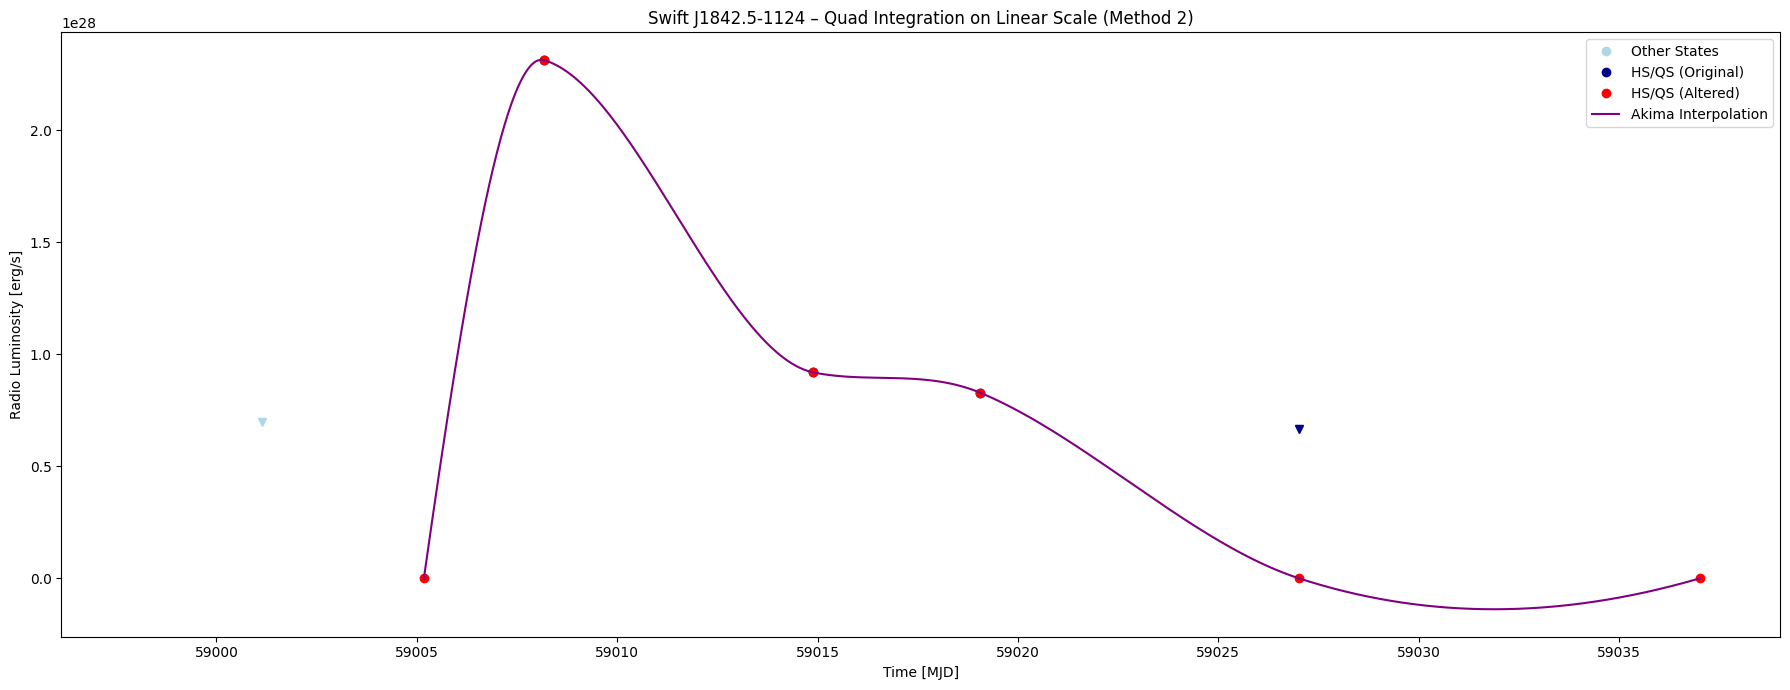

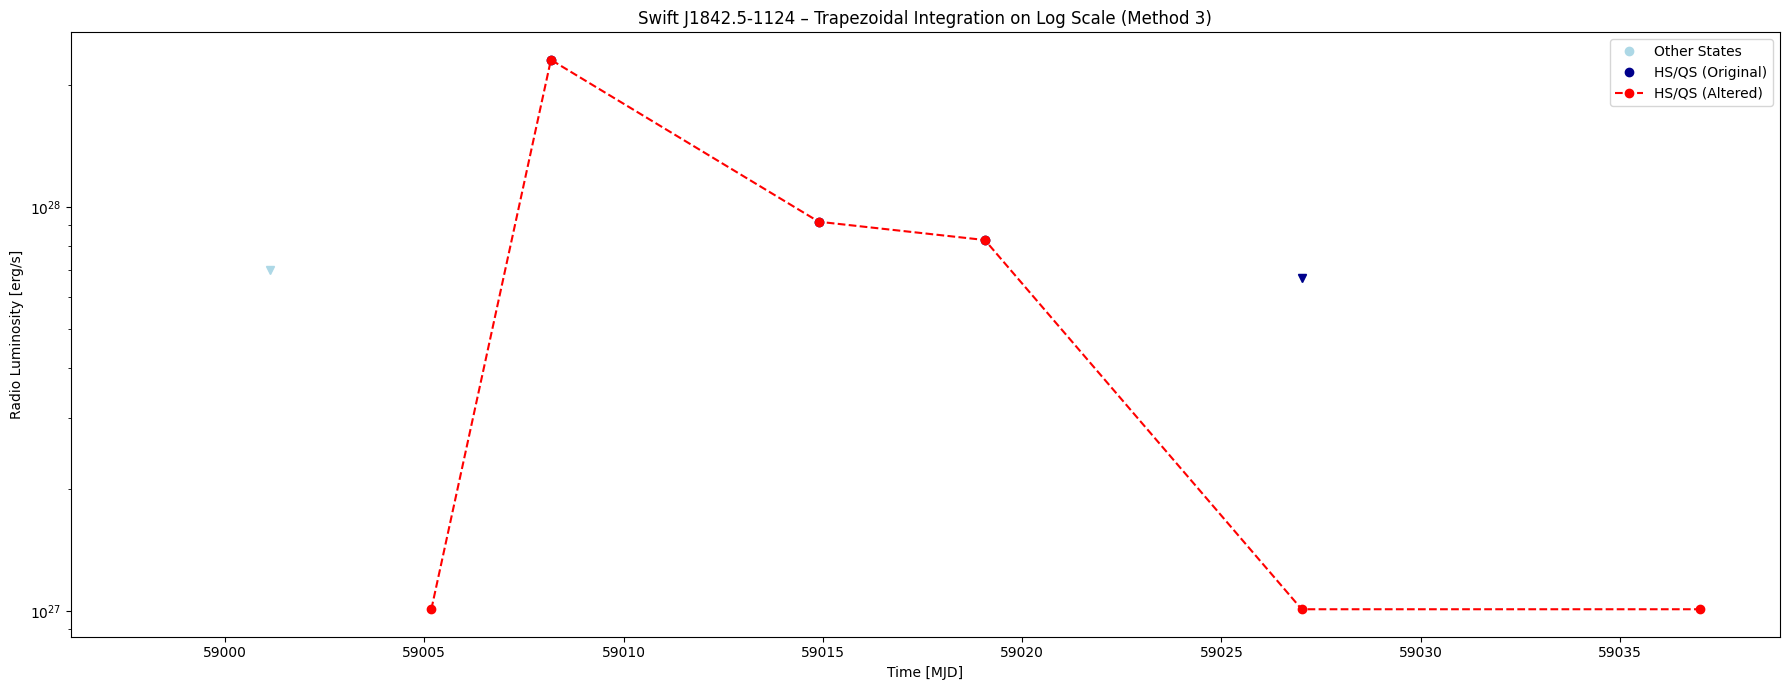

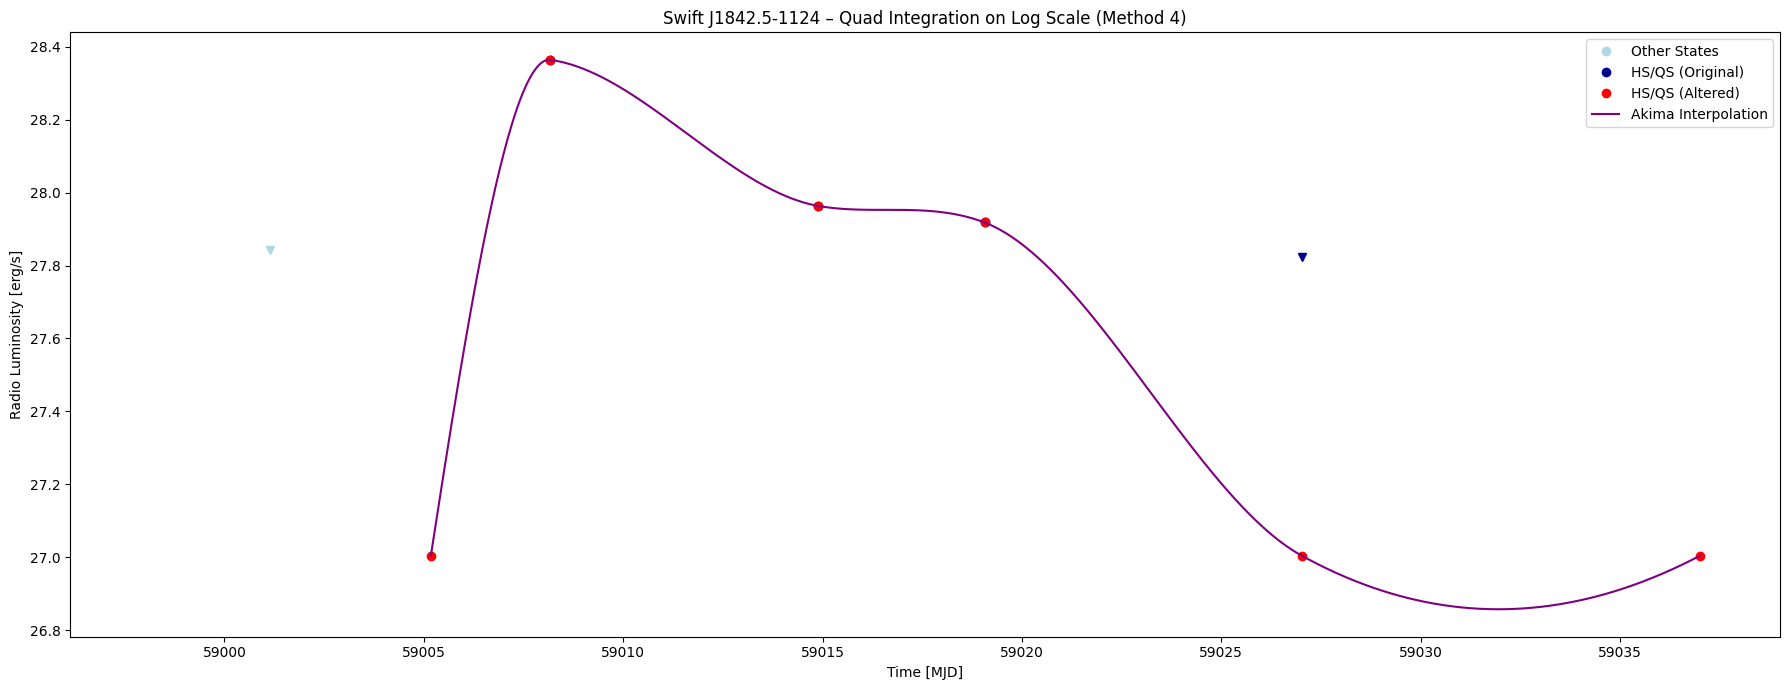

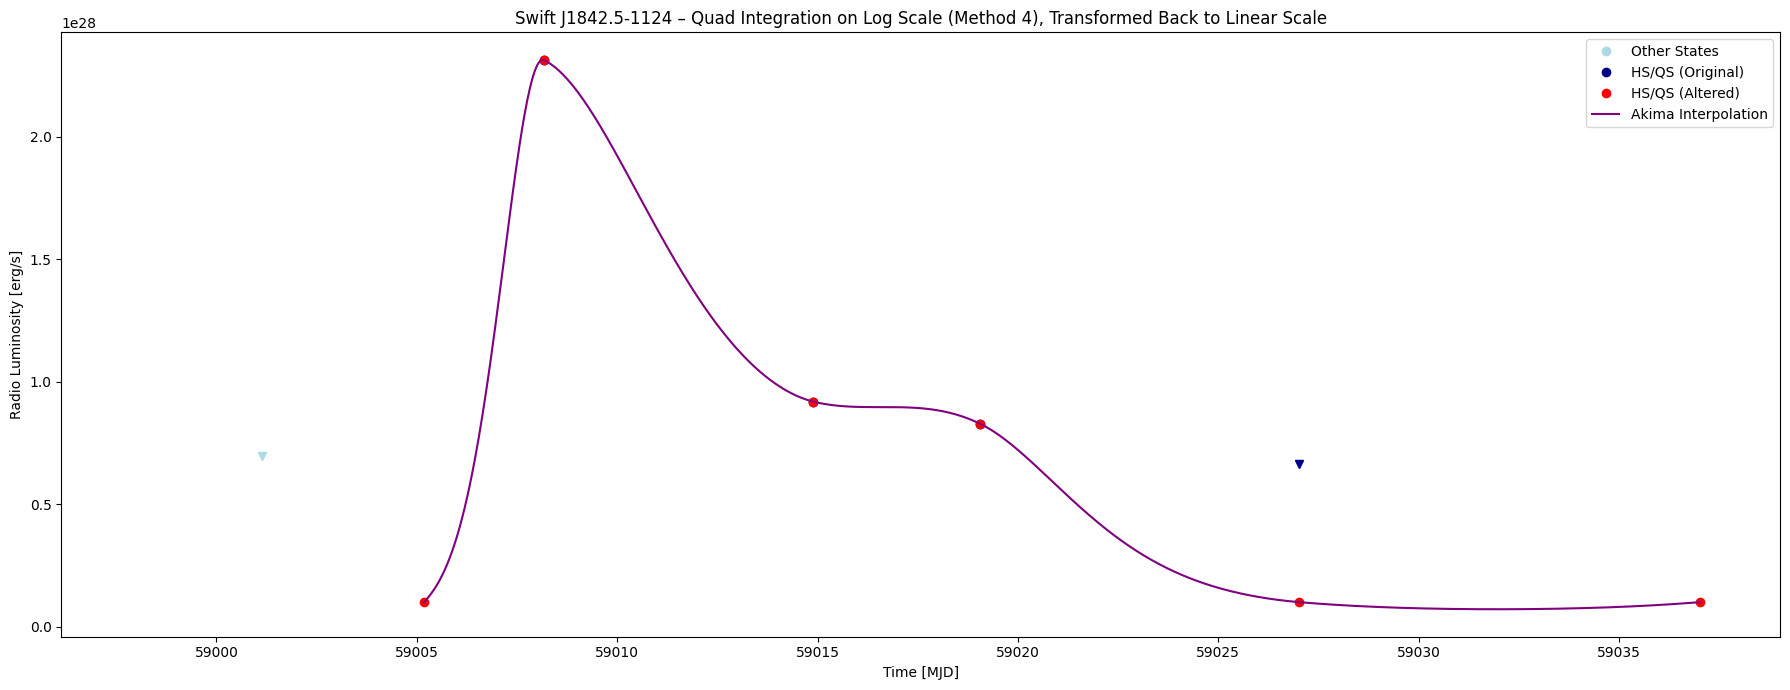

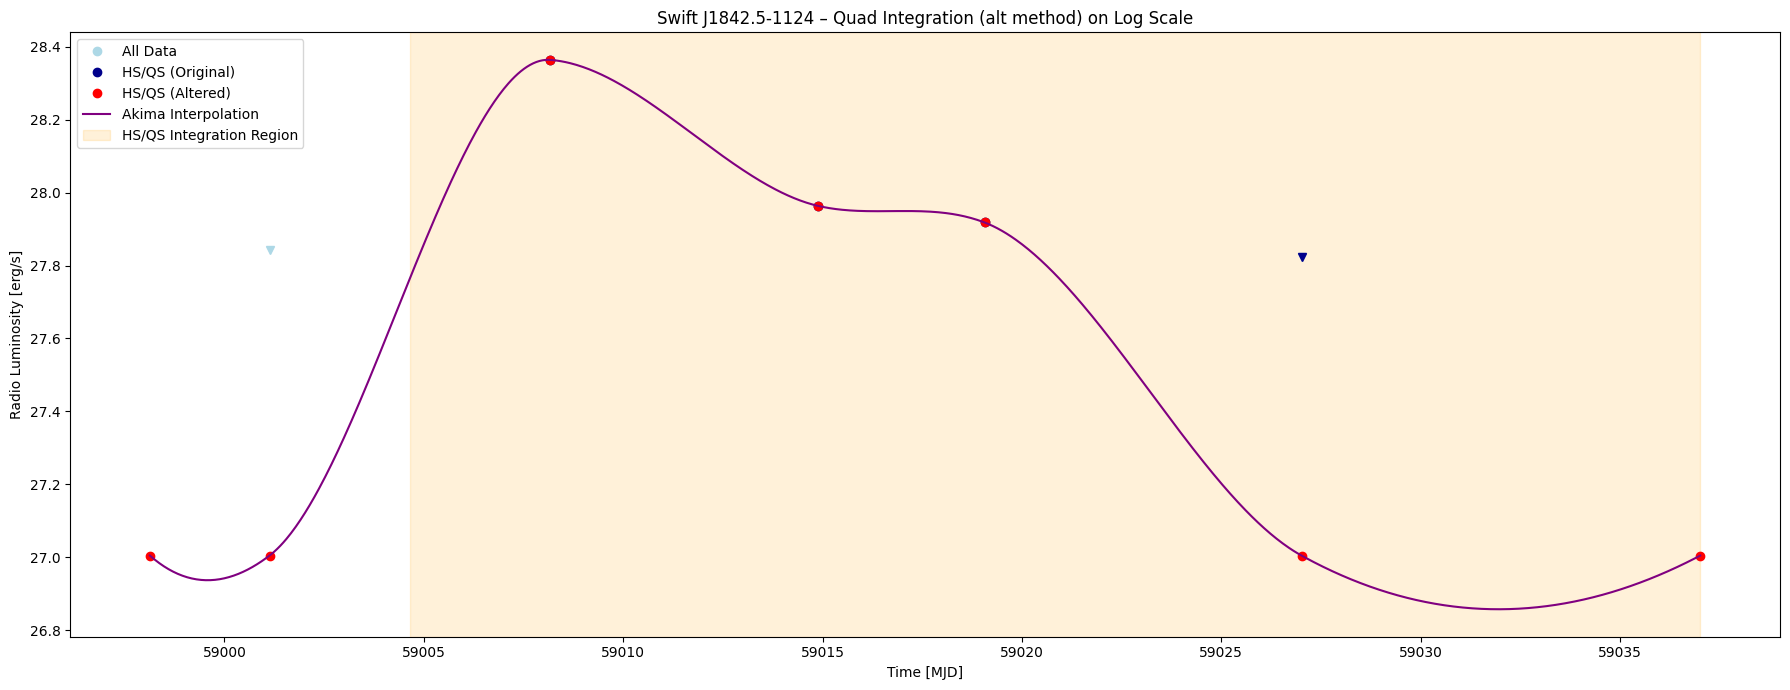


----------------------------------------

----------------------------------------


----------------------------------------


 Swift J1858.6-0814
58429.51021 58498.11221
58536.657210000005 58710.78683

Swift J1858.6-0814 [NS] Energy Estimates:
  Linear Trapezoidal:         3.705e+43 erg
  Linear Akima Interpolation: 3.670e+43 erg
  Log Trapezoidal:            4.011e+43 erg
  Log Akima Interpolation:    4.247e+43 erg
  Log Akima Interpolation (Alt): 3.972e+43 erg


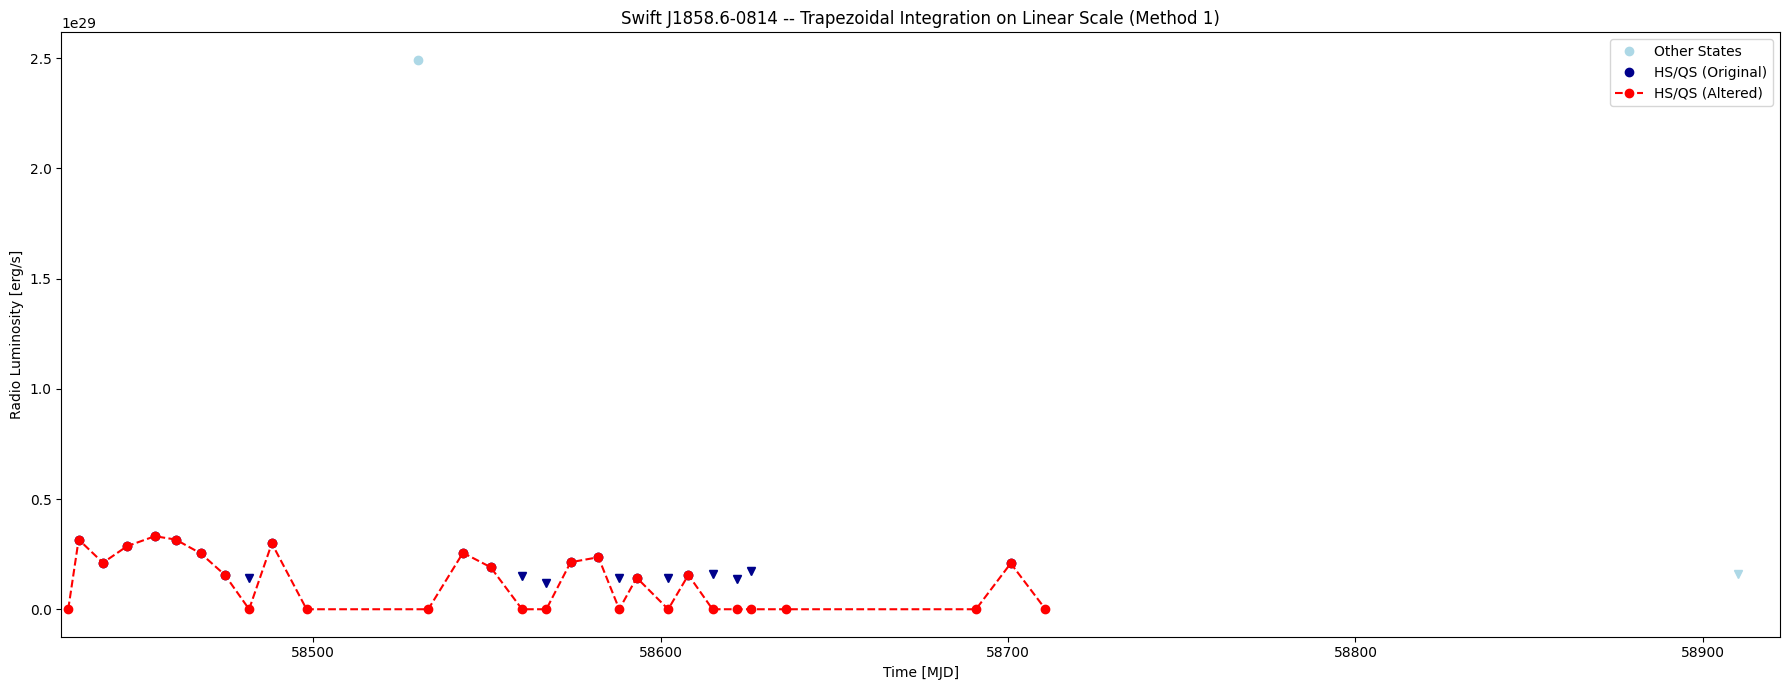

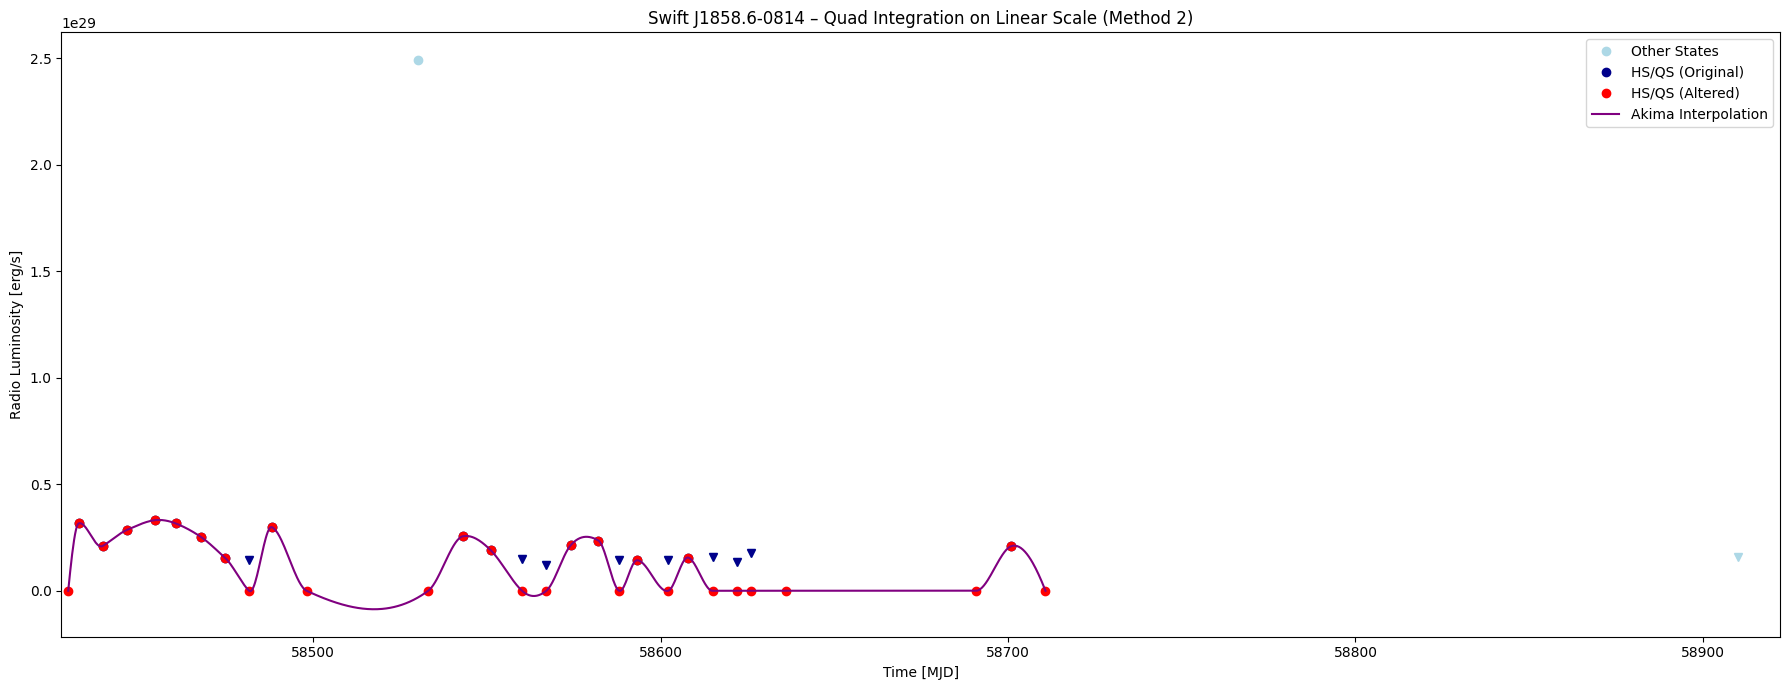

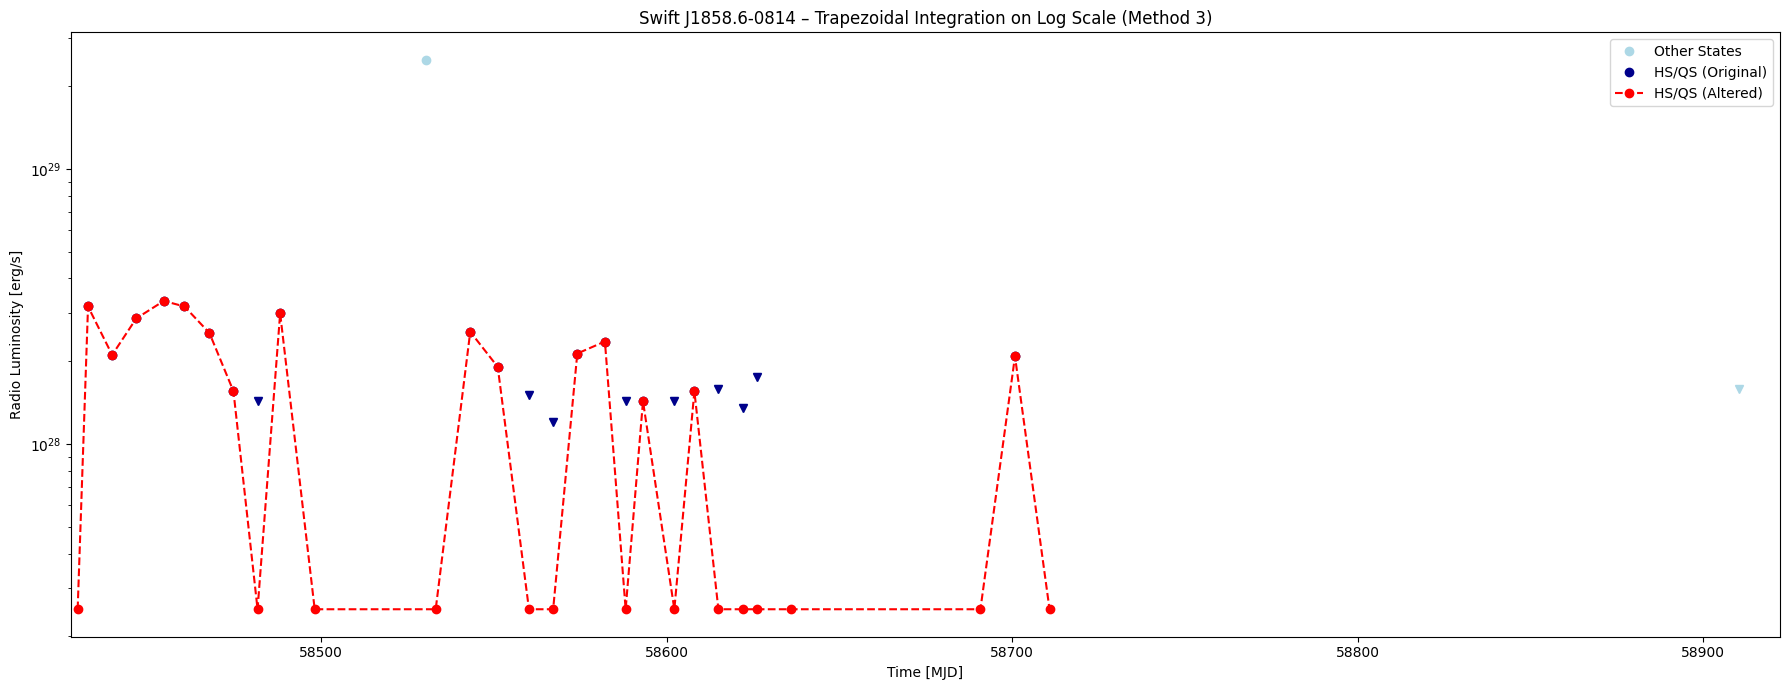

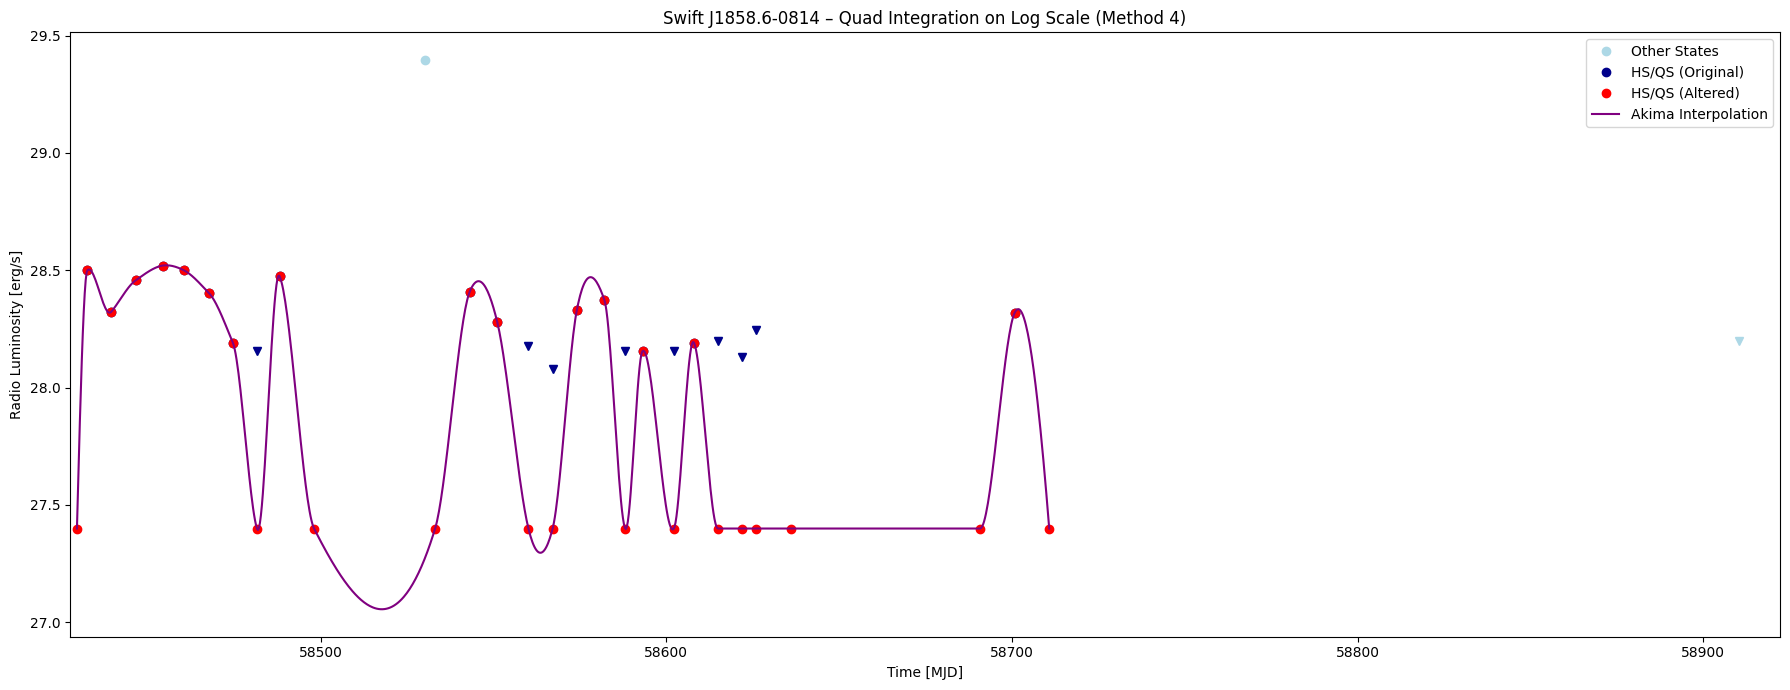

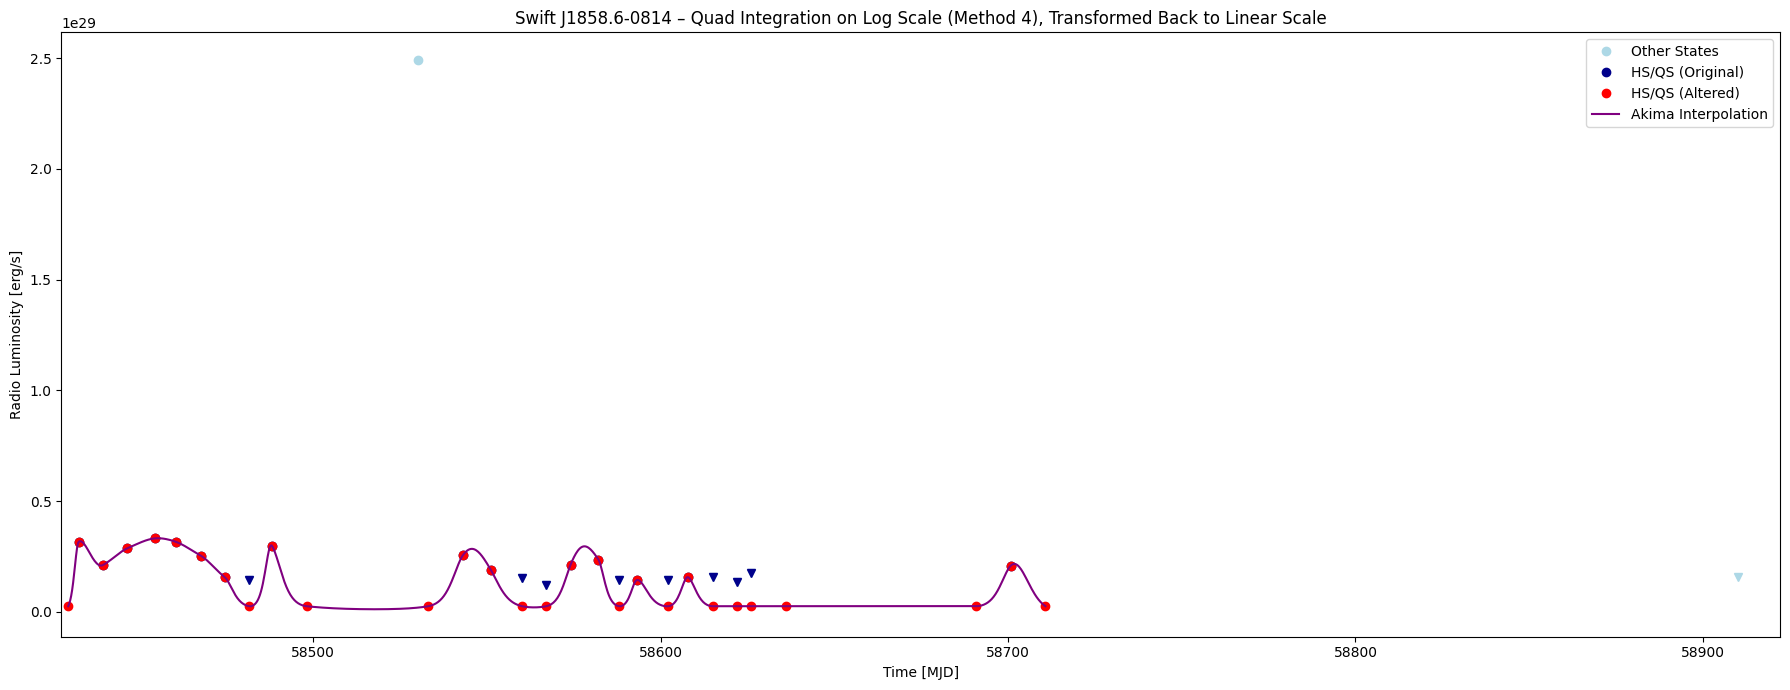

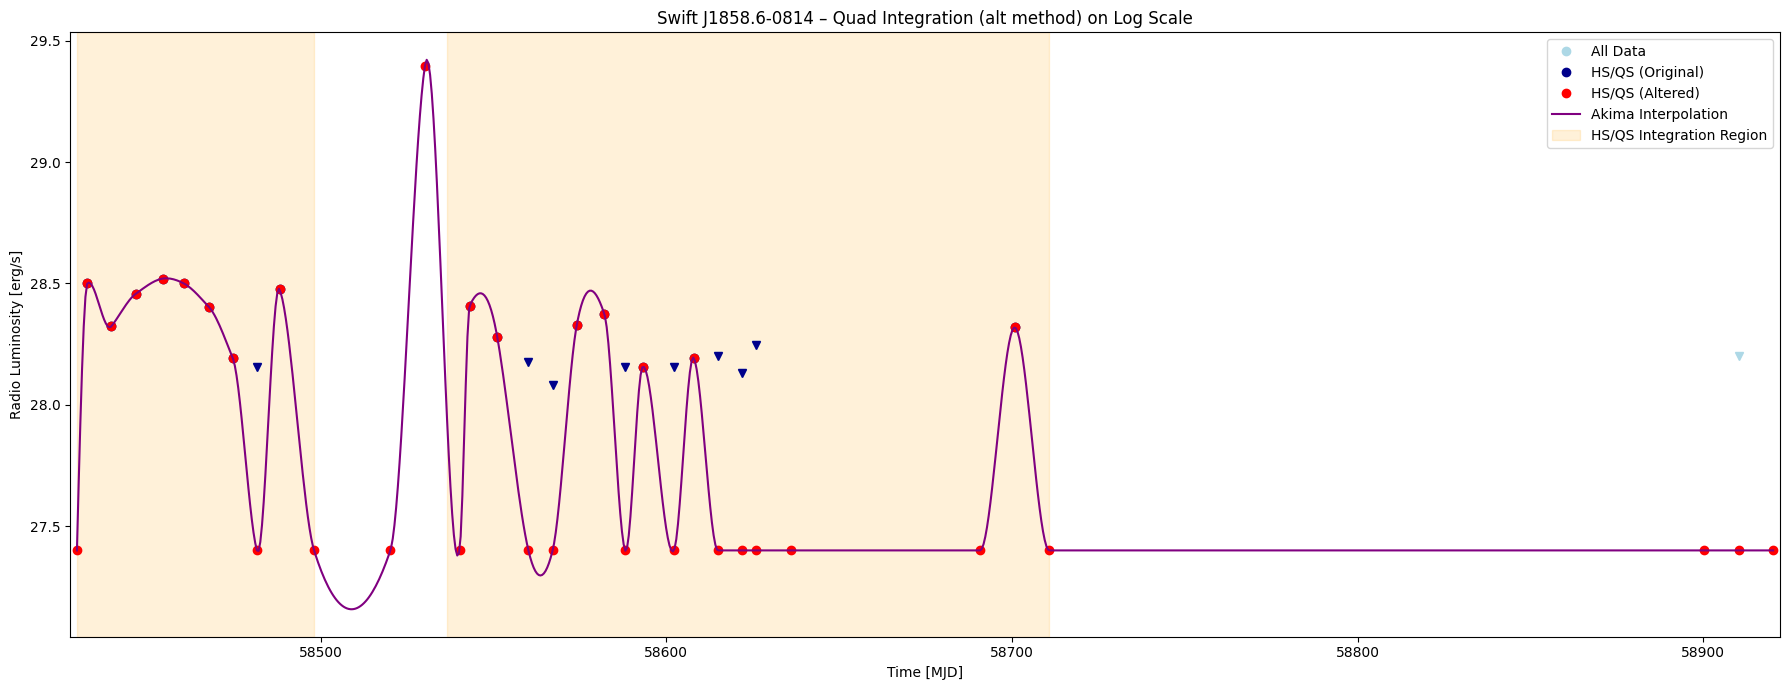


----------------------------------------

----------------------------------------


----------------------------------------


 Vela X-1
No HS/QS data for Vela X-1. Skipping...

 XTE J1701-462
No HS/QS data for XTE J1701-462. Skipping...

--- TOTAL ENERGY ESTIMATES (All Sources) ---
Total Linear Trapezoidal:         3.182e+45 erg
Total Linear Akima Interpolation: 3.170e+45 erg
Total Log Trapezoidal:            2.848e+45 erg
Total Log Akima Interpolation:    2.991e+45 erg
Total Log Akima Interpolation (Alt): 3.012e+45 erg


In [5]:
get_energy_estimates(all_radio_df, source_names= None, t_gap=10, t_gap_first=3) # ["MAXI J1816-195"]